# Data import, cleaning and preparation

## Data import
Raw dataset was imported from ChEMBL database : [Acetylcholinesterase inhibitors dataset](https://www.ebi.ac.uk/chembl/web_components/explore/activities/STATE_ID:5yAGTDCv3Oa6bT-4oPhoYA==)

In [ ]:
#import libraries
import pandas as pd
import numpy as np


In [ ]:
#mount google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import raw dataset
df=pd.read_csv('/content/drive/MyDrive/Predictive Generative transfer learning/acetylcholinesterase receptor/DOWNLOAD-J1oPCSJdmEqp0DE6BPo5f-SXcsgh_gYB6wSTuSw6RQE=.csv')

In [ ]:
# Raw dataset in pandas dataframe
df

Molecule ChEMBL ID     Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4  \
0              CHEMBL94  PHYSOSTIGMINE          4      275.35          0   
1          CHEMBL207777            NaN       None      325.36          0   
2          CHEMBL205967            NaN       None      263.29          0   
3         CHEMBL2021458          EUBOL       None      510.43       None   
4           CHEMBL60119            NaN       None      212.30          0   
...                 ...            ...        ...         ...        ...   
6552      CHEMBL5172256            NaN       None      450.65          1   
6553          CHEMBL502      DONEPEZIL          4      379.50          0   
6554      CHEMBL5220283            NaN       None      604.70          2   
6555      CHEMBL1195259            NaN       None      258.32          0   
6556      CHEMBL5218900            NaN       None      606.72          2   

     Unnamed: 5 Unnamed: 6                                         Unnamed: 7  \
0          1.77          1        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1             4        12b  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          2.19        11b         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
3          None          3                                                NaN   
4             3          2                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
...         ...        ...                                                ...   
6552       5.05         63  Cc1cccc2sc(NC(=O)CCN3CCN(Cc4ccc(C(C)(C)C)cc4)C...   
6553       4.36  Donepezil      COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2   
6554       6.12         46  CNC(=O)Oc1cccc(CN(C)CCCCCCOc2ccc3c(c2)O/C(=C\c...   
6555       1.96         87                    C#CCNC1CCc2c(OC(=O)N(C)C)cccc21   
6556        6.1         47  CNC(=O)Oc1cccc(CN(C)CCCCCCOc2ccc(C(=O)/C=C/c3c...   

     Unnamed: 8 Unnamed: 9  ...   Unnamed: 36     Unnamed: 37    Unnamed: 38  \
0          IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL1146079   
1          IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL1146079   
2          IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL1146079   
3          IC50        NaN  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL1152325   
4          IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL1133184   
...         ...        ...  ...           ...             ...            ...   
6552       IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL5113531   
6553       IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL5136978   
6554       IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL5214927   
6555       IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL5214927   
6556       IC50        '='  ...  Homo sapiens  SINGLE PROTEIN  CHEMBL5214927   

     Unnamed: 39            Unnamed: 40     Unnamed: 41  Unnamed: 42  \
0            1.0  Scientific Literature      J Med Chem       2006.0   
1            1.0  Scientific Literature      J Med Chem       2006.0   
2            1.0  Scientific Literature      J Med Chem       2006.0   
3            1.0  Scientific Literature      J Nat Prod       2009.0   
4            1.0  Scientific Literature      J Med Chem       2000.0   
...          ...                    ...             ...          ...   
6552         1.0  Scientific Literature      J Med Chem       2022.0   
6553         1.0  Scientific Literature  Eur J Med Chem       2022.0   
6554         1.0  Scientific Literature  Eur J Med Chem       2022.0   
6555         1.0  Scientific Literature  Eur J Med Chem       2022.0   
6556         1.0  Scientific Literature  Eur J Med Chem       2022.0   

     Unnamed: 43        Unnamed: 44 Unnamed: 45  
0           None                NaN         NaN  
1           None                NaN         NaN  
2           None                NaN         NaN  
3           None                NaN         NaN  
4           None                NaN        

## Labelling data instances
*   Positive(1): IC50 < 1000nM
*   Negative(0): IC50 > 1000nM










In [ ]:
# new label column classLabel with IC50<1000nM as 1 and else 0
df['classLabel']= df['Unnamed: 10'].apply(lambda x: 1 if x<=1000 else 0 )

## Filtering redundant data instances
Goal: Keep only the datainstance that correspond to the most frequent label for each unique SMILES string

In [ ]:

most_frequent_label = df['classLabel'].mode()[0]

# Group the DataFrame by SMILES and Label, count occurrences, and reset index
smiles_label_counts = df.groupby(['Unnamed: 7', 'classLabel']).size().reset_index(name='Count')

# smikles with the most frequent label
mostFrequentSmiles = smiles_label_counts.groupby('Unnamed: 7')['Count'].idxmax()

# Filter the original DataFrame to keep only the rows with the most frequent SMILES-label combinations
result_df = df.loc[most_frequent_smiles]

# Optionally, you can reset the index of the resulting DataFrame if needed
result_df = result_df.reset_index(drop=True)

# Display the resulting DataFrame
result_df

Molecule ChEMBL ID     Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4  \
0              CHEMBL94  PHYSOSTIGMINE          4      275.35          0   
1          CHEMBL207777            NaN       None      325.36          0   
2          CHEMBL205967            NaN       None      263.29          0   
3         CHEMBL2021458          EUBOL       None      510.43       None   
4           CHEMBL60119            NaN       None      212.30          0   
...                 ...            ...        ...         ...        ...   
5315      CHEMBL4077157            NaN       None      449.46          0   
5316      CHEMBL3906317            NaN       None      386.21          0   
5317      CHEMBL4800328            NaN       None      330.23          0   
5318      CHEMBL4797670            NaN       None      346.22          0   
5319      CHEMBL4202784            NaN       None      574.73          2   

     Unnamed: 5 Unnamed: 6                                         Unnamed: 7  \
0          1.77          1        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1             4        12b  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          2.19        11b         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
3          None          3                                                NaN   
4             3          2                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
...         ...        ...                                                ...   
5315       1.63         15  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
5316       4.03         7n       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
5317       3.43         8v            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
5318       3.13         8y           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
5319        6.5         5k  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

     Unnamed: 8 Unnamed: 9  ...     Unnamed: 37    Unnamed: 38  Unnamed: 39  \
0          IC50        '='  ...  SINGLE PROTEIN  CHEMBL1146079          1.0   
1          IC50        '='  ...  SINGLE PROTEIN  CHEMBL1146079          1.0   
2          IC50        '='  ...  SINGLE PROTEIN  CHEMBL1146079          1.0   
3          IC50        NaN  ...  SINGLE PROTEIN  CHEMBL1152325          1.0   
4          IC50        '='  ...  SINGLE PROTEIN  CHEMBL1133184          1.0   
...         ...        ...  ...             ...            ...          ...   
5315       IC50        '='  ...  SINGLE PROTEIN  CHEMBL4052796          1.0   
5316       IC50        '>'  ...  SINGLE PROTEIN  CHEMBL4765338          1.0   
5317       IC50        '='  ...  SINGLE PROTEIN  CHEMBL4765338          1.0   
5318       IC50        '='  ...  SINGLE PROTEIN  CHEMBL4765338          1.0   
5319       IC50        '='  ...  SINGLE PROTEIN  CHEMBL4196084          1.0   

                Unnamed: 40           Unnamed: 41 Unnamed: 42  Unnamed: 43  \
0     Scientific Literature            J Med Chem      2006.0         None   
1     Scientific Literature            J Med Chem      2006.0         None   
2     Scientific Literature            J Med Chem      2006.0         None   
3     Scientific Literature            J Nat Prod      2009.0         None   
4     Scientific Literature            J Med Chem      2000.0         None   
...                     ...                   ...         ...          ...   
5315  Scientific Literature  Bioorg Med Chem Lett      2017.0         None   
5316  Scientific Literature        Eur J Med Chem      2020.0         None   
5317  Scientific Literature        Eur J Med Chem      2020.0         None   
5318  Scientific Literature        Eur J Med Chem      2020.0         None   
5319  Scientific Literature        Eur J Med Chem      2018.0         None   

          Unnamed: 44 Unnamed: 45 classLabel  
0                 NaN         NaN          1  
1                 NaN         NaN          1  
2                 NaN         NaN          0  
3                 NaN         NaN          0 

In [ ]:
result_df.shape

(5320, 47)

In [ ]:
# selecting just ID, similes and IC50 value
featNTarget= result_df[['Molecule ChEMBL ID', 'Unnamed: 7', 'Unnamed: 10', 'classLabel']]

In [ ]:
# renaming the column name
featNTarget = featNTarget.rename(columns={'Unnamed: 7':'Smiles', 'Unnamed: 10': 'IC50'})


In [ ]:
featNTarget

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1          CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
3         CHEMBL2021458                                                NaN   
4           CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
...                 ...                                                ...   
5315      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
5316      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
5317      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
5318      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
5319      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  
0        28.00           1  
1        97.00           1  
2      2420.00           0  
3          NaN           0  
4       100.00           1  
...        ...         ...  
5315    229.08           1  
5316  10000.00           0  
5317   1080.00           0  
5318    140.00           1  
5319    293.00           1  

[5320 rows x 4 columns]

In [ ]:
#Drop any naN value containing data instance
featNTarget=featNTarget.dropna()

In [ ]:
#label counts(activesVsinactive)
featNTarget['classLabel'].value_counts()

0    2566
1    2382
Name: classLabel, dtype: int64

## Validation of smiles with rdkit module

In [ ]:
# installing rdkit packages
!pip install rdkit


  Using cached rdkit-2023.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 76.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


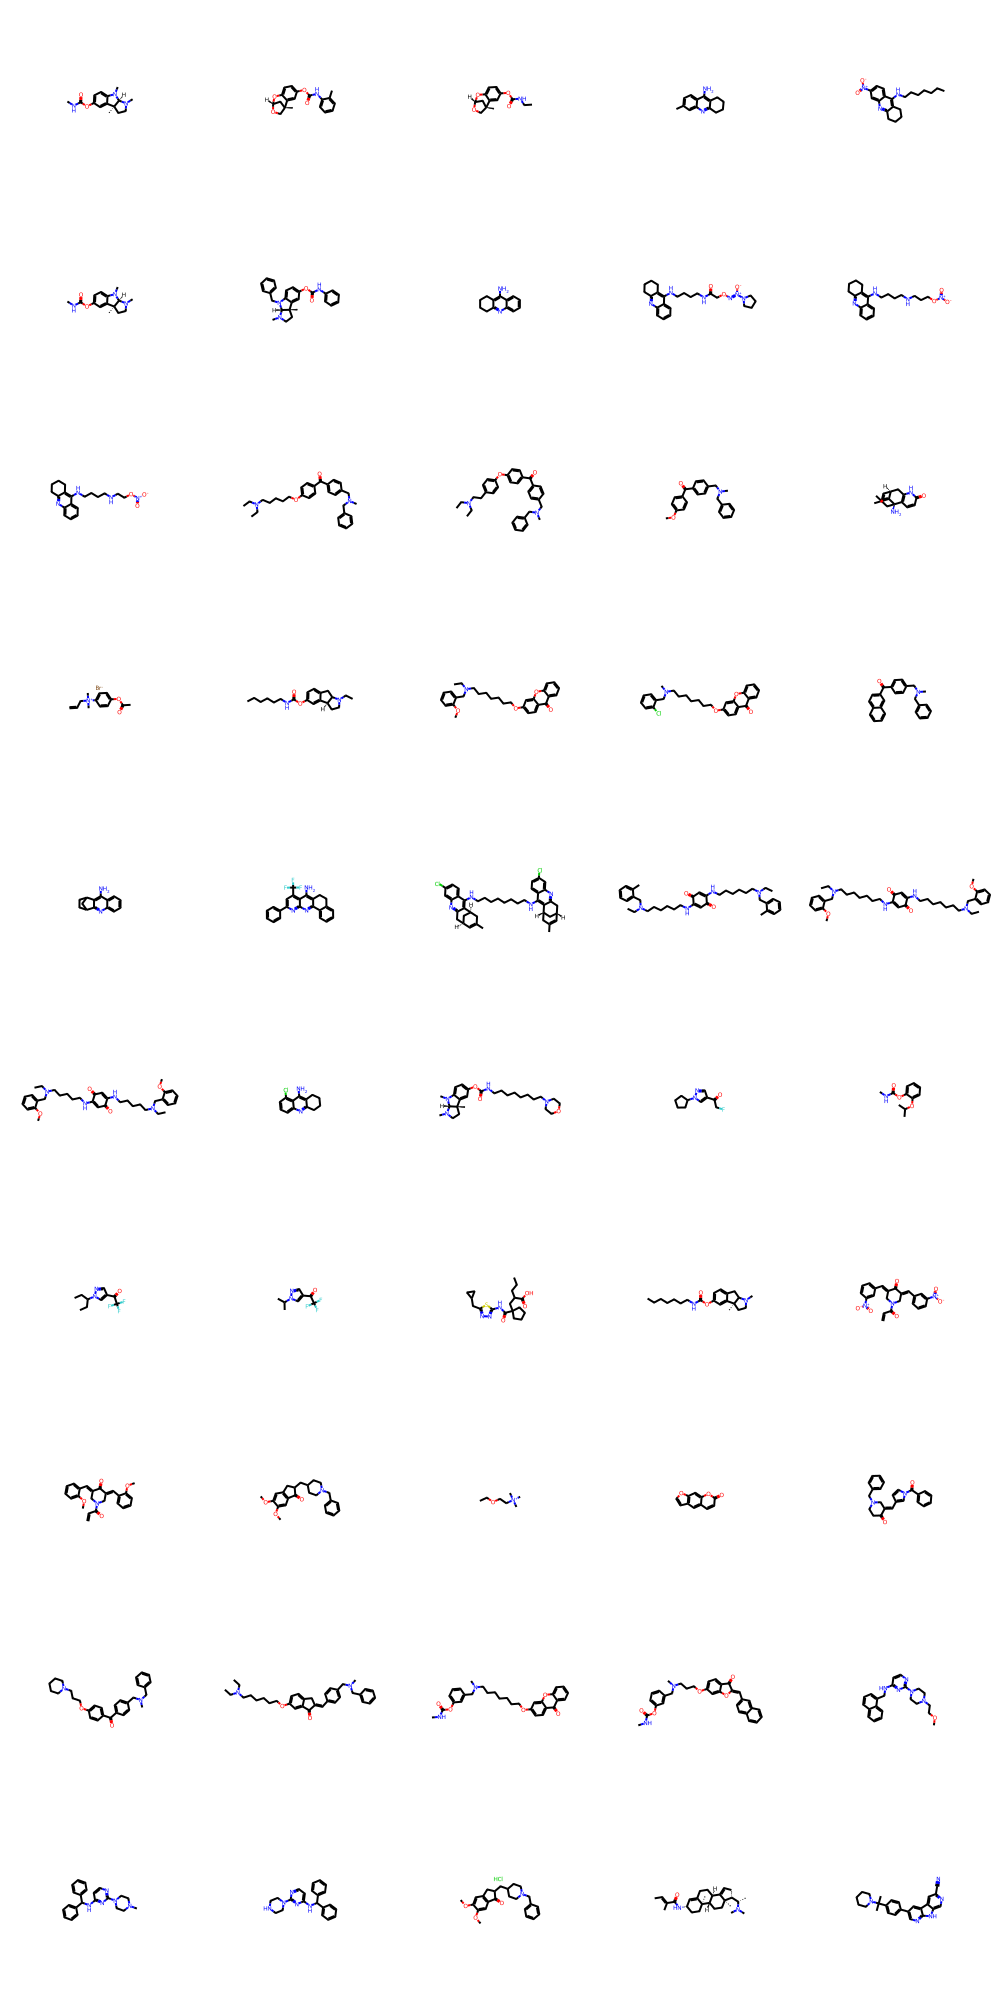

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
molecules = [Chem.MolFromSmiles(smiles) for smiles in featNTarget['Smiles']]

# Visualize the compounds
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200))

# Show the compounds
display(img)

In [ ]:
import pandas as pd
from rdkit import Chem

# function to validate smiles string
def validateSmiles(smiles):
# true if valid structure can be constructed from smile string, otherwise false
    try:
        return bool(Chem.MolFromSmiles(smiles))
    except:
        return False

# apply it to entire smiles in the dataframe
featNTarget['IsValidSMILES'] = featNTarget['Smiles'].apply(validateSmiles)

featNTarget

<ipython-input-15-777369c02032>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['IsValidSMILES'] = featNTarget['Smiles'].apply(validate_smiles)


Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1          CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
4           CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
5          CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
5315      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
5316      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
5317      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
5318      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
5319      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  
0        28.00           1           True  
1        97.00           1           True  
2      2420.00           0           True  
4       100.00           1           True  
5       290.00           1           True  
...        ...         ...            ...  
5315    229.08           1           True  
5316  10000.00           0           True  
5317   1080.00           0           True  
5318    140.00           1           True  
5319    293.00           1           True  

[4948 rows x 5 columns]

In [ ]:
#check if there are any non valid smiles
featNTarget['IsValidSMILES'].value_counts()

True    4948
Name: IsValidSMILES, dtype: int64

In [ ]:
featNTarget

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1          CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
4           CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
5          CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
5315      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
5316      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
5317      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
5318      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
5319      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  
0        28.00           1           True  
1        97.00           1           True  
2      2420.00           0           True  
4       100.00           1           True  
5       290.00           1           True  
...        ...         ...            ...  
5315    229.08           1           True  
5316  10000.00           0           True  
5317   1080.00           0           True  
5318    140.00           1           True  
5319    293.00           1           True  

[4948 rows x 5 columns]



# Data Exploration and visualization




<Axes: >

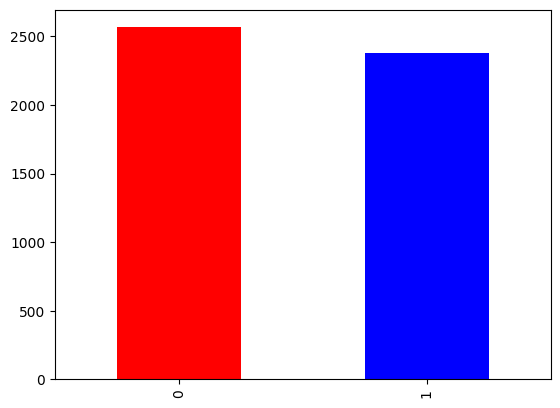

In [ ]:
# bar graph showing counts of data instances for each label
featNTarget['classLabel'].value_counts().plot(kind='bar', color=['red', 'blue'])


# Visualization of smiles with Principal Component analysis

<ipython-input-19-cca41486c33f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['Molecule'] = featNTarget['Smiles'].apply(Chem.MolFromSmiles)
<ipython-input-19-cca41486c33f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['Fingerprint'] = featNTarget['Molecule'].apply(calculate_fingerprint)
<ipython-input-19-cca41486c33f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

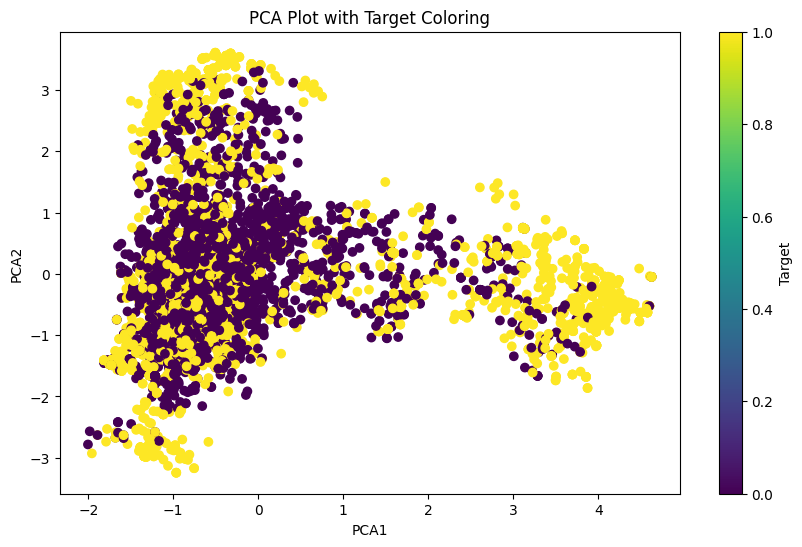

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# smiles into to molecules
featNTarget['Molecule'] = featNTarget['Smiles'].apply(Chem.MolFromSmiles)

# morgan fingerprint for each molecules
def calculate_fingerprint(mol):
    return AllChem.GetMorganFingerprintAsBitVect(mol, 2)

featNTarget['Fingerprint'] = featNTarget['Molecule'].apply(calculate_fingerprint)

# fingerprint dataframe into numpy array
fingerprints = list(featNTarget['Fingerprint'])
fingerprints_array = [list(fp) for fp in fingerprints]

# PCA analysis of fingerprint data with two component analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fingerprints_array)

# PCA analysis into dataframe
featNTarget['PCA1'] = pca_result[:, 0]
featNTarget['PCA2'] = pca_result[:, 1]

# scatter plot of PCA analysis categories based on target label
plt.figure(figsize=(10, 6))
colors = featNTarget['classLabel']
scatter = plt.scatter(featNTarget['PCA1'], featNTarget['PCA2'], c=colors, cmap='viridis')
plt.colorbar(scatter, label='Target')
plt.title('Two Component PCA plot based upon target label')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


<ipython-input-20-4ccd53de0b8d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['Molecule'] = featNTarget['Smiles'].apply(Chem.MolFromSmiles)
<ipython-input-20-4ccd53de0b8d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['Fingerprint'] = featNTarget['Molecule'].apply(calculate_fingerprint)
<ipython-input-20-4ccd53de0b8d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

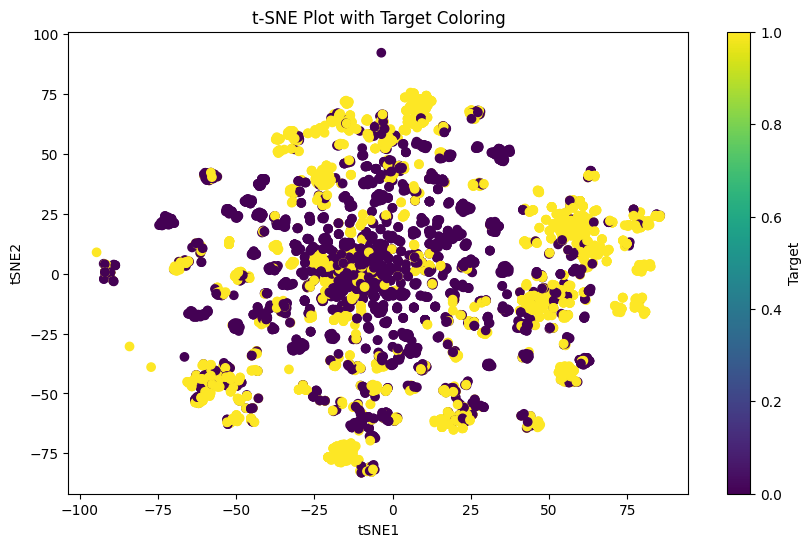

In [ ]:
#visualization libraries
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Convert SMILES strings to molecular objects
featNTarget['Molecule'] = featNTarget['Smiles'].apply(Chem.MolFromSmiles)

# Calculate Morgan fingerprints for each molecule
def calculate_fingerprint(mol):
    return AllChem.GetMorganFingerprintAsBitVect(mol, 2)

featNTarget['Fingerprint'] = featNTarget['Molecule'].apply(calculate_fingerprint)

# Convert fingerprints to a NumPy array
fingerprints = list(featNTarget['Fingerprint'])
fingerprints_array = np.array([list(fp) for fp in fingerprints])  # Convert to NumPy array

# Perform t-SNE on the fingerprint data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(fingerprints_array)

# Add t-SNE results to the DataFrame
featNTarget['tSNE1'] = tsne_result[:, 0]
featNTarget['tSNE2'] = tsne_result[:, 1]

# Create a scatter plot with colors based on the 'classLabel' or 'target' column
plt.figure(figsize=(10, 6))
colors = featNTarget['classLabel']
scatter = plt.scatter(featNTarget['tSNE1'], featNTarget['tSNE2'], c=colors, cmap='viridis')
plt.colorbar(scatter, label='Target')
plt.title('t-SNE Plot with Target Coloring')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()


In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 31.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86777 sha256=8390257952de7149704b78af4f144a0fd54aff9f20d8c37fd8def9d0671f3d47
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created 

In [ ]:
import umap
import matplotlib.pyplot as plt

umap_model = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(fingerprints_array)

# Add UMAP results to the DataFrame
featNTarget['UMAP1'] = umap_result[:, 0]
featNTarget['UMAP2'] = umap_result[:, 1]

# Create a scatter plot with colors based on the 'classLabel' or 'target' column
plt.figure(figsize=(10, 6))
colors = featNTarget['classLabel']
scatter = plt.scatter(featNTarget['UMAP1'], featNTarget['UMAP2'], c=colors, cmap='viridis')
plt.colorbar(scatter, label='Target')
plt.title('UMAP Plot with Target Coloring')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


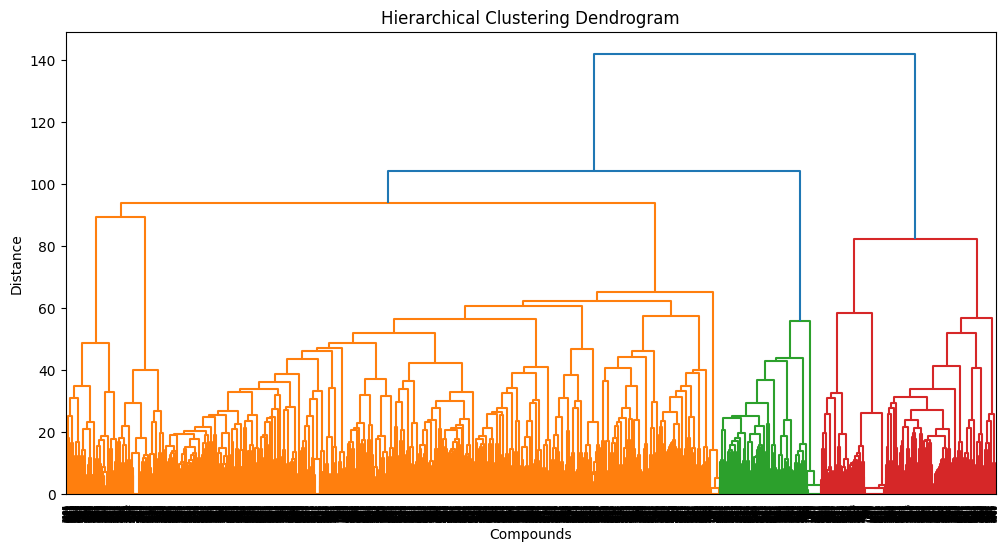

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Perform hierarchical clustering
linkage_matrix = linkage(fingerprints_array, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', labels=featNTarget.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Compounds')
plt.ylabel('Distance')
plt.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import matplotlib.pyplot as plt


def calculate_molecular_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.MolWt(mol)
    return None

featNTarget['MolecularWeight'] = featNTarget['Smiles'].apply(calculate_molecular_weight)

<ipython-input-27-d1e74f370207>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['MolecularWeight'] = featNTarget['Smiles'].apply(calculate_molecular_weight)


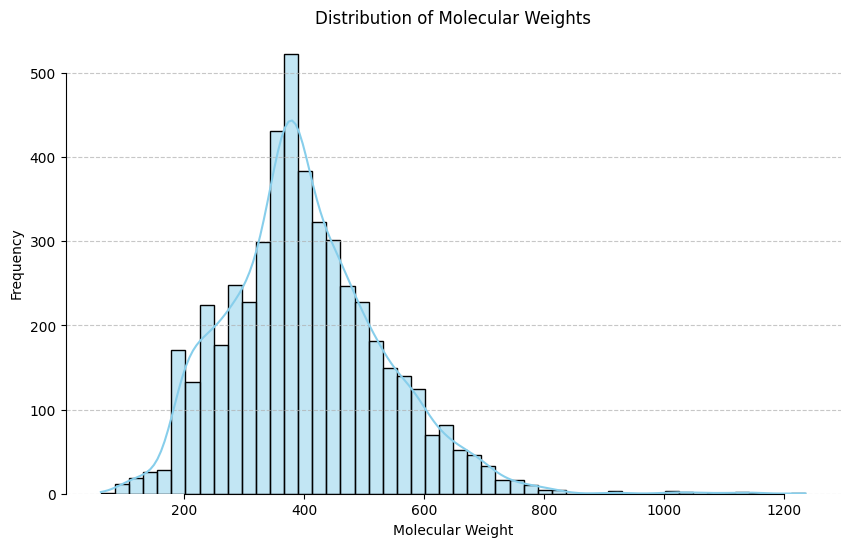

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(featNTarget['MolecularWeight'], bins=50, kde=True, color='skyblue')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Molecular Weights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True)
plt.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'data' with a 'MolWeight' column

# Filter and create a new DataFrame with MolWeight <= 500
filtered_data = featNTarget[featNTarget['MolecularWeight'] <= 800]

# If you want to overwrite the original DataFrame 'data' with the filtered data
# data = filtered_data

# If you want to reset the index of the filtered

In [ ]:
filtered_data

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1          CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
4           CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
5          CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
5315      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
5316      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
5317      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
5318      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
5319      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  \
0        28.00           1           True   
1        97.00           1           True   
2      2420.00           0           True   
4       100.00           1           True   
5       290.00           1           True   
...        ...         ...            ...   
5315    229.08           1           True   
5316  10000.00           0           True   
5317   1080.00           0           True   
5318    140.00           1           True   
5319    293.00           1           True   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501310>   
1     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501d90>   
2     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501d20>   
4     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501e00>   
5     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501e70>   
...                                                ...   
5315  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea160a0>   
5316  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea16110>   
5317  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea16180>   
5318  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea161f0>   
5319  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea16260>   

                                            Fingerprint      PCA1      PCA2  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -1.728146 -1.489250   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -1.006762 -1.320935   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -1.225058 -1.558711   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  2.696331  0.195541   
5     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  3.604970 -0.958456   
...                                                 ...       ...       ...   
5315  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.478356  1.245012   
5316  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.679645 -0.001507   
5317  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.594491 -0.413744   
5318  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.682301 -0.734812   
5319  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  3.555063 -0.696559   

          tSNE1      tSNE2  MolecularWeight  
0    -52.761700 -42.736099          275.352  
1    -63.027809 -53.765778          325.364  
2    -61.968063 -54.078575          263.293  
4     57.758297  -8.911607          212.296  
5     61.242554   5.783804          341.455  
...         ...        ...              ...  
5315  -6.948340  22.359066          449.463  
5316  -2.058204 -20.779112          386.211  
5317  12.677232  -4.265130          330.225  
5318  12.681081  -4.258606          346.224  
5319  69.466537  21.984348          574.725  

[4927 rows x 12 columns]

In [ ]:
import numpy as np



# Calculate the mean and standard deviation of the data
mean = np.mean(featNTarget['MolecularWeight'])
std_dev = np.std(featNTarget['MolecularWeight'])

# Calculate the z-scores for each data point
z_scores = (featNTarget['MolecularWeight'] - mean) / std_dev

# Define a threshold (e.g., 2 standard deviations)
threshold = 3

# Create a mask for data points within the threshold
mask = z_scores <= threshold

# Apply the mask to filter the data
filtered_data2 = featNTarget[mask]


In [ ]:
filtered_data2

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1          CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
4           CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
5          CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
5315      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
5316      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
5317      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
5318      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
5319      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  \
0        28.00           1           True   
1        97.00           1           True   
2      2420.00           0           True   
4       100.00           1           True   
5       290.00           1           True   
...        ...         ...            ...   
5315    229.08           1           True   
5316  10000.00           0           True   
5317   1080.00           0           True   
5318    140.00           1           True   
5319    293.00           1           True   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501310>   
1     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501d90>   
2     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501d20>   
4     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501e00>   
5     <rdkit.Chem.rdchem.Mol object at 0x7bc26f501e70>   
...                                                ...   
5315  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea160a0>   
5316  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea16110>   
5317  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea16180>   
5318  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea161f0>   
5319  <rdkit.Chem.rdchem.Mol object at 0x7bc26ea16260>   

                                            Fingerprint      PCA1      PCA2  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -1.728146 -1.489250   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -1.006762 -1.320935   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -1.225058 -1.558711   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  2.696331  0.195541   
5     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  3.604970 -0.958456   
...                                                 ...       ...       ...   
5315  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.478356  1.245012   
5316  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.679645 -0.001507   
5317  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.594491 -0.413744   
5318  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.682301 -0.734812   
5319  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  3.555063 -0.696559   

          tSNE1      tSNE2  MolecularWeight  
0    -52.761700 -42.736099          275.352  
1    -63.027809 -53.765778          325.364  
2    -61.968063 -54.078575          263.293  
4     57.758297  -8.911607          212.296  
5     61.242554   5.783804          341.455  
...         ...        ...              ...  
5315  -6.948340  22.359066          449.463  
5316  -2.058204 -20.779112          386.211  
5317  12.677232  -4.265130          330.225  
5318  12.681081  -4.258606          346.224  
5319  69.466537  21.984348          574.725  

[4925 rows x 12 columns]

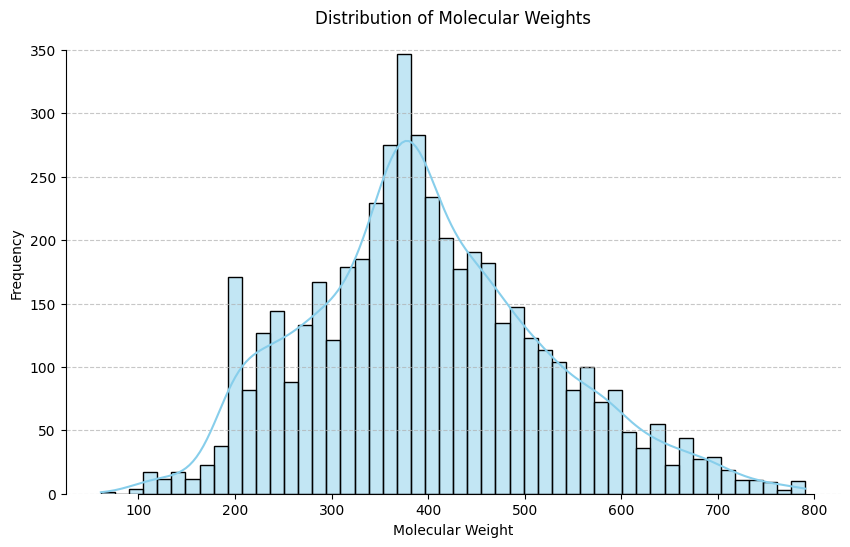

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data2['MolecularWeight'], bins=50, kde=True, color='skyblue')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Molecular Weights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True)
plt.show()

In [ ]:
filtered_data2['MolecularWeight'].max()

790.6820000000002

In [ ]:
filtered_data2['IC50'].max()

49600000.0

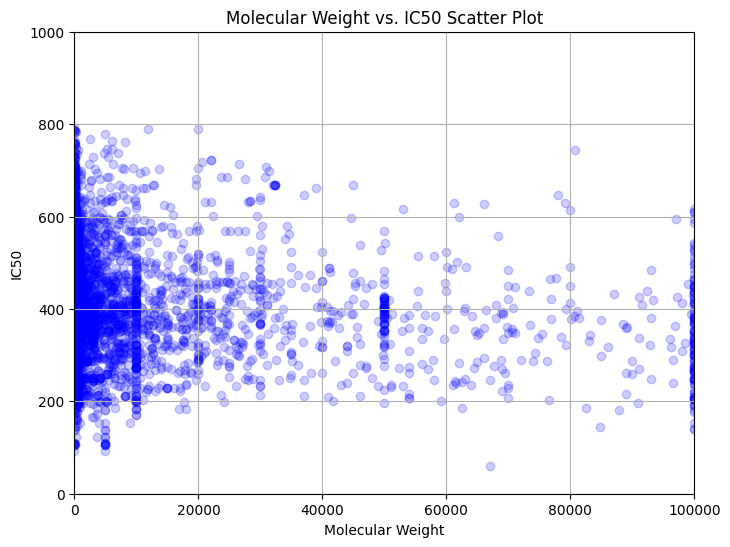

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data2['IC50'],filtered_data2['MolecularWeight'], c='blue', alpha=0.2)
plt.xlabel('Molecular Weight')
plt.ylabel('IC50')
plt.title('Molecular Weight vs. IC50 Scatter Plot')
plt.xlim(0, 100000)
plt.ylim(0, 1000)
plt.grid(True)
plt.show()

<ipython-input-44-b0ddeb587672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['len'] = [len(i) if i is not None else 0 for i in featNTarget['Smiles']]


Text(0, 0.5, 'probability')

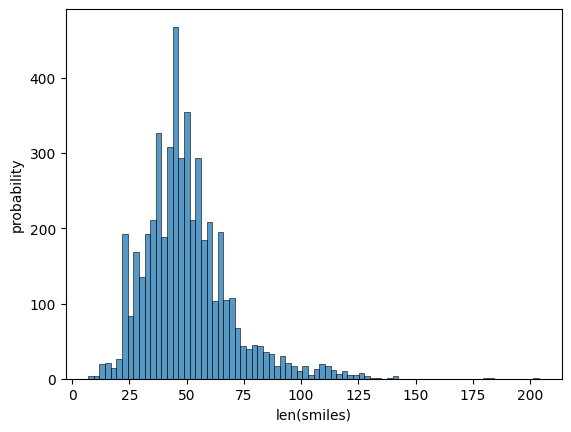

In [ ]:
featNTarget['len'] = [len(i) if i is not None else 0 for i in featNTarget['Smiles']]
smiles_lens = [len(i) if i is not None else 0 for i in featNTarget['Smiles']]
sns.histplot(smiles_lens)
plt.xlabel('len(smiles)')
plt.ylabel('probability')

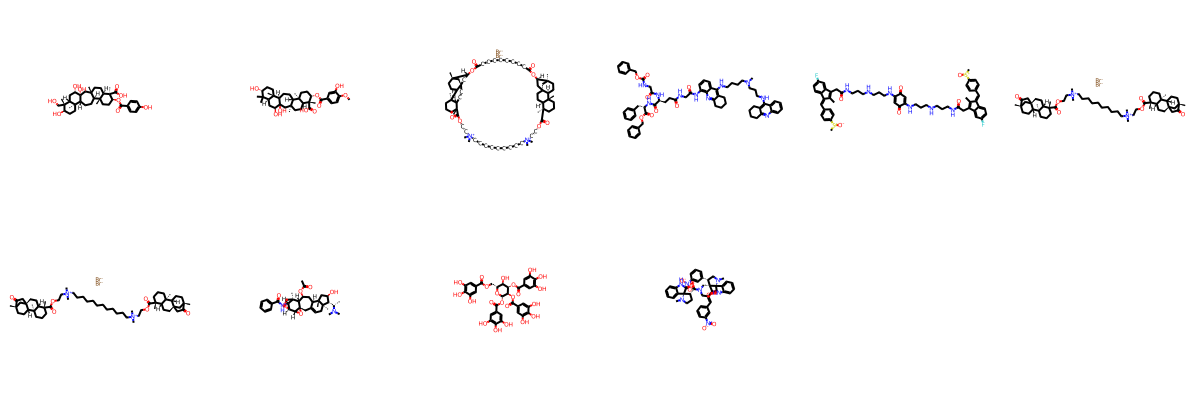

In [ ]:
# indices of large looking molecules
suspiciously_large = np.where(np.array(smiles_lens) > 130)[0]

# corresponding smiles string
long_smiles = featNTarget.loc[featNTarget.index[suspiciously_large]]['Smiles'].values

# look
Draw._MolsToGridImage([Chem.MolFromSmiles(i) for i in long_smiles], molsPerRow=6)

<ipython-input-144-824e8a06abf0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Molecule'] = filtered_data2['Smiles'].apply(Chem.MolFromSmiles)
<ipython-input-144-824e8a06abf0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Fingerprint'] = filtered_data2['Molecule'].apply(calculate_fingerprint)
<ipython-input-144-824e8a06abf0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

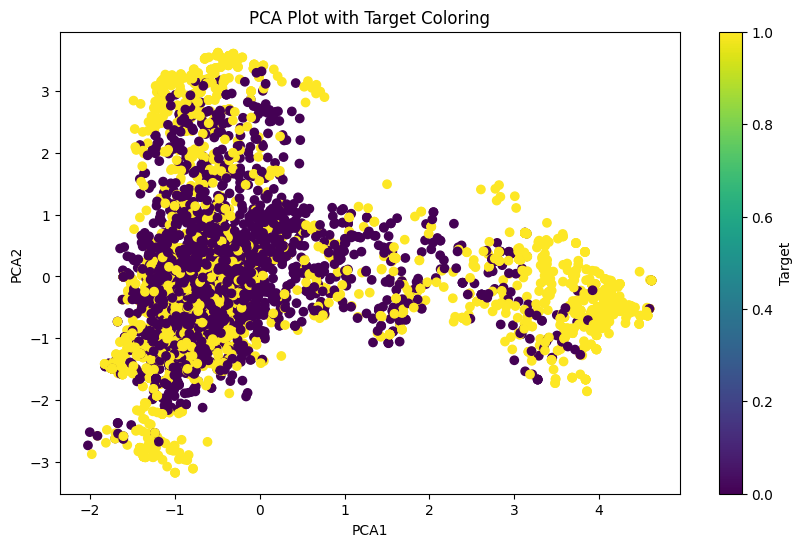

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Convert SMILES strings to molecular objects
filtered_data2['Molecule'] = filtered_data2['Smiles'].apply(Chem.MolFromSmiles)

# Calculate Morgan fingerprints for each molecule
def calculate_fingerprint(mol):
    return AllChem.GetMorganFingerprintAsBitVect(mol, 2)

filtered_data2['Fingerprint'] = filtered_data2['Molecule'].apply(calculate_fingerprint)

# Convert fingerprints to a NumPy array
fingerprints = list(filtered_data2['Fingerprint'])
fingerprints_array = [list(fp) for fp in fingerprints]

# Perform PCA on the fingerprint data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fingerprints_array)

# Add PCA results to the DataFrame
filtered_data2['PCA1'] = pca_result[:, 0]
filtered_data2['PCA2'] = pca_result[:, 1]

# Create a scatter plot with colors based on the 'target' column
plt.figure(figsize=(10, 6))
colors = filtered_data2['classLabel']
scatter = plt.scatter(filtered_data2['PCA1'], filtered_data2['PCA2'], c=colors, cmap='viridis')
plt.colorbar(scatter, label='Target')
plt.title('PCA Plot with Target Coloring')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
filtered_data2.to_excel('PreprocessedDataset_nonaturalCompound.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('PreprocessedDataset_nonaturalCompound.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conda environment

> Indented block





In [ ]:
import pandas as pd
import numpy as np





In [ ]:
import sys
sys.version

'3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]'

In [ ]:
# Grab Jaime's excellent condacolab package: https://github.com/jaimergp/condacolab
# Note: you should probably read the README file at that repo.
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import rdkit
print(rdkit.__version__)

2023.09.1


#Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading data

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Predictive Generative transfer learning/Part1_ModredDescriptors/PreprocessedDataset_nonaturalCompound.xlsx')

In [ ]:
df

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1          CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
2          CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
3           CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
4          CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
4920      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
4921      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
4922      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
4923      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
4924      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  \
0        28.00           1           True   
1        97.00           1           True   
2      2420.00           0           True   
3       100.00           1           True   
4       290.00           1           True   
...        ...         ...            ...   
4920    229.08           1           True   
4921  10000.00           0           True   
4922   1080.00           0           True   
4923    140.00           1           True   
4924    293.00           1           True   

                                              Morgan_FP  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
1     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
2     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
3     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
...                                                 ...   
4920  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4921  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4922  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4923  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4924  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>   
1     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>   
2     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>   
3     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>   
4     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>   
...                                                ...   
4920  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>   
4921  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>   
4922  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>   
4923  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>   
4924  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327df0>   

                                            Fingerprint      PCA1      PCA2  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
1     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.014164 -1.325272   
2     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.235565 -1.559108   
3     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  2.705664  0.148113   
4     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.600017 -0.978574   
...                                                 ...       ...       ...   
4920  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.478199  1.261641   
4921  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.671263 -0.016301   
4922  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.586529 -0.433179   
4923  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.677524 -0.748477   
4924  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.542966 -0.680578   

          tSNE1      tSNE2  MolecularWeight  
0    -52.761700 -42.736099          275.352  
1    -63.027809 -53.765778          325.364  
2    -61.968063 -54.078575        

#Standarization protocol starts here [Source link](https://www.blopig.com/blog/2022/05/molecular-standardization/)

In [ ]:
df.shape

(4925, 13)

In [ ]:
df1 = df.drop_duplicates(subset='Smiles')
df1.shape

(4077, 13)

In [ ]:
has_duplicates = df1['Smiles'].duplicated().any()

if has_duplicates:
    print("The 'Smiles' column contains duplicate values.")
else:
    print("The 'Smiles' column does not contain duplicate values.")

The 'Smiles' column does not contain duplicate values.


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'featNTarget' with 'Smiles' and 'Label' columns
# Group the DataFrame by 'Smiles' and calculate the label frequencies for each group
label_frequencies = df.groupby(['Smiles', 'classLabel']).size().reset_index(name='Frequency')

# Determine the label with the highest frequency for each SMILES
most_frequent_label = label_frequencies.groupby('Smiles')['Frequency'].idxmax()

# Create a DataFrame containing the most frequent label for each unique SMILES
unique_smiles_with_most_frequent_label = label_frequencies.loc[most_frequent_label]

# Merge the unique_smiles_with_most_frequent_label DataFrame with the original DataFrame
merged_df = pd.merge(df, unique_smiles_with_most_frequent_label, on=['Smiles', 'classLabel'], how='inner')

# The 'merged_df' now contains unique SMILES with the highest frequency of the label.



In [ ]:
merged_df

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
1              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
2              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
3              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
4              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
...                 ...                                                ...   
4818      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
4819      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
4820      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
4821      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
4822      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  \
0        28.00           1           True   
1        56.70           1           True   
2       500.00           1           True   
3        57.02           1           True   
4        14.10           1           True   
...        ...         ...            ...   
4818    229.08           1           True   
4819  10000.00           0           True   
4820   1080.00           0           True   
4821    140.00           1           True   
4822    293.00           1           True   

                                              Morgan_FP  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
1     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
2     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
3     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
...                                                 ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>   
1     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e885f0>   
2     <rdkit.Chem.rdchem.Mol object at 0x7bcfd93c61f0>   
3     <rdkit.Chem.rdchem.Mol object at 0x7bcfd93a2490>   
4     <rdkit.Chem.rdchem.Mol object at 0x7bcfd940cf20>   
...                                                ...   
4818  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>   
4819  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>   
4820  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>   
4821  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>   
4822  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327df0>   

                                            Fingerprint      PCA1      PCA2  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
1     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
2     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
3     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
4     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
...                                                 ...       ...       ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.478199  1.261641   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.671263 -0.016301   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.586529 -0.433179   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.677524 -0.748477   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.542966 -0.680578   

          tSNE1      tSNE2  MolecularWeight  Frequency  
0    -52.761700 -42.736099          275.352         27  
1    -52.229740 -43.653553          275.352         27  
2

In [ ]:
merged_df = merged_df.drop_duplicates(subset='Smiles')
merged_df.shape

(4077, 14)

In [ ]:
has_duplicates = merged_df['Smiles'].duplicated().any()

if has_duplicates:
    print("The 'Smiles' column contains duplicate values.")
else:
    print("The 'Smiles' column does not contain duplicate values.")

The 'Smiles' column does not contain duplicate values.


In [ ]:
featNTarget=merged_df

In [ ]:
from IPython.display import SVG # to use Scalar Vector Graphics (SVG) not bitmaps, for cleaner lines

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw # to draw molecules
from rdkit.Chem.Draw import IPythonConsole # to draw inline in iPython
from rdkit.Chem import rdDepictor  # to generate 2D depictions of molecules
from rdkit.Chem.Draw import rdMolDraw2D # to draw 2D molecules using vectors

from rdkit.Chem.MolStandardize import rdMolStandardize


In [ ]:
def standardize_mol(mol, verbose=False):

    # Follows the steps from:
    #  https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
    # as described **excellently** (by Greg Landrum) in
    # https://www.youtube.com/watch?v=eWTApNX8dJQ -- thanks JP!

    from rdkit.Chem.MolStandardize import rdMolStandardize
    # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
    clean_mol = rdMolStandardize.Cleanup(mol)
    if verbose:
        print('Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:')
        #draw_mol_with_SVG(clean_mol)

    # if many fragments, get the "parent" (the actual mol we are interested in)
    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    if verbose:
        print('Select the "parent" fragment:')
        #draw_mol_with_SVG(parent_clean_mol)

    # try to neutralize molecule
    uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    if verbose:
        print('Neutralize the molecule:')
        #draw_mol_with_SVG(uncharged_parent_clean_mol)


    te = rdMolStandardize.TautomerEnumerator() # idem
    taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    if verbose:
        print('Enumerate tautomers:')
        #draw_mol_with_SVG(taut_uncharged_parent_clean_mol)
    assert taut_uncharged_parent_clean_mol != None

    if verbose: print(Chem.MolToSmiles(taut_uncharged_parent_clean_mol))
    return taut_uncharged_parent_clean_mol


def standardize_smiles(smiles, verbose=False):
  """Standardize the SMILES string, select its parent molecule, uncharge it,
    then enumerate all the tautomers."""
  if verbose: print(smiles)
  std_mol = standardize_mol(Chem.MolFromSmiles(smiles), verbose=verbose)
  return Chem.MolToSmiles(std_mol)


def draw_mol_with_SVG(mol, molSize=(450,150)):
    """Use SVG to draw an RDKit molecule, mol."""
    mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc) # Compute 2D coordinates
    # Initialize the drawer with the size
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc) # Draw the molcule
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText() # Get the SVG string
    display(SVG(svg.replace('svg:',''))) # Fix the SVG string and display

# Remote any salt

In [ ]:
featNTarget['cleanedMol']=featNTarget['Smiles'].apply(standardize_smiles, verbose=True)
featNTarget



CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
Cc1ccc2c(N)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(N)c3c(nc2c1)CCCC3
CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)C

[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Running LargestFragmentChooser
[20:24:27] Fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
[20:24:27] New largest fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C (41)
[20:24:27] Running Uncharger
[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Running LargestFragmentChooser
[20:24:27] Fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
[20:24:27] New largest fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2 (43)
[20:2

Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2
C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1
CCCCCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2
CCN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1OC
CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers

[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Running LargestFragmentChooser
[20:24:27] Fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)C[C@@H]4C=C(C)C[C@H]5C4)c3[C@@H](C1)C2
[20:24:27] New largest fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)C[C@@H]4C=C(C)C[C@H]5C4)c3[C@@H](C1)C2 (96)
[20:24:27] Running Uncharger
[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Initializing MetalDisconnector
[20:24:27] Running MetalDisconnector
[20:24:27] Initializing Normalizer
[20:24:27] Running Normalizer
[20:24:27] Running LargestFragmentChooser
[20:24:27] Fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC

Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
O=C(CF)c1cnn(C2CCCC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CF)c1cnn(C2CCCC2)c1
CNC(=O)Oc1ccccc1OC(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccccc1OC(C)C
CCC(CC)n1cc(C(=O)C(F)(F)F)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(CC)n1cc(C(=O)C(F)(F)F)cn1
CC(C)n1cc(C(=O)C(F)(F)F)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)n1cc(C(=O)C(F)(F)F)cn1
CCCC(CC1(C(=O)Nc2nnc(CC3CC3)s2)CCCC1)C(=O)O
Remove H

[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1C2
[20:24:28] New largest fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1C2 (57)
[20:24:28] Running Uncharger
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: C=CC(=O)N1C/C(=C\c2cccc([N+](=O)[O-])c2)C(=O)/C(=C/c2cccc([N+](=O)[O-])c2)C1
[20:24:28] New largest fragment: C=CC(=O)N1C/C(=C\c2cccc([N+](=O)[

Enumerate tautomers:
COCCN1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
CN1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
c1ccc(C(Nc2ccnc(N3CCNCC3)n2)c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(C(Nc2ccnc(N3CCNCC3)n2)c2ccccc2)cc1
COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2
C/C=C(\C)C(=O)N[C@@H]1C=C2CC[C@H]3C4=CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
N

[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2
[20:24:28] New largest fragment: COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2 (57)
[20:24:28] Fragment: Cl
[20:24:28] Running Uncharger
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: C/C=C(\C)C(=O)N[C@@H]1C=C2CC[C@H]3C4=CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)CC1
[20:24:28] New largest fr

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCC[n+]2ccccc2)cc1
CCN1CC[C@@]2(C)c3cc(OC(=O)NCc4ccccc4)ccc3CC12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CC[C@@]2(C)c3cc(OC(=O)NCc4ccccc4)ccc3CC12
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C
COc1ccc(CN2CC=C(c3ccc(F)cc3)CC2)cc1OCc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN2CC=C(c3ccc(F)cc3)CC2)cc1OCc1ccccc1
CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragme

[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2
[20:24:28] New largest fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2 (60)
[20:24:28] Running Uncharger
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: CC[C@H](C)C(=O)OCCCc1ccc2oc(-c3ccc4c(c3)OCO4)cc2c1
[20:24:28] New largest fragment: CC[C@H](C)C(=O)OCCCc1ccc2oc(-c3ccc4c(c3)OCO4)cc2c1 (52)
[20:24:28] Running Uncharger
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[2

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)C(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1N2C
C/C(=C\C(=O)N(C)[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)C([C@H](C)N(C)C)=CC[C@@H]32)C1)C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C(=C\C(=O)N(C)[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)C([C@H](C)N(C)C)=CC[C@@H]32)C1)C(C)C
CSc1nc(-c2ccc(C(F)(F)F)cc2)nn1C(=O)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CSc1nc(-c2ccc(C(F)(F)F)cc2)nn1C(=O)N(C)C
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1
O=C(NCCCCCCCNc1c2c(nc3ccccc13)CC

[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: c1ccc2oc(CNCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc2c1
[20:24:28] New largest fragment: c1ccc2oc(CNCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc2c1 (68)
[20:24:28] Running Uncharger
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Initializing MetalDisconnector
[20:24:28] Running MetalDisconnector
[20:24:28] Initializing Normalizer
[20:24:28] Running Normalizer
[20:24:28] Running LargestFragmentChooser
[20:24:28] Fragment: COc1cccc2cc(CNCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12
[20:24:28] New largest fragment: COc1cccc2cc(CNCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12 

CCN1CC[C@@]2(C)c3cc(OC(=O)N[C@@H](C)c4ccccc4)ccc3CC12
COc1cc(CNCCCNC2=CC(=O)C(NCCCNCc3ccc(O)c(OC)c3)=CC2=O)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CNCCCNC2=CC(=O)C(NCCCNCc3ccc(O)c(OC)c3)=CC2=O)ccc1O
[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCCCCC[n+]1cccc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)ccc[n+]2CCCCCCCCCCC[n+]1cccc2ccccc21
[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCCCCCC[n+]1cccc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)ccc[n+]2CCCCCCCCCCCC[n+]1cccc2ccccc21
C[N+](C)(CCNC(=O)C(=O)NCC[N+](C)(C)Cc1ccccc1Cl)Cc1ccccc1Cl.[Cl-].[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reioni

[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragment: [Br-]
[20:24:29] New largest fragment: [Br-] (1)
[20:24:29] Fragment: [Br-]
[20:24:29] New largest fragment: [Br-] (1)
[20:24:29] Fragment: c1ccc2c(c1)ccc[n+]2CCCCCCCCCCC[n+]1cccc2ccccc21
[20:24:29] New largest fragment: c1ccc2c(c1)ccc[n+]2CCCCCCCCCCC[n+]1cccc2ccccc21 (67)
[20:24:29] Running Uncharger
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragm

Enumerate tautomers:
CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1
NC(=O)Cc1nc(NCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(=O)Cc1nc(NCc2ccccc2)c2ccccc2n1
COc1ccc(CCNc2nc(NC(C)=O)nc3ccccc23)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CCNc2nc(NC(C)=O)nc3ccccc23)cc1OC
O=C(CCCCC1CCSS1)NCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCC1CCSS1)NCCCCNc1c2c(nc3ccccc13)CCCC2
Cc1c(N2CCN(C)CC2)nc2ccccc2c1C(=O)NCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(N2C

[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragment: NC(=O)Cc1nc(NCc2ccccc2)c2ccccc2n1
[20:24:29] New largest fragment: NC(=O)Cc1nc(NCc2ccccc2)c2ccccc2n1 (38)
[20:24:29] Running Uncharger
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragment: COc1ccc(CCNc2nc(NC(C)=O)nc3ccccc23)cc1OC
[20:24:29] New largest fragment: COc1ccc(CCNc2nc(NC(C)=O)nc3ccccc23)cc1OC (49)
[20:24:29] Running Uncharger
[20:24:29] Ini

Enumerate tautomers:
CC(=O)Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1
COC(=O)C(CC1=NO[C@@H]2CCC[C@@H]2[C@H]1c1ccccc1)C(=O)OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C(CC1=NO[C@@H]2CCC[C@@H]2[C@H]1c1ccccc1)C(=O)OC
COc1ccc(F)c[n+]1C.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(F)c[n+]1C
COc1ccc(C(F)(F)F)c[n+]1CCCCCOc1ccc2c(C)cc(=O)oc2c1.O=S(=O)([O-])C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(F)(F)F)c[n+]1CCCCCOc1ccc2c(C)cc(=O)oc2c1
Nc1c2c(nc3c1C(c1c(Cl)cccc1Cl)c1ccc4ccccc4c1O3)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the

[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragment: COC(=O)C(CC1=NO[C@@H]2CCC[C@@H]2[C@H]1c1ccccc1)C(=O)OC
[20:24:29] New largest fragment: COC(=O)C(CC1=NO[C@@H]2CCC[C@@H]2[C@H]1c1ccccc1)C(=O)OC (48)
[20:24:29] Running Uncharger
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragment: COc1ccc(F)c[n+]1C
[20:24:29] New largest fragment: COc1ccc(F)c[n+]1C (19)
[20:24:29] Fragment: F[B-](F)(F)F
[20:24:29] Ru

O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NC(c1ccccc1)N2
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CNCCO2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CNCCO2
COc1cc(N)c(Cl)cc1/C(CCC1CCN(CC2CCCCC2)CC1)=N/O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(CCC1CCN(CC2CCCCC2)CC1)=NO
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCCN6C(=O)c7ccccc7C6=O)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCCN6C(=O)c7ccccc7C6=O)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
COc1ccc2c(c1OC)C(=O)C(C)C2
Remov

[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CNCCO2
[20:24:29] New largest fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CNCCO2 (58)
[20:24:29] Running Uncharger
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Initializing MetalDisconnector
[20:24:29] Running MetalDisconnector
[20:24:29] Initializing Normalizer
[20:24:29] Running Normalizer
[20:24:29] Running LargestFragmentChooser
[20:24:29] Fragment: COc1cc(N)c(Cl)cc1/C(CCC1CCN(CC2CCCCC2)CC1)=N/O
[20:24:29] New largest fragment: COc1cc(N)c(Cl)cc1/C(CCC1CCN(CC2CCCCC2)CC1)=N/O (62)
[20:24:29] 

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1C1c2ccc3ccccc3c2Oc2nc3c(c(N)c21)CCCC3
Cc1ccc(C2c3ccc4ccccc4c3Oc3nc4c(c(N)c32)CCCC4)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(C2c3ccc4ccccc4c3Oc3nc4c(c(N)c32)CCCC4)cc1
COc1ccc2nc3c(c(NCCCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
CCCC(CC1(C(=O)Nc2nncs2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)Nc2nncs2)CCCC1)C(=O)O
CCc1nnc(NC

[20:24:30] Initializing MetalDisconnector
[20:24:30] Running MetalDisconnector
[20:24:30] Initializing Normalizer
[20:24:30] Running Normalizer
[20:24:30] Initializing MetalDisconnector
[20:24:30] Running MetalDisconnector
[20:24:30] Initializing Normalizer
[20:24:30] Running Normalizer
[20:24:30] Running LargestFragmentChooser
[20:24:30] Fragment: CCCC(CC1(C(=O)N[C@H]2CC[C@@H](C(N)=O)CC2)CCCC1)C(=O)O
[20:24:30] New largest fragment: CCCC(CC1(C(=O)N[C@H]2CC[C@@H](C(N)=O)CC2)CCCC1)C(=O)O (57)
[20:24:30] Running Uncharger
[20:24:30] Initializing MetalDisconnector
[20:24:30] Running MetalDisconnector
[20:24:30] Initializing Normalizer
[20:24:30] Running Normalizer
[20:24:30] Initializing MetalDisconnector
[20:24:30] Running MetalDisconnector
[20:24:30] Initializing Normalizer
[20:24:30] Running Normalizer
[20:24:30] Running LargestFragmentChooser
[20:24:30] Fragment: c1ncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)cc4)cc23)s1
[20:24:30] New largest fragment: c1ncc(-c2cc3c(cn2)[nH]c2ncc(-c4cc

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@@H](C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:31] Initializing MetalDisconnector
[20:24:31] Running MetalDisconnector
[20:24:31] Initializing Normalizer
[20:24:31] Running Normalizer
[20:24:31] Initializing MetalDisconnector
[20:24:31] Running MetalDisconnector
[20:24:31] Initializing Normalizer
[20:24:31] Running Normalizer
[20:24:31] Running LargestFragmentChooser
[20:24:31] Fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@@H](C1)C2
[20:24:31] New largest fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@@H](C1)C2 (92)
[20:24:31] Fragment: Cl
[20:24:31] Running Uncharger
[20:24:31] Initializing MetalDisconnector
[20:24:31] Running MetalDisconnector
[20:24:31] Initializing Normalizer
[20:24:31] Running Normalizer
[20:24:31] Initializing MetalDisconnector
[20:24:31] Running MetalDisconnector
[20:24:31] Initializing Normalizer
[20:24:31] Running Normalizer
[20:24:31] Running LargestFragmentChooser
[20:24:31] Fragment: CC1=CC2Cc3nc4cc(C

Enumerate tautomers:
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@@H](C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
O=C(c1ccc(CN2CCC(CCO)CC2)cc1)c1ccc(O)c(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccc(CN2CCC(CCO)CC2)cc1)c1ccc(O)c(F)c1
O=C(c1cnn(C2CCCC2)c1)C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1cnn(C2CCCC2)c1)C(F)(F)F
COc1cc(C(=O)NCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
Remove Hs, disconnect metal 

[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Running LargestFragmentChooser
[20:24:32] Fragment: O=C(c1ccc(CN2CCC(CCO)CC2)cc1)c1ccc(O)c(F)c1
[20:24:32] New largest fragment: O=C(c1ccc(CN2CCC(CCO)CC2)cc1)c1ccc(O)c(F)c1 (50)
[20:24:32] Running Uncharger
[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Running LargestFragmentChooser
[20:24:32] Fragment: O=C(c1cnn(C2CCCC2)c1)C(F)(F)F
[20:24:32] New largest fragment: O=C(c1cnn(C2CCCC2)c1)C(F)(F)F (27)
[20:24:32] Running Uncharger
[20:24:32] Initi

CC(C)Cc1ccc(C(C)C(=O)NS(=O)(=O)c2ccc(N)cc2)cc1
CCCCCCCNC(=O)Oc1ccc2c(c1)CN(C)C(c1ccc(F)cc1)N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1ccc2c(c1)CN(C)C(c1ccc(F)cc1)N2C
CN1CC[C@@]2(C)c3cc(OC(=O)NCc4ccccc4)ccc3N(C)C12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)NCc4ccccc4)ccc3N(C)C12
COc1cc2cc(C(=O)CCc3cc[n+](C)cc3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCc3cc[n+](C)cc3)sc2cc1OC
C=C(C)C[N+](C)(C)c1ccccc1O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C(C)C[

[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Running LargestFragmentChooser
[20:24:32] Fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)CN(C)C(c1ccc(F)cc1)N2C
[20:24:32] New largest fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)CN(C)C(c1ccc(F)cc1)N2C (62)
[20:24:32] Running Uncharger
[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Initializing MetalDisconnector
[20:24:32] Running MetalDisconnector
[20:24:32] Initializing Normalizer
[20:24:32] Running Normalizer
[20:24:32] Running LargestFragmentChooser
[20:24:32] Fragment: CN1CC[C@@]2(C)c3cc(OC(=O)NCc4ccccc4)ccc3N(C)C12
[20:24:32] New largest fragment: CN1CC[C@@]2(C)c3cc(OC(=O)NCc4ccccc4)ccc3N(C)C12 (51)
[

Enumerate tautomers:
COc1ccc(C2Oc3cc(O)c(C/C=C(\C)CCC=C(C)C)c(O)c3C(=O)C2O)cc1O
O=C1C[C@@H](c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C[C@@H](c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c21
CCCCC/C=C\C/C=C\CCCCCCCC(=O)OCCCc1cc(OC)c2oc(-c3ccc4c(c3)OCO4)cc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCC/C=C\C/C=C\CCCCCCCC(=O)OCCCc1cc(OC)c2oc(-c3ccc4c(c3)OCO4)cc2c1
CCCCCCCC/C=C\CCCCCCCC(=O)OCCCc1cc(OC)c2oc(-c3ccc4c(c3)OCO4)cc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCC/C=C\CCCCCCCC(=O)OCCCc1cc(OC)c2oc(-c3ccc4c(c3)OCO4)cc2c1
N#CC(C#N)=C1NCCN1CCNCc1ccc(CN2CCC(O)CC2)o1
Remove Hs, disconnect metal atoms, normalize the 

[20:24:33] Initializing MetalDisconnector
[20:24:33] Running MetalDisconnector
[20:24:33] Initializing Normalizer
[20:24:33] Running Normalizer
[20:24:33] Initializing MetalDisconnector
[20:24:33] Running MetalDisconnector
[20:24:33] Initializing Normalizer
[20:24:33] Running Normalizer
[20:24:33] Running LargestFragmentChooser
[20:24:33] Fragment: O=C1C[C@@H](c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c21
[20:24:33] New largest fragment: O=C1C[C@@H](c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c21 (33)
[20:24:33] Running Uncharger
[20:24:33] Initializing MetalDisconnector
[20:24:33] Running MetalDisconnector
[20:24:33] Initializing Normalizer
[20:24:33] Running Normalizer
[20:24:33] Initializing MetalDisconnector
[20:24:33] Running MetalDisconnector
[20:24:33] Initializing Normalizer
[20:24:33] Running Normalizer
[20:24:33] Running LargestFragmentChooser
[20:24:33] Fragment: CCCCC/C=C\C/C=C\CCCCCCCC(=O)OCCCc1cc(OC)c2oc(-c3ccc4c(c3)OCO4)cc2c1
[20:24:33] New largest fragment: CCCCC/C=C\C/C=C\CCCCCCCC(=O)OCCCc1cc(OC)c2

Enumerate tautomers:
O=C(NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
Cl.O=C(NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
COc1ccc(-c2cc3c(c(=O)o2)C[C@@H]2[C@@]4(C)CC[C@H](O)C(C)(C)[C@@H]4CC[C@@]2(C)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2cc3c(c(=O)o2)C[C@@H]2[C@@]4(C)CC[C@H](O)C(C)(C)[C@@H]4CC[C@@]2(C)O3)cc1
COc1ccc2nc3c(c(NCCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:33] Initializing MetalDisconnector
[20:24:33] Running MetalDisconnector
[20:24:33] Initializing Normalizer
[20:24:33] Running Normalizer
[20:24:33] Initializing MetalDisconnector
[20:24:33] Running MetalDisconnector
[20:24:33] Initializing Normalizer
[20:24:33] Running Normalizer
[20:24:33] Running LargestFragmentChooser
[20:24:34] Fragment: Cl
[20:24:34] New largest fragment: Cl (2)
[20:24:34] Fragment: O=C(NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
[20:24:34] New largest fragment: O=C(NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3 (76)
[20:24:34] Running Uncharger
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: COc1ccc(-c2cc3c(c(=

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
COc1cc2oc(-c3ccc(CN(C)Cc4ccccc4)cc3)cc(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2oc(-c3ccc(CN(C)Cc4ccccc4)cc3)cc(=O)c2cc1OC
COc1ccc2oc(=O)c(-c3ccc(CN(C)Cc4ccccc4)cc3)cc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2oc(=O)c(-c3ccc(CN(C)Cc4ccccc4)cc3)cc2c1
COc1ccc2cc(-c3cccc(CN(C)Cc4ccccc4)c3)c(=O)oc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc(-c3cccc(CN(C)Cc4ccccc4)c3)c(=O)oc2c1
CCOC(=O)C1=C(Nc2ccc(C)cc2)C[C@@H](c2ccccc2)N(c2ccc(C)cc2)[C@@H]1c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the

[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: COc1cc2oc(-c3ccc(CN(C)Cc4ccccc4)cc3)cc(=O)c2cc1OC
[20:24:34] New largest fragment: COc1cc2oc(-c3ccc(CN(C)Cc4ccccc4)cc3)cc(=O)c2cc1OC (56)
[20:24:34] Running Uncharger
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: COc1ccc2oc(=O)c(-c3ccc(CN(C)Cc4ccccc4)cc3)cc2c1
[20:24:34] New largest fragment: COc1ccc2oc(=O)c(-c3ccc(CN(C)Cc4ccccc4)cc3)cc2c1 (5

Enumerate tautomers:
C[C@@]12CC[C@@H]3[C@](C)(CC[C@H](OC(=O)c4ccc(O)cc4)[C@]3(C)C(=O)O)[C@H]1CC[C@@H]1[C@@]3(C)CC[C@@H](O)[C@](C)(CO)[C@@H]3C[C@H](O)[C@@]1(O)C2
O=C(Nc1cccc2c1C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1cccc2c1C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O)c1ccccc1
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCCC3
O=C(NCCc1c[nH]c2ccccc12)c1cc[n+](Cc2ccc(F)cc2)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCc1c[nH]c2ccccc12)c1cc[n+](Cc2ccc(F)cc2)cc1
CCOC(=O)C1=C(Nc2ccc(Cl)cc2)C[C@@H](c2ccc(OC)cc2)N(c2ccc(Cl)cc2)[C@@H]

[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: O=C(Nc1cccc2c1C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O)c1ccccc1
[20:24:34] New largest fragment: O=C(Nc1cccc2c1C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O)c1ccccc1 (64)
[20:24:34] Running Uncharger
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCCC3
[20:24:34] New largest fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCCC3 (51)
[20

Enumerate tautomers:
CCOC(=O)C1C(=Nc2ccc(OC)cc2)C[C@@H](c2ccc(C)cc2)N(c2ccc(OC)cc2)[C@@H]1c1ccc(C)cc1
COC(=O)C1=C(Nc2ccc(F)cc2)C[C@@H](c2ccccc2)N(c2ccc(F)cc2)[C@@H]1c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C1C(=Nc2ccc(F)cc2)C[C@@H](c2ccccc2)N(c2ccc(F)cc2)[C@@H]1c1ccccc1
CN(Cc1ccccc1)Cc1ccc(/C=C2\CCc3cc(OCCCCCN4CCN(Cc5ccc(F)cc5)CC4)ccc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(/C=C2\CCc3cc(OCCCCCN4CCN(Cc5ccc(F)cc5)CC4)ccc3C2=O)cc1
O=C(c1ccccc1)N1c2ccccc2Sc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccccc1)N1c2ccccc2Sc2ccccc21
COc1ccc(-c2cc3c(c(=O)o2)C[C@@H]2[C@@]4(C)CCC(=O)C(C)(C)[C@@H]4

[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: COC(=O)C1=C(Nc2ccc(F)cc2)C[C@@H](c2ccccc2)N(c2ccc(F)cc2)[C@@H]1c1ccccc1
[20:24:34] New largest fragment: COC(=O)C1=C(Nc2ccc(F)cc2)C[C@@H](c2ccccc2)N(c2ccc(F)cc2)[C@@H]1c1ccccc1 (63)
[20:24:34] Running Uncharger
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: CN(Cc1ccccc1)Cc1ccc(/C=C2\CCc3cc(OCCCCCN4CCN(Cc5ccc(F)cc5)CC4)ccc3C2=O)cc1
[20:24:34] N


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(COC[C@H]2NC[C@H](OCc3ccccc3)[C@@H](OCc3ccccc3)[C@@H]2OCc2ccccc2)cc1
CN(C)c1ccc(C(=O)NCCNc2c3c(nc4ccccc24)CCCC3)cc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccc(C(=O)NCCNc2c3c(nc4ccccc24)CCCC3)cc1
O=C1C=C(NCCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1CC(=NCCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
O=C1C(Cl)=C(NCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=NCCNc2c3c(nc4ccccc24)CCCC3)C(Cl)C(=O)c2ccccc21
Cc1cc2nc3c(nc2cc1C)C1(C(C#N)=C(N)N2CC(C)(C)CNC2=C1[N+](=O)[O-])c1ccc

[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: c1ccc(COC[C@H]2NC[C@H](OCc3ccccc3)[C@@H](OCc3ccccc3)[C@@H]2OCc2ccccc2)cc1
[20:24:34] New largest fragment: c1ccc(COC[C@H]2NC[C@H](OCc3ccccc3)[C@@H](OCc3ccccc3)[C@@H]2OCc2ccccc2)cc1 (76)
[20:24:34] Running Uncharger
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Initializing MetalDisconnector
[20:24:34] Running MetalDisconnector
[20:24:34] Initializing Normalizer
[20:24:34] Running Normalizer
[20:24:34] Running LargestFragmentChooser
[20:24:34] Fragment: CN(C)c1ccc(C(=O)NCCNc2c3c(nc4ccccc24)CCCC3)cc1
[20:24:34] New largest fragment: CN(C)c1ccc(C(=O)NCCNc2c3c(nc4ccccc24)CCCC3)cc1 (57)
[20:24:34] Fragment: Cl
[20:24:34] Running Uncharger
[20:24:34] Initializing MetalDisconnector


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1N[C@H](COCc2ccccc2)[C@@H](OCc2ccccc2)[C@H](OCc2ccccc2)C1OCc1ccccc1
CCCCN(CCCC)CCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(CCCC)CCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)C[C@@H]4C=C(C)C[C@H]5C4)c3[C@@H](C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)C[C@@H]4C=C(C)C[C@H]5C4)c3[C@@H](C1)C2
COc1cccc(CC2CCN(CCCCOc3ccc4c(c3)oc(=O)c3ccccc34)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CC2CCN(CCCCOc3ccc4c(c3)

[20:24:35] Initializing MetalDisconnector
[20:24:35] Running MetalDisconnector
[20:24:35] Initializing Normalizer
[20:24:35] Running Normalizer
[20:24:35] Initializing MetalDisconnector
[20:24:35] Running MetalDisconnector
[20:24:35] Initializing Normalizer
[20:24:35] Running Normalizer
[20:24:35] Running LargestFragmentChooser
[20:24:35] Fragment: O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccccc1
[20:24:35] New largest fragment: O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccccc1 (55)
[20:24:35] Running Uncharger
[20:24:35] Initializing MetalDisconnector
[20:24:35] Running MetalDisconnector
[20:24:35] Initializing Normalizer
[20:24:35] Running Normalizer
[20:24:35] Initializing MetalDisconnector
[20:24:35] Running MetalDisconnector
[20:24:35] Initializing Normalizer
[20:24:35] Running Normalizer
[20:24:35] Running LargestFragmentChooser
[20:24:35] Fragment: O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccccc1F
[20:24:35] New largest fragment: O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccccc1F (55)
[20:24:35] Running Uncharger
[20:24:35]

Enumerate tautomers:
COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
CCOC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccccc1[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccccc1[N+](=O)[O-]
CCCOCCn1c(=O)nc(NC2CCC(O)CC2)c2nnc(-c3ccc(OC)nc3)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCOCCn1c(=O)nc(NC2CCC(O)CC2)c2nnc(-c3ccc(OC)nc3)cc21
O/N=C/c1nc(CCCCNc2c3c(nc4ccc(Cl)cc24)CCCC3)ccc1O
Remove Hs, disconnect metal atoms, normalize

[20:24:36] Initializing MetalDisconnector
[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Initializing MetalDisconnector
[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Running LargestFragmentChooser
[20:24:36] Fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6ccccc6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
[20:24:36] New largest fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6ccccc6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1 (93)
[20:24:36] Running Uncharger
[20:24:36] Initializing MetalDisconnector
[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Initializing MetalDisconnector
[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Running LargestFragmentChooser
[20:24:36] Fragm

Enumerate tautomers:
CCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
COc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1
COc1cc2nc(Cl)nc(NCCCNC(=O)CCCCC3CCSS3)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2nc(Cl)nc(NCCCNC(=O)CCCCC3CCSS3)c2cc1OC
O=C(CCCC[C@H]1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCC[C@H]1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
O=C(O)CCCC[C@@H]1CCSS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragme

[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Initializing MetalDisconnector
[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Running LargestFragmentChooser
[20:24:36] Fragment: COc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1
[20:24:36] New largest fragment: COc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1 (62)
[20:24:36] Running Uncharger
[20:24:36] Initializing MetalDisconnector
[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Initializing MetalDisconnector
[20:24:36] Running MetalDisconnector
[20:24:36] Initializing Normalizer
[20:24:36] Running Normalizer
[20:24:36] Running LargestFragmentChooser
[20:24:36] Fragment: COc1cc2nc(Cl)nc(NCCCNC(=O)CCCCC3CCSS3)c2cc1OC
[20:24:36] New largest fragment: COc1cc2nc(Cl)nc(NCCCNC(=O)CCCCC3CCSS3)c2cc1OC (60)

Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc2ccccc2c1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C(CC(C)C)NC(C)=O)C(C)C
O=C1C(Cl)=C(NCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=NCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(Cl)C(=O)c2ccccc21
COc1ccc2nc3c(c(NCCNC4=CC(=O)c5ccccc5C4=O)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCN=C4CC(=O)c5ccccc5C4=O)c2c1)CCCC3
O=C1C=C(NCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: O=C1C(Cl)=C(NCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21
[20:24:38] New largest fragment: O=C1C(Cl)=C(NCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21 (53)
[20:24:38] Running Uncharger
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: COc1ccc2nc3c(c(NCCNC4=CC(=O)c5ccccc5C4=O)c2c1)CCCC3
[20:24:38] New largest fragment: COc1ccc2nc3c(c(NCCNC4=CC(=O)c5

Enumerate tautomers:
O=C1CC(=NCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21
COc1ccc2nc3c(c(NCCCNC4=C(Cl)C(=O)c5ccccc5C4=O)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCCN=C4C(=O)c5ccccc5C(=O)C4Cl)c2c1)CCCC3
Cc1c(C)c2ccc(OCc3ccc(CN(C)Cc4ccccc4)cc3)cc2oc1=O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCc3ccc(CN(C)Cc4ccccc4)cc3)cc2oc1=O
C[n+]1c2ccccc2c(-c2ccccc2)c2ccccc21.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1c2ccccc2c(-c2ccccc2)c2ccccc21
CO[C@@H]1C=C[C@@]23c4cc5c(cc4C(=O)N(C)[C@@H]2C(=O)N(C)[C@H]3C1)OCO5
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
S

[20:24:38] New largest fragment: Cc1c(C)c2ccc(OCc3ccc(CN(C)Cc4ccccc4)cc3)cc2oc1=O (58)
[20:24:38] Fragment: Cl
[20:24:38] Running Uncharger
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: C[n+]1c2ccccc2c(-c2ccccc2)c2ccccc21
[20:24:38] New largest fragment: C[n+]1c2ccccc2c(-c2ccccc2)c2ccccc21 (37)
[20:24:38] Fragment: F[B-](F)(F)F
[20:24:38] Running Uncharger
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)O[C@H]2CC[C@@]3(C)[C@@H](CC[C@@]4(C)C[C@@]5(O)[C@H](CC[C@@H]43)[C@@]3(C)CC[C@@H](O)C(C)(C)[C@@H]3C[C@@H]5O)[C@@]2(C)C(=O)O)cc1O
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)C1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)C1N2C
COc1cccc2c1CC[C@H](NC(=O)N(C)C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2c1CC[C@H](NC(=O)N(C)C)C2
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6ccccc6C(F)(F)F)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]

[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6ccccc6C(F)(F)F)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
[20:24:38] New largest fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6ccccc6C(F)(F)F)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1 (96)
[20:24:38] Running Uncharger
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: O=C(CCc1ccccc1)N1c2cc

Enumerate tautomers:
COc1ccccc1/C=C1\CN(C(=O)C2CCN(C)[C@]23C(=O)Nc2ccccc23)C[C@]2(C1=O)[C@H](c1ccccc1OC)CN(C)[C@]21C(=O)Nc2ccccc21
C=CC(=O)N1C/C(=C\c2ccccc2F)C(=O)[C@@]2(C1)[C@H](c1ccccc1F)CN(C)[C@]21C(=O)Nc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2ccccc2F)C(=O)[C@@]2(C1)[C@H](c1ccccc1F)CN(C)[C@]21C(=O)Nc2ccccc21
Cc1ccc2c(c1)CC(=O)N2C(=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(c1)cc(O)n2C(=O)c1ccccc1
CCNc1nc(NCCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNc1nc(NCCc2ccccc2)c2ccccc2n1
CCNc1nc(NCc2ccc(OC)c(OC)c2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule,

[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: Cc1ccc2c(c1)CC(=O)N2C(=O)c1ccccc1
[20:24:38] New largest fragment: Cc1ccc2c(c1)CC(=O)N2C(=O)c1ccccc1 (32)
[20:24:38] Running Uncharger
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: CCNc1nc(NCCc2ccccc2)c2ccccc2n1
[20:24:38] New largest fragment: CCNc1nc(NCCc2ccccc2)c2ccccc2n1 (42)
[20:24:38] Running Uncharger
[20:24:38] Initializing MetalDisco

Enumerate tautomers:
CNc1nc(NCc2ccccc2)c2ccccc2n1
COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2.Cl.O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2
COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccccc3F)cc1)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccccc3F)cc1)C2
Cc1ccc(C[n+]2ccc(C(=O)NCCc3c[nH]c4ccccc34)cc2)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragm

[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2
[20:24:38] New largest fragment: COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2 (54)
[20:24:38] Running Uncharger
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Initializing MetalDisconnector
[20:24:38] Running MetalDisconnector
[20:24:38] Initializing Normalizer
[20:24:38] Running Normalizer
[20:24:38] Running LargestFragmentChooser
[20:24:38] Fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccccc3F)cc1)C2
[20:24:38] New largest fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccc


C[C@H]1COc2c1c(=O)oc(=O)c1c3c(ccc21)C(C)(C)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H]1COc2c1c(=O)oc(=O)c1c3c(ccc21)C(C)(C)CCC3
CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1cc2cccnc2s1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCOC(=O)C(CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1cc2cccnc2s1
Nc1c2c(nc3c1cc(-c1ccccc1)n3-c1ccccc1)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3c1cc(-c1ccccc1)n3-c1ccccc1)CCCC2
CN(C)Cc1ccc(CSCCCSCc2ccc(CN(C)C)o2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSC

[20:24:39] Running Uncharger
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: Nc1c2c(nc3c1cc(-c1ccccc1)n3-c1ccccc1)CCCC2
[20:24:39] New largest fragment: Nc1c2c(nc3c1cc(-c1ccccc1)n3-c1ccccc1)CCCC2 (47)
[20:24:39] Running Uncharger
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: CN(C)Cc1ccc(CSCCCSCc2ccc(CN(C)C)o2)o1
[20:24:39] New largest fragment: CN(C)Cc1ccc(CSCCCSCc2ccc(CN(C)C)o2)o1 (55)
[2

Enumerate tautomers:
COc1ccc(/C=C2\COc3cc(OCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1
O/N=C/c1nc(Cc2ccccc2)no1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1nc(Cc2ccccc2)no1
C=Cc1oc2ccc(Br)cc2c(=O)c1CN(C)/C=C/C(=O)OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=Cc1oc2ccc(Br)cc2c(=O)c1CN(C)/C=C/C(=O)OC
CC[N+](C)(C)c1cccc(O)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[N+](C)(C)c1cccc(O)c1
COc1ccc(C2CN(C)C3(C(=O)Nc4ccc(Cl)cc43)C23Cc2cc(OC)c(OC)cc2C3=O)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C2CN(C)C3(C(=O)Nc4

[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: C=Cc1oc2ccc(Br)cc2c(=O)c1CN(C)/C=C/C(=O)OC
[20:24:39] New largest fragment: C=Cc1oc2ccc(Br)cc2c(=O)c1CN(C)/C=C/C(=O)OC (39)
[20:24:39] Running Uncharger
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: CC[N+](C)(C)c1cccc(O)c1
[20:24:39] New largest fragment: CC[N+](C)(C)c1cccc(O)c1 (28)
[20:24:39] Fragment: [Br-]
[20:24:39] Running Uncharger
[20

Enumerate tautomers:
O=C(NCCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2ccccc2o1
Cl.Cl.c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Nc1c2c(nc3cc(Cl)ccc13)CC(CNC(=O)CCCCC1CCSS1)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc(Cl)ccc13)CC(CNC(=O)CCCCC1CCSS1)CC2
Nc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2
COc1ccc2c(N)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: Nc1c2c(nc3cc(Cl)ccc13)CC(CNC(=O)CCCCC1CCSS1)CC2
[20:24:39] New largest fragment: Nc1c2c(nc3cc(Cl)ccc13)CC(CNC(=O)CCCCC1CCSS1)CC2 (57)
[20:24:39] Running Uncharger
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: Nc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2
[20:24:39] New largest fragment: Nc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2 (31)
[20:24:39] Running Un


Nc1c2c(nc3cccc(F)c13)CCCC2
CC1CCN(CC2Cc3ccccc3C2=O)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCN(CC2Cc3ccccc3C2=O)CC1
CC1CCN(Cc2ccc3ccccc3c2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCN(Cc2ccc3ccccc3c2)CC1
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
COc1ccc(Cn2cc(C(=O)NCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C

[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
[20:24:39] New largest fragment: COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1 (81)
[20:24:39] Running Uncharger
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: COc1ccc(Cn2cc(C(=O)NCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
[20:24:39] New l

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCCCCCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
COc1ccc(Cn2cc(C(=O)NCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
COC(=O)C[N+]1(C)CCC(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C[N+]1(C)CCC(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)CC1
CCC[n+]1ccc(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC[n+]1ccc(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)cc1
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@

[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: COc1ccc(Cn2cc(C(=O)NCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
[20:24:39] New largest fragment: COc1ccc(Cn2cc(C(=O)NCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1 (76)
[20:24:39] Running Uncharger
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Initializing MetalDisconnector
[20:24:39] Running MetalDisconnector
[20:24:39] Initializing Normalizer
[20:24:39] Running Normalizer
[20:24:39] Running LargestFragmentChooser
[20:24:39] Fragment: COC(=O)C[N+]1(C)CCC(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)CC1
[20:24:39] New largest fragment: COC(=O)

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1OC
Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(C2)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(C2)O3)cc1
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)OCO3)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)OCO3)CC1
O=C(COc1ccc(I)cc1)NCCCN1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Selec

[20:24:40] Running LargestFragmentChooser
[20:24:40] Fragment: Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1
[20:24:40] New largest fragment: Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1 (41)
[20:24:40] Running Uncharger
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Running LargestFragmentChooser
[20:24:40] Fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(C2)O3)cc1
[20:24:40] New largest fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(C2)O3)cc1 (49)
[20:24:40] Running Uncharger
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer


Enumerate tautomers:
COc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c2=O)cc1
COC(=O)C1=C(Nc2ccccc2)C[C@@H](c2ccc3c(c2)OCO3)N(c2ccccc2)[C@@H]1c1ccc2c(c1)OCO2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C1C(=Nc2ccccc2)C[C@@H](c2ccc3c(c2)OCO3)N(c2ccccc2)[C@@H]1c1ccc2c(c1)OCO2
Cn1c2nc3ccccc3c-2c(NCCCCCCNc2c3c(nc4ccccc24)CCCC3)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1c2ccccc2c(=NCCCCCCNc2c3c(nc4ccccc24)CCCC3)c2c3ccccc3[nH]c21
CN(C)Cc1ccc(CSCCNc2cc(Nc3ccc(F)cc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNc2cc(Nc3ccc(F)cc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc

[20:24:40] Fragment: COC(=O)C1=C(Nc2ccccc2)C[C@@H](c2ccc3c(c2)OCO3)N(c2ccccc2)[C@@H]1c1ccc2c(c1)OCO2
[20:24:40] New largest fragment: COC(=O)C1=C(Nc2ccccc2)C[C@@H](c2ccc3c(c2)OCO3)N(c2ccccc2)[C@@H]1c1ccc2c(c1)OCO2 (69)
[20:24:40] Running Uncharger
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Running LargestFragmentChooser
[20:24:40] Fragment: Cn1c2nc3ccccc3c-2c(NCCCCCCNc2c3c(nc4ccccc24)CCCC3)c2ccccc21
[20:24:40] New largest fragment: Cn1c2nc3ccccc3c-2c(NCCCCCCNc2c3c(nc4ccccc24)CCCC3)c2ccccc21 (77)
[20:24:40] Running Uncharger
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisc

Enumerate tautomers:
CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OCCNC(=O)CCc4ccc(F)c(F)c4)ccc3oc2=O)cc1
C#CCNc1nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)cc1C#N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCNc1nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)cc1C#N
CC(C)(C)c1cc(CCC(=O)NCCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc(CCC(=O)NCCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O
CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(F)cc3)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc(C=CC(=O)NCCC2CCN(Cc3ccc(F)cc3)CC2)cc(C(C)(C)C)c1O
CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal a

[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Running LargestFragmentChooser
[20:24:40] Fragment: CC(C)(C)c1cc(CCC(=O)NCCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O
[20:24:40] New largest fragment: CC(C)(C)c1cc(CCC(=O)NCCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O (81)
[20:24:40] Running Uncharger
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Running LargestFragmentChooser
[20:24:40] Fragment: CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(F)cc3)CC2)cc(C(C)(C)C)c1O
[20:24:40] New largest fragment: CC(C)(C)c1cc(/C

Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc(C=CC(=O)NCCC2CCN(Cc3ccc(Br)cc3)CC2)cc(C(C)(C)C)c1O
c1ccc2c(c1)CN[C@@H](CN(CC[C@H]1CCCNC1)[C@H]1CCCc3cccnc31)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)CN[C@@H](CN(CC[C@H]1CCCNC1)[C@H]1CCCc3cccnc31)C2
CN(C)Cc1ccc(CSCCCCCCSCc2ccc(CN(C)C)o2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCCCCCSCc2ccc(CN(C)C)o2)o1
Cc1cc(=O)oc2cc(OCCCCCSC(=S)N3CCCCC3)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCCCCCSC(=S)N3CCCCC3)ccc12
CN(C)Cc1ccc(CSCCCCCCCCCCSCc2ccc(CN(C)C)o2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sel

[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Running LargestFragmentChooser
[20:24:40] Fragment: c1ccc2c(c1)CN[C@@H](CN(CC[C@H]1CCCNC1)[C@H]1CCCc3cccnc31)C2
[20:24:40] New largest fragment: c1ccc2c(c1)CN[C@@H](CN(CC[C@H]1CCCNC1)[C@H]1CCCc3cccnc31)C2 (66)
[20:24:40] Running Uncharger
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Initializing MetalDisconnector
[20:24:40] Running MetalDisconnector
[20:24:40] Initializing Normalizer
[20:24:40] Running Normalizer
[20:24:40] Running LargestFragmentChooser
[20:24:40] Fragment: CN(C)Cc1ccc(CSCCCCCCSCc2ccc(CN(C)C)o2)o1
[20:24:40] New largest fragment: CN(C)Cc1ccc(CSCCCCCCSCc2ccc(CN(C)C)o2


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2c(oc3ccccc13)CCN(Cc1ccccc1)C2
CN(C)Cc1ccc(CSCCNc2cc(Nc3ccccc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNc2cc(Nc3ccccc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](CC3CC3)cc1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](CC3CC3)cc1)C2
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCCCO3)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCCCO3)CC1
COc

[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](CC3CC3)cc1)C2
[20:24:41] New largest fragment: COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](CC3CC3)cc1)C2 (53)
[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCCCO3)CC1
[20:24:41] New largest fragment: C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCCCO3)CC1 (6

Enumerate tautomers:
COc1cc(Br)c(CN2CCN(C(c3ccc(F)cc3)c3ccc(F)cc3)CC2)cc1OC
O=C(/C=C/c1ccccc1)c1ccc(OCCCCCCN2CCCC2)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(/C=C/c1ccccc1)c1ccc(OCCCCCCN2CCCC2)cc1O
COc1ccc(Cn2cc(C(=O)NCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1
COc1ccccc1[N+](C)(C)Cc1ccccc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1[N+](C)(C)Cc1ccccc1
CCCC(CC1(C(=O)Nc2cn(CC)nn2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the

[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: CCCC(CC1(C(=O)Nc2cn(CC)nn2)CCCC1)C(=O)O
[20:24:41] New largest fragment: CCCC(CC1(C(=O)Nc2cn(CC)nn2)CCCC1)C(=O)O (49)
[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: O/N=C/c1cc[n+](COC[n+]2ccc(/C=N/O)cc2)cc1
[20:24:41] New largest fragment: O/N=C/c1cc[n+](COC[n+]2ccc(/C=N/O)cc2)cc1 (37)


Enumerate tautomers:
ON=Cc1cc[n+](C[n+]2ccc(C=NO)cc2)cc1
COc1cc2occ(-c3cccc(CN(C)Cc4ccccc4)c3)c(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2occ(-c3cccc(CN(C)Cc4ccccc4)c3)c(=O)c2cc1OC
CN(Cc1ccccc1)Cc1ccc(-c2cc3cc([N+](=O)[O-])ccc3oc2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(-c2cc3cc([N+](=O)[O-])ccc3oc2=O)cc1
Cc1c(C)c2ccc(OCCCN(C)Cc3ccccc3)cc2oc1=O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCCCN(C)Cc3ccccc3)cc2oc1=O
Cc1cc(=O)oc2cc(OCc3ccc(CN(C)Cc4cccc(Cl)c4)cc3)ccc12.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutral

[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: Cc1cc(=O)oc2cc(OCc3ccc(CN(C)Cc4cccc(Cl)c4)cc3)ccc12
[20:24:41] New largest fragment: Cc1cc(=O)oc2cc(OCc3ccc(CN(C)Cc4cccc(Cl)c4)cc3)ccc12 (55)
[20:24:41] Fragment: Cl
[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCCC4)Cc3cc4cccc(OC)c4o3)oc12
[20:24:41] New largest fragment: COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCCC4)Cc3cc4cccc(OC)c4o3)oc12 (89)
[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:2

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
COc1cc2c(cc1OC)C[N+](C)(CCCCCc1cccc(OC)[n+]1C)CC2.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C[N+](C)(CCCCCc1cccc(OC)[n+]1C)CC2
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
CC[N+](C)(CC)CCS/C(=N\O)C(=O)c1ccc(C#N)cc1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[N+](C)(CC)CCSC(=NO)C(=O)c1ccc(C#N)cc1
COc1c(F)ccc[n+]1C.F[B-](F)(F)F
Remove Hs, disconnect

[20:24:41] Fragment: CC[N+](C)(CC)CCS/C(=N\O)C(=O)c1ccc(C#N)cc1
[20:24:41] New largest fragment: CC[N+](C)(CC)CCS/C(=N\O)C(=O)c1ccc(C#N)cc1 (44)
[20:24:41] Fragment: [Cl-]
[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: COc1c(F)ccc[n+]1C
[20:24:41] New largest fragment: COc1c(F)ccc[n+]1C (19)
[20:24:41] Fragment: F[B-](F)(F)F
[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running Larg

Enumerate tautomers:
CCCCNC(=O)Oc1ccc2c(c1Br)c1c(n2C)/C(=N\C)CC1
CC[C@H]1[C@H](C[C@H](C)C(=O)OC)O[C@]23CC[C@@H]([C@@H]4C[C@H](C)C(=O)O4)N2CCCC[C@]13O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[C@H]1[C@H](CC(C)C(=O)OC)O[C@]23CC[C@@H]([C@@H]4CC(C)C(=O)O4)N2CCCC[C@]13O
O=C(CCCC[C@@H]1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCC[C@@H]1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4)cc3)CC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4)cc3)CC2)CC1
CCCCN1CCN=C1/C=N/O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the m

[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4)cc3)CC2)CC1
[20:24:41] New largest fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4)cc3)CC2)CC1 (63)
[20:24:41] Running Uncharger
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Initializing MetalDisconnector
[20:24:41] Running MetalDisconnector
[20:24:41] Initializing Normalizer
[20:24:41] Running Normalizer
[20:24:41] Running LargestFragmentChooser
[20:24:41] Fragment: CCCCN1CCN=C1/C=N/O
[20:24:41] New largest fragment: CCCCN1CCN=C1/C=N/O (27)
[20:24:41] Fragment: Cl
[20:24:41] Running Uncharger
[20:

Enumerate tautomers:
Clc1ccc2c(NCc3ccccn3)c3c(nc2c1)CCCC3
CCCCN1CCCN=C1/C=N/O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN1CCCN=C1C=NO
COc1cc2c(cc1OC)CN(Cc1cccc(/C=N/O)c1O)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)CN(Cc1cccc(C=NO)c1O)CC2
COc1cc2c(cc1OC)CN(CC1CCN(Cc3cccc(/C=N/O)c3O)CC1)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)CN(CC1CCN(Cc3cccc(C=NO)c3O)CC1)CC2
COc1cc2c(cc1OC)C(c1ccccc1)N(CC1CCN(Cc3cc(C)cc(/C=N/O)c3O)CC1)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: COc1cc2c(cc1OC)CN(CC1CCN(Cc3cccc(/C=N/O)c3O)CC1)CC2
[20:24:42] New largest fragment: COc1cc2c(cc1OC)CN(CC1CCN(Cc3cccc(/C=N/O)c3O)CC1)CC2 (65)
[20:24:42] Running Uncharger
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CC1CCN(Cc3cc(C)cc(/C=N/O)c3O)CC1)CC2
[20:24:42] New largest fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CC1CCN(Cc3cc(C)cc(/C=N/O)c3O)CC1)CC2 (78)
[20:24:42] Running Uncharger
[20:24:42

Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CC1CCN(Cc3cc(C)cc(C=NO)c3O)CC1)CC2
C[n+]1c2ccccc2c(-c2c(O)ccc3ccccc23)c2ccccc21.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1c2ccccc2c(-c2c(O)ccc3ccccc23)c2ccccc21
O=C1/C(=C/c2ccccc2)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C/c2ccccc2)CN(C(=O)C2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1ccccc1
C=CC(=O)N1C/C(=C\c2ccccc2C)C(=O)/C(=C/c2ccccc2C)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2ccccc2C)C(=O)/C(=C/c2ccccc2C)C1
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCCc1cc(C)nc(/C=N/O)c1O)CC2
Remove H

[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: C=CC(=O)N1C/C(=C\c2ccccc2C)C(=O)/C(=C/c2ccccc2C)C1
[20:24:42] New largest fragment: C=CC(=O)N1C/C(=C\c2ccccc2C)C(=O)/C(=C/c2ccccc2C)C1 (50)
[20:24:42] Running Uncharger
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCCc1cc(C)nc(/C=N/O)c1O)CC2
[20:24:42] New largest fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCCc1cc(C)nc(/C=N/O)c1O)CC2 (74)
[20:24:42] Running Uncharger


Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCCc1cc(C)nc(C=NO)c1O)CC2
Cc1ccccc1/C=C1\CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C(=C\c2ccccc2C)C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1/C=C1\CN(C(=O)C2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C(=C\c2ccccc2C)C1=O
CN(C)Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CNCCN2CCN=C2C(C#N)C#N)o1
CCN(C)Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(C)Cc1ccc(CNCCN2CCN=C2C(C#N)C#N)o1
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sele

[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: Cc1ccccc1/C=C1\CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C(=C\c2ccccc2C)C1=O
[20:24:42] New largest fragment: Cc1ccccc1/C=C1\CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C(=C\c2ccccc2C)C1=O (77)
[20:24:42] Running Uncharger
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: CN(C)Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1
[20:24:42] New l


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCCCN1c1nc2ccccc2[nH]1
COCCNc1nc2ccccc2[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COCCNc1nc2ccccc2[nH]1
CNC(=O)Oc1cc2c(cc1C)N(C)[C@H]1N(C)CC[C@@]21C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cc2c(cc1C)N(C)[C@H]1N(C)CC[C@@]21C
CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2
CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(C)C(=O)Oc1cccc([C

[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: CC1CCCCN1c1nc2ccccc2[nH]1
[20:24:42] New largest fragment: CC1CCCCN1c1nc2ccccc2[nH]1 (33)
[20:24:42] Running Uncharger
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Running LargestFragmentChooser
[20:24:42] Fragment: COCCNc1nc2ccccc2[nH]1
[20:24:42] New largest fragment: COCCNc1nc2ccccc2[nH]1 (27)
[20:24:42] Running Uncharger
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20:24:42] Initializing MetalDisconnector
[20:24:42] Running MetalDisconnector
[20:24:42] Initializing Normalizer
[20:24:42] Running Normalizer
[20

Enumerate tautomers:
COc1ccc2nc3c(c(NCCN=C4CC(=O)c5c(O)cccc5C4=O)c2c1)CCCC3
CN(CCCCCCCCN1C(=O)c2ccccc2C1=O)Cc1cccc(Cl)c1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCCCCN1C(=O)c2ccccc2C1=O)Cc1cccc(Cl)c1
CCCN(CCC)c1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN(CCC)c1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
Cc1ccc2nc3c(c(N)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2nc3c(c(N)c2c1)CCCC3
O=C(Cc1ccccc1)N1c2ccccc2[Se]c2ccc(Cl)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate ta

[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: CN(CCCCCCCCN1C(=O)c2ccccc2C1=O)Cc1cccc(Cl)c1
[20:24:43] New largest fragment: CN(CCCCCCCCN1C(=O)c2ccccc2C1=O)Cc1cccc(Cl)c1 (58)
[20:24:43] Fragment: Cl
[20:24:43] Running Uncharger
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: CCCN(CCC)c1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
[20:24:43] New largest fragment: CCCN(CCC)c1ccc(/C=C2\Cc3cc(O

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O)[C@H]1Cc2cc3ccc(=O)oc3cc2O1
CCCCCCNC(=O)Oc1cccc(CN(CCC)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1cccc(CN(CCC)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
c1ccc(-c2ccc(NCCN3CCc4ccccc4C3)nn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(-c2ccc(NCCN3CCc4ccccc4C3)nn2)cc1
CN(CCCCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
Cc1ccc2c(Nc3ccccc3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reion

[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: Cc1nn(S(=O)(=O)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)cc1-c1nsc(Nc2ccccc2)n1
[20:24:43] New largest fragment: Cc1nn(S(=O)(=O)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)cc1-c1nsc(Nc2ccccc2)n1 (48)
[20:24:43] Running Uncharger
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: O=C(CC1S/C(=N/c2ccc(C3CCCCC3)cc2)NC1=O)Nc1ccc(OC(F)(F)F)cc1
[20:24:43] New largest fragment: O=C(

Neutralize the molecule:
Enumerate tautomers:
CC(C)Cc1ccc(C(=O)CC(Sc2ccccc2N)c2cccc([N+](=O)[O-])c2)cc1
Cc1nn(S(=O)(=O)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)cc1-c1nsc(Nc2ccccc2)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1nn(S(=O)(=O)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)cc1-c1nsc(Nc2ccccc2)n1
O=C(CC1S/C(=N/c2ccc(C3CCCCC3)cc2)NC1=O)Nc1ccc(OC(F)(F)F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Cc1sc(Nc2ccc(C3CCCCC3)cc2)nc1O)Nc1ccc(OC(F)(F)F)cc1
CCCc1cc(N2CCC=N2)ccc1C(=O)O/N=C(\N)c1ccc(C(F)(F)F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCc1cc(N2CCC=N2)ccc1C(=O)ON=C(N)c1ccc(C(F)(F)F)cc1
Nc1c2c(nc3ccccc13)-c1ccccc1CCC2
Remove Hs, disconnect metal atoms,

[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: Nc1c2c(nc3ccccc13)CCCc1ccccc1-2
[20:24:43] New largest fragment: Nc1c2c(nc3ccccc13)CCCc1ccccc1-2 (36)
[20:24:43] Running Uncharger
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: CCCCC1(O)c2nc3ccccc3c(N)c2CC1C
[20:24:43] New largest fragment: CCCCC1(O)c2nc3ccccc3c(N)c2CC1C (42)
[20:24:43] Running Uncharger
[20:24:43] Initializing MetalDisconnec


Enumerate tautomers:
Nc1c2c(nc3ccccc13)-c1ccc(Cl)cc1C2
COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1OC
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)C(c2ccccc2)NC12C(=O)Nc1ccc([N+](=O)[O-])cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)C(c2ccccc2)NC12C(=O)Nc1ccc([N+](=O)[O-])cc12
COc1cc2ccnc3c2c(c1OC)C(Br)OC3=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2ccnc3c2c(c1OC)C(Br)OC3=O
CC(OC[n+]1ccn(C)c1/C=N/O)C1CCCCC1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "pare

[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1OC
[20:24:43] New largest fragment: COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1OC (71)
[20:24:43] Running Uncharger
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Initializing MetalDisconnector
[20:24:43] Running MetalDisconnector
[20:24:43] Initializing Normalizer
[20:24:43] Running Normalizer
[20:24:43] Running LargestFragmentChooser
[20:24:43] Fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)C(c2ccccc2)NC12C(=O)Nc1ccc([N+](=O)[O-])cc12
[20:24:43] New largest fragment: COc1cc2c(cc1


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)[C@@H]1C2
O=C1c2ccccc2NCN1CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2NCN1CCC1CCN(Cc2ccccc2)CC1
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)C[C@@H]4C=C(C)C[C@H]5C4)c3[C@@H](C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)C[C@@H]4C=C(C)C[C@H]5C4)c3[C@@H](C1)C2
COc1ccc2c(ccc[n+]2Cc2ccccc2)c1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C

[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: O=C1c2ccccc2NCN1CCC1CCN(Cc2ccccc2)CC1
[20:24:44] New largest fragment: O=C1c2ccccc2NCN1CCC1CCN(Cc2ccccc2)CC1 (53)
[20:24:44] Running Uncharger
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)C[C@@H]4C=C(C)C[C@H]5C4)c3[C@@H](C1)C2
[20:24:44] New largest fragment: CC1=C[C@H]2Cc3nc4cc

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN1CCC(CCC(=O)c2ccc3c(c2)CCN3)CC1
Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1
O=C1c2ccccc2CCC1CC1CCN(c2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2CCC1CC1CCN(c2ccccc2)CC1
CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
CN(CCOCCNC(=S)NC(=O)c1ccccc1)Cc1ccccc1
Remove Hs, disconnect metal

[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1
[20:24:44] New largest fragment: Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1 (50)
[20:24:44] Running Uncharger
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: O=C1c2ccccc2CCC1CC1CCN(c2ccccc2)CC1
[20:24:44] New largest fragment: O=C1c2ccccc2CCC1CC1CCN(c2ccccc2)CC1 (49)
[20:24:44] Running Uncharger
[20:24:44] Initi

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCCCCCCNc1c2c(nc3ccccc13)CCCC2
CN(C)CCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
c1ccc(NCCCCCCCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(NCCCCCCCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc1
Nc1c2c(nc3ccccc13)CCCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:24:44] New largest fragment: CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2 (73)
[20:24:44] Running Uncharger
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: c1ccc(NCCCCCCCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc1
[20:24:44] New largest fragment: c1ccc(NCCCCCCCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc1 (77)
[20:24:44] Runnin

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[N+](C)(CC)CCC[n+]1c(-c2ccccc2)c2cc(N)ccc2c2ccc(N)cc21
Clc1ccc2c(NCCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2c(NCCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c3c(nc2c1)CCCC3
CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1
Oc1cccc(C2=Nc3ccccc3SC(c3ccc(Cl)cc3)C2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1cccc(C2=Nc3ccccc3SC(c3ccc(Cl)cc3)C2)c1
Oc1cccc(C2=Nc3ccccc3SC(c3cccc

[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1
[20:24:44] New largest fragment: CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1 (35)
[20:24:44] Fragment: [Br-]
[20:24:44] Running Uncharger
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Initializing MetalDisconnector
[20:24:44] Running MetalDisconnector
[20:24:44] Initializing Normalizer
[20:24:44] Running Normalizer
[20:24:44] Running LargestFragmentChooser
[20:24:44] Fragment: Oc1cccc(C2=Nc3ccccc3SC(c3ccc(Cl)cc3)C2)c1
[20:24:44] New largest fragment: Oc1cccc(C2=Nc3ccccc3SC(c3ccc(Cl)cc3)C2)c1 (41)
[20:24:44] Runni

Select the "parent" fragment:
Neutralize the molecule:


[20:24:46] Tautomer enumeration stopped at 723 tautomers: max transforms reached
[20:24:46] Initializing MetalDisconnector
[20:24:46] Running MetalDisconnector
[20:24:46] Initializing Normalizer
[20:24:46] Running Normalizer
[20:24:46] Initializing MetalDisconnector
[20:24:46] Running MetalDisconnector
[20:24:46] Initializing Normalizer
[20:24:46] Running Normalizer
[20:24:46] Running LargestFragmentChooser
[20:24:46] Fragment: C[C@H](CC[C@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C
[20:24:46] New largest fragment: C[C@H](CC[C@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C (83)
[20:24:47] Running Uncharger
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Running LargestF

Enumerate tautomers:
O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)ccc(C(CCCCCCCCc2ccc(O)cc2)c2c(O)cccc2O)c1O
C[C@H](CC[C@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H](CC[C@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C
COC(=O)CC[C@@H](C)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)[C@@H](OC(C)=O)[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1CC3=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)CC[C@@H](C)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C(OC(C)=O)[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)C1CC3=O
C=C(C)[C@H](O)Cc1cc2ccc(=O)oc2cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautome

[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Running LargestFragmentChooser
[20:24:47] Fragment: C=C(C)[C@H](O)Cc1cc2ccc(=O)oc2cc1O
[20:24:47] New largest fragment: C=C(C)[C@H](O)Cc1cc2ccc(=O)oc2cc1O (32)
[20:24:47] Running Uncharger
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Running LargestFragmentChooser
[20:24:47] Fragment: O=[N+]([O-])c1ccc2c(NCc3ccccc3)c3c(nc2c1)CCCC3
[20:24:47] New largest fragment: O=[N+]([O-])c1ccc2c(NCc3ccccc3)c3c(nc2c1)CCCC3 (44)
[20:24:47] Running Uncharger


COc1ccc2c(c1)CCC(NS(=O)(=O)N(C)C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCC(NS(=O)(=O)N(C)C)C2
CN(C)C(=O)N[C@H]1CCc2ccc(O)cc2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)N[C@H]1CCc2ccc(O)cc2C1
COc1ccc([N+](C)(C)Cc2ccccc2)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc([N+](C)(C)Cc2ccccc2)cc1
Nc1c2c(nc3ccc([N+](=O)[O-])cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccc([N+](=O)[O-])cc13)CCCC2
O=C(CCc1c[nH]c2ccccc12)NCCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, nor

[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Running LargestFragmentChooser
[20:24:47] Fragment: COc1ccc2c(c1)CCC(NS(=O)(=O)N(C)C)C2
[20:24:47] New largest fragment: COc1ccc2c(c1)CCC(NS(=O)(=O)N(C)C)C2 (39)
[20:24:47] Running Uncharger
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Initializing MetalDisconnector
[20:24:47] Running MetalDisconnector
[20:24:47] Initializing Normalizer
[20:24:47] Running Normalizer
[20:24:47] Running LargestFragmentChooser
[20:24:47] Fragment: CN(C)C(=O)N[C@H]1CCc2ccc(O)cc2C1
[20:24:47] New largest fragment: CN(C)C(=O)N[C@H]1CCc2ccc(O)cc2C1 (35)
[20:24:47] Running Uncharger
[20:24:47] Initializing Me

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C(=O)NCc1ccccc1)C(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1N2C
CN(C)C(=O)Oc1cccc(C(O)CNC2CCCCC2)c1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1cccc(C(O)CNC2CCCCC2)c1
CCCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2
CCOC(=O)c1cc2c(N)c3c(nc2nc1C)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1cc2c(N)c3c(nc2nc1C)CCCC3
COc1ccc(/C=C/C(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutral

[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: COc1ccc(/C=C/C(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1
[20:24:48] New largest fragment: COc1ccc(/C=C/C(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1 (55)
[20:24:48] Running Uncharger
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: CC(C)(C)[C@@]1(O)C[N+](C)(C)CCO1
[20:24:48] New largest fragment: CC(C)(C)[C@@]1(O)C[N+](C)(C)CCO1 (35)
[20:24:48] Running Uncharger
[2

Enumerate tautomers:
Cc1cccc(C(=O)Nc2ccc3c(c2)CNC(=O)C3)c1
O=C(Nc1ccc2c(c1)CN(C(=O)c1ccccc1)C(=O)C2)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1ccc2c(c1)CN(C(=O)c1ccccc1)C(=O)C2)c1ccccc1
CC(=O)Oc1ccc([N+](C)(C)Cc2ccccc2)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)Oc1ccc([N+](C)(C)Cc2ccccc2)cc1
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3ccccc3Cl)cc1C(N)=O)C2=O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3ccccc3Cl)cc1C(N)=O)C2=O
COc1ccc(C(=O)CCc2cc[n+](Cc3cccc(Cl)c3)cc2C(=O)O)cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
N

[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: O=C(Nc1ccc2c(c1)CN(C(=O)c1ccccc1)C(=O)C2)c1ccccc1
[20:24:48] New largest fragment: O=C(Nc1ccc2c(c1)CN(C(=O)c1ccccc1)C(=O)C2)c1ccccc1 (46)
[20:24:48] Running Uncharger
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: CC(=O)Oc1ccc([N+](C)(C)Cc2ccccc2)cc1
[20:24:48] New largest fragment: CC(=O)Oc1ccc([N+](C)(C)Cc2ccccc2)cc1 (40)
[20:24:48] Fragment

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)C1=CN(Cc2cccc(Cl)c2)C=CC1CC1Cc2cc(F)ccc2C1=O
COc1ccc2c(c1)CCC(CC1C=CN(Cc3ccccc3C)C=C1C(N)=O)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCC(CC1C=CN(Cc3ccccc3C)C=C1C(N)=O)C2=O
COc1cc2c(cc1OC)C(=O)C(CC1C=CN(Cc3ccccc3)C=C1C(C)=O)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1C=CN(Cc3ccccc3)C=C1C(C)=O)CC2
Fc1ccc(C(c2ccc(F)cc2)N2CCN(CCN3CCCC3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc(C(c2ccc(F)cc2)N2CCN(CCN3CCCC3)CC2)cc1
Fc1ccc(C(c2ccc(F)cc2)N2CCN(CCN3CCOCC3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the 

[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: O/N=C\c1cccc[n+]1COCCOC[n+]1ccccc1/C=N/O
[20:24:48] New largest fragment: O/N=C\c1cccc[n+]1COCCOC[n+]1ccccc1/C=N/O (44)
[20:24:48] Fragment: [Cl-]
[20:24:48] Fragment: [Cl-]
[20:24:48] Running Uncharger
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: Cc1c(O)cccc1[N+](C)(C)C
[20:24:48] New largest fragment: Cc1c(O)cccc1[N+](C)(C)C (28)
[20:24:48

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1cccc[n+]1COCCOC[n+]1ccccc1C=NO
Cc1c(O)cccc1[N+](C)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(O)cccc1[N+](C)(C)C
CN(C)CCS/C(=N\O)C(=O)c1ccc(Cl)cc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCSC(=NO)C(=O)c1ccc(Cl)cc1
COc1cc(N)c(Cl)cc1C(=O)NCCNCc1ccc(CN(C)C)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(=O)NCCNCc1ccc(CN(C)C)o1
CC(C)c1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the 

[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: C[N+]1(C)CCO[C@H](O)C1
[20:24:48] New largest fragment: C[N+]1(C)CCO[C@H](O)C1 (23)
[20:24:48] Running Uncharger
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Initializing MetalDisconnector
[20:24:48] Running MetalDisconnector
[20:24:48] Initializing Normalizer
[20:24:48] Running Normalizer
[20:24:48] Running LargestFragmentChooser
[20:24:48] Fragment: CN(C)Cc1ccc(CSCCNC(=O)CSCc2ccc(CN(C)C)o2)o1
[20:24:48] New largest fragment: CN(C)Cc1ccc(CSCCNC(=O)CSCc2ccc(CN(C)C)o2)o1 (59)
[20:24:48] Running Uncharger
[20:24:48] Initializing MetalD

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOc1cccc2c(=O)c3c(oc12)CCN(C)C3
COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
CN(CCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
CCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)ccoc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select 

[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
[20:24:49] New largest fragment: COc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1 (67)
[20:24:49] Running Uncharger
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: CN(CCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
[20:24:49] New largest fragment: CN(CCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1 (57)
[20:2

Enumerate tautomers:
COc1ccccc1[C@@H]1c2c(nc3c(c2N)CCCC3)OC2=CC(C)(C)CC(=O)C21
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1OC)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1OC)CCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(Cl)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(Cl)cc1)CCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccccc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccccc1)CCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccccc1OC)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:24:49] Running Normalizer
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1OC)CCCC3
[20:24:49] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1OC)CCCC3 (54)
[20:24:49] Running Uncharger
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(Cl)cc1)CCCC3
[20:24:49] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(Cl)cc1)CCCC3 (51)
[20:24:49] Running Uncharger
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running Metal

Enumerate tautomers:
CC(C)c1ccc(NC(=O)N2CCCC2C(=O)N2CC[C@H]3[C@H]2C(C)C(=O)N3C(=O)C2[C@@H](C)[C@H]2C)cc1
C[C@@H]1C[C@H]2CC(=O)[C@H]3CCC[N+]4([O-])CCC[C@@H]2[C@]34C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]1C[C@H]2CC(=O)C3CCC[N+]4([O-])CCC[C@@H]2[C@]34C1
COc1ccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c(OC)c1OC
Nc1c2c(nc3ccccc13)-c1ccc(F)cc1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccccc13)-c1ccc(F)cc1C2
N#Cc1c(Cl)nc(NCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the 

[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: C[C@@H]1C[C@H]2CC(=O)[C@H]3CCC[N+]4([O-])CCC[C@@H]2[C@]34C1
[20:24:49] New largest fragment: C[C@@H]1C[C@H]2CC(=O)[C@H]3CCC[N+]4([O-])CCC[C@@H]2[C@]34C1 (44)
[20:24:49] Running Uncharger
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: COc1ccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c(OC)c1OC
[20:24:49] New largest fragment: COc1ccc(CN(C)CCCCCCCOc


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCCCC2
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12
Cc1ccc(F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(F)cc1
C=CC[N+](C)(C)c1ccc(CCC(=O)CCc2ccc([N+](C)(C)CC=C)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC[N+](C)(C)c1ccc(CCC(=O)CCc2ccc([N+](C)(C)CC=C)cc2)cc1
CN(Cc1ccccc1)Cc1ccc(C(=O)NCCc

[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCCCC2
[20:24:49] New largest fragment: Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCCCC2 (44)
[20:24:49] Running Uncharger
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running MetalDisconnector
[20:24:49] Initializing Normalizer
[20:24:49] Running Normalizer
[20:24:49] Running LargestFragmentChooser
[20:24:49] Fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12
[20:24:49] New largest fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12 (67)
[20:24:49] Running Uncharger
[20:24:49] Initializing MetalDisconnector
[20:24:49] Running Metal


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1
COc1ccc2c(CCNC(=O)c3ccc(CN(C)Cc4ccccc4)cc3)c[nH]c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(CCNC(=O)c3ccc(CN(C)Cc4ccccc4)cc3)c[nH]c2c1
COc1ccc2[nH]cc(CCNC(=O)c3ccc(CN(C)Cc4ccccc4Cl)cc3)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)c3ccc(CN(C)Cc4ccccc4Cl)cc3)c2c1
COc1cccc(CN(C)Cc2ccc(C(=O)NCCc3c[nH]c4ccc(OC)cc34)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN(C)Cc2ccc(C(=O)NCCc3c[nH]c4ccc(OC)

[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1
[20:24:50] New largest fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1 (57)
[20:24:50] Running Uncharger
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: COc1ccc2c(CCNC(=O)c3ccc(CN(C)Cc4ccccc4)cc3)c[nH]c2c1
[20:24:50] New largest fragment: COc1ccc2c(CCNC(=O)c3ccc(CN(C)Cc4ccccc4)cc3)c[nH]c2c1 (61)
[20:24:50] Running Uncharger
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing N

Enumerate tautomers:
O=C1CCN(Cc2ccccc2)C/C1=C\c1cn(C(=O)c2ccc(F)cc2)c2ccccc12
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C.O=C(O)c1ccccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
COc1cc(C(=O)NCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C(=O)NCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
COc1ccc([N+](=O)[O-])c[n+]1C.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc([N+](=O)[O-])c[n+]1C
COc1cc2c(cc1OC)C[N+](C)(CCCCCCCc1cccc(OC)[n+]1C)CC2.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reio

[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
[20:24:50] New largest fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C (41)
[20:24:50] Fragment: O=C(O)c1ccccc1O
[20:24:50] Running Uncharger
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: COc1cc(C(=O)NCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
[20:24:50] New largest fragment: COc1cc(C(=O)NCCC


C/C=C1\[C@H]2C=C(C)C[C@]1(N=Cc1ccc(O)c(OCC)c1)c1ccc(=O)[nH]c1C2
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)C1N2Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)C1N2Cc1ccccc1
N#CC1=C(N)N(Cc2ccccc2)C(NCc2ccccc2)=C([N+](=O)[O-])C12C(=O)Nc1ccc(F)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N(Cc2ccccc2)C(=NCc2ccccc2)C([N+](=O)[O-])C12C(=O)Nc1ccc(F)cc12
Cc1ccc2c(c1)C1(C(=O)N2)C(C#N)=C(N)N2CC(C)(C)CNC2=C1[N+](=O)[O-]
R

[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
[20:24:50] New largest fragment: CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12 (97)
[20:24:50] Running Uncharger
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)C1N2Cc1ccccc1
[20:24:50] New largest fragment: CNC

Enumerate tautomers:
N#CC1C(=N)N2CCN=C2C([N+](=O)[O-])C12C(=O)Nc1ccccc12
CN1CC2C(=O)N(C3CCCCC3)C(=O)C2C12C(=O)c1ccccc1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1Cc2c(c(O)n(C3CCCCC3)c2O)C12C(=O)c1ccccc1C2=O
O/N=C/c1cc[n+](CCC[n+]2ccc(-c3ccccc3)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1cc[n+](CCC[n+]2ccc(-c3ccccc3)cc2)cc1
COc1ccc2nc3c(c(NCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
COc1ccc2nc3c(c(NCCCCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the

[20:24:50] Fragment: CN1CC2C(=O)N(C3CCCCC3)C(=O)C2C12C(=O)c1ccccc1C2=O
[20:24:50] New largest fragment: CN1CC2C(=O)N(C3CCCCC3)C(=O)C2C12C(=O)c1ccccc1C2=O (49)
[20:24:50] Running Uncharger
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: O/N=C/c1cc[n+](CCC[n+]2ccc(-c3ccccc3)cc2)cc1
[20:24:50] New largest fragment: O/N=C/c1cc[n+](CCC[n+]2ccc(-c3ccccc3)cc2)cc1 (45)
[20:24:50] Fragment: [Br-]
[20:24:50] Fragment: [Br-]
[20:24:50] Running Uncharger
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Nor

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:

[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Initializing MetalDisconnector
[20:24:50] Running MetalDisconnector
[20:24:50] Initializing Normalizer
[20:24:50] Running Normalizer
[20:24:50] Running LargestFragmentChooser
[20:24:50] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
[20:24:50] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCNc1c3c(nc4ccccc14)CCCC3)O2 (79)
[20:24:50] Running Uncharger
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
[20:24:51] New largest fragment: Cc1c(


Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
CCCn1cnc2c1c(=O)n(CCCCC(C)=O)c(=O)n2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCn1cnc2c1c(=O)n(CCCCC(C)=O)c(=O)n2C
O=c1[nH]c(=O)c2nc[nH]c2[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
[20:24:51] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2 (82)
[20:24:51] Running Uncharger
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: CCCn1cnc2c1c(=O)n(CCCCC(C)=O)c(=O)n2C
[20:24:51] New largest fragment: CCCn1cnc2c1c(=O)n(CCCC

Enumerate tautomers:
O=c1[nH]c(=O)c2[nH]cnc2[nH]1
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
O=c1c2ccccc2nc2n1CCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2ccccc2nc2n1CCC2
N#Cc1ccccc1CNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1ccccc1CNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
CCCCCCCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCC

[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
[20:24:51] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2 (76)
[20:24:51] Running Uncharger
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: O=c1c2ccccc2nc2n1CCC2
[20:24:51] New largest fragment: O=c1c2ccccc2nc2n1CCC2 (24)
[20:24:51] Runn

Enumerate tautomers:
N#CC1C(=N)N(Cc2ccccc2)C(=NCc2ccccc2)C([N+](=O)[O-])C12c1ccccc1-c1nc3ccccc3nc12
COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1N1CCN(C)CC1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1N1CCN(C)CC1
CCN(CC)c1ccc(/C=C/c2ccc3ccccc3[n+]2C)c(Cl)c1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1ccc(/C=C/c2ccc3ccccc3[n+]2C)c(Cl)c1
COc1cc(/C=C/c2cc(N3CCN(C)CC3)c3ccccc3[n+]2C)ccc1N1CCN(C)CC1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/c2cc(N3CCN(C)CC3)c3ccccc3[n+]2C)ccc1N1CCN(C)CC1
O=C1CCN(Cc2ccccc2)C/C1=C\c1cn(C(=O)c2ccc([N+](=O)[O-])cc2)c2ccccc12
Remove Hs, disconnect metal atoms, norm

[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: CCN(CC)c1ccc(/C=C/c2ccc3ccccc3[n+]2C)c(Cl)c1
[20:24:51] New largest fragment: CCN(CC)c1ccc(/C=C/c2ccc3ccccc3[n+]2C)c(Cl)c1 (49)
[20:24:51] Fragment: [I-]
[20:24:51] Running Uncharger
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: COc1cc(/C=C/c2cc(N3CCN(C)CC3)c3ccccc3[n+]2C)ccc1N1CCN(C)CC1
[20:24:51] New largest fragment: COc1cc(/C=C/c2cc(N3CCN

Enumerate tautomers:
COc1cc(CCC(=O)NCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
CC1Cc2ccc(F)cc2C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1Cc2ccc(F)cc2C1=O
CC(C)NP(=O)(NC(C)C)OP(=O)(NC(C)C)NC(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)NP(=O)(NC(C)C)OP(=O)(NC(C)C)NC(C)C
CC(OC[n+]1ccn(C)c1/C=N/O)C(C)(C)C.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(OC[n+]1ccn(C

[20:24:51] New largest fragment: CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCN4CCOCC4)ccc3N(C)[C@@H]12 (66)
[20:24:51] Running Uncharger
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: CC1Cc2ccc(F)cc2C1=O
[20:24:51] New largest fragment: CC1Cc2ccc(F)cc2C1=O (21)
[20:24:51] Running Uncharger
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Initializing MetalDisconnector
[20:24:51] Running MetalDisconnector
[20:24:51] Initializing Normalizer
[20:24:51] Running Normalizer
[20:24:51] Running LargestFragmentChooser
[20:24:51] Fragment: CC(C)NP(=O)(NC(C)C)OP(=O)(NC(C)C)NC(C)C
[20:24:51] New largest frag

Enumerate tautomers:
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3[C@H](C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2
COc1ccc2[nH]c3cnccc3c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]c3cnccc3c2c1
Cc1c2c(cc[n+]1C)c1cc(O)ccc1n2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize t

[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Running LargestFragmentChooser
[20:24:52] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2
[20:24:52] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2 (88)
[20:24:52] Fragment: Cl
[20:24:52] Running Uncharger
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Running LargestFragmentChooser
[20:24:52] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2
[20:24:52] New largest fra

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2
COc1cc2cc(C(=O)C=C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)C=C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Running LargestFragmentChooser
[20:24:52] Fragment: COc1cc2cc(C(=O)C=C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
[20:24:52] New largest fragment: COc1cc2cc(C(=O)C=C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC (58)
[20:24:52] Fragment: [Br-]
[20:24:52] Running Uncharger
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Running LargestFragmentChooser
[20:24:52] Fragment: O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCCNc1c2c(nc3ccccc13)CCCC2
[20:24:52] New largest fragment: O=C(Cc1cc(=O

Enumerate tautomers:
O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCCNc1c2c(nc3ccccc13)CCCC2
CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C
CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1ccncc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Running LargestFragmentChooser
[20:24:52] Fragment: CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C
[20:24:52] New largest fragment: CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C (38)
[20:24:52] Running Uncharger
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Running LargestFragmentChooser
[20:24:52] Fragment: CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1ccncc1)CCCC3
[20:24:52] New largest fragment: CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1ccncc1)CCCC3 (54)
[20:24:52

Enumerate tautomers:
CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3[C@H]2c2ccncc2)CCCC4)C1
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc(C)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1ccc(C)cc1)CCCC3
COc1cccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc([C@@H]2c3c(nc4c(c3N)CCCC4)OC3=CC(C)(C)CC(=O)C32)c1
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1Br)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Initializing MetalDisconnector
[20:24:52] Running MetalDisconnector
[20:24:52] Initializing Normalizer
[20:24:52] Running Normalizer
[20:24:52] Running LargestFragmentChooser
[20:24:52] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc(C)cc1)CCCC3
[20:24:52] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc(C)cc1)CCCC3 (55)
[20:24:52] Running Uncharger
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: COc1cccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)c1
[20:24:53] New largest fragment: COc1cccc([C@H]2C3=C(CC(C)(C)CC3=O

Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1Br)CCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(C#N)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(C#N)cc1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc([N+](=O)[O-])c1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc([N+](=O)[O-])c1)CCCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc([N+](=O)[O-])c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(C#N)cc1)CCCC3
[20:24:53] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(C#N)cc1)CCCC3 (52)
[20:24:53] Running Uncharger
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc([N+](=O)[O-])c1)CCCCC3
[20:24:53] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc([N+](=O)[O-])c1)CCCC3
CCN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
CN(CCC(=O)NCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCC(=O)NCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
Cc1ccc2c(c1)C(=O)C(=O)N2C(=O)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(c1)C(=O)C(=O)N2C(=O)N(C)C
O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CNc3ccc(Br)cc3)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molec

[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: CCN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
[20:24:53] New largest fragment: CCN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1 (75)
[20:24:53] Running Uncharger
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: CN(CCC(=O)NCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
[20:24:53] New largest fragment: CN(CCC(=O)NCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1 (69)
[

Neutralize the molecule:
Enumerate tautomers:
CCC(C)n1cc(C(=O)C(F)(F)F)cn1
CC(C)Cn1cc(C(=O)CF)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)Cn1cc(C(=O)CF)cn1
Cc1cccc(-c2nnc(-c3ccc4c(c3)CO[C@@]4(CCCN(C)C)c3ccc(F)cc3)[nH]2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(-c2n[nH]c(-c3ccc4c(c3)CO[C@@]4(CCCN(C)C)c3ccc(F)cc3)n2)c1
COC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
COc1ccc(NC(=S)NNC=C2C(=O)NC(=S)NC2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" 

[20:24:53] Running Uncharger
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: CC(C)Cn1cc(C(=O)CF)cn1
[20:24:53] New largest fragment: CC(C)Cn1cc(C(=O)CF)cn1 (26)
[20:24:53] Running Uncharger
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: Cc1cccc(-c2nnc(-c3ccc4c(c3)CO[C@@]4(CCCN(C)C)c3ccc(F)cc3)[nH]2)c1
[20:24:53] New largest fragment: Cc1cccc(-c2nnc(-c3ccc4c(c3)CO[C@@]4(CCCN(C)C)c3ccc(F)cc3)

Enumerate tautomers:
COc1ccc(NC(=S)NN=Cc2c(O)[nH]c(=S)[nH]c2=O)cc1
O=C1NC(=S)NC(=O)C1=CNNC(=S)Nc1ccc(Cl)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1[nH]c(=S)[nH]c(O)c1C=NNC(=S)Nc1ccc(Cl)cc1
NC(=S)NNC=C1C(=O)NC(=O)NC1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Initializing MetalDisconnector
[20:24:53] Running MetalDisconnector
[20:24:53] Initializing Normalizer
[20:24:53] Running Normalizer
[20:24:53] Running LargestFragmentChooser
[20:24:53] Fragment: O=C1NC(=S)NC(=O)C1=CNNC(=S)Nc1ccc(Cl)cc1
[20:24:53] New largest fragment: O=C1NC(=S)NC(=O)C1=CNNC(=S)Nc1ccc(Cl)cc1 (32)
[20:24:53] Running Uncharger
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Running LargestFragmentChooser
[20:24:54] Fragment: NC(=S)NNC=C1C(=O)NC(=O)NC1=O
[20:24:54] New largest fragment: NC(=S)NNC=C1C(=O)NC(=O)NC1=O (22)
[20:24:54] Running Uncharger


Enumerate tautomers:
NC(=S)NN=Cc1c(O)[nH]c(=O)[nH]c1=O
CCN1CCN(CCCNC(=O)COc2ccc(I)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCN(CCCNC(=O)COc2ccc(I)cc2)CC1
COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31[C@H](O)C[N@@+](C)([O-])C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31[C@H](O)C[N@@+](C)([O-])C2
COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31[C@H](O)CN(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31[C@H](O)CN(C)C2
CO[C@@H]1C=C[C@@]23c4cc5c(cc4C[N@@+]([O-])(CCc4ccc(O)cc4)[C@@H]2C(=O)N(C)[C@H]3C1)OCO5
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the 

[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Running LargestFragmentChooser
[20:24:54] Fragment: CCN1CCN(CCCNC(=O)COc2ccc(I)cc2)CC1
[20:24:54] New largest fragment: CCN1CCN(CCCNC(=O)COc2ccc(I)cc2)CC1 (49)
[20:24:54] Running Uncharger
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Running LargestFragmentChooser
[20:24:54] Fragment: COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31[C@H](O)C[N@@+](C)([O-])C2
[20:24:54] New largest fragment: COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31[C@H](O)C[N@@+](C)([O-]

Enumerate tautomers:
CC1(C)CCN(Cc2ccc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)cc2)CC1
N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCC(F)CC4)cc3)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCC(F)CC4)cc3)cc12
CCCN(CCC)CCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN(CCC)CCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
O=C(COc1ccc(-c2ccccc2)cc1)N1CCC(N2CCCCC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(COc1ccc(-c2ccccc2)cc1)N1CCC(N2CCCCC2)CC1
O=C(COc1ccc(-c2ccccc2)cc1)N1CCC(N2CCOCC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize t

[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Running LargestFragmentChooser
[20:24:54] Fragment: O=C(COc1ccc(-c2ccccc2)cc1)N1CCC(N2CCCCC2)CC1
[20:24:54] New largest fragment: O=C(COc1ccc(-c2ccccc2)cc1)N1CCC(N2CCCCC2)CC1 (58)
[20:24:54] Running Uncharger
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Initializing MetalDisconnector
[20:24:54] Running MetalDisconnector
[20:24:54] Initializing Normalizer
[20:24:54] Running Normalizer
[20:24:54] Running LargestFragmentChooser
[20:24:54] Fragment: O=C(COc1ccc(-c2ccccc2)cc1)N1CCC(N2CCOCC2)CC1
[20:24:54] New largest fragment: O=C(COc1ccc(-c2ccccc2)cc1)N1CCC(N2CCOCC2)CC1 (56)
[20:24:54] Ru

Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(F)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C(CC(C)C)NC(C)=O)C(C)C
COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(C)cc(/C=N/O)c1O)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(C)cc(C=NO)c1O)CC2
COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(Br)cc(/C=N/O)c1O)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(Br)cc(C=NO)c1O)CC2
COc1cc2c(cc1OC)CN(CC1CCN(Cc3cc(Cl)cc(/C=N/O)c3O)CC1)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)CN(CC1CCN(Cc3cc(Cl)cc(C=NO)c3O)CC1)CC2
COc1cc2c(cc1OC)CN(CC1CCN(Cc3cc(Br)cc(/C=N/O)c3O)CC1)CC2
Remove Hs, disconnect metal atoms, 

[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Running LargestFragmentChooser
[20:24:55] Fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(C)cc(/C=N/O)c1O)CC2
[20:24:55] New largest fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(C)cc(/C=N/O)c1O)CC2 (60)
[20:24:55] Running Uncharger
[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Running LargestFragmentChooser
[20:24:55] Fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(Br)cc(/C=N/O)c1O)CC2
[20:24:55] New largest fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(Cc1cc(B

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O)Nc2ccccc2)c1
Cc1c(C)c2ccc(OCCCCCNCc3ccccc3)cc2oc1=O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCCCCCNCc3ccccc3)cc2oc1=O
Cc1c(C)c2ccc(OCc3ccc(CN(C)Cc4ccc(C#N)cc4)cc3)cc2oc1=O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCc3ccc(CN(C)Cc4ccc(C#N)cc4)cc3)cc2oc1=O
CN(Cc1ccc(COc2ccc3c(CO)cc(=O)oc3c2)cc1)Cc1cccc(Cl)c1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccc(COc2ccc3c(CO)cc(=O)oc3c2)cc1)Cc1cccc(Cl)c1
COc1ccc2nc(NCCc3cc[n+](Cc4ccccc4)cc3)sc2c1
Remove Hs, disconnect metal atoms, normalize th

[20:24:55] Running Uncharger
[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Running LargestFragmentChooser
[20:24:55] Fragment: COc1ccc2nc(NCCc3cc[n+](Cc4c(F)cccc4F)cc3)sc2c1
[20:24:55] New largest fragment: COc1ccc2nc(NCCc3cc[n+](Cc4c(F)cccc4F)cc3)sc2c1 (49)
[20:24:55] Running Uncharger
[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Initializing MetalDisconnector
[20:24:55] Running MetalDisconnector
[20:24:55] Initializing Normalizer
[20:24:55] Running Normalizer
[20:24:55] Running LargestFragmentChooser
[20:24:55] Fragment: O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O
[20:24:55] New largest fragment: O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)

CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(Cl)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(Cl)c1
CCCCN(CCCC)CCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(CCCC)CCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CC(=O)OC(C)(C)/C=C/C(=O)[C@](C)(O)[C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC=C(C(C)(C)C(=O)O

[20:24:56] Initializing MetalDisconnector
[20:24:56] Running MetalDisconnector
[20:24:56] Initializing Normalizer
[20:24:56] Running Normalizer
[20:24:56] Initializing MetalDisconnector
[20:24:56] Running MetalDisconnector
[20:24:56] Initializing Normalizer
[20:24:56] Running Normalizer
[20:24:56] Running LargestFragmentChooser
[20:24:56] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
[20:24:56] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2 (92)
[20:24:56] Running Uncharger
[20:24:56] Initializing MetalDisconnector
[20:24:56] Running MetalDisconnector
[20:24:56] Initializing Normalizer
[20:24:56] Running Normalizer
[20:24:56] Initializing MetalDisconnector
[20:24:56] Running MetalDisconnector
[20:24:56] Initializing Normalizer
[20:24:56] Running Normalizer
[20:24:56] Running LargestFragmentChooser
[20:24:56] Fragment: CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(Cl)c1
[20:24:56

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc(-c2nc3cc(Cl)ccc3[nH]2)cc1
CC(=O)N1OC(C)(C)CC(c2ccccc2)=C1CN1C(=O)c2ccccc2C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1OC(C)(C)CC(c2ccccc2)=C1CN1C(=O)c2ccccc2C1=O
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)(C)C1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)(C)C1N2C
COc1ccc2c(c1)C(=O)C(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)C(=O)C(C)C2
O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the 

[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Running LargestFragmentChooser
[20:24:57] Fragment: CC(=O)N1OC(C)(C)CC(c2ccccc2)=C1CN1C(=O)c2ccccc2C1=O
[20:24:57] New largest fragment: CC(=O)N1OC(C)(C)CC(c2ccccc2)=C1CN1C(=O)c2ccccc2C1=O (51)
[20:24:57] Running Uncharger
[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Running LargestFragmentChooser
[20:24:57] Fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)(C)C1N2C
[20:24:57] New largest fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)(C)C1N2C (45)

Enumerate tautomers:
O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12
C/C=C(\C)C(=O)N[C@H]1CC[C@@]2(C)C(=CC[C@H]3C4=CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]32)C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC=C(C)C(=O)N=C1CC[C@@]2(C)C(CCC3C4=CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CCC32)C1=O
CCN(CCCCCC(=O)N1Cc2ccc3c4c(ccc(c24)C1)CN(C(=O)CCCCCN(CC)Cc1ccccc1OC)C3)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCC(=O)N1Cc2ccc3c4c(ccc(c24)C1)CN(C(=O)CCCCCN(CC)Cc1ccccc1OC)C3)Cc1ccccc1OC
CCN(CCCCCC(=O)N[C@H]1CC[C@H](NC(=O)CCCCCN(CC)Cc2ccccc2OC)CC1)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Running LargestFragmentChooser
[20:24:57] Fragment: CCN(CCCCCC(=O)N1Cc2ccc3c4c(ccc(c24)C1)CN(C(=O)CCCCCN(CC)Cc1ccccc1OC)C3)Cc1ccccc1OC
[20:24:57] New largest fragment: CCN(CCCCCC(=O)N1Cc2ccc3c4c(ccc(c24)C1)CN(C(=O)CCCCCN(CC)Cc1ccccc1OC)C3)Cc1ccccc1OC (114)
[20:24:57] Running Uncharger
[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Initializing MetalDisconnector
[20:24:57] Running MetalDisconnector
[20:24:57] Initializing Normalizer
[20:24:57] Running Normalizer
[20:24:57] Running LargestFragmentChooser
[20:24:57] Fragment: CCN(CCCCCC(=O)N[C@H]1CC[C@H](NC(=O)CCCCCN(CC)Cc2ccccc2OC)CC1)Cc1

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCC(=O)N[C@H]1CC[C@H](NC(=O)CCCCCN(CC)Cc2ccccc2OC)CC1)Cc1ccccc1OC
COc1ccc(C(=O)N2c3ccccc3[Se]c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)N2c3ccccc3[Se]c3ccccc32)cc1
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccc([N+](=O)[O-])cc3)cc1)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccc([N+](=O)[O-])cc3)cc1)C2
CCCCCCCCC1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c2CO1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCC1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c2CO1
COc1ccc2[nH]cc(CCNC(=O)C3CCN(Cc4ccccc4C)CC3)c2c1
Remove Hs,

[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: COc1ccc2c(c1OC)CC(C)C2=O
[20:24:58] New largest fragment: COc1ccc2c(c1OC)CC(C)C2=O (29)
[20:24:58] Running Uncharger
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: CCOc1cc(OCC)cc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO5)[C@@]24C=C[C@H](OC)C[C@H]34)c1
[20:24:58] New largest fragment: CCOc1cc(OCC)cc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO5)[C@@]24

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOc1cc(OCC)cc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO5)[C@@]24C=C[C@H](OC)C[C@H]34)c1
C[n+]1c(/C=N/O)cccc1CCO[n+]1ccc(C(N)=O)cc1.[Cl-].[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1c(C=NO)cccc1CCO[n+]1ccc(C(N)=O)cc1
O/N=C/c1nc(CCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1nc(CCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
c1ccc(CCCCCNc2c3c(nc4ccccc24)CCCC3)nc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CCCCCNc2c3c(nc4ccccc24)CCCC3)nc1
N#CC(c1ccc2c(c1)OC

[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: c1ccc(CCCCCNc2c3c(nc4ccccc24)CCCC3)nc1
[20:24:58] New largest fragment: c1ccc(CCCCCNc2c3c(nc4ccccc24)CCCC3)nc1 (53)
[20:24:58] Running Uncharger
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: N#CC(c1ccc2c(c1)OCO2)N1CCCC1
[20:24:58] New largest fragment: N#CC(c1ccc2c(c1)OCO2)N1CCCC1 (31)
[20:24:58] Running Uncharger
[20:24:58] Initializing Meta

Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(=CC1CCN(Cc3cc(N=[N+]=[N-])c4ccccc4n3)CC1)C2
O=C(O)c1ccccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(O)c1ccccc1O
Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCC2
CCOC(=O)C1=CN(C)c2cccc(OC(=O)N(C)C)c2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=CN(C)c2cccc(OC(=O)N(C)C)c2C1
CCNC(=O)Oc1ccc2c(c1)C1(C)COC(O2)O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)Oc1ccc2c(c1)C1(C)COC(O2)O1
O=C(CCC1CCN

[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: O=C(O)c1ccccc1O
[20:24:58] New largest fragment: O=C(O)c1ccccc1O (16)
[20:24:58] Running Uncharger
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCC2
[20:24:58] New largest fragment: Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCC2 (38)
[20:24:58] Running Uncharger
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[2


CC(CC(=O)C[C@@H](C)[C@H]1C[C@H](O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)[C@@H]1CC3)C(=O)O
Nc1c2c(nc3oc(-c4ccccc4)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3oc(-c4ccccc4)cc13)CCCC2
CCOC(=O)C1=C(Nc2ccc(F)cc2)C[C@@H](c2ccc(Cl)cc2)N(c2ccc(F)cc2)[C@@H]1c1ccc(Cl)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(=Nc2ccc(F)cc2)C[C@@H](c2ccc(Cl)cc2)N(c2ccc(F)cc2)[C@@H]1c1ccc(Cl)cc1
CCOP1(=O)CCCC(C(=O)OC)=C(C)O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOP1(=O)CCCC(C(=O)OC)=C(C)O1
N#CC1=C(N)N2CCCNC2=C([N+](=O)[O-])C12C(=O)c1cccc3cccc2c13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the mo

[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: Nc1c2c(nc3oc(-c4ccccc4)cc13)CCCC2
[20:24:58] New largest fragment: Nc1c2c(nc3oc(-c4ccccc4)cc13)CCCC2 (36)
[20:24:58] Running Uncharger
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Initializing MetalDisconnector
[20:24:58] Running MetalDisconnector
[20:24:58] Initializing Normalizer
[20:24:58] Running Normalizer
[20:24:58] Running LargestFragmentChooser
[20:24:58] Fragment: CCOC(=O)C1=C(Nc2ccc(F)cc2)C[C@@H](c2ccc(Cl)cc2)N(c2ccc(F)cc2)[C@@H]1c1ccc(Cl)cc1
[20:24:58] New largest fragment: CCOC(=O)C1=C(Nc2ccc(F)cc2)C[C@@H](c2ccc(Cl)cc2)N(

Enumerate tautomers:
CN(CCOCCCNC(=S)NC(=O)c1ccccc1)Cc1ccccc1
NCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
N/C(=N\O)c1nc(CCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:


[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Running LargestFragmentChooser
[20:24:59] Fragment: NCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:24:59] New largest fragment: NCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2 (61)
[20:24:59] Running Uncharger
[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Running LargestFragmentChooser
[20:24:59] Fragment: N/C(=N\O)c1nc(CCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
[20:24:59] New largest fragment: N/C(=N\O)c1nc(CCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O (60)
[20:24:59] Running Unchar

NC(=NO)c1nc(CCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
Cc1ccc2c(c1)-c1nc3ccccc3c(N)c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(c1)-c1nc3ccccc3c(N)c1C2
CCN(CC)C(=O)[C@H](Cc1ccc(Cl)cc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@H](CC(C)C)NC(C)=O)C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Running LargestFragmentChooser
[20:24:59] Fragment: Cc1ccc2c(c1)-c1nc3ccccc3c(N)c1C2
[20:24:59] New largest fragment: Cc1ccc2c(c1)-c1nc3ccccc3c(N)c1C2 (33)
[20:24:59] Running Uncharger
[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Initializing MetalDisconnector
[20:24:59] Running MetalDisconnector
[20:24:59] Initializing Normalizer
[20:24:59] Running Normalizer
[20:24:59] Running LargestFragmentChooser
[20:24:59] Fragment: CCN(CC)C(=O)[C@H](Cc1ccc(Cl)cc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@H](CC(C)C)NC(C)=O)C(C)C
[20:24:59] New largest fragment: CCN(CC)C(=O)[C@H](C

Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(Cl)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C(CC(C)C)NC(C)=O)C(C)C
O=C1C=C(NCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1CC(=NCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2c([nH]c3ccccc32)c(-c2ccc(F)cc2)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Running LargestFragmentChooser
[20:25:00] Fragment: O=C1C=C(NCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
[20:25:00] New largest fragment: O=C1C=C(NCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21 (53)
[20:25:00] Running Uncharger
[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Running LargestFragmentChooser
[20:25:00] Fragment: O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2c([nH]c3ccccc32)c(-c2ccc(F)cc2)n1
[20:25:00] New largest fragment: O=C(NCCCCCCNc1c2c(nc3ccc

Enumerate tautomers:
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2c([nH]c3ccccc32)c(-c2ccc(F)cc2)n1
CC1N[C@H](C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)Cc2c1[nH]c1ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1NC(C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)Cc2c1[nH]c1ccccc21
O=c1oc2cc(OCCCCN3CCC(Cc4ccccc4)CC3)ccc2c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1oc2cc(OCCCCN3CCC(Cc4ccccc4)CC3)ccc2c2ccccc12
O=C(Nc1cncc(OCC2CCN(Cc3ccc(F)cc3)CC2)c1)c1ccnc(NC(=O)C2CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1cncc(OCC2CCN(Cc3ccc(F)cc3)CC2)c1)c1ccnc(NC(=O)C2CC2)c1
O=C1CCN(Cc2ccccc2)C/C1=C\c1cccn1C(=O)c1ccccc1
Remove Hs, disconnect metal atoms, no

[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Running LargestFragmentChooser
[20:25:00] Fragment: O=c1oc2cc(OCCCCN3CCC(Cc4ccccc4)CC3)ccc2c2ccccc12
[20:25:00] New largest fragment: O=c1oc2cc(OCCCCN3CCC(Cc4ccccc4)CC3)ccc2c2ccccc12 (64)
[20:25:00] Running Uncharger
[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Initializing MetalDisconnector
[20:25:00] Running MetalDisconnector
[20:25:00] Initializing Normalizer
[20:25:00] Running Normalizer
[20:25:00] Running LargestFragmentChooser
[20:25:00] Fragment: O=C(Nc1cncc(OCC2CCN(Cc3ccc(F)cc3)CC2)c1)c1ccnc(NC(=O)C2CC2)c1
[20:25:00] New largest fragment: O=C(Nc1cncc(OCC2CCN(Cc3ccc(F)cc3)CC2)c

Enumerate tautomers:
O=C(NCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
Nc1ccc2nc3c(c(N)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1ccc2nc3c(c(N)c2c1)CCCC3
COc1cc2nc3c(c(N)c2cc1OC)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2nc3c(c(N)c2cc1OC)CCCC3
C=CCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
CCCN(CCC)CCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN(CCC)CCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CC

[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: Nc1ccc2nc3c(c(N)c2c1)CCCC3
[20:25:01] New largest fragment: Nc1ccc2nc3c(c(N)c2c1)CCCC3 (31)
[20:25:01] Running Uncharger
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: COc1cc2nc3c(c(N)c2cc1OC)CCCC3
[20:25:01] New largest fragment: COc1cc2nc3c(c(N)c2cc1OC)CCCC3 (37)
[20:25:01] Running Uncharger
[20:25:01] Initializing MetalDisconnector
[20:25:0

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccc(C)cc1)CCCC3
CCCCCCCCCCCCCCCCc1cc[n+](C)cc1C(=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCCCCCCCCCc1cc[n+](C)cc1C(=O)[O-]
COc1ccc2[nH]c3c(C)[n+](C)ccc3c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]c3c(C)[n+](C)ccc3c2c1
CC(=O)N(C)[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@H]32)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N(C)[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@H]32)C1
COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reioni

[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: CCCCCCCCCCCCCCCCc1cc[n+](C)cc1C(=O)[O-]
[20:25:01] New largest fragment: CCCCCCCCCCCCCCCCc1cc[n+](C)cc1C(=O)[O-] (65)
[20:25:01] Running Uncharger
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: COc1ccc2[nH]c3c(C)[n+](C)ccc3c2c1
[20:25:01] New largest fragment: COc1ccc2[nH]c3c(C)[n+](C)ccc3c2c1 (32)
[20:25:01] Running Uncharger
[20:25:01] Initi

Enumerate tautomers:
Cc1ccc(CN2CCC(CC(=O)NCCc3c[nH]c4ccccc34)CC2)cc1
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)O[C@@H]2N3C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)O[C@@H]2N3C)cc1
CCOC(=O)c1ccc2nc(-c3ccc(C(=O)OC)cc3)c3c(c2c1)N(Cc1ccccc1)C(=O)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1ccc2nc(-c3ccc(C(=O)OC)cc3)c3c(c2c1)N(Cc1ccccc1)C(=O)CC3
O=C1CN(/N=C/c2ccc(-c3cccc([N+](=O)[O-])c3)o2)C(=O)N1CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1n(/N=C/c2ccc(-c3cccc([N+](=O)[O-])c3)o2)cc(O)n1CCC1CCN(Cc2ccccc2)CC1
CC(C)=CCc1cc(=O)cc2n(C)c3cccc(C(=O)O)c3nc1-2
Remove Hs, disc

[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)O[C@@H]2N3C)cc1
[20:25:01] New largest fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)O[C@@H]2N3C)cc1 (58)
[20:25:01] Running Uncharger
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: CCOC(=O)c1ccc2nc(-c3ccc(C(=O)OC)cc3)c3c(c2c1)N(Cc1ccccc1)C(=O)CC3
[20:25:01] New largest fragment: CCOC(=O)c1ccc2

Oc1ccc(C=NC2CCN(Cc3ccccc3)CC2)cc1
CN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
CCCN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
O=S(=O)(Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=S(=O)(Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1)c1ccccc1
O=c1c2ccccc2ccn1CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=

[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: CN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
[20:25:01] New largest fragment: CN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21 (63)
[20:25:01] Running Uncharger
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01] Running Normalizer
[20:25:01] Running LargestFragmentChooser
[20:25:01] Fragment: CCCN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
[20:25:01] New largest fragment: CCCN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21 (69)
[20:25:01] Running Uncharger
[20:25:01] Initializing MetalDisconnector
[20:25:01] Running MetalDisconnector
[20:25:01] Initializing Normalizer
[20:25:01]

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
CCCCCCNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
CNC(=O)Oc1cccc(CN(C)CCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)ccoc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)ccoc3c2)c1
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)cc(-c4ccccc4)oc3c2)c1
Remove Hs, disconnect me

[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: CCCCCCNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
[20:25:02] New largest fragment: CCCCCCNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1 (77)
[20:25:02] Running Uncharger
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: CNC(=O)Oc1cccc(CN(C)CCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
[20:25:02] New largest fragment: CNC(=O)Oc1cccc(CN(C)CCCCCOc2


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
FC(F)(F)c1cc(-c2ccccc2)nnc1NCCN1CCOCC1
c1ccc(-c2ccc(NCCCN3CCOCC3)nn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(-c2ccc(NCCCN3CCOCC3)nn2)cc1
c1ccc(CN2CCC(CCNc3ccc(-c4ccccc4)nn3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CN2CCC(CCNc3ccc(-c4ccccc4)nn3)CC2)cc1
c1ccc(C2=NNC(NCN3CCCCC3)=NC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(C2=NN=C(NCN3CCCCC3)NC2)cc1
Cc1nc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc2s1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerat

[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: c1ccc(-c2ccc(NCCCN3CCOCC3)nn2)cc1
[20:25:02] New largest fragment: c1ccc(-c2ccc(NCCCN3CCOCC3)nn2)cc1 (44)
[20:25:02] Running Uncharger
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: c1ccc(CN2CCC(CCNc3ccc(-c4ccccc4)nn3)CC2)cc1
[20:25:02] New largest fragment: c1ccc(CN2CCC(CCNc3ccc(-c4ccccc4)nn3)CC2)cc1 (56)
[20:25:02] Running Uncharger
[20:25:0

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCOCCNC(=S)NC(=O)c1ccc2c(c1)C(=O)c1ccccc1-2)Cc1ccccc1
CN(CCOCCNC(=S)Nc1ccc(OC(F)(F)F)cc1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCOCCNC(=S)Nc1ccc(OC(F)(F)F)cc1)Cc1ccccc1
CN(CCOCCNC(=O)Nc1ccc([N+](=O)[O-])cc1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCOCCNC(=O)Nc1ccc([N+](=O)[O-])cc1)Cc1ccccc1
COc1ccc2nc3c(c(NCCCCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCCCNC(=O)C(N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
CCCC(CC1(C(=O)Nc2nnc(Cc3ccccc3)s2)CCCC1)C(=O)O
Remove Hs, disconnect met

[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: CN(CCOCCNC(=S)Nc1ccc(OC(F)(F)F)cc1)Cc1ccccc1
[20:25:02] New largest fragment: CN(CCOCCNC(=S)Nc1ccc(OC(F)(F)F)cc1)Cc1ccccc1 (53)
[20:25:02] Running Uncharger
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: CN(CCOCCNC(=O)Nc1ccc([N+](=O)[O-])cc1)Cc1ccccc1
[20:25:02] New largest fragment: CN(CCOCCNC(=O)Nc1ccc([N+](=O)[O-])cc1)Cc1ccccc1 (51)
[20:25:

Enumerate tautomers:
CC[C@@H]1[C@H]2OC(=O)[C@](C)(O)[C@H]2[C@]23CC[C@@H]([C@@H]4CC(C)C(=O)O4)N2CCCC[C@@H]13
COc1c(F)c[n+](C)cc1F.O=S(=O)([O-])C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1c(F)c[n+](C)cc1F
COc1cccc(C#N)[n+]1C.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(C#N)[n+]1C
COc1cc2[se]n(CCCC3CCN(Cc4ccccc4)CC3)c(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2[se]n(CCCC3CCN(Cc4ccccc4)CC3)c(=O)c2cc1OC
O=C(NCCc1c[nH]c2ccccc12)c1cc[n+](Cc2ccccc2F)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate ta

[20:25:02] Fragment: COc1c(F)c[n+](C)cc1F
[20:25:02] New largest fragment: COc1c(F)c[n+](C)cc1F (19)
[20:25:02] Fragment: O=S(=O)([O-])C(F)(F)F
[20:25:02] Running Uncharger
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: COc1cccc(C#N)[n+]1C
[20:25:02] New largest fragment: COc1cccc(C#N)[n+]1C (20)
[20:25:02] Fragment: F[B-](F)(F)F
[20:25:02] Running Uncharger
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:2


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCCCCCNc4c5c(nc6ccccc46)CCCC5)CC3)cccc21
COc1ccc(/C=C2\COc3cc(OCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/C=C2\COc3cc(OCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1
COc1ccc(/C=C2\COc3cc(OCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/C=C2\COc3cc(OCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1
CN1CCN(c2ccc(/C=C/c3ccc4ccccc4[n+]3C)cc2)CC1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCN(c2ccc(/C=C/c3ccc4ccccc4[n+]3C)cc2)CC1
O=C1CCN(Cc2ccccc2)

[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: COc1ccc(/C=C2\COc3cc(OCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1
[20:25:02] New largest fragment: COc1ccc(/C=C2\COc3cc(OCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1 (86)
[20:25:02] Running Uncharger
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Initializing MetalDisconnector
[20:25:02] Running MetalDisconnector
[20:25:02] Initializing Normalizer
[20:25:02] Running Normalizer
[20:25:02] Running LargestFragmentChooser
[20:25:02] Fragment: COc1ccc(/C=C2\COc3cc(OCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3C2=O)cc1
[20:25:02] New largest fragment:


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(C)Cc1ccccc1OC
CCSc1nc2sc3c(c2c(=O)n1-c1ccccc1)CCN(Cc1ccccc1)C3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCSc1nc2sc3c(c2c(=O)n1-c1ccccc1)CCN(Cc1ccccc1)C3
Cc1cc(=O)oc2cc(OCCN3CCN(CC(=O)Nc4c5c(nc6ccccc46)CCCC5)CC3)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCCN3CCN(CC(=O)Nc4c5c(nc6ccccc46)CCCC5)CC3)ccc12
COc1ccc2cc3[n+](cc2c1OCc1ccccc1)CCc1cc2c(cc1-3)OCO2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc3[n+](

[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Running LargestFragmentChooser
[20:25:03] Fragment: CCSc1nc2sc3c(c2c(=O)n1-c1ccccc1)CCN(Cc1ccccc1)C3
[20:25:03] New largest fragment: CCSc1nc2sc3c(c2c(=O)n1-c1ccccc1)CCN(Cc1ccccc1)C3 (53)
[20:25:03] Running Uncharger
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Running LargestFragmentChooser
[20:25:03] Fragment: Cc1cc(=O)oc2cc(OCCN3CCN(CC(=O)Nc4c5c(nc6ccccc46)CCCC5)CC3)ccc12
[20:25:03] New largest fragment: Cc1cc(=O)oc2cc(OCCN3CCN(CC(=O)Nc4c5c


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C1C(=Nc2ccc(OC)cc2)C[C@@H](c2ccc(C)cc2)N(c2ccc(OC)cc2)[C@@H]1c1ccc(C)cc1
COc1cccc2c1C=[N+](c1ccccc1F)CC2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2c1C=[N+](c1ccccc1F)CC2
CC(C)c1ccc(NC(=O)OC2CCCN(C3Cc4ccccc4C3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)OC2CCCN(C3Cc4ccccc4C3)C2)cc1
C#CCN1CCC(O)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN1CCC(O)CC1
OCC1CCCN(Cc2ccccc2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the

[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Running LargestFragmentChooser
[20:25:03] Fragment: COc1cccc2c1C=[N+](c1ccccc1F)CC2
[20:25:03] New largest fragment: COc1cccc2c1C=[N+](c1ccccc1F)CC2 (34)
[20:25:03] Fragment: [Br-]
[20:25:03] Running Uncharger
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Running LargestFragmentChooser
[20:25:03] Fragment: CC(C)c1ccc(NC(=O)OC2CCCN(C3Cc4ccccc4C3)C2)cc1
[20:25:03] New largest fragment: CC(C)c1ccc(NC(=O)OC2CCCN(C3Cc4ccccc4C3)C2)cc1 (58)
[20:25:03]

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCCCC[n+]1cccc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)ccc[n+]2CCCCCCCCCC[n+]1cccc2ccccc21
CNc1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNc1ccc(C=C2Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
COc1cccc(CC2CCN(CCOc3ccc4c(c3)oc(=O)c3ccccc34)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CC2CCN(CCOc3ccc4c(c3)oc(=O)c3ccccc34)CC2)c1
O=C(c1cccc(Cl)c1Cl)n1nc(OCCCN2CCCCC2)c2ccccc21
Remove Hs, disconnect metal atoms, nor

[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Running LargestFragmentChooser
[20:25:03] Fragment: CNc1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
[20:25:03] New largest fragment: CNc1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1 (60)
[20:25:03] Running Uncharger
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:03] Running LargestFragmentChooser
[20:25:03] Fragment: COc1cccc(CC2CCN(CCOc3ccc4c(c3)oc(=O)c3ccccc34)CC2)c1
[20:25:03] New largest fragment: COc1cccc(CC2CCN(CCOc3ccc4c(c3)oc(=O)c3ccccc34)C

Enumerate tautomers:
O=C(Cc1cc(=O)oc2cc(O)ccc12)N/N=c1\scc(O)n1-c1c2c(nc3ccccc13)CCCC2
CC1(C)C=Cc2c(ccc(C(=O)/C=C/c3ccc(O)cc3)c2O)O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)C=Cc2c(ccc(C(=O)C=Cc3ccc(O)cc3)c2O)O1
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccs1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccs1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:03] Initializing MetalDisconnector
[20:25:03] Running MetalDisconnector
[20:25:03] Initializing Normalizer
[20:25:03] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: CC1(C)C=Cc2c(ccc(C(=O)/C=C/c3ccc(O)cc3)c2O)O1
[20:25:04] New largest fragment: CC1(C)C=Cc2c(ccc(C(=O)/C=C/c3ccc(O)cc3)c2O)O1 (42)
[20:25:04] Running Uncharger
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccs1)CCCC3
[20:25:04] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccs1)CCCC3 (48)
[20

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCCC3
O/N=C/c1nc(-c2ccccc2)no1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1nc(-c2ccccc2)no1
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCN2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCN2
Cc1ccc2onc(CCC3CCN(Cc4ccccc4)CC3)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2onc(CCC3CCN(Cc4ccccc4)CC3)c2c1
CS(=O)(=O)Nc1ccc2c

[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: O/N=C/c1nc(-c2ccccc2)no1
[20:25:04] New largest fragment: O/N=C/c1nc(-c2ccccc2)no1 (21)
[20:25:04] Running Uncharger
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
[20:25:04] New largest fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1 (48)
[20:25:04] Running Uncharger
[20:25:04] Initializing MetalDisconnector
[2

COc1cc(/C=C/C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C=CC(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1O
CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2C(=O)OC(C)(C)C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2C(=O)OC(C)(C)C)cc1
Cc1ccc(C[n+]2ccc(COc3ccc4c(C)cc(=O)oc4c3)cc2)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(C[n+]2ccc(COc3ccc4c(C)cc(=O)oc4c3)cc2)cc1
COc1cc2c(cc1OC)-c1cc3ccc(OC)c(OC)c3c[n+]1CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerat

[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: COc1cc(/C=C/C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1O
[20:25:04] New largest fragment: COc1cc(/C=C/C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1O (74)
[20:25:04] Running Uncharger
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2C(=O)OC(C)(C)C)cc1
[20:25:04] New largest fragment: CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2C(=O)OC(C)(C)C)cc1 (70)
[20:25:04] Running Uncharger
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconne

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4cccc(F)c4)cc3)ccc12
CCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(O3)O2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(O3)O2)cc1
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)[C@@H]1N2Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)[C@@H]1N2Cc1ccccc1
O=C(Nc1ccccc1Cl)Oc1ccc2c(c1)CCCN2Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize 

[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: CCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
[20:25:04] New largest fragment: CCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3 (42)
[20:25:04] Running Uncharger
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(O3)O2)cc1
[20:25:04] New largest fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)COC(O3)O2)cc1 (47)
[20:25:04] Running Unch

Enumerate tautomers:
COc1cc(C2c3ccc4ccccc4c3Oc3nc4c(c(N)c32)CCCC4)cc(OC)c1OC
Nc1c2c(nc3c1C(c1ccccc1)c1ccc4ccccc4c1O3)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3c1C(c1ccccc1)c1ccc4ccccc4c1O3)CCCC2
COc1cccc(CN(C)CCCOc2ccc3c(c2)oc(=O)c2ccccc23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN(C)CCCOc2ccc3c(c2)oc(=O)c2ccccc23)c1
C[C@@H](c1ccc2c(c1)oc(=O)c1ccccc12)N(C)C.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H](c1ccc2c(c1)oc(=O)c1ccccc12)N(C)C
Cn1c2ccc(O)cc2c2ccncc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tauto

[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: Nc1c2c(nc3c1C(c1ccccc1)c1ccc4ccccc4c1O3)CCCC2
[20:25:04] New largest fragment: Nc1c2c(nc3c1C(c1ccccc1)c1ccc4ccccc4c1O3)CCCC2 (51)
[20:25:04] Running Uncharger
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Initializing MetalDisconnector
[20:25:04] Running MetalDisconnector
[20:25:04] Initializing Normalizer
[20:25:04] Running Normalizer
[20:25:04] Running LargestFragmentChooser
[20:25:04] Fragment: COc1cccc(CN(C)CCCOc2ccc3c(c2)oc(=O)c2ccccc23)c1
[20:25:04] New largest fragment: COc1cccc(CN(C)CCCOc2ccc3c(c2)oc(=O)c2ccccc23)c1 (55)
[20:25:04] Running Uncharger
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] 

Enumerate tautomers:
O=C(CCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2ccccc12
CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
COc1ccc2[nH]cc(CCNC(=O)CCc3cc[n+](Cc4ccccc4F)cc3)c2c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)CCc3cc[n+](Cc4ccccc4F)cc3)c2c1
CNC(=O)Oc1cccc(CN(C)CCCOc2ccccc2)c1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCOc2ccccc2)c1
COc1cc2oc(-c3cccc(OCC(=O)NCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3)cc(=O)c2c(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:


[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Running LargestFragmentChooser
[20:25:05] Fragment: CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
[20:25:05] New largest fragment: CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2 (54)
[20:25:05] Running Uncharger
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Running LargestFragmentChooser
[20:25:05] Fragment: COc1ccc2[nH]cc(CCNC(=O)CCc3cc[n+](Cc4ccccc4F)cc3)c2c1
[20:25:05] New largest fragment: COc1ccc2[nH]cc(CCNC(=O)CCc3cc[n+](Cc4ccccc4F)cc3)c2c1 (59)
[20:25:05] Frag

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@H](C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2.Cl.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2
CN(Cc1ccccc1)Cc1ccc(/C=C2\Cc3ccc(OCCCCCN4CCCCC4)cc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(/C=C2\Cc3ccc(OCCCCCN4CCCCC4)cc3C2=O)cc1
CN(C)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CCN(CC)CCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs

[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Running LargestFragmentChooser
[20:25:05] Fragment: CCN(CC)CCS/C(=N\O)C(=O)c1ccc(OC)cc1
[20:25:05] New largest fragment: CCN(CC)CCS/C(=N\O)C(=O)c1ccc(OC)cc1 (43)
[20:25:05] Running Uncharger
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Running LargestFragmentChooser
[20:25:05] Fragment: COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccnc2)CC1
[20:25:05] New largest fragment: COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccnc2)CC1 (53)
[20:25:05] Running Uncharger
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCSC(=NO)C(=O)c1ccc(OC)cc1
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccnc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccnc2)CC1
c1ccc2c(NCCCCC[Se]CCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCC[Se]CCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
CN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(O)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(O)cc2)cc1
CCN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(

[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Running LargestFragmentChooser
[20:25:05] Fragment: COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCC4)Cc3cc4cccc(OC)c4o3)oc12
[20:25:05] New largest fragment: COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCC4)Cc3cc4cccc(OC)c4o3)oc12 (86)
[20:25:05] Running Uncharger
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Initializing MetalDisconnector
[20:25:05] Running MetalDisconnector
[20:25:05] Initializing Normalizer
[20:25:05] Running Normalizer
[20:25:05] Running LargestFragmentChooser
[20:25:05] Fragment: O=C(Nc1ccc2c(c1)CN(C(=O)c1cccc(Cl)c1)C(=O)C2)c1ccccc1
[20:25:05] New largest fragment: O=C(Nc1c

Enumerate tautomers:
CCN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(O)c(O)c2)cc1
Nc1c2c(nc3ccc(Cl)cc13)C1CCC2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccc(Cl)cc13)C1CCC2C1
O=c1c2ccc(Cl)cc2nc2n1CCCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2ccc(Cl)cc2nc2n1CCCCC2
CC1=C[C@H]2Cc3[nH]c(=O)ccc3[C@@]3(C1)[C@@H]2[C@H](Cl)CCN3C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@H]2Cc3[nH]c(=O)ccc3[C@@]3(C1)[C@@H]2[C@H](Cl)CCN3C
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(

[20:25:06] Initializing MetalDisconnector
[20:25:06] Running MetalDisconnector
[20:25:06] Initializing Normalizer
[20:25:06] Running Normalizer
[20:25:06] Initializing MetalDisconnector
[20:25:06] Running MetalDisconnector
[20:25:06] Initializing Normalizer
[20:25:06] Running Normalizer
[20:25:06] Running LargestFragmentChooser
[20:25:06] Fragment: Nc1c2c(nc3ccc(Cl)cc13)C1CCC2C1
[20:25:06] New largest fragment: Nc1c2c(nc3ccc(Cl)cc13)C1CCC2C1 (30)
[20:25:06] Running Uncharger
[20:25:06] Initializing MetalDisconnector
[20:25:06] Running MetalDisconnector
[20:25:06] Initializing Normalizer
[20:25:06] Running Normalizer
[20:25:06] Initializing MetalDisconnector
[20:25:06] Running MetalDisconnector
[20:25:06] Initializing Normalizer
[20:25:06] Running Normalizer
[20:25:06] Running LargestFragmentChooser
[20:25:06] Fragment: O=c1c2ccc(Cl)cc2nc2n1CCCCC2
[20:25:06] New largest fragment: O=c1c2ccc(Cl)cc2nc2n1CCCCC2 (30)
[20:25:06] Running Uncharger
[20:25:06] Initializing MetalDisconnector
[20:

Enumerate tautomers:
COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(OC)c2)ccc1O
COc1cc(O)c(C(C)=O)c(-c2c(C)cc(O)c3oc4c(O)cc(C)c(-c5cc(OC)cc(O)c5C(=O)O)c4c23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:06] Initializing MetalDisconnector
[20:25:06] Running MetalDisconnector
[20:25:06] Initializing Normalizer
[20:25:06] Running Normalizer
[20:25:06] Initializing MetalDisconnector
[20:25:06] Running MetalDisconnector
[20:25:06] Initializing Normalizer
[20:25:06] Running Normalizer
[20:25:06] Running LargestFragmentChooser
[20:25:06] Fragment: COc1cc(O)c(C(C)=O)c(-c2c(C)cc(O)c3oc4c(O)cc(C)c(-c5cc(OC)cc(O)c5C(=O)O)c4c23)c1
[20:25:06] New largest fragment: COc1cc(O)c(C(C)=O)c(-c2c(C)cc(O)c3oc4c(O)cc(C)c(-c5cc(OC)cc(O)c5C(=O)O)c4c23)c1 (67)
[20:25:06] Running Uncharger
[20:25:07] Tautomer enumeration stopped at 648 tautomers: max transforms reached
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Running LargestFragmentChooser
[20:25:08] 

Enumerate tautomers:
COc1cc(O)c(C(C)=O)c(-c2c(C)cc(O)c3oc4c(O)cc(C)c(-c5cc(OC)cc(O)c5C(=O)O)c4c23)c1
CCC(=O)Oc1ccc(C)c([N+](C)(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(=O)Oc1ccc(C)c([N+](C)(C)C)c1
CC1CCN(CC2CCCCC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCN(CC2CCCCC2)CC1
CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)[C@@H]12.O=C(O)C(O)C(O)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)[C@@H]12
CCCN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O)NC)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
E

[20:25:08] Running Uncharger
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Running LargestFragmentChooser
[20:25:08] Fragment: CCCC(=O)OCC[N+](C)(C)C
[20:25:08] New largest fragment: CCCC(=O)OCC[N+](C)(C)C (32)
[20:25:08] Running Uncharger
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Running LargestFragmentChooser
[20:25:08] Fragment: CCCCCNc1cc(NCCSCc2ccc(CN(C)C)o2)c([N+](=O)[O-])cc1[N+](=O)[O-]
[20:25:08] New largest fragment: CCCCCNc1cc(NCCSCc2ccc(CN(C)C)o2)c([N+](=O)[O-])cc1[N+](=O)[O

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCCCCN3CCOCC3)c3c(nc2c1)CCCC3
COc1ccc(-c2nc(NC(=O)C3CCN(Cc4cc(F)cc(F)c4)CC3)sc2-c2ccc(OC)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2nc(NC(=O)C3CCN(Cc4cc(F)cc(F)c4)CC3)sc2-c2ccc(OC)cc2)cc1
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)OCCO3)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)OCCO3)CC1
CN(Cc1ccccc1)Cc1ccc(COc2ccc3ccc(=O)oc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(COc2ccc3ccc(=O)oc3c2)cc1
Cc1cc(=O)oc2cc(OCc3ccc(CN(C)Cc4ccccc4)cc3)ccc12.Cl
Remove Hs, disconnect metal atoms

[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Running LargestFragmentChooser
[20:25:08] Fragment: COc1ccc(-c2cc3c(c(=O)o2)C[C@H]2[C@@](C)(CC[C@@]4(O)C(C)(C)[C@H](O)CC[C@]24C)O3)cc1
[20:25:08] New largest fragment: COc1ccc(-c2cc3c(c(=O)o2)C[C@H]2[C@@](C)(CC[C@@]4(O)C(C)(C)[C@H](O)CC[C@]24C)O3)cc1 (67)
[20:25:08] Running Uncharger
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Initializing MetalDisconnector
[20:25:08] Running MetalDisconnector
[20:25:08] Initializing Normalizer
[20:25:08] Running Normalizer
[20:25:08] Running LargestFragmentChooser
[20:25:08] Fragment: CCOc1ccc(Cc2nc3cc(C(=O)NCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)

Enumerate tautomers:
CCOc1ccc(Cc2nc3cc(C(=O)NCCOCCOCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
CCOc1ccc(Cc2nc3cc(C(=O)NCCSSCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOc1ccc(Cc2nc3cc(C(=O)NCCSSCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
Nc1ccc2c(c1)c(OCc1ccccc1)nn2Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1ccc2c(c1)c(OCc1ccccc1)nn2Cc1ccccc1
O=[N+]([O-])c1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2CCN1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])c1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2CCN1CCOCC1
COc1cccc(OC)c1C(C)NS(=O)(=O)NC(=O)OCc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molec

[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Running LargestFragmentChooser
[20:25:09] Fragment: CCOc1ccc(Cc2nc3cc(C(=O)NCCSSCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
[20:25:09] New largest fragment: CCOc1ccc(Cc2nc3cc(C(=O)NCCSSCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1 (95)
[20:25:09] Running Uncharger
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Running LargestFragmentChooser
[20:25:09] Fragment: Nc1ccc2c(c1)c(OCc1ccccc1)nn2Cc1ccccc1
[20:25:09] New largest fragment: Nc1ccc2c(c1)c(OC


C[C@@H]1C[C@H](C)CN(Cc2ccc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)cc2)C1
COc1cc2[se]n(CCCCC3CCN(Cc4ccccc4)CC3)c(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2[se]n(CCCCC3CCN(Cc4ccccc4)CC3)c(=O)c2cc1OC
CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccc(OC)cc4)cc3)CC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccc(OC)cc4)cc3)CC2)CC1
CCN1CCN(CCCNC(=O)COc2ccc(-c3ccc(OC)cc3)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCN(CCCNC(=O)COc2ccc(-c3ccc(OC)cc3)cc2)CC1
CCOc1ccc(/C=N/NC(=O)CN2CCC(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutr

[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Running LargestFragmentChooser
[20:25:09] Fragment: COc1cc2[se]n(CCCCC3CCN(Cc4ccccc4)CC3)c(=O)c2cc1OC
[20:25:09] New largest fragment: COc1cc2[se]n(CCCCC3CCN(Cc4ccccc4)CC3)c(=O)c2cc1OC (63)
[20:25:09] Running Uncharger
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Running LargestFragmentChooser
[20:25:09] Fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccc(OC)cc4)cc3)CC2)CC1
[20:25:09] New largest fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccc(OC)cc4)cc3)

Enumerate tautomers:
O=c1c(O)c(-c2ccccc2)oc2cc(O)cc(O)c12
Cc1ccc(/C=C2\CN(Cc3cccc(C)c3)C/C(=C\c3ccc(C)cc3)C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(/C=C2\CN(Cc3cccc(C)c3)C/C(=C\c3ccc(C)cc3)C2=O)cc1
CC(C)Cc1ccc(/C=C2\Oc3ccccc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)Cc1ccc(/C=C2\Oc3ccccc3C2=O)cc1
CCOc1cc2c(cc1OCC)C(=O)C(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOc1cc2c(cc1OCC)C(=O)C(C)C2
Cc1ccc2c(c1)C(=O)C(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(c1)C(=O)C(C)C2
CCCCCCCNC(=O)Oc1cc

[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Running LargestFragmentChooser
[20:25:09] Fragment: Cc1ccc(/C=C2\CN(Cc3cccc(C)c3)C/C(=C\c3ccc(C)cc3)C2=O)cc1
[20:25:09] New largest fragment: Cc1ccc(/C=C2\CN(Cc3cccc(C)c3)C/C(=C\c3ccc(C)cc3)C2=O)cc1 (60)
[20:25:09] Running Uncharger
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Running LargestFragmentChooser
[20:25:09] Fragment: CC(C)Cc1ccc(/C=C2\Oc3ccccc3C2=O)cc1
[20:25:09] New largest fragment: CC(C)Cc1ccc(/C=C2\Oc3ccccc3C2=O)cc1 (39)
[20:25:

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCOc1ccc2c(C)c(C)c(=O)oc2c1)Cc1ccccc1
CN(Cc1ccccc1)Cc1ccc(COc2ccc3c(CO)cc(=O)oc3c2)cc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(COc2ccc3c(CO)cc(=O)oc3c2)cc1
CN(Cc1ccccc1)Cc1ccc(COc2ccc3ccc(=O)[nH]c3c2)cc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(COc2ccc3ccc(=O)[nH]c3c2)cc1
COc1ccc(C(F)(F)F)c[n+]1CCCCC[n+]1cc(C(F)(F)F)ccc1OC.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(F)(F)F)c[n+]1CCC

[20:25:09] Fragment: CCN(CCCCCCOc1ccc2c(C)c(C)c(=O)oc2c1)Cc1ccccc1
[20:25:09] New largest fragment: CCN(CCCCCCOc1ccc2c(C)c(C)c(=O)oc2c1)Cc1ccccc1 (63)
[20:25:09] Fragment: Cl
[20:25:09] Running Uncharger
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Running LargestFragmentChooser
[20:25:09] Fragment: CN(Cc1ccccc1)Cc1ccc(COc2ccc3c(CO)cc(=O)oc3c2)cc1
[20:25:09] New largest fragment: CN(Cc1ccccc1)Cc1ccc(COc2ccc3c(CO)cc(=O)oc3c2)cc1 (56)
[20:25:09] Fragment: Cl
[20:25:09] Running Uncharger
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalizer
[20:25:09] Running Normalizer
[20:25:09] Initializing MetalDisconnector
[20:25:09] Running MetalDisconnector
[20:25:09] Initializing Normalize


Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
[Br-].[Br-].c1cc[n+](CCCCCCCCCC[n+]2ccc3ccccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCCCC[n+]2ccc3ccccc3c2)cc1
CCN(CCCCCCNc1ccc(-c2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNc1ccc(-c2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
Brc1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2CCN1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Brc1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2CCN1CCCCC1
Nc1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2CCN1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecu

[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Running LargestFragmentChooser
[20:25:10] Fragment: [Br-]
[20:25:10] New largest fragment: [Br-] (1)
[20:25:10] Fragment: [Br-]
[20:25:10] New largest fragment: [Br-] (1)
[20:25:10] Fragment: c1cc[n+](CCCCCCCCCC[n+]2ccc3ccccc3c2)cc1
[20:25:10] New largest fragment: c1cc[n+](CCCCCCCCCC[n+]2ccc3ccccc3c2)cc1 (58)
[20:25:10] Running Uncharger
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Running LargestFragmentChooser
[20:25:10] Fragment: CCN(CCCCC

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)c(OCC1CCCCC1)nn2CC1CCCCC1
O=[N+]([O-])OCCNCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])OCCNCCCNc1c2c(nc3ccccc13)CCCC2
CCN(CCCCCCNC1=CC(=O)C(OC)=CC1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(OC)=CC1=O)Cc1ccccc1OC
Cc1ccc2[nH]c(-c3ccc(OCCN4CCCC4)cc3)nc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2[nH]c(-c3ccc(OCCN4CCCC4)cc3)nc2c1
COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5ccccc35)CCCC4)CC1)C2.Cl.Cl
Remove

[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Running LargestFragmentChooser
[20:25:10] Fragment: O=[N+]([O-])OCCNCCCNc1c2c(nc3ccccc13)CCCC2
[20:25:10] New largest fragment: O=[N+]([O-])OCCNCCCNc1c2c(nc3ccccc13)CCCC2 (49)
[20:25:10] Running Uncharger
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Running LargestFragmentChooser
[20:25:10] Fragment: CCN(CCCCCCNC1=CC(=O)C(OC)=CC1=O)Cc1ccccc1OC
[20:25:10] New largest fragment: CCN(CCCCCCNC1=CC(=O)C(OC)=CC1=O)Cc1ccccc1OC (61)
[20:25:10] Running 

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)c1
Cc1cccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)c1
CC(C)=CCC/C(C)=C/Cc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)c(O)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Running LargestFragmentChooser
[20:25:10] Fragment: Cc1cccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)c1
[20:25:10] New largest fragment: Cc1cccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)c1 (80)
[20:25:10] Running Uncharger
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Initializing MetalDisconnector
[20:25:10] Running MetalDisconnector
[20:25:10] Initializing Normalizer
[20:25:10] Running Normalizer
[20:25:10] Running LargestFragmentChooser
[20:25:10] Fragment: CC(C)=CCC/C(C)=C/Cc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)c(O)cc1O
[20:25:10] New largest fragment: CC(C)=CCC/C(

Enumerate tautomers:
CC(C)=CCC/C(C)=C/Cc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)c(O)cc1O
Clc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
c1cc(OCCCN2CCCCC2)ccc1CN1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc(OCCCN2CCCCC2)ccc1CN1CCCCC1
C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C
COc1ccc(C(C)NS(=O)(=O)NC(=O)OCc2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(C)NS(=O)(=O)NC(=

[20:25:11] Running Uncharger
[20:25:11] Initializing MetalDisconnector
[20:25:11] Running MetalDisconnector
[20:25:11] Initializing Normalizer
[20:25:11] Running Normalizer
[20:25:11] Initializing MetalDisconnector
[20:25:11] Running MetalDisconnector
[20:25:11] Initializing Normalizer
[20:25:11] Running Normalizer
[20:25:11] Running LargestFragmentChooser
[20:25:11] Fragment: CCN(CCCCCCn1c(=O)c2cc3c(=O)n(CCCCCCN(CC)Cc4ccccc4OC)c(=O)c3cc2c1=O)Cc1ccccc1OC
[20:25:11] New largest fragment: CCN(CCCCCCn1c(=O)c2cc3c(=O)n(CCCCCCN(CC)Cc4ccccc4OC)c(=O)c3cc2c1=O)Cc1ccccc1OC (106)
[20:25:11] Running Uncharger
[20:25:11] Initializing MetalDisconnector
[20:25:11] Running MetalDisconnector
[20:25:11] Initializing Normalizer
[20:25:11] Running Normalizer
[20:25:11] Initializing MetalDisconnector
[20:25:11] Running MetalDisconnector
[20:25:11] Initializing Normalizer
[20:25:11] Running Normalizer
[20:25:11] Running LargestFragmentChooser
[20:25:11] Fragment: CC(C)=CC(=O)OC(C)(C)[C@@H]1Cc2cc3ccc(=O)oc3

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCn1c(=O)c2cc3c(=O)n(CCCCCCN(CC)Cc4ccccc4OC)c(=O)c3cc2c1=O)Cc1ccccc1OC
CC(C)=CC(=O)OC(C)(C)[C@@H]1Cc2cc3ccc(=O)oc3cc2O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)=CC(=O)OC(C)(C)[C@@H]1Cc2cc3ccc(=O)oc3cc2O1
O=c1c2ccccc2[se]n1-c1ccc(CCN2CCCC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2ccccc2[se]n1-c1ccc(CCN2CCCC2)cc1
O=C(c1cccc(Cl)c1F)n1nc(OCCCN2CCCCC2)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1cccc(Cl)c1F)n1nc(OCCCN2CCCCC2)c2ccccc21
CN(C)c1ccc(/C=C2/S/C(=N/c3ccc4oc(=O)ccc4c3)NC2=O)cc1
Remove Hs, disconnect metal atoms, normalize the m

[20:25:11] Initializing MetalDisconnector
[20:25:11] Running MetalDisconnector
[20:25:11] Initializing Normalizer
[20:25:11] Running Normalizer
[20:25:11] Initializing MetalDisconnector
[20:25:11] Running MetalDisconnector
[20:25:11] Initializing Normalizer
[20:25:11] Running Normalizer
[20:25:11] Running LargestFragmentChooser
[20:25:11] Fragment: C=CC(=O)N1C/C(=C\c2ccc(F)cc2)C(=O)[C@@]2(C1)[C@H](c1ccc(F)cc1)CN(C)[C@]21C(=O)Nc2ccccc21
[20:25:11] New largest fragment: C=CC(=O)N1C/C(=C\c2ccc(F)cc2)C(=O)[C@@]2(C1)[C@H](c1ccc(F)cc1)CN(C)[C@]21C(=O)Nc2ccccc21 (67)
[20:25:12] Running Uncharger
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Running LargestFragmentChooser
[20:25:12] Fragment: C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2)C(=O)[C@@]2(C1)[C@H](c1

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccccc13)CCCC2O
CN(C)C(=O)[C@H]1C[C@@H]1c1ccc(-c2ncn(C)c2Sc2ccc(Cl)cn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)C1C[C@@H]1c1ccc(-c2ncn(C)c2Sc2ccc(Cl)cn2)cc1
O/N=C/c1nc(CCCCCSc2c3c(nc4ccccc24)CCCC3)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Running LargestFragmentChooser
[20:25:12] Fragment: Nc1c2c(nc3ccccc13)CCCC2O
[20:25:12] New largest fragment: Nc1c2c(nc3ccccc13)CCCC2O (30)
[20:25:12] Running Uncharger
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Running LargestFragmentChooser
[20:25:12] Fragment: CN(C)C(=O)[C@H]1C[C@@H]1c1ccc(-c2ncn(C)c2Sc2ccc(Cl)cn2)cc1
[20:25:12] New largest fragment: CN(C)C(=O)[C@H]1C[C@@H]1c1ccc(-c2ncn(C)c2Sc2ccc(Cl)cn2)cc1 (49)
[20:25:12] Running Uncharger
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnec

Enumerate tautomers:
ON=Cc1nc(CCCCCSc2c3c(nc4ccccc24)CCCC3)ccc1O
CN(C)C(=O)Oc1ccc(-c2cn3c(NC(=O)c4ccccc4)cccc3[n+]2C)cc1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1ccc(-c2cn3c(NC(=O)c4ccccc4)cccc3[n+]2C)cc1
CNC(=O)Oc1ccc(-c2cn3c(NC(C)=O)cccc3[n+]2C)cc1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc(-c2cn3c(NC(C)=O)cccc3[n+]2C)cc1
CN(C)C(=O)Oc1cccc(-c2cn3c(C(F)(F)F)cccc3[n+]2C)c1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1cccc(-c2cn3c(C(F)(F)F)cccc3[n+]2C)c1
COc1cc(/C=C/C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sele

[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Running LargestFragmentChooser
[20:25:12] Fragment: CN(C)C(=O)Oc1ccc(-c2cn3c(NC(=O)c4ccccc4)cccc3[n+]2C)cc1
[20:25:12] New largest fragment: CN(C)C(=O)Oc1ccc(-c2cn3c(NC(=O)c4ccccc4)cccc3[n+]2C)cc1 (54)
[20:25:12] Fragment: [Cl-]
[20:25:12] Running Uncharger
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Running LargestFragmentChooser
[20:25:12] Fragment: CNC(=O)Oc1ccc(-c2cn3c(NC(C)=O)cccc3[n+]2C)cc1
[20:25:12] New largest fragment: CNC(=O)Oc1ccc

Enumerate tautomers:
COc1cc(C=CC(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
CN1Cc2cc(O)ccc2N(C)C1c1cccs1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1Cc2cc(O)ccc2N(C)C1c1cccs1
COc1ccccc1C1N(C)Cc2cc(O)ccc2N1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1C1N(C)Cc2cc(O)ccc2N1C
CC(C)(C)c1cc(C(=O)CNCCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc(C(=O)CNCCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O
CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(F)c3)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tau

[20:25:12] Fragment: COc1cc2c(cc1OC)C[N+](C)(CCCCc1cccc(OC)[n+]1C)CC2
[20:25:12] New largest fragment: COc1cc2c(cc1OC)C[N+](C)(CCCCc1cccc(OC)[n+]1C)CC2 (62)
[20:25:12] Fragment: O=S(=O)([O-])C(F)(F)F
[20:25:12] Fragment: O=S(=O)([O-])C(F)(F)F
[20:25:12] Running Uncharger
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Running LargestFragmentChooser
[20:25:12] Fragment: COc1ccc(C#N)c[n+]1C
[20:25:12] New largest fragment: COc1ccc(C#N)c[n+]1C (20)
[20:25:12] Fragment: F[B-](F)(F)F
[20:25:12] Running Uncharger
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] Initializing Normalizer
[20:25:12] Running Normalizer
[20:25:12] Initializing MetalDisconnector
[20:25:12] Running MetalDisconnector
[20:25:12] In

Enumerate tautomers:
COc1cc2c(cc1OC)C[N+](C)(CCCCc1cccc(OC)[n+]1C)CC2
COc1ccc(C#N)c[n+]1C.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C#N)c[n+]1C
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCCN2c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCCN2c1ccccc1
Cc1cc2onc(CCC3CCN(Cc4ccccc4)CC3)c2cc1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc2onc(CCC3CCN(Cc4ccccc4)CC3)c2cc1C
CN(CCC1CCN(Cc2ccccc2)CC1)C(=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCC1CCN(Cc2ccccc2)CC1)C

[20:25:13] New largest fragment: COc1ccc(C(=O)c2ccc(CN(CCO)Cc3ccccc3)cc2)cc1OC (57)
[20:25:13] Running Uncharger
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Running LargestFragmentChooser
[20:25:13] Fragment: Cc1cc(=O)oc2cc(OCCCCSC(=S)N3CCCCC3)ccc12
[20:25:13] New largest fragment: Cc1cc(=O)oc2cc(OCCCCSC(=S)N3CCCCC3)ccc12 (51)
[20:25:13] Running Uncharger
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Running LargestFragmentChooser
[20:25:13] Fragment: COc1ccc(Cn2cc(C(=O)NCCCNc3c4c(nc5cc(

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)c2ccc(CN(CCO)Cc3ccccc3)cc2)cc1OC
Cc1cc(=O)oc2cc(OCCCCSC(=S)N3CCCCC3)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCCCCSC(=S)N3CCCCC3)ccc12
COc1ccc(Cn2cc(C(=O)NCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
CCCCCCCCCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
COc1cccc(CN(C)Cc2ccc(C(=O)NCCc3c[nH]c4ccccc34)cc2)c1
Remove Hs, disconnect metal atoms, normali

[20:25:13] Running Uncharger
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Running LargestFragmentChooser
[20:25:13] Fragment: CCOc1ccc(Cc2nc3cc(C(=O)N(CC)CC)ccc3n2CCOCCOCCNc2c3c(nc4ccccc24)CCCC3)cc1
[20:25:13] New largest fragment: CCOc1ccc(Cc2nc3cc(C(=O)N(CC)CC)ccc3n2CCOCCOCCNc2c3c(nc4ccccc24)CCCC3)cc1 (98)
[20:25:13] Running Uncharger
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Initializing MetalDisconnector
[20:25:13] Running MetalDisconnector
[20:25:13] Initializing Normalizer
[20:25:13] Running Normalizer
[20:25:13] Running LargestFragmentChooser
[20:25:13] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@H](C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:14] Initializing MetalDisconnector
[20:25:14] Running MetalDisconnector
[20:25:14] Initializing Normalizer
[20:25:14] Running Normalizer
[20:25:14] Initializing MetalDisconnector
[20:25:14] Running MetalDisconnector
[20:25:14] Initializing Normalizer
[20:25:14] Running Normalizer
[20:25:14] Running LargestFragmentChooser
[20:25:14] Fragment: CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@H](C1)C2
[20:25:14] New largest fragment: CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@H](C1)C2 (92)
[20:25:14] Fragment: Cl
[20:25:14] Running Uncharger


Enumerate tautomers:
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3[C@H](C1)C2
Nc1c2c(nc3c(Cl)cccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3c(Cl)cccc13)CCCC2
COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
C[C@H](NC=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H](NC=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C
c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms,

[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Running LargestFragmentChooser
[20:25:15] Fragment: Nc1c2c(nc3c(Cl)cccc13)CCCC2
[20:25:15] New largest fragment: Nc1c2c(nc3c(Cl)cccc13)CCCC2 (29)
[20:25:15] Running Uncharger
[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Running LargestFragmentChooser
[20:25:15] Fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
[20:25:15] New largest fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC (60)
[20:25:15] Running Uncharger
[20:25


COc1cc2ccnc3c2c(c1OC)COC3(CCCO)OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2ccnc3c2c(c1OC)COC3(CCCO)OC
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)C=C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)C=C1
[Cl-].[Cl-].c1ccc2c(c1)ccc[n+]2COC[n+]1cccc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)ccc[n+]2COC[n+]1cccc2ccccc21
COc1ccc(-c2cc3c(c(=O)o2)C[C@@]2(O)[C@@]4(C)C(=O)[C@@]5(OC)C(=O)O[C@]4(CC[C@@]2(C)O3)C5(C)C)cc1
Remove Hs, disconnect metal atoms, normalize the

[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Running LargestFragmentChooser
[20:25:15] Fragment: COc1cc2ccnc3c2c(c1OC)COC3(CCCO)OC
[20:25:15] New largest fragment: COc1cc2ccnc3c2c(c1OC)COC3(CCCO)OC (44)
[20:25:15] Running Uncharger
[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:15] Running LargestFragmentChooser
[20:25:15] Fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)C=C1
[20:25:15] New largest fragment: CC(C)C1=N[C@H]2CC[C

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc(OC)c1)CCCC3
COc1cc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)n(C)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)n(C)c2cc1OC
COc1ccc(C2c3ccc4ccccc4c3Oc3nc4c(c(N)c32)CCCC4)c(OC)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C2c3ccc4ccccc4c3Oc3nc4c(c(N)c32)CCCC4)c(OC)c1
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccc(F)cc3)cc1)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccc(F)cc3)cc1)C2
CCCCN(CC(=O)NC(C)C)C(=O)CCCCCn1ccnc1/C=N/O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecu

[20:25:15] Initializing MetalDisconnector
[20:25:15] Running MetalDisconnector
[20:25:15] Initializing Normalizer
[20:25:15] Running Normalizer
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Running LargestFragmentChooser
[20:25:16] Fragment: COc1cc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)n(C)c2cc1OC
[20:25:16] New largest fragment: COc1cc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)n(C)c2cc1OC (67)
[20:25:16] Running Uncharger
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Running LargestFragmentChooser
[20:25:16] Fragment: COc1ccc(C2c3ccc4ccccc4c3Oc3nc4c(c(N)c32)CCCC4)c(OC)c1
[20:25:16] New largest fragment: COc1ccc(C2c3ccc4ccccc4c3Oc3nc4c(c(

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1cc[n+](COCc2ccccc2)c1C=NO
COc1cc([C@H]2OC[C@H]3[C@@H]2CO[C@@H]3c2cc(OC)c(OC)c(OC)c2)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc([C@H]2OC[C@H]3[C@@H]2CO[C@@H]3c2cc(OC)c(OC)c(OC)c2)cc(OC)c1OC
COc1ccc(C2C(c3ccccc3)NC3(C(=O)Nc4ccc([N+](=O)[O-])cc43)C23Cc2cc(OC)c(OC)cc2C3=O)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C2C(c3ccccc3)NC3(C(=O)Nc4ccc([N+](=O)[O-])cc43)C23Cc2cc(OC)c(OC)cc2C3=O)cc1OC
Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)-c1ccccc1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)-c1ccccc1C2
CN(CCCOc1

[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Running LargestFragmentChooser
[20:25:16] Fragment: Cc1ccccc1C1C([N+](=O)[O-])C(Cc2c[nH]cn2)NC12c1ccccc1-c1nc3ccccc3nc12
[20:25:16] New largest fragment: Cc1ccccc1C1C([N+](=O)[O-])C(Cc2c[nH]cn2)NC12c1ccccc1-c1nc3ccccc3nc12 (61)
[20:25:16] Running Uncharger
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Running LargestFragmentChooser
[20:25:16] Fragment: COc1ccccc1C1C([N+](=O)[O-])C(Cc2c[nH]cn2)NC12c1ccccc1-c1nc3ccccc3nc12
[20:25:16] New largest 

Enumerate tautomers:
Oc1c(CNCCCCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc(Cl)c2cccnc12
CN1CCC(C[C@@H]2Cc3ccccc3C2=O)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCC(CC2Cc3ccccc3C2=O)CC1
O=C(CCC1CCN(Cc2ccccc2Cl)CC1)c1ccc2c(c1)CCN2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2Cl)CC1)c1ccc2c(c1)CCN2
O=C1C2=C(CCCC2)S(=O)(=O)N1c1ccncc1.[O-][Cl+3]([O-])([O-])O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C2=C(CCCC2)S(=O)(=O)N1c1ccncc1
c1ccc2c(NCCCCCCCCNc3c4c(nc5ccccc35)CCC4)c3c(nc2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate taut

[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Running LargestFragmentChooser
[20:25:16] Fragment: CN1CCC(C[C@@H]2Cc3ccccc3C2=O)CC1
[20:25:16] New largest fragment: CN1CCC(C[C@@H]2Cc3ccccc3C2=O)CC1 (39)
[20:25:16] Running Uncharger
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Initializing MetalDisconnector
[20:25:16] Running MetalDisconnector
[20:25:16] Initializing Normalizer
[20:25:16] Running Normalizer
[20:25:16] Running LargestFragmentChooser
[20:25:16] Fragment: O=C(CCC1CCN(Cc2ccccc2Cl)CC1)c1ccc2c(c1)CCN2
[20:25:16] New largest fragment: O=C(CCC1CCN(Cc2ccccc2Cl)CC1)c1ccc2c(c1)CCN2 (54)
[20:25:16] Running Uncharger
[20:25:16]

Enumerate tautomers:
COc1ccc(-c2cc(-c3ccc(N(C)C)cc3)nc(NS(=O)(=O)c3ccc(NC(C)=O)cc3)n2)cc1
CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2
CCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
O=C(c1ccccc1)N(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccccc1)N(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
CCCCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)ccoc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" f

[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Running LargestFragmentChooser
[20:25:17] Fragment: CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2
[20:25:17] New largest fragment: CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2 (54)
[20:25:17] Running Uncharger
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Running LargestFragmentChooser
[20:25:17] Fragment: CCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
[20:25:17] New largest fragment: CCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2 (51)
[20

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccccc1[N+](=O)[O-])CCCC3
Cc1ccc(C2C3=C(CC(C)(C)CC3=O)Nc3nc4c(c(N)c32)CCCC4)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(C2c3c(nc4c(c3N)CCCC4)N=C3CC(C)(C)CC(=O)C32)cc1
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)([O-])[C@@H]1N2C.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)([O-])[C@@H]1N2C
C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=C(CC[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1CC3=O)CO
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=C(CC[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1CC3=O)CO
COc1cccc2c1CC(C)C2=O
Remove 

[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Running LargestFragmentChooser
[20:25:17] Fragment: Cc1ccc(C2C3=C(CC(C)(C)CC3=O)Nc3nc4c(c(N)c32)CCCC4)cc1
[20:25:17] New largest fragment: Cc1ccc(C2C3=C(CC(C)(C)CC3=O)Nc3nc4c(c(N)c32)CCCC4)cc1 (58)
[20:25:17] Running Uncharger
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Running LargestFragmentChooser
[20:25:17] Fragment: CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)([O-])[C@@H]1N2C
[20:25:17] New largest fragment: CCc1ccccc1NC(=O)Oc1ccc2c(c1)

Enumerate tautomers:
COc1cc2c(cc1OC)CC(CC1CCN(CCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2
CN(C)c1ccc(/C=C2\CCc3ccccc3C2=O)c([N+](=O)[O-])c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccc(/C=C2\CCc3ccccc3C2=O)c([N+](=O)[O-])c1
COc1cc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc(OC)c1OC
COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC
OCCN1CCN(c2nccc(NCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragmen

[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Running LargestFragmentChooser
[20:25:17] Fragment: CN(C)c1ccc(/C=C2\CCc3ccccc3C2=O)c([N+](=O)[O-])c1
[20:25:17] New largest fragment: CN(C)c1ccc(/C=C2\CCc3ccccc3C2=O)c([N+](=O)[O-])c1 (42)
[20:25:17] Running Uncharger
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Initializing MetalDisconnector
[20:25:17] Running MetalDisconnector
[20:25:17] Initializing Normalizer
[20:25:17] Running Normalizer
[20:25:17] Running LargestFragmentChooser
[20:25:17] Fragment: COc1cc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc(OC)c1OC
[20:25:17] New largest fragment: COc1cc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc(OC)c

Enumerate tautomers:
COc1cc([C@@H]2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)ccc1O
CC(C)=CCC/C(C)=C/Cc1c(O)cc2c(c1O)C(=O)C[C@@H](c1ccc(O)cc1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)=CCC/C(C)=C/Cc1c(O)cc2c(c1O)C(=O)C[C@@H](c1ccc(O)cc1)O2
COc1ccc([C@@H]2CC(=O)c3c(O)cc(O)cc3O2)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc([C@@H]2CC(=O)c3c(O)cc(O)cc3O2)cc1O
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)cc12
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
Remove Hs, disconnect metal 

[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Running LargestFragmentChooser
[20:25:18] Fragment: CC(C)=CCC/C(C)=C/Cc1c(O)cc2c(c1O)C(=O)C[C@@H](c1ccc(O)cc1)O2
[20:25:18] New largest fragment: CC(C)=CCC/C(C)=C/Cc1c(O)cc2c(c1O)C(=O)C[C@@H](c1ccc(O)cc1)O2 (58)
[20:25:18] Running Uncharger
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Running LargestFragmentChooser
[20:25:18] Fragment: COc1ccc([C@@H]2CC(=O)c3c(O)cc(O)cc3O2)cc1O
[20:25:18] New largest fragment: COc1ccc([C@@H]2CC(=O)c3c(O)cc(O)c

Enumerate tautomers:
O=C(CCCCC1CCSS1)NCCNc1c2c(nc3ccccc13)CCCC2
O=C(CCCCC1CCSS1)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCC1CCSS1)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
CN(C)C(=O)Oc1ccc2c(c1)C=CCN(C)[C@@H]2CCOc1ccc([N+](=O)[O-])cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1ccc2c(c1)C=CCN(C)[C@@H]2CCOc1ccc([N+](=O)[O-])cc1
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(F)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Running LargestFragmentChooser
[20:25:18] Fragment: O=C(CCCCC1CCSS1)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:25:18] New largest fragment: O=C(CCCCC1CCSS1)NCCCCCCNc1c2c(nc3ccccc13)CCCC2 (72)
[20:25:18] Running Uncharger
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Running LargestFragmentChooser
[20:25:18] Fragment: CN(C)C(=O)Oc1ccc2c(c1)C=CCN(C)[C@@H]2CCOc1ccc([N+](=O)[O-])cc1
[20:25:18] New largest fragment: CN(C)C(=O)Oc1ccc2c(c1)C=CCN(C)[C@@H]2CCOc

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccc(F)cc1)CCCC3
COc1cc2c(cc1OC)[Se](=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)[Se](=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)[C@H]2O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)[C@H]2O1
CCN1CC[C@@]2(C)c3cc(OC(=O)NC)ccc3CC12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CC[C@@]2(C)c3cc(OC(=O)NC)ccc3CC12
CCN(CCCCCC(=O)N[C@H]1CCCC[C@@H]1NC(=O)CCCCCN(CC)Cc1ccccc1OC)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent

[20:25:18] Running LargestFragmentChooser
[20:25:18] Fragment: COc1cc2c(cc1OC)[Se](=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
[20:25:18] New largest fragment: COc1cc2c(cc1OC)[Se](=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O (58)
[20:25:18] Running Uncharger
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Running LargestFragmentChooser
[20:25:18] Fragment: CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)[C@H]2O1
[20:25:18] New largest fragment: CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)[C@H]2O1 (49)
[20:25:18] Running Uncharger
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializing Normalizer
[20:25:18] Running Normalizer
[20:25:18] Initializing MetalDisconnector
[20:25:18] Running MetalDisconnector
[20:25:18] Initializi

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc(Cl)c1)CC(C)(C)CC3
CCOC(OCC)c1ccc(/C=C2\CN(Cc3ccccc3)C/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(OCC)c1ccc(/C=C2\CN(Cc3ccccc3)C/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1
O=C1/C(=C\c2ccc(N3CCCC3)cc2)CNC/C1=C\c1ccc(N2CCCC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C\c2ccc(N3CCCC3)cc2)CNC/C1=C\c1ccc(N2CCCC2)cc1
O=[N+]([O-])c1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])c1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2Cc1ccccc1
CCCCCn1nc(OCc2ccc3ccccc3c2)c2cc([N+](=O)[O-])ccc21
Remove Hs, disconnect metal atoms, nor

[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Running LargestFragmentChooser
[20:25:19] Fragment: CCOC(OCC)c1ccc(/C=C2\CN(Cc3ccccc3)C/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1
[20:25:19] New largest fragment: CCOC(OCC)c1ccc(/C=C2\CN(Cc3ccccc3)C/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1 (85)
[20:25:19] Running Uncharger
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Running LargestFragmentChooser
[20:25:19] Fragment: O=C1/C(=C\c2ccc(N3CCCC3)cc2)CNC/C1=C\c1ccc(N2CCCC2)cc1
[20:25:19] New largest fragment: O=C

Enumerate tautomers:
CN1CCC(C(=O)N2C/C(=C\c3ccccc3Cl)C(=O)[C@@]3(C2)[C@H](c2ccccc2Cl)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1ccccc12
C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)[C@@]2(C1)[C@H](c1ccc(Cl)cc1Cl)CN(C)[C@]21C(=O)Nc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)[C@@]2(C1)[C@H](c1ccc(Cl)cc1Cl)CN(C)[C@]21C(=O)Nc2ccccc21
C=CC(=O)N1C/C(=C\c2ccccc2C)C(=O)[C@@]2(C1)[C@H](c1ccccc1C)CN(C)[C@]21C(=O)Nc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2ccccc2C)C(=O)[C@@]2(C1)[C@H](c1ccccc1C)CN(C)[C@]21C(=O)Nc2ccccc21
C=CC(=O)N1C/C(=C\c2ccccc2)C(=O)[C@@]2(C1)[C@H](c1ccccc1)CN(C)[C@]21C(=O)Nc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" frag

[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Running LargestFragmentChooser
[20:25:19] Fragment: C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)[C@@]2(C1)[C@H](c1ccc(Cl)cc1Cl)CN(C)[C@]21C(=O)Nc2ccccc21
[20:25:19] New largest fragment: C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)[C@@]2(C1)[C@H](c1ccc(Cl)cc1Cl)CN(C)[C@]21C(=O)Nc2ccccc21 (67)
[20:25:19] Running Uncharger
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Running LargestFragmentChooser
[20:25:19] Fragment: C=CC(=O)N1C/C(=C\c2ccccc2C)C(=O)[C@@]2(C1


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCC[n+]2cccc3ccccc32)cc1
CCN(CC)CCOc1ccc(-c2nc3cc(C)ccc3[nH]2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCOc1ccc(-c2nc3cc(C)ccc3[nH]2)cc1
O=C(CCO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2
COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2
COc1ccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)cc1
Remove Hs, disconnect metal atoms, normalize 

[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Running LargestFragmentChooser
[20:25:19] Fragment: O=C(CCO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2
[20:25:19] New largest fragment: O=C(CCO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2 (54)
[20:25:19] Running Uncharger
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Running LargestFragmentChooser
[20:25:19] Fragment: COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2
[20:25:19] New largest fragment: COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc

Enumerate tautomers:
c1cc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)cc4)cc23)cnn1
CCOC(=O)C1=C(Nc2ccccc2)C[C@@H](c2ccc(C)cc2)N(c2ccccc2)[C@@H]1c1ccc(C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(=Nc2ccccc2)C[C@@H](c2ccc(C)cc2)N(c2ccccc2)[C@@H]1c1ccc(C)cc1
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccnc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccnc1)CCCC3
COc1cc2cc(C(=O)CC(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CC(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
Cl.N#CC(C#N)=C1NCCN1CCNCc1ccc(CN2CCCCCC2)o1
Remove Hs, disconnect metal atoms, normalize the 

[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:19] Initializing Normalizer
[20:25:19] Running Normalizer
[20:25:19] Running LargestFragmentChooser
[20:25:19] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccnc1)CCCC3
[20:25:19] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccnc1)CCCC3 (51)
[20:25:19] Running Uncharger
[20:25:19] Initializing MetalDisconnector
[20:25:19] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Running LargestFragmentChooser
[20:25:20] Fragment: COc1cc2cc(C(=O)CC(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
[20:25:20] New largest fragment: COc1cc2cc(C(=O)CC(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc

Enumerate tautomers:
COc1ccc(CCN2CC(=O)N(CCc3ccccn3)CC2=O)cc1OC
O=C(/C=C/c1ccc(O)cc1)NCCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C=Cc1ccc(O)cc1)NCCC1CCN(Cc2ccccc2)CC1
CCOc1ccc(-n2c(SCc3nc(-c4ccccc4C)no3)nnc2-c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOc1ccc(-n2c(SCc3nc(-c4ccccc4C)no3)nnc2-c2ccccc2)cc1
COc1cccc(/C=C/C(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(/C=C/C(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)c1
COc1ccc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the 

[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Running LargestFragmentChooser
[20:25:20] Fragment: O=C(/C=C/c1ccc(O)cc1)NCCC1CCN(Cc2ccccc2)CC1
[20:25:20] New largest fragment: O=C(/C=C/c1ccc(O)cc1)NCCC1CCN(Cc2ccccc2)CC1 (55)
[20:25:20] Running Uncharger
[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Running LargestFragmentChooser
[20:25:20] Fragment: CCOc1ccc(-n2c(SCc3nc(-c4ccccc4C)no3)nnc2-c2ccccc2)cc1
[20:25:20] New largest fragment: CCOc1ccc(-n2c(SCc3nc(-c4ccccc4C)no3)nnc2-c2ccccc2)cc1 (5

Enumerate tautomers:
COc1ccc(CC(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1O
CC(C)=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
C=C[C@@H]1[C@H]2C=C(C)C[C@]1(N)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C[C@@H]1[C@H]2C=C(C)C[C@]1(N)c1ccc(=O)[nH]c1C2
COc1ccc2c(c1)c1cc[n+](C)cc1n2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)c1cc[n+](C)cc1n2C
Cc1cc2ccc(OCc3ccc(CN(C)Cc4ccccc4)cc3)cc2oc1=O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc2ccc

[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Running LargestFragmentChooser
[20:25:20] Fragment: CC(C)=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
[20:25:20] New largest fragment: CC(C)=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3 (46)
[20:25:20] Running Uncharger
[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Initializing MetalDisconnector
[20:25:20] Running MetalDisconnector
[20:25:20] Initializing Normalizer
[20:25:20] Running Normalizer
[20:25:20] Running LargestFragmentChooser
[20:25:20] Fragment: C=C[C@@H]1[C@H]2C=C(C)C[C@]1(N)c1ccc(=O)[nH]c1C2
[20:25:20] New largest fragment: C=C[C@@H]1[C@H]2C=C(C)C[C@]1(N)c1ccc(=O)[nH]c1C2 (36)
[20:25:20] 

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCN(Cc2ccccc2)CC1
[Br-].[Br-].c1cc[n+](CCOCC[n+]2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCOCC[n+]2ccccc2)cc1
Cc1ccccc1CN1CCC(CC(=O)NCCc2c[nH]c3ccccc23)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1CN1CCC(CC(=O)NCCc2c[nH]c3ccccc23)CC1
COc1ccc2[nH]cc(CCNC(=O)C3CCN(Cc4ccccc4)CC3)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)C3CCN(Cc4ccccc4)CC3)c2c1
COc1cc2occ(-c3ccc(O)cc3O)c(=O)c2c(O)c1CC=C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize

[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Running LargestFragmentChooser
[20:25:21] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
[20:25:21] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2 (70)
[20:25:21] Running Uncharger
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Running LargestFragmentChooser
[20:25:21] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
[20:25:21] New largest fragment: 

Enumerate tautomers:
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)NCCCC3)CC1
CC1CCCCN1Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCCCN1Cc1ccc(CNCCN2CCN=C2C(C#N)C#N)o1
C[n+]1ccn(COCC(C)(C)[N+](=O)[O-])c1/C=N/O.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1ccn(COCC(C)(C)[N+](=O)[O-])c1C=NO
C/C=C(\C)C(=O)NC1=CC[C@@]2(C)[C@@H](CC[C@H]3C4CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]32)C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(C)C(=O)N=C1C=C[C@@]2(C)C(CC[C@H]3C4CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]32)C1=O
COc1cc2cc(C(=O)CCC3CC[N+](C)(CC#N)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the mole

[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Running LargestFragmentChooser
[20:25:21] Fragment: CC1CCCCN1Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1
[20:25:21] New largest fragment: CC1CCCCN1Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1 (55)
[20:25:21] Running Uncharger
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Running LargestFragmentChooser
[20:25:21] Fragment: C[n+]1ccn(COCC(C)(C)[N+](=O)[O-])c1/C=N/O
[20:25:21] New largest fragment: C[n+]1ccn(COCC(C)(C)[N+](=O)[O-])c1/C=N/O (35)
[20:25:21] Fragment: [Cl-]


Enumerate tautomers:
CC1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)C(C)(C)C)cc1
CNC(NCCNCc1ccc(CN(C)C)o1)=C(C#N)C#N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN=C(NCCNCc1ccc(CN(C)C)o1)C(C#N)C#N
COc1cc2cc(-c3ccc(CN(C)Cc4cccc(C)c4)cc3)c(=O)oc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(-c3ccc(CN(C)Cc4cccc(C)c4)cc3)c(=O)oc2cc1OC
COc1ccc2oc(=O)c(-c3cccc(CN(C)Cc4ccccc4)c3)cc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2oc(=O)c(-c3cccc(CN(C)Cc4ccccc4)c3)cc2c1
N#CC(C#N)=C1NCCN1CCNCc1ccc(CN2CCCC2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecul

[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Running LargestFragmentChooser
[20:25:21] Fragment: CNC(NCCNCc1ccc(CN(C)C)o1)=C(C#N)C#N
[20:25:21] New largest fragment: CNC(NCCNCc1ccc(CN(C)C)o1)=C(C#N)C#N (44)
[20:25:21] Running Uncharger
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Initializing MetalDisconnector
[20:25:21] Running MetalDisconnector
[20:25:21] Initializing Normalizer
[20:25:21] Running Normalizer
[20:25:21] Running LargestFragmentChooser
[20:25:21] Fragment: COc1cc2cc(-c3ccc(CN(C)Cc4cccc(C)c4)cc3)c(=O)oc2cc1OC
[20:25:21] New largest fragment: COc1cc2cc(-c3ccc(CN(C)Cc4cccc(C)c4)cc3)c(=O)oc2cc1OC (59)
[20:25:21] Runn

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(C)n1cc(C(=O)C(F)F)cn1
CC(C)n1cc(C(=O)CF)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)n1cc(C(=O)CF)cn1
CCCC(CC1(C(=O)NC2(CO)Cc3ccccc3C2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)NC2(CO)Cc3ccccc3C2)CCCC1)C(=O)O
CCCC(CC1(C(=O)N[C@@H]2CCN(Cc3ccccc3)C2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)N[C@@H]2CCN(Cc3ccccc3)C2)CCCC1)C(=O)O
CCCC(CC1(C(=O)N[C@@H]2CCCC[C@@H]2CCC)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecu

[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: CC(C)n1cc(C(=O)CF)cn1
[20:25:22] New largest fragment: CC(C)n1cc(C(=O)CF)cn1 (23)
[20:25:22] Running Uncharger
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: CCCC(CC1(C(=O)NC2(CO)Cc3ccccc3C2)CCCC1)C(=O)O
[20:25:22] New largest fragment: CCCC(CC1(C(=O)NC2(CO)Cc3ccccc3C2)CCCC1)C(=O)O (58)
[20:25:22] Running Uncharger
[20:25:22] Initializing Meta

Enumerate tautomers:
O=c1[nH]c(=S)[nH]c(O)c1C=NNC(=S)Nc1ccc(C(F)(F)F)cc1
O=C1NC(=S)NC(=O)C1=CNNC(=S)Nc1ccc(Br)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1[nH]c(=S)[nH]c(O)c1C=NNC(=S)Nc1ccc(Br)cc1
CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: O=C1NC(=S)NC(=O)C1=CNNC(=S)Nc1ccc(Br)cc1
[20:25:22] New largest fragment: O=C1NC(=S)NC(=O)C1=CNNC(=S)Nc1ccc(Br)cc1 (32)
[20:25:22] Running Uncharger
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2
[20:25:22] New largest fragment: CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6cc(C

Enumerate tautomers:
CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3C(C1)C2
O=C1c2ccccc2C(=O)N1CCCCCNCc1ccc(F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2C(=O)N1CCCCCNCc1ccc(F)cc1
O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccc(F)cc1F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccc(F)cc1F
O=C(CCNCCNc1c2c(nc3ccccc13)CCCC2)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCNCCNc1c2c(nc3ccccc13)CCCC2)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1
CN(CCCN1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sele

[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: O=C1c2ccccc2C(=O)N1CCCCCNCc1ccc(F)cc1
[20:25:22] New largest fragment: O=C1c2ccccc2C(=O)N1CCCCCNCc1ccc(F)cc1 (46)
[20:25:22] Running Uncharger
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccc(F)cc1F
[20:25:22] New largest fragment: O=C1c2ccccc2C(=O)N1CCCCCCCCNCc1ccc(F)cc1F (55)
[20:25:22] Running Uncharger
[20:

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4ccc[nH]c4=O)c3C(C1)C2
COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC2C=C(C)CC3C2)ccn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC2C=C(C)CC3C2)ccn1
Cl.Nc1c2c(nc3c(Cl)cc(Cl)cc13)CCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3c(Cl)cc(Cl)cc13)CCC2
Cc1ccc2c(N)c3c(nc2c1)CCC3.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(N)c3c(nc2c1)CCC3
COc1ccc2nc3c(c(N)c2c1)CCC3.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1

[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC2C=C(C)CC3C2)ccn1
[20:25:22] New largest fragment: COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC2C=C(C)CC3C2)ccn1 (81)
[20:25:22] Running Uncharger
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Initializing MetalDisconnector
[20:25:22] Running MetalDisconnector
[20:25:22] Initializing Normalizer
[20:25:22] Running Normalizer
[20:25:22] Running LargestFragmentChooser
[20:25:22] Fragment: Cl
[20:25:22] New largest fragment: Cl (2)
[20:25:22] Fragment: Nc1c2c(nc3c(Cl)cc(Cl)cc13)CCC2
[20:25:2

Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)c1c(n2C)/C(=N\CCc2ccccc2)CC1
CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC
CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCO[C@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCO[C@H]1N2C
CCNC(=O)Oc1ccc2c(c1)[C@@]1(C)CO[C@H](C1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)Oc1ccc2c(c1)[C@@]1(C)CO[C@H](C1)O2
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(-c2c3c(nc4ccccc24)CCCC3)nn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize t

[20:25:23] Initializing MetalDisconnector
[20:25:23] Running MetalDisconnector
[20:25:23] Initializing Normalizer
[20:25:23] Running Normalizer
[20:25:23] Running LargestFragmentChooser
[20:25:23] Fragment: CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC
[20:25:23] New largest fragment: CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC (42)
[20:25:23] Running Uncharger
[20:25:23] Initializing MetalDisconnector
[20:25:23] Running MetalDisconnector
[20:25:23] Initializing Normalizer
[20:25:23] Running Normalizer
[20:25:23] Initializing MetalDisconnector
[20:25:23] Running MetalDisconnector
[20:25:23] Initializing Normalizer
[20:25:23] Running Normalizer
[20:25:23] Running LargestFragmentChooser
[20:25:23] Fragment: CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCO[C@H]1N2C
[20:25:23] New largest fragment: CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCO[C@H]1N2C (37)
[20:25:23] Running Uncharger
[20:25:23] Initializing MetalDisconnector
[20:25:23] Running MetalDisconnector
[20:25:23] Initializing Normalizer
[20:25:23] Running Normalizer
[20:25:23] Initi

Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(OC)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C1CCCN1C(C)=O)C(C)C
O=c1c2ccc(OCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc2oc2ncccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2ccc(OCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc2oc2ncccc12
N#Cc1ccccc1CN1CCC(C(=O)Nc2nc(-c3ccc(Cl)cc3)c(-c3ccc(Cl)cc3)s2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1ccccc1CN1CCC(C(=O)Nc2nc(-c3ccc(Cl)cc3)c(-c3ccc(Cl)cc3)s2)CC1
CCN(CC)CCCCCOc1ccc2c(c1)CC/C(=C\c1ccc(CN(C)Cc3ccccc3)cc1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCCCOc1ccc2c(c1)CC/C(=C\c1ccc(CN(C)Cc3ccccc3)cc1)C2=O
O=C1Cc2cc3onc(CCC4CCN(Cc5ccccc5)CC4)c3cc2N1
Remov

[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Running LargestFragmentChooser
[20:25:24] Fragment: O=c1c2ccc(OCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc2oc2ncccc12
[20:25:24] New largest fragment: O=c1c2ccc(OCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc2oc2ncccc12 (71)
[20:25:24] Running Uncharger
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Running LargestFragmentChooser
[20:25:24] Fragment: N#Cc1ccccc1CN1CCC(C(=O)Nc2nc(-c3ccc(Cl)cc3)c(-c3ccc(Cl)cc3)s2)CC1
[20:25:24] New largest fragment: N#Cc1ccccc1CN1CCC(C(

Enumerate tautomers:
COc1ccccc1CN1CCC(N2CCC(N=C3CC(=O)c4ccccc4C3=O)CC2)CC1
CC[C@H]1O[C@@H]2O[C@H](/C=C/C=C/C=C/c3oc(=O)cc(OC/C=C(\C)C(=O)OC)c3C)[C@H](O)[C@]2(C)[C@@]1(C)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[C@H]1O[C@@H]2O[C@H](/C=C/C=C/C=C/c3oc(=O)cc(OC/C=C(\C)C(=O)OC)c3C)[C@H](O)[C@]2(C)[C@@]1(C)O
N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12C(=O)c1cccc3cccc2c13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N2CCN=C2C([N+](=O)[O-])C12C(=O)c1cccc3cccc2c13
N#CC1=C(N)N2CCCNC2=C([N+](=O)[O-])C12C(=O)c1ccc(Br)c3c(Br)ccc2c13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N2CCCN=C2C([N+](=O)[O-])C12C(=O)c1ccc(Br)c3c(Br)ccc2c13
CNC(=O)Oc1ccc

[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Running LargestFragmentChooser
[20:25:24] Fragment: Cc1ccc(-c2csc(NC(=O)C[n+]3ccc(/C=N/O)cc3)n2)cc1
[20:25:24] New largest fragment: Cc1ccc(-c2csc(NC(=O)C[n+]3ccc(/C=N/O)cc3)n2)cc1 (42)
[20:25:24] Fragment: [Cl-]
[20:25:24] Running Uncharger
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Running LargestFragmentChooser
[20:25:24] Fragment: CCCC(CC1(C(=O)N[C@H]2CC[C@@H](C(=O)N(C)C)CC2)CCCC1)C(=O)O
[20:25:24] New largest fragment: CCCC(CC1(C(=O)N[C@H]2CC[C@@H](C(=O)N(C)C)CC2)CCCC1)C(=O)O (63)
[20:25:24] Running Uncharger
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDis

Enumerate tautomers:
CCN(CC)CCSC(=NO)C(=O)c1ccc(Cl)cc1
CCN(CCCCCC(=O)N1CCC(C2CCN(C(=O)CCCCCN(CC)Cc3ccccc3OC)CC2)CC1)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCC(=O)N1CCC(C2CCN(C(=O)CCCCCN(CC)Cc3ccccc3OC)CC2)CC1)Cc1ccccc1OC
Clc1cccc(Cl)c1CO/N=C/c1cc[n+](CCC[n+]2ccc(/C=N/OCc3c(Cl)cccc3Cl)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1cccc(Cl)c1CO/N=C/c1cc[n+](CCC[n+]2ccc(/C=N/OCc3c(Cl)cccc3Cl)cc2)cc1
COc1ccc2c(=O)cc(-c3ccc(CN(C)Cc4ccccc4)cc3)oc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(=O)cc(-c3ccc(CN(C)Cc4ccccc4)cc3)oc2c1
COc1ccccc1CN(C)Cc1ccc(-c2cc3cc(OC)c(OC)cc3oc2=O)cc1
Remove Hs, disconnect

[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Running LargestFragmentChooser
[20:25:24] Fragment: CC(=O)Nc1cccc2n1cc(-c1cccc(OC(=O)N(C)C)c1)[n+]2C
[20:25:24] New largest fragment: CC(=O)Nc1cccc2n1cc(-c1cccc(OC(=O)N(C)C)c1)[n+]2C (47)
[20:25:24] Fragment: [Cl-]
[20:25:24] Running Uncharger
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Initializing MetalDisconnector
[20:25:24] Running MetalDisconnector
[20:25:24] Initializing Normalizer
[20:25:24] Running Normalizer
[20:25:24] Running LargestFragmentChooser
[20:25:24] Fragment: O=C(CCC1CCN(Cc2cccc(F)c2)CC1)c1ccc2c(c1)CCN2
[20:25:24] New largest fragment: O=C(CCC1CCN(Cc2cccc(F)c2)CC1


Nc1c2c(nc3ccccc13)C(O)CCC2
COc1cc2cc(C(=O)CCc3cc[n+](Cc4ccc(F)cc4)cc3)sc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCc3cc[n+](Cc4ccc(F)cc4)cc3)sc2cc1OC
COc1cc2cc(C(=O)CCC3CC[N+](C)(CC(=O)OC(C)(C)C)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCC3CC[N+](C)(CC(=O)OC(C)(C)C)CC3)sc2cc1OC
CC(=O)n1cc(/C=C2\CN(Cc3ccccc3)CCC2=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)n1cc(/C=C2\CN(Cc3ccccc3)CCC2=O)c2ccccc21
Cc1[nH]c(C)c(/C=C2\CN(Cc3ccccc3)CCC2=O)c1C=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecu

[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c1C
[20:25:25] New largest fragment: CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c1C (56)
[20:25:25] Running Uncharger
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCN(C)C
[20:25:25] New largest fragment: COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCN(C)C (52)

Enumerate tautomers:
C=c1c(C(=O)NCCN(CC)CC)c(C)[nH]c1=Cc1c(O)[nH]c2ccc(F)cc12
COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCN(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCN(C)C
CCN(CC)CCCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
CCN(CC)CCCCCCCCCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCCCCCCCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
CCN(CC)CCCCCCOc1ccc(/C=C/C(=O)O)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enu

[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: COc1cc2cc(C(=O)CCC3CC[N+](C)(CC4CCCCO4)CC3)sc2cc1OC
[20:25:25] New largest fragment: COc1cc2cc(C(=O)CCC3CC[N+](C)(CC4CCCCO4)CC3)sc2cc1OC (67)
[20:25:25] Fragment: [Br-]
[20:25:25] Running Uncharger
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: Fc1ccc2c(C3CCN(CCN4CCCCC4)CC3)noc2c1
[20:25:25] New largest fragment: Fc1ccc2c(C3CCN(CCN4CCCCC4)CC3)

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCC3CC[N+](C)(CC4CCCCO4)CC3)sc2cc1OC
Fc1ccc2c(C3CCN(CCN4CCCCC4)CC3)noc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc2c(C3CCN(CCN4CCCCC4)CC3)noc2c1
CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4F)cc3)CC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4F)cc3)CC2)CC1
C/C=C1\[C@H]2C=C(C)C[C@]1(N)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(N)c1ccc(=O)[nH]c1C2
COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2
Remove

[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: c1ccc2[nH]c(NC34CC5CC(CC(C5)C3)C4)nc2c1
[20:25:25] New largest fragment: c1ccc2[nH]c(NC34CC5CC(CC(C5)C3)C4)nc2c1 (41)
[20:25:25] Running Uncharger
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: COc1ccc2nc3c(c(NCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
[20:25:25] New largest fragment: COc1ccc2nc3c(c(NCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4

Enumerate tautomers:
N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCC[C@@H](O)C4)cc3)cc12
c1cc(-c2cnc3[nH]c4cnc(-c5cnoc5)cc4c3c2)ccc1CN1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc(-c2cnc3[nH]c4cnc(-c5cnoc5)cc4c3c2)ccc1CN1CCCCC1
CN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12c1ccccc1-c1nc3ccc([N+](=O)[O-])cc3nc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N2CCN=C2C([N+](=O)[O-])C12c1ccccc1-c1nc3ccc([N+](=O)[O-])cc3nc12
CCC[C@H](CC1(C(=O)NC2(CO)Cc3ccccc3C2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize 

[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: c1cc(-c2cnc3[nH]c4cnc(-c5cnoc5)cc4c3c2)ccc1CN1CCCCC1
[20:25:25] New largest fragment: c1cc(-c2cnc3[nH]c4cnc(-c5cnoc5)cc4c3c2)ccc1CN1CCCCC1 (54)
[20:25:25] Running Uncharger
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Initializing MetalDisconnector
[20:25:25] Running MetalDisconnector
[20:25:25] Initializing Normalizer
[20:25:25] Running Normalizer
[20:25:25] Running LargestFragmentChooser
[20:25:25] Fragment: CN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
[20:25:25] New largest fragment: CN(CCC(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2)C1CCC

Enumerate tautomers:
COC(=O)[C@]1(C)[C@@H]2CC[C@@]3(C)C=C4CC(=O)C5[C@](C)(CC[C@@H](O)[C@]5(C)CO)C4CC[C@@H]3[C@@]2(C)CC[C@@H]1O
CC1(C)[C@H](O)CC[C@]2(C)[C@H]3CC[C@H]4[C@@](C)(CC[C@@H]5[C@]4(C)CC[C@@H](O)[C@]5(C)C(=O)O)CC3=CC(=O)[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)C2C(=O)C=C3C[C@]4(C)CC[C@@H]5[C@](C)(CC[C@@H](O)[C@]5(C)C(=O)O)[C@H]4CCC3[C@@]2(C)CC[C@H]1O
Cc1ccc2[nH]c3c(c2c1)CN(CCCCCCCN1CCc2[nH]c4ccc(C)cc4c2C1)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2[nH]c3c(c2c1)CN(CCCCCCCN1CCc2[nH]c4ccc(C)cc4c2C1)CC3
CCCCCCCNc1c2c(nc3cc(F)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNc1c2c(nc3cc(F)ccc13)CCCC2
C[C@

[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: CC1(C)[C@H](O)CC[C@]2(C)[C@H]3CC[C@H]4[C@@](C)(CC[C@@H]5[C@]4(C)CC[C@@H](O)[C@]5(C)C(=O)O)CC3=CC(=O)[C@@H]12
[20:25:26] New largest fragment: CC1(C)[C@H](O)CC[C@]2(C)[C@H]3CC[C@H]4[C@@](C)(CC[C@@H]5[C@]4(C)CC[C@@H](O)[C@]5(C)C(=O)O)CC3=CC(=O)[C@@H]12 (81)
[20:25:26] Running Uncharger
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: Cc1ccc2[nH]c3

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCN(C)CC3)c(O)c1)O2
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12
CCC(C)n1cc(C(=O)CF)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(C)n1cc(C(=O)CF)cn1
Cc1ccc2c(NCc3ccccc3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCN(C)CC3)c(O)c1)O2
[20:25:26] New largest fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCN(C)CC3)c(O)c1)O2 (56)
[20:25:26] Running Uncharger
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12
[20:25:26] New largest fragment: CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCCCCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12 (97)
[20:25:26] Running Uncharger
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Runn

Enumerate tautomers:
Cc1ccc2c(NCc3ccccc3)c3c(nc2c1)CCCC3
O=C1CCN(Cc2ccccc2)C/C1=C\c1c[nH]c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1CCN(Cc2ccccc2)CC1=Cc1c[nH]c2ccccc12
CC1CCCN(Cc2ccc(CNCCN3CCNC3=C(C#N)C#N)o2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCCN(Cc2ccc(CNCCN3CCN=C3C(C#N)C#N)o2)C1
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CO[C@@H](C2)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomer

[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: O=C1CCN(Cc2ccccc2)C/C1=C\c1c[nH]c2ccccc12
[20:25:26] New largest fragment: O=C1CCN(Cc2ccccc2)C/C1=C\c1c[nH]c2ccccc12 (44)
[20:25:26] Running Uncharger
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: CC1CCCN(Cc2ccc(CNCCN3CCNC3=C(C#N)C#N)o2)C1
[20:25:26] New largest fragment: CC1CCCN(Cc2ccc(CNCCN3CCNC3=C(C#N)C#N)o2)C1 (55)
[20:25:26] Running Uncharger
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Norma

Enumerate tautomers:
O=C(CNCCCc1ccccc1)Nc1ccc2nc3n(c(=O)c2c1)CCC3
C=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
CCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCCCC1
C[C@@]12CC[C@@H]3[C@@](CC[C@H]4[C@@]3(C)CCC[C@@]4(C)C(=O)OCC[N+](C)(C)Cc3ccccc3)(CC1=O)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumera

[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: C=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
[20:25:26] New largest fragment: C=CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3 (40)
[20:25:26] Running Uncharger
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: CCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
[20:25:26] New largest fragment: CCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2 (51)
[20:25:26] Running Uncharger
[20:25:26] Initializ

Enumerate tautomers:
CN1Cc2c(c(O)n(-c3ccc(Br)cc3)c2O)C12C(=O)c1ccccc1C2=O
COc1cc2c(cc1OC)-c1cccc3c1N(CC3)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)-c1cccc3c1N(CC3)C2
COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2
COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2
CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal atoms,

[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: COc1cc2c(cc1OC)-c1cccc3c1N(CC3)C2
[20:25:26] New largest fragment: COc1cc2c(cc1OC)-c1cccc3c1N(CC3)C2 (37)
[20:25:26] Running Uncharger
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Initializing MetalDisconnector
[20:25:26] Running MetalDisconnector
[20:25:26] Initializing Normalizer
[20:25:26] Running Normalizer
[20:25:26] Running LargestFragmentChooser
[20:25:26] Fragment: COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2
[20:25:26] New largest fragment: COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)CC1)C2 (80)
[20:25:26] Fragment: Cl
[20:25:26

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(-c3ccc(CN(C)Cc4ccc(C)cc4)cc3)c(=O)oc2cc1OC
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3cccc(Br)c3)cc1)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3cccc(Br)c3)cc1)C2
COc1cc(C(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
OC1CCN(Cc2ccc(OCCCN3CCCCC3)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
OC1CCN(Cc2ccc(OCCCN3CCCCC3)cc2)CC1
O=C(O)/C=C/c1ccc(O)c(O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reioni

[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Normalizer
[20:25:27] Running Normalizer
[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Normalizer
[20:25:27] Running Normalizer
[20:25:27] Running LargestFragmentChooser
[20:25:27] Fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3cccc(Br)c3)cc1)C2
[20:25:27] New largest fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3cccc(Br)c3)cc1)C2 (50)
[20:25:27] Fragment: [Br-]
[20:25:27] Running Uncharger
[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Normalizer
[20:25:27] Running Normalizer
[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Normalizer
[20:25:27] Running Normalizer
[20:25:27] Running LargestFragmentChooser
[20:25:27] Fragment: COc1cc(C(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
[20:25:27] New largest fragment: 

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Brc1ccc(-c2nnc3sc(-c4ccoc4)nn23)cc1
CN(CCCOc1ccc2ccc(=O)oc2c1)Cc1cccc(OC(=O)NCCCCCc2ccccc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCOc1ccc2ccc(=O)oc2c1)Cc1cccc(OC(=O)NCCCCCc2ccccc2)c1
Clc1ccc2c(NCCCCCCCNc3c4c(nc5cc(Cl)ccc35)-c3ccccc3C4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2c(NCCCCCCCNc3c4c(nc5cc(Cl)ccc35)-c3ccccc3C4)c3c(nc2c1)CCCC3
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3cccc(C)c3)cc1)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3cccc(C)c3)cc1)C2
CC[C@H](C)C(=O)OCCCc1cc(OC)c2oc(-c3ccc4c(c3)OC

[20:25:27] Fragment: CC(C)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
[20:25:27] New largest fragment: CC(C)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1 (54)
[20:25:27] Running Uncharger
[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Normalizer
[20:25:27] Running Normalizer
[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Normalizer
[20:25:27] Running Normalizer
[20:25:27] Running LargestFragmentChooser
[20:25:27] Fragment: Br
[20:25:27] New largest fragment: Br (2)
[20:25:27] Fragment: COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2
[20:25:27] New largest fragment: COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2 (42)
[20:25:27] Running Uncharger
[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Normalizer
[20:25:27] Running Normalizer
[20:25:27] Initializing MetalDisconnector
[20:25:27] Running MetalDisconnector
[20:25:27] Initializing Nor

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
Br.COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2
COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(C)Cc1ccccc1OC.O=C(O)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(C)Cc1ccccc1OC
[Br-].[Br-].c1cc[n+](CCCCCC[n+]2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCC[n+]2ccccc2)cc1
C(=C/C[n+]1ccccc1)\C[n+]1ccccc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize

[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Running LargestFragmentChooser
[20:25:28] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccccc1[N+](=O)[O-])CCCC3
[20:25:28] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccccc1[N+](=O)[O-])CCCC3 (54)
[20:25:28] Running Uncharger



CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1ccccc1[N+](=O)[O-])CCCC3
Cc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc([C@@H]2c3c(nc4c(c3N)CCCC4)OC3=CC(C)(C)CC(=O)C32)cc1
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(Cl)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Running LargestFragmentChooser
[20:25:28] Fragment: Cc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)cc1
[20:25:28] New largest fragment: Cc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)cc1 (57)
[20:25:28] Running Uncharger
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Running LargestFragmentChooser
[20:25:28] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1)CCCC3
[20:25:28] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(Cl)cc1)CCCC3
COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCNc1c2c(nc3ccccc13)CCCC2
C=Cc1oc2ccc(Br)cc2c(=O)c1CN(/C=C/C(=O)OC)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=Cc1oc2ccc(Br)cc2c(=O)c1CN(/C=C/C(=O)OC)Cc1ccccc1
O=C1/C(=C/c2ccc(Cl)cc2Cl)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1ccc(Cl)cc1Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Running LargestFragmentChooser
[20:25:28] Fragment: COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCNc1c2c(nc3ccccc13)CCCC2
[20:25:28] New largest fragment: COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCNc1c2c(nc3ccccc13)CCCC2 (69)
[20:25:28] Running Uncharger
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Running LargestFragmentChooser
[20:25:28] Fragment: C=Cc1oc2ccc(Br)cc2c(=O)c1CN(/C=C/C(=O)OC)Cc1ccccc1
[20:25:28] New largest fragment: C=Cc1oc2ccc(Br)cc

Enumerate tautomers:
O=C1/C(=C/c2ccc(Cl)cc2Cl)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1ccc(Cl)cc1Cl
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1
COc1ccc2c(c1)C[C@@H](NC(=O)N(C)C)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)C[C@@H](NC(=O)N(C)C)CC2
Cc1c(C)c2ccc(OCCN3CCN(CCCNc4c5c(nc6ccccc46)CCCC5)CC3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCCN3CCN(CCCNc4c5c(nc6ccccc46)CCCC5)CC3)cc2oc1=O
Clc1ccc2c(c1)Nc1ccccc1S2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the

[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Running LargestFragmentChooser
[20:25:28] Fragment: CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1
[20:25:28] New largest fragment: CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1 (54)
[20:25:28] Running Uncharger
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Initializing MetalDisconnector
[20:25:28] Running MetalDisconnector
[20:25:28] Initializing Normalizer
[20:25:28] Running Normalizer
[20:25:28] Running LargestFragmentChooser
[20:25:28] Fragment: COc1ccc2c(c1)C[C@@H](NC(=O)N(C)C)CC2
[20:25:28] New largest fragment: COc1ccc2c(c1)C[C@@H](NC(=O)N(C)C)CC2 (38)
[20:25:28] Running Unchar

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=CC1=NCCCN1Cc1ccc(Cl)cc1Cl
Cl.O/N=C/C1=NCCCN1Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=CC1=NCCCN1Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1
CCCCC/N=C(/C=N/O)N(C)C.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCN=C(C=NO)N(C)C
C=CC(CBr)Nc1c2c(nc3ccc(OC)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(CBr)Nc1c2c(nc3ccc(OC)cc13)CCCC2
O=C1C=C(NCCCCCCNCc2ccc(-c3nc4ccccc4s3)cc2)C(=O)C=C1NCCCCCCNCc1ccc(-c2nc3ccccc3s2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize th

[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: Cl
[20:25:29] New largest fragment: Cl (2)
[20:25:29] Fragment: O/N=C/C1=NCCCN1Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1
[20:25:29] New largest fragment: O/N=C/C1=NCCCN1Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1 (37)
[20:25:29] Running Uncharger
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: CCCCC/N=C(/C=N/O)N(C)C
[20:25:29] New largest fragment: CCCCC/N=C(/C=N/O)N(C)

Enumerate tautomers:
C=CC[N+](C)(C)c1ccccc1OC
O=C1C2=C(CCCC2)S(=O)(=O)N1c1ncc(F)cc1F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C2=C(CCCC2)S(=O)(=O)N1c1ncc(F)cc1F
C[C@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)O)cc1
COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC
CC(=O)Oc1cccc([N+](C)(C)Cc2ccccc2)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)Oc1cccc([N+](

[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: C[C@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)O)cc1
[20:25:29] New largest fragment: C[C@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)O)cc1 (44)
[20:25:29] Running Uncharger
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC
[20:25:29] New largest fragment: COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC (46)
[20:25:

Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)/C=C/c3cc[n+](Cc4ccc(F)cc4)cc3)c2c1
Cn1cc[n+](COCc2cccc3ccccc23)c1/C=N/O.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1cc[n+](COCc2cccc3ccccc23)c1C=NO
CN(C)Cc1ccc(CSCc2ccc(CN(C)C)o2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCc2ccc(CN(C)C)o2)o1
COc1ccc2nc3c(c(NCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: CN(C)Cc1ccc(CSCc2ccc(CN(C)C)o2)o1
[20:25:29] New largest fragment: CN(C)Cc1ccc(CSCc2ccc(CN(C)C)o2)o1 (45)
[20:25:29] Running Uncharger
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: COc1ccc2nc3c(c(NCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
[20:25:29] New largest fragment: COc1ccc2nc3c(c(NCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CC

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
CC1=CC2Cc3nc(O)ccc3C(N)(C1)/C2=C/C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3[nH]c(=O)ccc3C(N)(C1)/C2=C/C(F)(F)F
COc1cccc(C[N+](C)(C)C)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(C[N+](C)(C)C)c1
COC(=O)c1ccc(C[n+]2ccc(CCC(=O)c3cc4cc(OC)c(OC)cc4s3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate t

[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
[20:25:29] New largest fragment: O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1 (46)
[20:25:29] Running Uncharger
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: CC1=CC2Cc3nc(O)ccc3C(N)(C1)/C2=C/C(F)(F)F
[20:25:29] New largest fragment: CC1=CC2Cc3nc(O)ccc3C(N)(C1)/C2=C/C(F)(F)F (36)
[20:25:29] Running Unch


O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
C/N=C1/CCc2c1n(C)c1ccc(OC(=O)N(C)C)c(Br)c21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/N=C1/CCc2c1n(C)c1ccc(OC(=O)N(C)C)c(Br)c21
OCC1CCN(Cc2ccc(OCCCN3CCCCC3)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
OCC1CCN(Cc2ccc(OCCCN3CCCCC3)cc2)CC1
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
CN1CC

[20:25:29] Initializing MetalDisconnector
[20:25:29] Running MetalDisconnector
[20:25:29] Initializing Normalizer
[20:25:29] Running Normalizer
[20:25:29] Running LargestFragmentChooser
[20:25:29] Fragment: O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
[20:25:29] New largest fragment: O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2 (63)
[20:25:29] Running Uncharger
[20:25:30] Initializing MetalDisconnector
[20:25:30] Running MetalDisconnector
[20:25:30] Initializing Normalizer
[20:25:30] Running Normalizer
[20:25:30] Initializing MetalDisconnector
[20:25:30] Running MetalDisconnector
[20:25:30] Initializing Normalizer
[20:25:30] Running Normalizer
[20:25:30] Running LargestFragmentChooser
[20:25:30] Fragment: C/N=C1/CCc2c1n(C)c1ccc(OC(=O)N(C)C)c(Br)c21
[20:25:30] New largest fragment: C/N=C1/CCc2c1n(C)c1ccc(OC(=O)N(C)C)c(Br)c21 (40)
[20:25:30] Running Uncharger
[20:25:30] Initializing MetalDisconnector
[20:25:30] Running MetalDisconnector
[20:25:30] Initializing Normalizer
[20:25:30]

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
C=C(C)C[N+](C)(C)c1ccc(O)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C(C)C[N+](C)(C)c1ccc(O)cc1
C=CC[N+](C)(C)Cc1cccc(OC)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC[N+](C)(C)Cc1cccc(OC)c1
C=CC[N+](C)(C)Cc1cccc(O)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC[N+](C)(C)Cc1cccc(O)c1
COc1ccc(C(=O)CCc2ccc([N+](C)(C)Cc3ccccc3)cc2)cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)CCc2cc

[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Running LargestFragmentChooser
[20:25:31] Fragment: C=C(C)C[N+](C)(C)c1ccc(O)cc1
[20:25:31] New largest fragment: C=C(C)C[N+](C)(C)c1ccc(O)cc1 (32)
[20:25:31] Fragment: [Br-]
[20:25:31] Running Uncharger
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Running LargestFragmentChooser
[20:25:31] Fragment: C=CC[N+](C)(C)Cc1cccc(OC)c1
[20:25:31] New largest fragment: C=CC[N+](C)(C)Cc1cccc(OC)c1 (35)
[20:25:31] Fragment: [Br-]
[20:25:31] Running Unchar


Enumerate tautomers:
NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
COc1cccc2nc3c(c(N)c12)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2nc3c(c(N)c12)CCCC3
C=C1c2cc(Cl)ccc2N=C2CCCCCN12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C1c2cc(Cl)ccc2N=C2CCCCCN12
COc1ccc(-c2cc3c(c(=O)o2)C[C@@]2(O)[C@@]4(C)CCC(=O)C(C)(C)[C@@]4(O)CC[C@@]2(C)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2cc3c(c(=O)o2)C[C@@]2(O)[C@@]4(C)CCC(=O)C(C)(C)[C@@]4(O)CC[C@@]2(C)O3)cc1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2c4ccccc4cc4ccccc24)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neu

[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Running LargestFragmentChooser
[20:25:31] Fragment: COc1cccc2nc3c(c(N)c12)CCCC3
[20:25:31] New largest fragment: COc1cccc2nc3c(c(N)c12)CCCC3 (33)
[20:25:31] Running Uncharger
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Running LargestFragmentChooser
[20:25:31] Fragment: C=C1c2cc(Cl)ccc2N=C2CCCCCN12
[20:25:31] New largest fragment: C=C1c2cc(Cl)ccc2N=C2CCCCCN12 (32)
[20:25:31] Running Uncharger
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Runn

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCC(C(=O)N2C/C(=C\c3ccc(F)cc3)C(=O)[C@@]3(C2)[C@H](c2ccc(F)cc2)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1ccccc12
C[C@H](CCC(=O)O)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)[C@@H]1C[C@@H]3O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H](CCC(=O)O)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)[C@@H]1C[C@@H]3O
C=CC[N+](C)(C)c1cccc(O)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC[N+](C)(C)c1cccc(O)c1
Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12
CCNCc1

[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Running LargestFragmentChooser
[20:25:31] Fragment: CCCCCCCNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
[20:25:31] New largest fragment: CCCCCCCNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1 (80)
[20:25:31] Running Uncharger
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Running LargestFragmentChooser
[20:25:31] Fragment: CC(C(=O)NCCCNCCCNC1=CC(=O)c2ccccc2C1=O)c1ccc(-c2ccccc2)c(F)c1
[20:25:31] New largest fragment: CC(C(=O)NCCCNCCCNC1=CC(=O)c2ccccc2C1=O)c1ccc(-c2ccccc2)c(F)c1 (70)
[20:25:31] Running Uncharger
[20:25:31] Initializing MetalDisconnector
[20:25:31] Running Metal

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1cccc(CN(C)CCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
CC(C(=O)NCCCNCCCNC1=CC(=O)c2ccccc2C1=O)c1ccc(-c2ccccc2)c(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C(=O)NCCCNCCCN=C1CC(=O)c2ccccc2C1=O)c1ccc(-c2ccccc2)c(F)c1
COc1ccc2c(c1)-c1nc3ccccc3c(N)c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)-c1nc3ccccc3c(N)c1C2
CN[C@H]1CC[C@@]2(C)C(CC[C@H]3[C@@H]4CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]32)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN[C@H]1CC[C@@]2(C)C(CC[C@H]3[C@@H]4

[20:25:31] Running MetalDisconnector
[20:25:31] Initializing Normalizer
[20:25:31] Running Normalizer
[20:25:31] Running LargestFragmentChooser
[20:25:31] Fragment: CCN(CCCCCC(=O)Nc1ccc(-c2ccc(NC(=O)CCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
[20:25:31] New largest fragment: CCN(CCCCCC(=O)Nc1ccc(-c2ccc(NC(=O)CCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC (110)
[20:25:31] Running Uncharger
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)[C@@H](C)c2ccccc2OC)=CC1=O)[C@@H](C)c1ccccc1OC
[20:25:32] New largest fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)[C@@H](C)c2ccccc2OC)=CC1=O)[C@@H](C)c1ccccc1OC (108)
[20:25:32] Running Uncharger
[20:25:32] Initializing MetalDisco

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCC(=O)Nc1ccc(-c2ccc(NC(=O)CCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)[C@@H](C)c2ccccc2OC)=CC1=O)[C@@H](C)c1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)[C@@H](C)c2ccccc2OC)=CC1=O)[C@@H](C)c1ccccc1OC
CC(C)(C)OC(=O)C1=C(Nc2ccccc2)C[C@@H](c2ccccc2)N(c2ccccc2)[C@@H]1c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)OC(=O)C1C(=Nc2ccccc2)C[C@@H](c2ccccc2)N(c2ccccc2)[C@@H]1c1ccccc1
CN(C)CC(C)(C)c1cccc(OC(=O)NCCCCN2CCOCC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CC(C)(C)c1cccc(OC(

[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: CCN(CC)CCS/C(=N\O)c1nc(Cc2ccccc2)no1
[20:25:32] New largest fragment: CCN(CC)CCS/C(=N\O)c1nc(Cc2ccccc2)no1 (45)
[20:25:32] Running Uncharger
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: C[N+](C)(C)c1cccc(N)c1
[20:25:32] New largest fragment: C[N+](C)(C)c1cccc(N)c1 (26)
[20:25:32] Running Uncharger
[20:25:32] Initializing MetalDisconnector
[2

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(CNc3ccnc(N4CCOCC4)n3)cccc2c1
c1ccc2c(CNc3ccnc(N4CCCC4)n3)cccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(CNc3ccnc(N4CCCC4)n3)cccc2c1
[O-][S+]1CCN(c2nccc(NCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
[O-][S+]1CCN(c2nccc(NCc3ccccc3)n2)CC1
CC1(C)CNC2=C([N+](=O)[O-])C3(C(=O)c4ccc(Br)c5c(Br)ccc3c45)C(C#N)=C(N)N2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CN=C2C([N+](=O)[O-])C3(C(=O)c4ccc(Br)c5c(Br)ccc3c45)C(C#N)C(=N)N2C1
N#CC1=C(N)N2CCCNC2=C([N+](=O)[O-])C12C(=O)Nc1ccc(F)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, re

[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: c1ccc2c(CNc3ccnc(N4CCOCC4)n3)cccc2c1
[20:25:32] New largest fragment: c1ccc2c(CNc3ccnc(N4CCOCC4)n3)cccc2c1 (44)
[20:25:32] Running Uncharger
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: c1ccc2c(CNc3ccnc(N4CCCC4)n3)cccc2c1
[20:25:32] New largest fragment: c1ccc2c(CNc3ccnc(N4CCCC4)n3)cccc2c1 (43)
[20:25:32] Running Uncharger
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initial

Enumerate tautomers:
N#CC1C(=N)N2CCCN=C2C([N+](=O)[O-])C12C(=O)Nc1ccc([N+](=O)[O-])cc12
N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12C(=O)Nc1ccc([N+](=O)[O-])cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N2CCN=C2C([N+](=O)[O-])C12C(=O)Nc1ccc([N+](=O)[O-])cc12
CC1(C)CNC2=C([N+](=O)[O-])C3(C(=O)Nc4ccccc43)C(C#N)=C(N)N2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CN=C2C([N+](=O)[O-])C3(C(=O)Nc4ccccc43)C(C#N)C(=N)N2C1
COc1ccc(C)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C)cc1OC
COc1ccc(-c2cc3c(c(=O)o2)C[C@]2(O)[C@@]4(C)CC[C@@H](OC(C)=O)C(C)(C)[C@]4(O)CC[C@@]2(C)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, r

[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12C(=O)Nc1ccc([N+](=O)[O-])cc12
[20:25:32] New largest fragment: N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12C(=O)Nc1ccc([N+](=O)[O-])cc12 (38)
[20:25:32] Running Uncharger
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: CC1(C)CNC2=C([N+](=O)[O-])C3(C(=O)Nc4ccccc43)C(C#N)=C(N)N2C1
[20:25:32] New largest fragment: CC1(C

Neutralize the molecule:
Enumerate tautomers:
CN(C)C(C=NO)=Nc1ccccc1
O=c1oc2cc(OCCCN3CCN(Cc4ccccc4)CC3)ccc2c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1oc2cc(OCCCN3CCN(Cc4ccccc4)CC3)ccc2c2ccccc12
O=c1oc2cc(OCCN3CCC(Cc4ccccc4)CC3)ccc2c2c1CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1oc2cc(OCCN3CCC(Cc4ccccc4)CC3)ccc2c2c1CCCC2
Cc1ccc(C(=O)/C(=N/O)SCC[N+](C)(C)C)cc1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(C(=O)C(=NO)SCC[N+](C)(C)C)cc1
COc1ccc2[nH]cc(/C=C3\CN(Cc4ccccc4)CCC3=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
En

[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: O=c1oc2cc(OCCCN3CCN(Cc4ccccc4)CC3)ccc2c2ccccc12
[20:25:32] New largest fragment: O=c1oc2cc(OCCCN3CCN(Cc4ccccc4)CC3)ccc2c2ccccc12 (60)
[20:25:32] Running Uncharger
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Initializing MetalDisconnector
[20:25:32] Running MetalDisconnector
[20:25:32] Initializing Normalizer
[20:25:32] Running Normalizer
[20:25:32] Running LargestFragmentChooser
[20:25:32] Fragment: O=c1oc2cc(OCCN3CCC(Cc4ccccc4)CC3)ccc2c2c1CCCC2
[20:25:32] New largest fragment: O=c1oc2cc(OCCN3CCC(Cc4ccccc4)CC3)ccc2c2c1CCCC2 (62)
[20

Enumerate tautomers:
COC(=O)C(CC1=C(c2ccccc2)CC(C)(C)ON1C(C)=O)C(=O)OC
CN(Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1)Cc1ccccc1Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1)Cc1ccccc1Cl
Cc1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)[C@@H]2N3C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)[C@@H]2N3C)cc1
CN1CCC(CC/C=C2\Cc3ccccc3C2=O)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCC(CC=CC2Cc3ccccc3C2=O)CC1
O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1Cc1ccccc1-2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
E

[20:25:33] Fragment: CN(Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1)Cc1ccccc1Cl
[20:25:33] New largest fragment: CN(Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1)Cc1ccccc1Cl (57)
[20:25:33] Running Uncharger
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Running LargestFragmentChooser
[20:25:33] Fragment: Cc1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)[C@@H]2N3C)cc1
[20:25:33] New largest fragment: Cc1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)[C@@H]2N3C)cc1 (51)
[20:25:33] Running Uncharger
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normali

Enumerate tautomers:
CCCCCCOC(=O)C(CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)Cc1cc2ccc(Cl)cc2s1
CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCOC(=O)C(CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1ccccc1
COC[n+]1c(/C=N/O)n(C)c2ccccc21.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC[n+]1c(C=NO)n(C)c2ccccc21
CCN(CCCCCCN1CC(=O)N(CCCCCCN(CC)Cc2ccccc2OC)CC1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCN1CC(=O)N(CCCCCCN(CC)Cc2ccccc2OC)CC1=O)Cc1ccccc1OC
C(=N/Nc1c2c(nc3ccccc13)CCCC2)\c1ccc(OCc2cn(Cc3ccccc3)nn2)cc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, rei

[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Running LargestFragmentChooser
[20:25:33] Fragment: CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1ccccc1
[20:25:33] New largest fragment: CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1ccccc1 (84)
[20:25:33] Running Uncharger
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Running LargestFragmentChooser
[20:25:33] Fragment: COC[n+]1c(/C=N/O)n(C)c2ccccc21
[20:25:33] New largest fragment: COC[n+]1c(/C=N/O)n(C)c2ccccc21 (30)
[20:2


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)C12
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Running LargestFragmentChooser
[20:25:33] Fragment: CN1CC[C@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)C12
[20:25:33] New largest fragment: CN1CC[C@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)C12 (48)
[20:25:33] Running Uncharger
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Running LargestFragmentChooser
[20:25:33] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3
[20:25:33] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3 (56)
[20:25:33] Running Uncharger


Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3
C#CCN[C@@H]1CCc2ccc(OC(=O)N(C)CC)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN[C@@H]1CCc2ccc(OC(=O)N(C)CC)cc21
Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3c(nc4ccccc14)CCCC3)c1cc(N)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3c(nc4ccccc14)CCCC3)c1cc(N)ccc21
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2cccc4ccccc24)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2cccc4ccccc24)C3=O)c1
CCCC(CC1(C(=O)NC2(CO)CCCC2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize th

[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Running LargestFragmentChooser
[20:25:33] Fragment: C#CCN[C@@H]1CCc2ccc(OC(=O)N(C)CC)cc21
[20:25:33] New largest fragment: C#CCN[C@@H]1CCc2ccc(OC(=O)N(C)CC)cc21 (40)
[20:25:33] Running Uncharger
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Initializing MetalDisconnector
[20:25:33] Running MetalDisconnector
[20:25:33] Initializing Normalizer
[20:25:33] Running Normalizer
[20:25:33] Running LargestFragmentChooser
[20:25:33] Fragment: Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3c(nc4ccccc14)CCCC3)c1cc(N)ccc21
[20:25:33] New largest fragment: Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3


Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)CN(CCCOc1ccc3c(=O)c4ccccc4oc3c1)CC2
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C(=O)OC(C)(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C(=O)OC(C)(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
COc1ccccc1CN(C)[C@@H](C)[C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@H]4[C@]5(C)CSC(C(C)C)=N[C@H]5CC[C@@]45C[C@@]35C(=O)C[C@]12C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN(C)[C@@H](C)[C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@H]4[C@]5(C)CSC(C(C)C)=N[C@H]5CC[C@@]45C[C@@]35C(=O)C[C@]12C
c1ccc(-c2nnc(NCN3CCCCC3)s2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select t

[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Running LargestFragmentChooser
[20:25:34] Fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C(=O)OC(C)(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
[20:25:34] New largest fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C(=O)OC(C)(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1 (95)
[20:25:34] Running Uncharger
[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Running LargestFragmentChooser
[20:25

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCOCCNC(=S)NC(=O)c1ccc(-c2ccccc2)cc1)Cc1ccccc1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)OC/C(=C/c2cc(O)c(O)c(O)c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Running LargestFragmentChooser
[20:25:34] Fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)OC/C(=C/c2cc(O)c(O)c(O)c2)C3=O)c1
[20:25:34] New largest fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)OC/C(=C/c2cc(O)c(O)c(O)c2)C3=O)c1 (81)
[20:25:34] Running Uncharger


Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)OCC(=Cc2cc(O)c(O)c(O)c2)C3=O)c1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)CC/C(=C/c2cc(O)c(O)c(O)c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Initializing MetalDisconnector
[20:25:34] Running MetalDisconnector
[20:25:34] Initializing Normalizer
[20:25:34] Running Normalizer
[20:25:34] Running LargestFragmentChooser
[20:25:34] Fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)CC/C(=C/c2cc(O)c(O)c(O)c2)C3=O)c1
[20:25:34] New largest fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)CC/C(=C/c2cc(O)c(O)c(O)c2)C3=O)c1 (83)
[20:25:34] Running Uncharger


Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(O)c(Cc4cc(O)c(O)c(O)c4)ccc3c2)c1
O=C(CCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3ccccc13)CCCC2
COc1ccc(/N=C/c2cn(-c3ccc(OC)cc3)cc2/C=N/c2ccc(OC)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/N=C/c2cn(-c3ccc(OC)cc3)cc2/C=N/c2ccc(OC)cc2)cc1
COCCN1CCN(c2nccc(NCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COCCN1CCN(c2nccc(NCc3ccccc3)n2)CC1
CC(=O)N1CCN(c2nccc(NCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragmen

[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Running LargestFragmentChooser
[20:25:35] Fragment: O=C(CCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:25:35] New largest fragment: O=C(CCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3ccccc13)CCCC2 (68)
[20:25:35] Running Uncharger
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Running LargestFragmentChooser
[20:25:35] Fragment: COc1ccc(/N=C/c2cn(-c3ccc(OC)cc3)cc2/C=N/c2ccc(OC)cc2)cc1
[20:25:35] New largest fragment: COc1ccc(/N=C/c2cn(-c3ccc(OC)cc3)cc2

Cc1nc2ccccn2c(=O)c1CCN1CCN(C(c2ccc(F)cc2)c2ccc(F)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1nc2ccccn2c(=O)c1CCN1CCN(C(c2ccc(F)cc2)c2ccc(F)cc2)CC1
COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1ccccc1)C(=O)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1ccccc1)C(=O)C2
COc1cc2c(cc1OC)C(=O)C(CC1CC[N+](C)(Cc3ccccc3)CC1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1CC[N+](C)(Cc3ccccc3)CC1)C2
[O-]c1cc2c3c(c1)c1cc4c(cc1c[n+]3CC2)OCO4
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
[O-]c

[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Running LargestFragmentChooser
[20:25:35] Fragment: Cc1nc2ccccn2c(=O)c1CCN1CCN(C(c2ccc(F)cc2)c2ccc(F)cc2)CC1
[20:25:35] New largest fragment: Cc1nc2ccccn2c(=O)c1CCN1CCN(C(c2ccc(F)cc2)c2ccc(F)cc2)CC1 (63)
[20:25:35] Running Uncharger
[20:25:35] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 11
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Running LargestFragmentChooser
[20:25:35] Fragment: COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1ccccc1)C(=O)C2
[

Enumerate tautomers:
COc1cc2c(cc1OC)CN(Cc1ccc(O)c(C=NO)c1)CC2
C[n+]1c(/C=C/c2cc([N+](=O)[O-])ccc2O)ccc2ccccc21.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1c(/C=C/c2cc([N+](=O)[O-])ccc2O)ccc2ccccc21
CCN(CC)c1ccc(/C=C/c2ccc3ccccc3n2)c(O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1ccc(/C=C/c2ccc3ccccc3n2)c(O)c1
CCCCCC[N+](C)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCC[N+](C)(C)C
CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@]2(CC=C(C)C)C(=O)C3=C(O[C@@H](C(C)(C)O)[C@@H]3O)[C@@]1(C(=O)C(C)C)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Running LargestFragmentChooser
[20:25:35] Fragment: C[n+]1c(/C=C/c2cc([N+](=O)[O-])ccc2O)ccc2ccccc21
[20:25:35] New largest fragment: C[n+]1c(/C=C/c2cc([N+](=O)[O-])ccc2O)ccc2ccccc21 (38)
[20:25:35] Fragment: [I-]
[20:25:35] Running Uncharger
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Initializing MetalDisconnector
[20:25:35] Running MetalDisconnector
[20:25:35] Initializing Normalizer
[20:25:35] Running Normalizer
[20:25:35] Running LargestFragmentChooser
[20:25:35] Fragment: CCN(CC)c1ccc(/C=C/c2ccc3ccccc3n2)c(O)c1
[20:25:35] New largest fragment: CCN(CC)c1ccc(/C=C/c2ccc3ccccc3n2)c

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(F)cc1)CCCC3
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCCCN3CCCCC3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCCCN3CCCCC3)cc2)cc1
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccs1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccs1)CCCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCCCN3CCCCC3)cc2)cc1
[20:25:36] New largest fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCCCN3CCCCC3)cc2)cc1 (76)
[20:25:36] Running Uncharger
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccs1)CCCCC3
[20:25:36] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCCCC3
COc1ccc2[nH]c3c(c2c1)CCNC3C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]c3c(c2c1)CCNC3C
COc1ccccc1N(C)C(=O)Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1N(C)C(=O)Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1
Cc1cccc(N(C)C(=O)Oc2ccc(Oc3ccc(C(F)(F)F)cn3)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(N(C)C(=O)Oc2ccc(Oc3ccc(C(F)(F)F)cn3)cc2)c1
O=C(Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1)N1CCc2ccccc2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tau

[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: COc1ccc2[nH]c3c(c2c1)CCNC3C
[20:25:36] New largest fragment: COc1ccc2[nH]c3c(c2c1)CCNC3C (32)
[20:25:36] Running Uncharger
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: COc1ccccc1N(C)C(=O)Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1
[20:25:36] New largest fragment: COc1ccccc1N(C)C(=O)Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1 (47)
[20:25:36] Running Uncharger
[20:25:3

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)N1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
CC(C)(C)OC(=O)n1cc(/C=C2\CN(Cc3ccccc3)CCC2=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)OC(=O)n1cc(/C=C2\CN(Cc3ccccc3)CCC2=O)c2ccccc21
C[N+](C)(Cc1ccccc1)c1ccccc1O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(Cc1ccccc1)c1ccccc1O
CCN(CC)CCCCCCCOc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCCCCCOc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCCCC

[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: CC(C)N1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
[20:25:36] New largest fragment: CC(C)N1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1 (58)
[20:25:36] Running Uncharger
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: CC(C)(C)OC(=O)n1cc(/C=C2\CN(Cc3ccccc3)CCC2=O)c2ccccc21
[20:25:36] New largest fragment: CC(C)(C)OC(=O)n1cc(/C=C2\CN(Cc3ccccc3)CCC2=O)c2ccccc21 (59)
[20:25:36] Running Uncharger
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnect

Enumerate tautomers:
O=C(CN1CCN(Cc2ccccc2)CC1)NC1c2c[nH]nc2-c2c(Br)sc(Br)c21
COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1
COc1ccc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)ccc2c1
COc1cc2c(cc1OC)SC(C(=O)CC(O)C1CC[N+](C)(Cc3ccccc3)CC1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)SC(C(=O)CC(O)C1CC[N+](C)(Cc3ccccc3)CC1)C2
CCOC(=O)c1c(C)c(N2CCN(C)CC2)nc2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "

[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1
[20:25:36] New largest fragment: COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)O)ccc3o2)cc1 (42)
[20:25:36] Running Uncharger
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Initializing MetalDisconnector
[20:25:36] Running MetalDisconnector
[20:25:36] Initializing Normalizer
[20:25:36] Running Normalizer
[20:25:36] Running LargestFragmentChooser
[20:25:36] Fragment: COc1ccc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)ccc2c1
[20:25:36] New largest fragment: COc1ccc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)ccc

Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccncc2)=CC1=O)Cc1ccncc1
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccccc2)=CC1=O)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccccc2)=CC1=O)Cc1ccccc1
NC1=C2CCCCC2=NC2CCCCC12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N=C1C2CCCCC2=NC2CCCCC12
c1ccc2c(NCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)ccnc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)ccnc2c1
Nc1c2c(nc3ccccc13)CCCCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tau

[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccccc2)=CC1=O)Cc1ccccc1
[20:25:37] New largest fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccccc2)=CC1=O)Cc1ccccc1 (94)
[20:25:37] Running Uncharger
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: NC1=C2CCCCC2=NC2CCCCC12
[20:25:37] New largest fragment: NC1=C2CCCCC2=NC2CCCCC12 (35)
[20:25:37] Running Unch

Enumerate tautomers:
c1cnc2nc3c(c(NCCCCCCCNc4c5c(nc6ncccc46)CCCC5)c2c1)CCCC3
Nc1c2c(nc3cc(Cl)c(Cl)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc(Cl)c(Cl)cc13)CCCC2
O=[N+]([O-])c1ccc2nc3c(c(Nc4ccccc4)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])c1ccc2nc3c(c(Nc4ccccc4)c2c1)CCCC3
CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)ccoc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)ccoc3c2)c1
CCCCNC(=O)Oc1cccc(CN(CCCOc2ccc3c(=O)c4ccccc4oc3c2)C(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:

[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: Nc1c2c(nc3cc(Cl)c(Cl)cc13)CCCC2
[20:25:37] New largest fragment: Nc1c2c(nc3cc(Cl)c(Cl)cc13)CCCC2 (29)
[20:25:37] Running Uncharger
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: O=[N+]([O-])c1ccc2nc3c(c(Nc4ccccc4)c2c1)CCCC3
[20:25:37] New largest fragment: O=[N+]([O-])c1ccc2nc3c(c(Nc4ccccc4)c2c1)CCCC3 (41)
[20:25:37] Running Uncharger
[20:25:3


c1ccc(-c2ccc(NCCCN3CCc4ccccc4C3)nn2)cc1
CCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C=O)[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C=O)[C@@H]12
Cc1nc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc2[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate 

[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: CCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2
[20:25:37] New largest fragment: CCCNC(=O)Oc1ccc2c(c1)[C@@H]1CCN(CC)C1C2 (45)
[20:25:37] Running Uncharger
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
[20:25:37] New largest fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C (51)
[20:25:37] Running Uncharger
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37]

Enumerate tautomers:
N#Cc1ccc2[nH]cc(CCC(=O)NCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c2c1
CN(C)c1ccc(-c2c3cc(O)c(=O)cc-3oc3cc(O)c(O)cc23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccc(-c2c3cc(O)c(=O)cc-3oc3cc(O)c(O)cc23)cc1
CCNCc1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNCc1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
CN(C)C(/C=N/O)=N\Cc1ccccc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(C=NO)=NCc1ccccc1
N#Cc1cc(C#N)c(NCCCCC2CCN(Cc3ccccc3)CC2)nc1Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule

[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: CN(C)c1ccc(-c2c3cc(O)c(=O)cc-3oc3cc(O)c(O)cc23)cc1
[20:25:37] New largest fragment: CN(C)c1ccc(-c2c3cc(O)c(=O)cc-3oc3cc(O)c(O)cc23)cc1 (44)
[20:25:37] Running Uncharger
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Initializing MetalDisconnector
[20:25:37] Running MetalDisconnector
[20:25:37] Initializing Normalizer
[20:25:37] Running Normalizer
[20:25:37] Running LargestFragmentChooser
[20:25:37] Fragment: CCNCc1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
[20:25:37] New largest fragment: CCNCc1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1cc


Neutralize the molecule:
Enumerate tautomers:
N#Cc1cc(C#N)c(NCCC2CCN(Cc3ccccc3)CC2)nc1Cl
CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(Br)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(Br)cc1
COc1ccc2c(c1)c(/C=C1\CN(Cc3ccccc3)CCC1=O)cn2C(=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)c(/C=C1\CN(Cc3ccccc3)CCC1=O)cn2C(=O)c1ccccc1
C/C(=C\C(=O)N(C)[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@H]32)C1)C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C(=C\C(=O)N(C)[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@H]32)C1)C(C)C
C/C=C(\C)C(=O)N[C@H]1CC[C@@]2(

[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(Br)cc1
[20:25:38] New largest fragment: CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(Br)cc1 (45)
[20:25:38] Running Uncharger
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: COc1ccc2c(c1)c(/C=C1\CN(Cc3ccccc3)CCC1=O)cn2C(=O)c1ccccc1
[20:25:38] New largest fragment: COc1ccc2c(c1)c(/C=C1\CN(Cc3ccccc3)CCC1=O)cn2C(=O)c1ccccc1 (60)
[

Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1cc2c3c(c1)CCN3C(=O)CC2
O=C(Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1)c1ccccc1
O=C(CCC1CCN(Cc2ccc(F)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccc(F)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
CCOC(=O)C1=C(Nc2ccc(OC)cc2)C[C@@H](c2ccccc2)N(c2ccc(OC)cc2)[C@@H]1c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(=Nc2ccc(OC)cc2)C[C@@H](c2ccccc2)N(c2ccc(OC)cc2)[C@@H]1c1ccccc1
COc1ccc2nc3c(c(NCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
Remove Hs, disconnect metal 

[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: O=C(CCC1CCN(Cc2ccc(F)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
[20:25:38] New largest fragment: O=C(CCC1CCN(Cc2ccc(F)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1 (58)
[20:25:38] Running Uncharger
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: CCOC(=O)C1=C(Nc2ccc(OC)cc2)C[C@@H](c2ccccc2)N(c2ccc(OC)cc2)[C@@H]1c1ccccc1
[20:25:38] New largest fragment: CCOC(=O)C1=C(Nc

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCNC(=O)C4(C)CCc5c(C)c(O)c(C)c(C)c5O4)c2c1)CCCC3
COc1cccc2cc(CNCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2cc(CNCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12
CO[C@@H]1O[C@](C)(c2nccc3cc4c(cc23)OCO4)c2ccc3c(c21)OCO3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[C@@H]1O[C@](C)(c2nccc3cc4c(cc23)OCO4)c2ccc3c(c21)OCO3
[Br-].[Br-].c1ccc2c[n+](CCCCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](CCCCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
COc1cc(CNC2CCN(Cc3ccccc3)C2)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Se

[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: COc1cccc2cc(CNCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12
[20:25:38] New largest fragment: COc1cccc2cc(CNCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12 (66)
[20:25:38] Running Uncharger
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: CO[C@@H]1O[C@](C)(c2nccc3cc4c(cc23)OCO4)c2ccc3c(c21)OCO3
[20:25:38] New largest fragment: CO[C@@H]1O[C@](C)(c2nccc3cc4c(cc23)OCO4)c2ccc

Enumerate tautomers:
CC(=O)O[C@H]1[C@@H](NC(=O)c2ccccc2)[C@@H](O)C[C@]2(C)[C@H]3CC[C@]4(C)[C@@H]([C@H](C)N(C)C)CC[C@H]4[C@@H]3CC[C@@H]12
CN1C[C@@H](c2ccccc2Cl)[C@@]2(CSc3ccccc3C2=O)C12C(=O)c1ccccc1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1C[C@@H](c2ccccc2Cl)[C@@]2(CSc3ccccc3C2=O)C12C(=O)c1ccccc1C2=O
CN1C[C@@H](c2ccc(F)cc2)[C@@]2(CSc3ccccc3C2=O)C12C(=O)c1ccccc1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1C[C@@H](c2ccc(F)cc2)[C@@]2(CSc3ccccc3C2=O)C12C(=O)c1ccccc1C2=O
CC(C)NCc1cccc2[nH]c3ccccc3c12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)NCc1cccc2[nH]c3ccccc3c12
CCNc1c2c(nc3ccc(OC)cc13)CCCC2.Cl
Remove Hs, disconnect metal atoms,

[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: CN1C[C@@H](c2ccccc2Cl)[C@@]2(CSc3ccccc3C2=O)C12C(=O)c1ccccc1C2=O
[20:25:38] New largest fragment: CN1C[C@@H](c2ccccc2Cl)[C@@]2(CSc3ccccc3C2=O)C12C(=O)c1ccccc1C2=O (53)
[20:25:38] Running Uncharger
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Initializing MetalDisconnector
[20:25:38] Running MetalDisconnector
[20:25:38] Initializing Normalizer
[20:25:38] Running Normalizer
[20:25:38] Running LargestFragmentChooser
[20:25:38] Fragment: CN1C[C@@H](c2ccc(F)cc2)[C@@]2(CSc3ccccc3C2=O)C12C(=O)c1ccccc1C2=O
[20:25:38] New largest fragment: CN

Enumerate tautomers:
NC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C
COc1ccc2[nH]cc(CCNC(=O)c3ccc(CN(C)Cc4cccc(Cl)c4)cc3)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)c3ccc(CN(C)Cc4cccc(Cl)c4)cc3)c2c1
COc1cc2c(cc1OC)SC(C(=O)CC1(O)CC[N+](C)(Cc3ccccc3)CC1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)SC(C(=O)CC1(O)CC[N+](C)(Cc3ccccc3)CC1)C2
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/c1ccc(N(C)C)cc1)c1

[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C
[20:25:39] New largest fragment: C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C (73)
[20:25:39] Running Uncharger
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: COc1ccc2[nH]cc(CCNC(=O)c3ccc(CN(C)Cc4cccc(Cl)c4)cc3)c2c1
[20:25:3

Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/c1ccccc1OS(=O)(=O)O)c1ccc(=O)[nH]c1C2
CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)OCc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCOC(=O)C(CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)OCc1ccccc1
COc1nc(Oc2ccc(C(=O)OCC(C)N(C)C)cc2)nc(Oc2ccc(C(=O)OCC(C)N(C)C)cc2)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1nc(Oc2ccc(C(=O)OCC(C)N(C)C)cc2)nc(Oc2ccc(C(=O)OCC(C)N(C)C)cc2)n1
C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccc(Cl)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccc(Cl)cc1
Nc1c2c(nc3ccccc13)-c1ccccc1NCCC2
Remove Hs, disconnect metal atoms, normalize the mole

[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)OCc1ccccc1
[20:25:39] New largest fragment: CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)OCc1ccccc1 (88)
[20:25:39] Running Uncharger
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: COc1nc(Oc2ccc(C(=O)OCC(C)N(C)C)cc2)nc(Oc2ccc(C(=O)OCC(C)N(C)C)cc2)n1
[20:25:39] New largest fragment:

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc(-c3ccccc3)cc2)c1
c1cnc2nc3c(c(NCCCCCCNc4c5c(nc6ncccc46)CCCC5)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cnc2nc3c(c(NCCCCCCNc4c5c(nc6ncccc46)CCCC5)c2c1)CCCC3
N#Cc1cc(-c2ccccc2)nnc1NCCN1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1cc(-c2ccccc2)nnc1NCCN1CCOCC1
[Br-].[Br-].c1ccc2c[n+](C[n+]3ccc4ccccc4c3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](C[n+]3ccc4ccccc4c3)ccc2c1
[Br-].[Br-].c1ccc2c[n+](CCC[n+]3ccc4ccccc4c3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sel

[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: [Br-]
[20:25:39] New largest fragment: [Br-] (1)
[20:25:39] Fragment: [Br-]
[20:25:39] New largest fragment: [Br-] (1)
[20:25:39] Fragment: c1ccc2c[n+](CCC[n+]3ccc4ccccc4c3)ccc2c1
[20:25:39] New largest fragment: c1ccc2c[n+](CCC[n+]3ccc4ccccc4c3)ccc2c1 (43)
[20:25:39] Running Uncharger
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: [Br-]
[20:2

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2nc(N(C)CCCNC(=O)C3CCCO3)nc(N)c2cc1OC
CN1c2ccccc2C(N2CCOCC2)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1c2ccccc2C(N2CCOCC2)c2ccccc21
Oc1cccc2cccnc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1cccc2cccnc12
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
CN1CC[C@@H](C(=O)N2C/C(=C\c3ccccc3F)C(=O)[C@@]3(C2)[C@H](c2ccccc2F)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the

[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: CN1c2ccccc2C(N2CCOCC2)c2ccccc21
[20:25:39] New largest fragment: CN1c2ccccc2C(N2CCOCC2)c2ccccc21 (41)
[20:25:39] Running Uncharger
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDisconnector
[20:25:39] Initializing Normalizer
[20:25:39] Running Normalizer
[20:25:39] Running LargestFragmentChooser
[20:25:39] Fragment: Oc1cccc2cccnc12
[20:25:39] New largest fragment: Oc1cccc2cccnc12 (18)
[20:25:39] Running Uncharger
[20:25:39] Initializing MetalDisconnector
[20:25:39] Running MetalDi

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C
O=P(O)(NN1CCCCC1)Oc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=P(O)(NN1CCCCC1)Oc1ccccc1
CN1CC2C(=O)N(c3ccc(Cl)cc3)C(=O)C2C12C(=O)c1ccccc1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1Cc2c(c(O)n(-c3ccc(Cl)cc3)c2O)C12C(=O)c1ccccc1C2=O
COc1ccc(CCNc2nc(NC(C)C)nc3ccccc23)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CCNc2nc(NC(C)C)nc3ccccc23)cc1OC
C=CC[n+]1ccc(CCC(=O)c2cc3cc(OC)c(OC)cc3s2)cc1.[Br-]
Remove Hs, disconnect metal atoms, nor

[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: CN1CC2C(=O)N(c3ccc(Cl)cc3)C(=O)C2C12C(=O)c1ccccc1C2=O
[20:25:40] New largest fragment: CN1CC2C(=O)N(c3ccc(Cl)cc3)C(=O)C2C12C(=O)c1ccccc1C2=O (43)
[20:25:40] Running Uncharger
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: COc1ccc(CCNc2nc(NC(C)C)nc3ccccc23)cc1OC
[20:25:40] New largest fragment: COc1ccc(CCNc2nc(NC(C)C)nc3ccccc23)cc1OC (53)
[20:25:40] Running Uncharger
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25

Enumerate tautomers:
CC(C)(CO[N+](=O)[O-])C(=O)NCCCCNc1c2c(nc3ccccc13)CCCC2
O=C(CO/N=[N+](\[O-])N1CCCC1)NCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CO/N=[N+](\[O-])N1CCCC1)NCCCNc1c2c(nc3ccccc13)CCCC2
CCCCN1CCC(CCC(=O)c2cc(Cl)c(N)cc2OC)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN1CCC(CCC(=O)c2cc(Cl)c(N)cc2OC)CC1
C/C=C1\C2C=C(C)CC1(NCC(=O)OC)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\C2C=C(C)CC1(NCC(=O)OC)c1ccc(=O)[nH]c1C2
CCCCCCCCCCCCCCCCc1c(C(=O)[O-])ccc[n+]1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the

[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: C/C=C1\C2C=C(C)CC1(NCC(=O)OC)c1ccc(=O)[nH]c1C2
[20:25:40] New largest fragment: C/C=C1\C2C=C(C)CC1(NCC(=O)OC)c1ccc(=O)[nH]c1C2 (45)
[20:25:40] Running Uncharger
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: CCCCCCCCCCCCCCCCc1c(C(=O)[O-])ccc[n+]1C
[20:25:40] New largest fragment: CCCCCCCCCCCCCCCCc1c(C(=O)[O-])ccc[n+]1C (65)
[20:25:40] Running 

Enumerate tautomers:
Cc1ccc(/C=C2\CN(C(=O)C3CCN(C)[C@]34C(=O)Nc3ccccc34)C[C@]3(C2=O)[C@H](c2ccc(C)cc2)CN(C)[C@]32C(=O)Nc3ccccc32)cc1
CN1CCc2oc3ccc(Br)cc3c(=O)c2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCc2oc3ccc(Br)cc3c(=O)c2C1
COc1cc2[se]n(-c3ccc(OCCN4CCCCC4)cc3)c(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2[se]n(-c3ccc(OCCN4CCCCC4)cc3)c(=O)c2cc1OC
Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1
COc1ccccc1CNCCCCCOC(=O)Nc1cc(Cl)nc(Cl)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" 

[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: COc1cc2[se]n(-c3ccc(OCCN4CCCCC4)cc3)c(=O)c2cc1OC
[20:25:40] New largest fragment: COc1cc2[se]n(-c3ccc(OCCN4CCCCC4)cc3)c(=O)c2cc1OC (55)
[20:25:40] Running Uncharger
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1
[20:25:40] New largest fragment: Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1 (35)
[20:25:40] Running Uncharger
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOP1(=O)OC(C)=C(C(=O)OC)CCC1(F)F
CO[P@]1(=O)CC[C@H]2COC(=O)C2=C(C)O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[P@]1(=O)CC[C@H]2COC(=O)C2=C(C)O1
COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc5ccccc35)CCCC4)CC1)C2.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc5ccccc35)CCCC4)CC1)C2
O=C(O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12
Remove Hs, disconnect metal 

[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc5ccccc35)CCCC4)CC1)C2
[20:25:40] New largest fragment: COc1cc2c(cc1OC)CC(CC1CCN(CCCNc3c4c(nc5ccccc35)CCCC4)CC1)C2 (81)
[20:25:40] Fragment: Cl
[20:25:40] Fragment: Cl
[20:25:40] Running Uncharger
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Running LargestFragmentChooser
[20:25:40] Fragment: O=C(O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2
[20:25:40] New largest fragment: O=C(O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCNc1c2c(nc3ccccc13)CCCC2 (65)
[20:25:40] Running Uncharger
[20:25:40] Initializing MetalDisconnector
[20:25:40] Running MetalDisconnector
[20:25:40] Initializing Normalizer
[20:25:40] Running Normalizer
[20:25:40] Ini

Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12
O=C(c1ccccc1)N1c2ccccc2[Se]c2ccc(Cl)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccccc1)N1c2ccccc2[Se]c2ccc(Cl)cc21
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(Cc4ccccc4Cl)CC3)cc1)C2.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(Cc4ccccc4Cl)CC3)cc1)C2
CC(C)(C)OC(=O)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)OC(=O)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
COC(=O)C1=C(Nc2ccccc2)C[C@@H](c2ccccc2)N(c2ccccc2)[C@@H]1c1ccccc1
Remove Hs, disconnect metal atoms, normalize the mo

[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: O=C(c1ccccc1)N1c2ccccc2[Se]c2ccc(Cl)cc21
[20:25:41] New largest fragment: O=C(c1ccccc1)N1c2ccccc2[Se]c2ccc(Cl)cc21 (35)
[20:25:41] Running Uncharger
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(Cc4ccccc4Cl)CC3)cc1)C2
[20:25:41] New largest fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(Cc4cc

Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(=CC1CCN(Cc3cc(N)c4ccccc4n3)CC1)C2
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCNCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCNCC2
O=C(CCC1CCN(Cc2cccc(F)c2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2cccc(F)c2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
COc1cc2c(cc1OC)CC(CC1CCN(c3ccccc3)CC1)=C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)CC(CC1CCN(c3ccccc3)CC1)=C2
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc(C(=O)c3ccccc3)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutra

[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCNCC2
[20:25:41] New largest fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCNCC2 (60)
[20:25:41] Running Uncharger
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: O=C(CCC1CCN(Cc2cccc(F)c2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
[20:25:41] New largest fragment: O=C(CCC1CCN(Cc2cccc(F)c2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1 (5


Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1
CCOC(=O)c1ccc2nc(-c3cccnc3)c3c(c2c1)NCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1ccc2nc(-c3cccnc3)c3c(c2c1)NCCC3
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(NC(=O)CN3CCCCC3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(NC(=O)CN3CCCCC3)cc2)cc1
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCN3CCC(n4c(=O)[nH]c5ccccc54)CC3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCN3CCC(n4c(=O)[nH]c5ccccc54)CC3)cc2)cc1
CCC1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c2CO1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecu

[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: CCOC(=O)c1ccc2nc(-c3cccnc3)c3c(c2c1)NCCC3
[20:25:41] New largest fragment: CCOC(=O)c1ccc2nc(-c3cccnc3)c3c(c2c1)NCCC3 (44)
[20:25:41] Running Uncharger
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(NC(=O)CN3CCCCC3)cc2)cc1
[20:25:41] New largest fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(NC(=O)CN3CCCCC3)cc2)cc1 (67)

Enumerate tautomers:
Cc1c(OC(=O)N(C)C)c2c(c[n+]1C)COC(C)OC2
CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccc(Br)cc4)cc3)ccc12.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccc(Br)cc4)cc3)ccc12
Cc1ccccc1CN1CCC(C(=O)NCCc2c[nH]c3ccccc23)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1CN1CCC(C(=O)NCCc2c[nH]c3ccccc23)CC1
COc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule

[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
[20:25:41] New largest fragment: CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2 (54)
[20:25:41] Fragment: Cl
[20:25:41] Running Uncharger
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccc(Br)cc4)cc3)ccc12
[20:25:41] New largest fragment: Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccc(Br)cc4)cc3)ccc12 (47)
[20:25:41] Fragment: [Br-]
[20:25:41] Running Uncharger
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:4

Enumerate tautomers:
Cc1ccc(/C=C2\CN(C(=O)C[C@H]3C[C@H]4CCCN4[C@]34C(=O)Nc3ccccc34)C[C@@]3(C[C@H]4CCCN4[C@@]34C(=O)Nc3ccccc34)C2=O)cc1
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2cccc([N+](=O)[O-])c2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2cccc([N+](=O)[O-])c2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
COc1ccccc1/C=C1\CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C[C@@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1/C=C1\CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C[C@@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1=O
C=CC(=O)N1C/C(=C\c2ccccc2)C(=O)/C(=C/c2ccccc2)C1
Remove Hs, disconnect 

[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser
[20:25:41] Fragment: O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2cccc([N+](=O)[O-])c2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
[20:25:41] New largest fragment: O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2cccc([N+](=O)[O-])c2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1 (93)
[20:25:41] Running Uncharger
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Initializing MetalDisconnector
[20:25:41] Running MetalDisconnector
[20:25:41] Initializing Normalizer
[20:25:41] Running Normalizer
[20:25:41] Running LargestFragmentChooser


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCOc1ccc(/C=N/Nc2c3c(nc4ccccc24)CCCC3)cc1
Cl.Clc1ccc(-n2cc(COc3ccc(/C=N/Nc4c5c(nc6ccccc46)CCCC5)cc3)nn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc(-n2cc(COc3ccc(/C=N/Nc4c5c(nc6ccccc46)CCCC5)cc3)nn2)cc1
S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccccc1
S=C(NCc1ccccc1)NNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
S=C(NCc1ccccc1)NNc1c2c(nc3ccccc13)CCCC2
NS(=O)(=O)c1ccc(NC(=S)NNc2c3c(nc4ccccc24)CCCC3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize 

[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Running LargestFragmentChooser
[20:25:42] Fragment: Cl
[20:25:42] New largest fragment: Cl (2)
[20:25:42] Fragment: Clc1ccc(-n2cc(COc3ccc(/C=N/Nc4c5c(nc6ccccc46)CCCC5)cc3)nn2)cc1
[20:25:42] New largest fragment: Clc1ccc(-n2cc(COc3ccc(/C=N/Nc4c5c(nc6ccccc46)CCCC5)cc3)nn2)cc1 (62)
[20:25:42] Running Uncharger
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Running LargestFragmentChooser
[20:25:42] Fragment: S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccccc1
[2

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccc(-c2ccccc2)cc1)CCCC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc([N+](=O)[O-])cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccc([N+](=O)[O-])cc1)CCCC3
COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12
CCOC(=O)C1=C(Nc2ccccc2)C[C@@H](c2ccc(F)cc2)N(c2ccccc2)[C@@H]1c1ccc(F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Running LargestFragmentChooser
[20:25:42] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc([N+](=O)[O-])cc1)CCCC3
[20:25:42] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc([N+](=O)[O-])cc1)CCCC3 (54)
[20:25:42] Running Uncharger
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Running LargestFragmentChooser
[20:25:42] Fragment: COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCC4)oc12
[20:25:42] New largest fragment: COc1cccc2cc(C(=O)NCCCCCCNc

Enumerate tautomers:
CCOC(=O)C1C(=Nc2ccccc2)C[C@@H](c2ccc(F)cc2)N(c2ccccc2)[C@@H]1c1ccc(F)cc1
CCOC(=O)C1=C(Nc2ccc(Cl)cc2)C[C@@H](c2ccccc2)N(c2ccc(Cl)cc2)[C@@H]1c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(=Nc2ccc(Cl)cc2)C[C@@H](c2ccccc2)N(c2ccc(Cl)cc2)[C@@H]1c1ccccc1
COc1c(F)c[n+](CCC[n+]2cc(F)c(OC)c(F)c2)cc1F.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1c(F)c[n+](CCC[n+]2cc(F)c(OC)c(F)c2)cc1F
CCN(CCCCNC(=O)COc1ccc(-c2cc(=O)c3c(O)c(OC)c(OC)cc3o2)cc1)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCNC(=O)COc1ccc(-c2cc(=O)c3c(O)c(OC)c(OC)cc3o2)cc1)Cc1ccccc1OC
C[C@H](CC(=O

[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Running LargestFragmentChooser
[20:25:42] Fragment: CCOC(=O)C1=C(Nc2ccc(Cl)cc2)C[C@@H](c2ccccc2)N(c2ccc(Cl)cc2)[C@@H]1c1ccccc1
[20:25:42] New largest fragment: CCOC(=O)C1=C(Nc2ccc(Cl)cc2)C[C@@H](c2ccccc2)N(c2ccc(Cl)cc2)[C@@H]1c1ccccc1 (66)
[20:25:42] Running Uncharger
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Initializing MetalDisconnector
[20:25:42] Running MetalDisconnector
[20:25:42] Initializing Normalizer
[20:25:42] Running Normalizer
[20:25:42] Running LargestFragmentChooser
[20:25:42] Fragment: COc1c(F)c[n+](CCC[n+]2cc(F)c(OC)c(F)c2)cc1F
[20:25:42] New largest fragment: COc1

CC(CC(=O)C[C@@H](C)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)C1CC3=O)C(=O)O
COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2
O=C1C(=O)N(Cc2ccccc2[N+](=O)[O-])c2ccc(Br)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=O)N(Cc2ccccc2[N+](=O)[O-])c2ccc(Br)cc21
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)(C)C1N2C.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)(C)C1N2C
Clc1ccc(/C=N/C2CCN(Cc3ccccc3)CC2)c(Cl)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fr

[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Running LargestFragmentChooser
[20:25:43] Fragment: COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2
[20:25:43] New largest fragment: COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2 (43)
[20:25:43] Fragment: [Cl-]
[20:25:43] Running Uncharger
[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Running LargestFragmentChooser
[20:25:43] Fragment: O=C1C(=O)N(Cc2ccccc2[N+](=O)[O-])c2ccc(Br)cc21
[20:25:43] New largest fragment: O=C1C(=O)N(Cc2ccccc2[N+](=O)[O-])c2c

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(C)cc1
c1ccc2c(NCCCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
CN1CC[C@@]2(C)c3cc(OC(=O)N4CCc5ccccc5C4)ccc3N(C)[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)N4CCc5ccccc5C4)ccc3N(C)[C@@H]12
COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
C#CCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, 

[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Running LargestFragmentChooser
[20:25:43] Fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccc([N+](=O)[O-])cc4)cc3)CC2)CC1
[20:25:43] New largest fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccc([N+](=O)[O-])cc4)cc3)CC2)CC1 (65)
[20:25:43] Running Uncharger
[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Initializing MetalDisconnector
[20:25:43] Running MetalDisconnector
[20:25:43] Initializing Normalizer
[20:25:43] Running Normalizer
[20:25:43] Running LargestFragmentChooser
[20:25:43] Fragment: COC(=O)C[N+]1(C)CCC(CCC(=O)c2cc3cc(OC)c(OC)cc3s2)CC1
[20:25:43] New largest fragment: COC(=O)C[N+]1(C)CCC

Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CNCCC2
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
COc1ccc(-c2nc(NC3CCN(Cc4ccc(C)cc4)CC3)sc2-c2ccc(OC)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2nc(NC3CCN(Cc4ccc(C)cc4)CC3)sc2-c2ccc(OC)cc2)cc1
COc1ccc(-c2nc(NCC3CCN(Cc4c(F)cccc4Cl)CC3)sc2-c2ccc(OC)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2nc(NCC3CCN(Cc4c(F)cccc4Cl)CC3)sc2-c2ccc(OC)cc2)cc1
Cc1ccc(-c2nc(NCC3CCN(Cc4ccccc4C(F)(F)F)CC3)sc2-c2ccc(C)cc2)cc1
Remove Hs, disco

[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Running LargestFragmentChooser
[20:25:44] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
[20:25:44] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2 (85)
[20:25:44] Running Uncharger
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Running LargestFragmentChooser
[20:25:44] Fragment: COc1ccc(-c2nc(NC3CCN(Cc4ccc(C)cc4)CC3)sc2-c2ccc(OC)cc2)cc1
[20:25:44] New largest fragment:

Enumerate tautomers:
CC(=O)c1c[n+](Cc2cccc(Cl)c2)ccc1CC1Cc2cc(F)ccc2C1=O
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3cccc(C)c3)cc1Br)C2=O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3cccc(C)c3)cc1Br)C2=O
COc1cc2c(cc1OC)C(=O)C(Cc1cc[n+](Cc3ccccc3)cc1Br)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(Cc1cc[n+](Cc3ccccc3)cc1Br)C2
COc1ccc2c(c1)CCC(CC1C=CN(Cc3cccc(C)c3)C=C1C(C)=O)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCC(CC1C=CN(Cc3cccc(C)c3)C=C1C(C)=O)C2=O
COc1cc2c(cc1OC)C(=O)C(CC1C=CN(Cc3cccc(Cl)c3)C=C1C(N)=O)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the

[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Running LargestFragmentChooser
[20:25:44] Fragment: COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3cccc(C)c3)cc1Br)C2=O
[20:25:44] New largest fragment: COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3cccc(C)c3)cc1Br)C2=O (54)
[20:25:44] Fragment: [Br-]
[20:25:44] Running Uncharger
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Running LargestFragmentChooser
[20:25:44] Fragment: COc1cc2c(cc1OC)C(=O)C(Cc1cc[n+](Cc3ccccc3)cc1Br)C2
[20:25:44] New largest fragment: COc1cc2c(cc1OC)C(=

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(C)c1nc2ccccc2[nH]1
CCCCCCCC/C=C\CCCCCCCC(=O)OCCCc1ccc2oc(-c3ccc4c(c3)OCO4)cc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCC/C=C\CCCCCCCC(=O)OCCCc1ccc2oc(-c3ccc4c(c3)OCO4)cc2c1
O=C(c1ccccc1F)N1CCN(C2CCN(Cc3ccccc3)CC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccccc1F)N1CCN(C2CCN(Cc3ccccc3)CC2)CC1
Cc1ccc2ccc(CNCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c(O)c2n1.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2ccc(CNCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c(O)c2n1
CC(=O)O[C@H]1[C@H]2c3cc4c(cc3CN3CCC(=C[C@@H]1O)[C@H]23)OCO4
Remove Hs, disconnect metal atoms, normal

[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Running LargestFragmentChooser
[20:25:44] Fragment: COc1cc2c(c(OC)c1OC)C(=O)O[C@]21[C@H](O)[C@@H](O)C=C2CCN(C)[C@H]21
[20:25:44] New largest fragment: COc1cc2c(c(OC)c1OC)C(=O)O[C@]21[C@H](O)[C@@H](O)C=C2CCN(C)[C@H]21 (50)
[20:25:44] Running Uncharger
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Rule applied: Normalize 1,5 conjugated cation
[20:25:44] Initializing MetalDisconnector
[20:25:44] Running MetalDisconnector
[20:25:44] Initializing Normalizer
[20:25:44] Running Normalizer
[20:25:44] Running LargestFragmentChooser
[20:25:44] Fragment: O=C([O-])C(F)(F)F
[20:25:44] New largest f

Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCCCCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
COc1ccc(Cn2cc(C(=O)NCCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCC[n+]1cccc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)ccc[n+]2CCCCCC[n+]1cccc2ccccc21
[Br-].[Br-].c1ccc(C[n+]2cccc3ccccc32)c(C[n+]2cccc3ccccc32)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(C[n+]2cccc3ccccc32)c(C[n+]2cccc3ccccc32)c1
Cc1cccc2c1ccc1c3occ(C)c3c(=O)oc(=O)c21
Remove Hs, disconnect metal atoms, 

[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: COc1ccc(Cn2cc(C(=O)NCCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1
[20:25:45] New largest fragment: COc1ccc(Cn2cc(C(=O)NCCCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c(=O)c3ccccc32)cc1 (90)
[20:25:45] Running Uncharger
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: [Br-]
[20:25:45] New largest fragment: [Br-] (1)
[20:25:45] Fragment: [Br-]
[20:2

Enumerate tautomers:
O=C1C=C(NCCCNCc2cc3ccccc3o2)C(=O)C=C1NCCCNCc1cc2ccccc2o1
O=C1C=C(NCCCCCCNCc2nc3ccccc3s2)C(=O)C=C1NCCCCCCNCc1nc2ccccc2s1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C=C(NCCCCCCNCc2nc3ccccc3s2)C(=O)C=C1NCCCCCCNCc1nc2ccccc2s1
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)CN(C)C12C(=O)Nc1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)CN(C)C12C(=O)Nc1ccccc12
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)CN(C)C12C(=O)Nc1ccc(Cl)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)CN(C)C12C(=O)Nc1ccc(Cl)cc12
COc1ccc(C2CN(C)C3(C(=O)Nc4ccc([N+](=O)[O-])cc43)C23Cc2cc(OC)c(OC

[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: O=C1C=C(NCCCCCCNCc2nc3ccccc3s2)C(=O)C=C1NCCCCCCNCc1nc2ccccc2s1
[20:25:45] New largest fragment: O=C1C=C(NCCCCCCNCc2nc3ccccc3s2)C(=O)C=C1NCCCCCCNCc1nc2ccccc2s1 (86)
[20:25:45] Running Uncharger
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)CN(C)C12C(=O)Nc1ccccc12
[20:25:45] New largest fragment: COc1cc2c(cc

Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)N1
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
N#Cc1c(N)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1c(N)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
COc1cc(CNCCCCCCNC2=CC(=O)C(NCCCCCCNCc3ccc(O)c(OC)c3)=CC2=O)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C

[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: N#Cc1c(N)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
[20:25:45] New largest fragment: N#Cc1c(N)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1 (67)
[20:25:45] Running Uncharger
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: COc1cc(CNCCCCCCNC2=CC(=O)C(NCCCCCCNCc3ccc(O)c(OC)c3)=CC2=O)ccc1O
[20:25:45] New largest fragment: COc1cc(CNCCCCCCNC2=CC(=

Enumerate tautomers:
CCCCCCOC(=O)C(CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1cc2ccsc2s1
CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1C2
[Br-].[Br-].c1cc[n+](CCCCCCCCC[n+]2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCCC[n+]2ccccc2)cc1
[Br-].[Br-].c1cc[n+](Cc2ccccc2C[n+]2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](Cc2ccccc2C[n+]2ccccc2)cc1
COc1ccc(CN2CCC(c3cc4ccccc4o3)CC2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomer

[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1C2
[20:25:45] New largest fragment: CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1C2 (54)
[20:25:45] Running Uncharger
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Initializing MetalDisconnector
[20:25:45] Running MetalDisconnector
[20:25:45] Initializing Normalizer
[20:25:45] Running Normalizer
[20:25:45] Running LargestFragmentChooser
[20:25:45] Fragment: [Br-]
[20:25:45] New largest fragment: [Br-] (1)
[20:25:45] Fragment: [Br-]
[20:25:45] New largest fragment: [Br-] (1)
[20:25:45] Fragment: c1cc[

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
Clc1cccc2c1N=C1CCCCCN1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1cccc2c1N=C1CCCCCN1C2
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccccc3c2)c1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccccc3c2)c1
O=c1oc2cc(OCCCCN3CCN(Cc4ccccc4)CC3)ccc2c2c1CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1oc2cc(OCCCCN3CCN(Cc4ccccc4)CC3)ccc2c2c1CCCC2
COc1cc(C(C)N(C)C)cc2oc(=O)c3ccccc3c12.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enume

[20:25:46] Initializing MetalDisconnector
[20:25:46] Running MetalDisconnector
[20:25:46] Initializing Normalizer
[20:25:46] Running Normalizer
[20:25:46] Initializing MetalDisconnector
[20:25:46] Running MetalDisconnector
[20:25:46] Initializing Normalizer
[20:25:46] Running Normalizer
[20:25:46] Running LargestFragmentChooser
[20:25:46] Fragment: Clc1cccc2c1N=C1CCCCCN1C2
[20:25:46] New largest fragment: Clc1cccc2c1N=C1CCCCCN1C2 (31)
[20:25:46] Running Uncharger
[20:25:46] Initializing MetalDisconnector
[20:25:46] Running MetalDisconnector
[20:25:46] Initializing Normalizer
[20:25:46] Running Normalizer
[20:25:46] Initializing MetalDisconnector
[20:25:46] Running MetalDisconnector
[20:25:46] Initializing Normalizer
[20:25:46] Running Normalizer
[20:25:46] Running LargestFragmentChooser
[20:25:46] Fragment: CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccccc3c2)c1
[20:25:46] New largest fragment: CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccccc3c2)c1 (54)
[20:25:46] Fragment: Cl
[20:25:46] Running Uncharger
[20:25

Enumerate tautomers:
CCc1nc(C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)cc2c1[nH]c1ccccc12
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4ccccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4ccccc14)CCCC3)O2
COc1ccc(C)c([N+](C)(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C)c([N+](C)(C)C)c1
CN(CCC(=O)NCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCC(=O)NCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
c1ccc(CN2CCC(CCc3nsc4ccccc34)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecul

[20:25:46] Initializing MetalDisconnector
[20:25:46] Running MetalDisconnector
[20:25:46] Initializing Normalizer
[20:25:46] Running Normalizer
[20:25:46] Initializing MetalDisconnector
[20:25:46] Running MetalDisconnector
[20:25:46] Initializing Normalizer
[20:25:46] Running Normalizer
[20:25:46] Running LargestFragmentChooser
[20:25:46] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4ccccc14)CCCC3)O2
[20:25:46] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCNc1c3c(nc4ccccc14)CCCC3)O2 (76)
[20:25:46] Running Uncharger
[20:25:47] Initializing MetalDisconnector
[20:25:47] Running MetalDisconnector
[20:25:47] Initializing Normalizer
[20:25:47] Running Normalizer
[20:25:47] Initializing MetalDisconnector
[20:25:47] Running MetalDisconnector
[20:25:47] Initializing Normalizer
[20:25:47] Running Normalizer
[20:25:47] Running LargestFragmentChooser
[20:25:47] Fragment: COc1ccc(C)c([N+](C)(C)C)c1
[20:25:47] New largest fragment: COc1ccc(C)c([N+](C)(C)C)c1 (31)
[20:25:47] Ru

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C=NO)Nc1ccc[n+](Cc2cccc(C[n+]3cccc(NC(=O)C=NO)c3)c2)c1
O=C1c2ccccc2C(=O)N1CCCCCCCNCc1ccc(F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2C(=O)N1CCCCCCCNCc1ccc(F)cc1
COc1c(O)cc(C2Oc3cc(O)c(C/C=C(\C)CCC=C(C)C)c(O)c3C(=O)[C@@H]2O)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:47] Fragment: [Br-]
[20:25:47] Fragment: [Br-]
[20:25:47] Running Uncharger
[20:25:47] Initializing MetalDisconnector
[20:25:47] Running MetalDisconnector
[20:25:47] Initializing Normalizer
[20:25:47] Running Normalizer
[20:25:47] Initializing MetalDisconnector
[20:25:47] Running MetalDisconnector
[20:25:47] Initializing Normalizer
[20:25:47] Running Normalizer
[20:25:47] Running LargestFragmentChooser
[20:25:47] Fragment: O=C1c2ccccc2C(=O)N1CCCCCCCNCc1ccc(F)cc1
[20:25:47] New largest fragment: O=C1c2ccccc2C(=O)N1CCCCCCCNCc1ccc(F)cc1 (52)
[20:25:47] Running Uncharger
[20:25:47] Initializing MetalDisconnector
[20:25:47] Running MetalDisconnector
[20:25:47] Initializing Normalizer
[20:25:47] Running Normalizer
[20:25:47] Initializing MetalDisconnector
[20:25:47] Running MetalDisconnector
[20:25:47] Initializing Normalizer
[20:25:47] Running Normalizer
[20:25:47] Running LargestFragmentChooser
[20:25:47] Fragment: COc1c(O)cc(C2Oc3cc(O)c(C/C=C(\C)CCC=C(C)C)c(O)c3C(=O)[C@@H]2O)cc1O
[

Enumerate tautomers:
COc1c(O)cc(C2Oc3cc(O)c(C/C=C(\C)CCC=C(C)C)c(O)c3C(=O)C2O)cc1O
COc1cc(C2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)cc(OC)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)cc(OC)c1O
O=C(/C=N\O)Nc1ccc[n+](CCCCCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C=NO)Nc1ccc[n+](CCCCCCC[n+]2cccc(NC(=O)C=NO)c2)c1
C[C@@]12CC[C@@H]3[C@](C)(CC[C@H](O)[C@]3(C)C(=O)O)[C@H]1CC[C@H]1C(=CC(=O)[C@@H]3[C@]1(C)CC[C@@H](O)[C@]3(C)CO)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@]12CC[C@@H]3[C@](C)(CC[C@H](O)[C@]3(C)C(=O)O)[C@H]1CCC1=C(CC(=O)C3[C@]1(C)CC[

[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Running LargestFragmentChooser
[20:25:48] Fragment: C[C@@]12CC[C@@H]3[C@](C)(CC[C@H](O)[C@]3(C)C(=O)O)[C@H]1CC[C@H]1C(=CC(=O)[C@@H]3[C@]1(C)CC[C@@H](O)[C@]3(C)CO)C2
[20:25:48] New largest fragment: C[C@@]12CC[C@@H]3[C@](C)(CC[C@H](O)[C@]3(C)C(=O)O)[C@H]1CC[C@H]1C(=CC(=O)[C@@H]3[C@]1(C)CC[C@@H](O)[C@]3(C)CO)C2 (82)
[20:25:48] Running Uncharger
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Running LargestFragmentChooser
[20:25:48] Fragment: Cn1cc

CN(CCCOc1ccc2c3c(c(=O)oc2c1)CCCC3)Cc1ccccc1
CC(c1cc(O)c2c(c1)oc(=O)c1ccccc12)N(C)C.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(c1cc(O)c2c(c1)oc(=O)c1ccccc12)N(C)C
CC(c1ccc2c(c1)oc(=O)c1ccccc12)N(C)C.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(c1ccc2c(c1)oc(=O)c1ccccc12)N(C)C
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCCC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCCC2)CC1
COc1cc(N)c(Cl)cc1C(O)CCC1CCN(CC2CCCCC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(O)CCC1CCN(CC2CCC

[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Running LargestFragmentChooser
[20:25:48] Fragment: COc1cc(N)c(Cl)cc1C(O)CCC1CCN(CC2CCCCC2)CC1
[20:25:48] New largest fragment: COc1cc(N)c(Cl)cc1C(O)CCC1CCN(CC2CCCCC2)CC1 (62)
[20:25:48] Running Uncharger
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Running LargestFragmentChooser
[20:25:48] Fragment: COc1cccc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3)CC2)c1
[20:25:48] New largest fragment: COc1cccc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3)CC2)c1 (58)
[20:25:48] Runnin

Enumerate tautomers:
CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
Cl.O/N=C/C1=NCCN1Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=CC1=NCCN1Cc1ccccc1
CCCC/N=C(/C=N/O)N(C)C.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN=C(C=NO)N(C)C
Cn1c2nc3ccccc3c-2c(NCCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1c2ccccc2c(=NCCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c2c3ccccc3[nH]c21
COc1nc(-c2ccnc(NC(=O)C3CC3)c2)sc1C(=O)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautom

[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Running LargestFragmentChooser
[20:25:48] Fragment: Cl
[20:25:48] New largest fragment: Cl (2)
[20:25:48] Fragment: O/N=C/C1=NCCN1Cc1ccccc1
[20:25:48] New largest fragment: O/N=C/C1=NCCN1Cc1ccccc1 (28)
[20:25:48] Running Uncharger
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Running LargestFragmentChooser
[20:25:48] Fragment: CCCC/N=C(/C=N/O)N(C)C
[20:25:48] New largest fragment: CCCC/N=C(/C=N/O)N(C)C (29)
[20:25:48] Fragment: Cl
[20:25:48] Ru

CCN(CC)C(=O)[C@H](Cc1ccc(Br)cc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@H](CC(C)C)NC(C)=O)C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(Br)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C(CC(C)C)NC(C)=O)C(C)C
c1ccc(CN2CCC(Cn3cc(Cc4cccc5ccccc45)nn3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CN2CCC(Cn3cc(Cc4cccc5ccccc45)nn3)CC2)cc1
CN(Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1)Cc1cccc(Cl)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1)Cc1cccc(Cl)c1
COc1ccccc1CN(C)Cc1ccc(C(=O)NCCc2c[nH]c3ccccc23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the

[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Initializing MetalDisconnector
[20:25:48] Running MetalDisconnector
[20:25:48] Initializing Normalizer
[20:25:48] Running Normalizer
[20:25:48] Running LargestFragmentChooser
[20:25:48] Fragment: CCN(CC)C(=O)[C@H](Cc1ccc(Br)cc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@H](CC(C)C)NC(C)=O)C(C)C
[20:25:48] New largest fragment: CCN(CC)C(=O)[C@H](Cc1ccc(Br)cc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@H](CC(C)C)NC(C)=O)C(C)C (106)
[20:25:48] Running Uncharger
[20:25:49] Initializing MetalDisconnector
[20:25:49] Running MetalDisconnector
[20:25:49] Initializing Normalizer
[20:25:49] Running Normalizer
[20:25:49] Initializing MetalDisconnector
[20:25:49] Running MetalDisconnector
[20:25:49] Initializing Normalizer
[20:25:49] Running Normalizer
[20:25:49] Running LargestFragmentChooser
[20:25:49] Fragment: c1cc

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(c1)C1(C(=O)N2)C(C#N)C(=N)N2CCCN=C2C1[N+](=O)[O-]
Cc1ccc2c(c1)C1(C(=O)N2)C(C#N)=C(N)N2CCNC2=C1[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2c(c1)C1(C(=O)N2)C(C#N)C(=N)N2CCN=C2C1[N+](=O)[O-]
CC1(C)CNC2=C([N+](=O)[O-])C3(C(=O)c4cccc5cccc3c45)C(C#N)=C(N)N2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CN=C2C([N+](=O)[O-])C3(C(=O)c4cccc5cccc3c45)C(C#N)C(=N)N2C1
N#CC1=C(N)N(Cc2ccccc2)C(NCc2ccccc2)=C([N+](=O)[O-])C12C(=O)c1cccc3cccc2c13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N(Cc2ccccc2)C(=NCc2ccccc2)C([N+](=O)[O-])C12C(=O)c1cccc3cccc2

[20:25:50] Tautomer enumeration stopped at 538 tautomers: max transforms reached
[20:25:50] Initializing MetalDisconnector
[20:25:50] Running MetalDisconnector
[20:25:50] Initializing Normalizer
[20:25:50] Running Normalizer
[20:25:50] Initializing MetalDisconnector
[20:25:50] Running MetalDisconnector
[20:25:50] Initializing Normalizer
[20:25:50] Running Normalizer
[20:25:50] Running LargestFragmentChooser
[20:25:50] Fragment: O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCCC2
[20:25:50] New largest fragment: O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCCC2 (52)
[20:25:50] Running Uncharger
[20:25:50] Initializing MetalDisconnector
[20:25:50] Running MetalDisconnector
[20:25:50] Initializing Normalizer
[20:25:50] Running Normalizer
[20:25:50] Initializing MetalDisconnector
[20:25:50] Running MetalDisconnector
[20:25:50] Initializing Normalizer
[20:25:50] Running Normalizer
[20:25:50] Running LargestFragmentChooser
[20:25:50] Fragment: O=c1c2cc(OCCCn3ccnc3)ccc2nc2n1CCCc1ccccc1-2
[20:25:50] New largest fragment:

Enumerate tautomers:
O=C(Cc1cc(=O)oc2cc(O)ccc12)NNC(=S)Nc1c2c(nc3ccccc13)CCCC2
O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCCC2
O=c1c2cc(OCCCn3ccnc3)ccc2nc2n1CCCc1ccccc1-2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2cc(OCCCn3ccnc3)ccc2nc2n1CCCc1ccccc1-2
O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCCc1ccccc1-2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCCc1ccccc1-2
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccc(Cl)cc2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecul

[20:25:51] Initializing MetalDisconnector
[20:25:51] Running MetalDisconnector
[20:25:51] Initializing Normalizer
[20:25:51] Running Normalizer
[20:25:51] Initializing MetalDisconnector
[20:25:51] Running MetalDisconnector
[20:25:51] Initializing Normalizer
[20:25:51] Running Normalizer
[20:25:51] Running LargestFragmentChooser
[20:25:51] Fragment: CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(F)c(F)c3)CC2)cc(C(C)(C)C)c1O
[20:25:51] New largest fragment: CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(F)c(F)c3)CC2)cc(C(C)(C)C)c1O (79)
[20:25:51] Running Uncharger
[20:25:51] Initializing MetalDisconnector
[20:25:51] Running MetalDisconnector
[20:25:51] Initializing Normalizer
[20:25:51] Running Normalizer
[20:25:51] Initializing MetalDisconnector
[20:25:51] Running MetalDisconnector
[20:25:51] Initializing Normalizer
[20:25:51] Running Normalizer
[20:25:51] Running LargestFragmentChooser
[20:25:51] Fragment: CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(C#N)cc3)CC2)cc(C(C)(C)C)c1O
[20:25:51] New largest fragm

Enumerate tautomers:
CCN(CCCCCCNC1=C(c2ccccc2)C(=O)C(NCCCCCCN(CC)Cc2ccccc2OC)=C(c2ccccc2)C1=O)Cc1ccccc1OC
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:51] Initializing MetalDisconnector
[20:25:51] Running MetalDisconnector
[20:25:51] Initializing Normalizer
[20:25:51] Running Normalizer
[20:25:51] Initializing MetalDisconnector
[20:25:51] Running MetalDisconnector
[20:25:51] Initializing Normalizer
[20:25:51] Running Normalizer
[20:25:51] Running LargestFragmentChooser
[20:25:51] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
[20:25:51] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2 (83)
[20:25:51] Fragment: Cl
[20:25:51] Running Uncharger


Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:52] Initializing MetalDisconnector
[20:25:52] Running MetalDisconnector
[20:25:52] Initializing Normalizer
[20:25:52] Running Normalizer
[20:25:52] Initializing MetalDisconnector
[20:25:52] Running MetalDisconnector
[20:25:52] Initializing Normalizer
[20:25:52] Running Normalizer
[20:25:52] Running LargestFragmentChooser
[20:25:52] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
[20:25:52] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2 (86)
[20:25:52] Fragment: Cl
[20:25:52] Running Uncharger


Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
CC(C)Cc1ccc(C(C)C(=O)NCCCNCCCNC2=CC(=O)C(NCCCNCCCNC(=O)C(C)c3ccc(CC(C)C)cc3)=CC2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:53] Initializing MetalDisconnector
[20:25:53] Running MetalDisconnector
[20:25:53] Initializing Normalizer
[20:25:53] Running Normalizer
[20:25:53] Initializing MetalDisconnector
[20:25:53] Running MetalDisconnector
[20:25:53] Initializing Normalizer
[20:25:53] Running Normalizer
[20:25:53] Running LargestFragmentChooser
[20:25:53] Fragment: CC(C)Cc1ccc(C(C)C(=O)NCCCNCCCNC2=CC(=O)C(NCCCNCCCNC(=O)C(C)c3ccc(CC(C)C)cc3)=CC2=O)cc1
[20:25:53] New largest fragment: CC(C)Cc1ccc(C(C)C(=O)NCCCNCCCNC2=CC(=O)C(NCCCNCCCNC(=O)C(C)c3ccc(CC(C)C)cc3)=CC2=O)cc1 (120)
[20:25:53] Running Uncharger


Enumerate tautomers:
CC(C)Cc1ccc(C(C)C(=O)NCCCNCCCNC2=CC(=O)C(NCCCNCCCNC(=O)C(C)c3ccc(CC(C)C)cc3)=CC2=O)cc1
CC1=C[C@@H]2Cc3[nH]c(=O)ccc3[C@]3(C1)NCCC[C@H]23
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@@H]2Cc3[nH]c(=O)ccc3[C@]3(C1)NCCC[C@H]23
COc1ccc2[nH]c3c(c2c1)CCNC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]c3c(c2c1)CCNC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Running LargestFragmentChooser
[20:25:54] Fragment: CC1=C[C@@H]2Cc3[nH]c(=O)ccc3[C@]3(C1)NCCC[C@H]23
[20:25:54] New largest fragment: CC1=C[C@@H]2Cc3[nH]c(=O)ccc3[C@]3(C1)NCCC[C@H]23 (39)
[20:25:54] Running Uncharger
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Running LargestFragmentChooser
[20:25:54] Fragment: COc1ccc2[nH]c3c(c2c1)CCNC3
[20:25:54] New largest fragment: COc1ccc2[nH]c3c(c2c1)CCNC3 (29)
[20:25:54] Running Uncharger
[20:25:54] I

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccccc1)CCCC3
COc1cc2oc3cc(CN(C)Cc4ccccc4)ccc3c(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2oc3cc(CN(C)Cc4ccccc4)ccc3c(=O)c2cc1OC
CC1(C)C(=O)CC[C@@]2(C)[C@H]1CC[C@@]1(C)CC3=CC(=O)[C@H]4C(C)(C)[C@H](O)CC[C@]4(C)[C@H]3CC[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)C(=O)CC[C@@]2(C)[C@H]1CC[C@@]1(C)CC3=C(CC[C@@H]12)[C@@]1(C)CC[C@@H](O)C(C)(C)C1C(=O)C3
CC1(C)[C@@H](O)CC[C@@]2(C)[C@H]1CC[C@@]1(C)C[C@@]3(O)CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)[C@H]3CC[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)[C@@H](O)CC[C@@]2(C)[C@H]1CC[C@@]1(C)C[C@@]3(O)CC[C@H]4C(C)(C)[C@@H](

[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Running LargestFragmentChooser
[20:25:54] Fragment: COc1cc2oc3cc(CN(C)Cc4ccccc4)ccc3c(=O)c2cc1OC
[20:25:54] New largest fragment: COc1cc2oc3cc(CN(C)Cc4ccccc4)ccc3c(=O)c2cc1OC (52)
[20:25:54] Running Uncharger
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Running LargestFragmentChooser
[20:25:54] Fragment: CC1(C)C(=O)CC[C@@]2(C)[C@H]1CC[C@@]1(C)CC3=CC(=O)[C@H]4C(C)(C)[C@H](O)CC[C@]4(C)[C@H]3CC[C@@H]12
[20:25:54] New largest fragment: CC1(C)C(=O)

Enumerate tautomers:
CCC(C)n1cc(C(=O)C(F)F)cn1
C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C)CO
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C)CO
C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C)C(=O)O
CN1CC[C@@H](C(=O)N2C/C(=C\c3cccc4ccccc34)C(=O)[C@@]3(C2)[C@H](c2cccc4ccccc24)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tau

[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Running LargestFragmentChooser
[20:25:54] Fragment: C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C)CO
[20:25:54] New largest fragment: C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C)CO (80)
[20:25:54] Running Uncharger
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Initializing MetalDisconnector
[20:25:54] Running MetalDisconnector
[20:25:54] Initializing Normalizer
[20:25:54] Running Normalizer
[20:25:54] Running LargestFragmentChooser
[20:25:54] Fragment: C/C(=C\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C

Enumerate tautomers:
CN1CCC(C(=O)N2C/C(=C\c3ccc(Cl)cc3)C(=O)[C@@]3(C2)[C@H](c2ccc(Cl)cc2)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1ccccc12
CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
CCN(CC)c1ccc(/C=C/c2cc(N3CCCCC3)c3ccccc3n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1ccc(/C=C/c2cc(N3CCCCC3)c3ccccc3n2)cc1
Oc1ccc(-c2nc3ccccc3[nH]2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc(-c2nc3ccccc3[nH]2)cc1
OCCN1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, 

[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Running LargestFragmentChooser
[20:25:55] Fragment: CN(C(=O)Oc1ccc(Nc2ccc(C(F)(F)F)cn2)cc1)c1ccccc1
[20:25:55] New largest fragment: CN(C(=O)Oc1ccc(Nc2ccc(C(F)(F)F)cn2)cc1)c1ccccc1 (44)
[20:25:55] Running Uncharger
[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Running LargestFragmentChooser
[20:25:55] Fragment: C[C@@H]1CC[C@H]2[C@H](C(=O)c3c4c(cn(O)c3=O)[C@@]3(O)CC[C@H](O)[C@H](O4)[C@@H]3O)[C@H](C)C=C[C@@H]2C1
[20:25:55] New largest fragment: C

Enumerate tautomers:
CCCCCCOC(=O)C(CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1cccs1
c1ccc(COc2ccc(CN3CCc4ccccc4C3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(COc2ccc(CN3CCc4ccccc4C3)cc2)cc1
COc1ccc2[nH]cc(CCNC(=O)CCCCCCNc3c4c(nc5ccccc35)CCCC4)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)CCCCCCNc3c4c(nc5ccccc35)CCCC4)c2c1
COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3cc(Cl)c4ccccc4n3)CC1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3cc(Cl)c4ccccc4n3)CC1)C2
O=C(CCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1c[nH]c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sel

[20:25:55] Running LargestFragmentChooser
[20:25:55] Fragment: COc1ccc(C(=O)/C(=N/O)SCCN(C)C)cc1
[20:25:55] New largest fragment: COc1ccc(C(=O)/C(=N/O)SCCN(C)C)cc1 (37)
[20:25:55] Running Uncharger
[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Running LargestFragmentChooser
[20:25:55] Fragment: C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@H]4[C@]5(C)COC(C(F)(F)F)=N[C@H]5CC[C@@]45C[C@@]35C(=O)C[C@]12C)N(C)C
[20:25:55] New largest fragment: C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@H]4[C@]5(C)COC(C(F)(F)F)=N[C@H]5CC[C@@]45C[C@@]35C(=O)C[C@]12C)N(C)C (77)
[20:25:55] Running Uncharger
[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Ini

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)C(=NO)SCCN(C)C)cc1
C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@H]4[C@]5(C)COC(C(F)(F)F)=N[C@H]5CC[C@@]45C[C@@]35C(=O)C[C@]12C)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@H]4[C@]5(C)COC(C(F)(F)F)=N[C@H]5CC[C@@]45C[C@@]35C(=O)C[C@]12C)N(C)C
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CC1
CC(=O)N(C)[C@@H](C)[C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@H]4[C@]5(C)CSC(C(C)C)=N[C@H]5CC[C@@]45C[C@@]35C(=O)C[C@]12C
Remove Hs, disc

[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Initializing MetalDisconnector
[20:25:55] Running MetalDisconnector
[20:25:55] Initializing Normalizer
[20:25:55] Running Normalizer
[20:25:55] Running LargestFragmentChooser
[20:25:55] Fragment: COc1ccc2c(c1)C/C(=C/c1ccccc1-c1ccccc1)C2=O
[20:25:55] New largest fragment: COc1ccc2c(c1)C/C(=C/c1ccccc1-c1ccccc1)C2=O (43)
[20:25:55] Running Uncharger
[20:25:55] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Running LargestFragmentChooser
[20:25:56] Fragment: Oc1cccc(C2=Nc3ccccc3SC(c3cccs3)C2)c1
[20:25:56] New largest fragment: Oc1cccc(C2=Nc3ccccc3SC(c3cccs3)C2)c1 (38)
[20:25:56] Running Uncharger
[20:

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21
CCN(CCC(=O)NCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCC(=O)NCCNc1c2c(nc3ccccc13)CCCC2)C1CCCCC1
O=C1c2ccccc2C(=O)N1CCCCCNCc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2C(=O)N1CCCCCNCc1ccccc1
COc1ccc(CN2CCC(c3oc4ccccc4c3C(=O)c3ccc(OC)cc3)CC2)cc1
Remove Hs, disconnect 

[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Running LargestFragmentChooser
[20:25:56] Fragment: COc1ccc(-c2cc(=O)c3cc(OC)c(O)c([C@@H]4CCC(=O)N4)c3o2)cc1
[20:25:56] New largest fragment: COc1ccc(-c2cc(=O)c3cc(OC)c(O)c([C@@H]4CCC(=O)N4)c3o2)cc1 (47)
[20:25:56] Running Uncharger
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Running LargestFragmentChooser
[20:25:56] Fragment: O=C1CCN(Cc2ccccc2)C/C1=C\c1cn(Cc2ccccc2)c2ccccc12
[20:25:56] New largest fragment: O=C1CCN(Cc2ccccc2)C/C1=C\c1cn(Cc2c

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCN=C4CC(=O)c5ccccc5C4=O)c2c1)CCCC3
O=C1C(Cl)=C(NCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=NCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(Cl)C(=O)c2ccccc21
COc1ccc(CNc2nc(NC(C)=O)nc3ccccc23)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CNc2nc(NC(C)=O)nc3ccccc23)cc1OC
NC(=O)Cc1nc(NCCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Running LargestFragmentChooser
[20:25:56] Fragment: O=C1C(Cl)=C(NCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21
[20:25:56] New largest fragment: O=C1C(Cl)=C(NCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)C(=O)c2ccccc21 (56)
[20:25:56] Running Uncharger
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Running LargestFragmentChooser
[20:25:56] Fragment: COc1ccc(CNc2nc(NC(C)=O)nc3ccccc23)cc1OC
[20:25:56] New largest fragment: COc1ccc(CNc2nc(NC(C)=O)nc3ccccc23)cc1OC 

Enumerate tautomers:
NC(=O)Cc1nc(NCCc2ccccc2)c2ccccc2n1
CC(=O)Nc1nc(NCCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)Nc1nc(NCCc2ccccc2)c2ccccc2n1
Cl.Nc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccccc13)CCCC2
CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1.COS(=O)(=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(CCc4ccccc4)C2N3C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(CCc4cc

[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Initializing MetalDisconnector
[20:25:56] Running MetalDisconnector
[20:25:56] Initializing Normalizer
[20:25:56] Running Normalizer
[20:25:56] Running LargestFragmentChooser
[20:25:56] Fragment: CC(=O)Nc1nc(NCCc2ccccc2)c2ccccc2n1
[20:25:56] New largest fragment: CC(=O)Nc1nc(NCCc2ccccc2)c2ccccc2n1 (41)
[20:25:56] Running Uncharger
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: Cl
[20:25:57] New largest fragment: Cl (2)
[20:25:57] Fragment: Nc1c2c(nc3ccccc13)CCCC2
[20:25:57] New largest fragment: Nc1c2c(nc3ccccc13)CCCC2 (29)
[20:25:57] 

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CC(NS(=O)(=O)N(C)C)CC2
CN(C)C(=O)NC1CCc2cc(O)ccc2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)NC1CCc2cc(O)ccc2C1
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2c(cn1)[nH]c1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2c(cn1)[nH]c1ccccc12
CC1c2[nH]c3ccccc3c2C[C@@H](C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)N1C(=O)OC(C)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: CN(C)C(=O)NC1CCc2cc(O)ccc2C1
[20:25:57] New largest fragment: CN(C)C(=O)NC1CCc2cc(O)ccc2C1 (35)
[20:25:57] Running Uncharger
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2c(cn1)[nH]c1ccccc12
[20:25:57] New largest fragment: O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2c(cn1)[nH]c1ccccc12 (70)
[20:25:57] Runn

Enumerate tautomers:
CC1c2[nH]c3ccccc3c2CC(C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)N1C(=O)OC(C)(C)C
CCN(CC)Cc1ccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)Cc1ccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)cc1
O=C(/C=C/c1ccccc1)c1ccc(O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(/C=C/c1ccccc1)c1ccc(O)cc1
CC[N+](CC)(CC)CCOCCOCCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)C[C@]3(CC[C@@H]21)CC4=O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[N+](CC)(CC)CCOCCOCCOC(=O)[C@]1(C)CCC[C@@]2(C)[C@@H]3CC[C@@]4(C)C[C@]3(CC[C@@H]21)CC4=O
C(=N/C1CCN(Cc2ccccc2)CC1)\c1ccccc1
Remove 

[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: COc1cc(CNC2CCN(Cc3ccccc3)CC2)cc(OC)c1OC
[20:25:57] New largest fragment: COc1cc(CNC2CCN(Cc3ccccc3)CC2)cc(OC)c1OC (57)
[20:25:57] Running Uncharger
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: Oc1ccccc1/C=N/C1CCN(Cc2ccccc2)CC1
[20:25:57] New largest fragment: Oc1ccccc1/C=N/C1CCN(Cc2ccccc2)CC1 (44)
[20:25:57] Running Uncharger
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Runni

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CNC2CCN(Cc3ccccc3)CC2)cc(OC)c1OC
Oc1ccccc1/C=N/C1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccccc1C=NC1CCN(Cc2ccccc2)CC1
COc1cc2c(c3c1OCOC3)C[C@H]1c3c(cc4c(c3OC)OCO4)CCN1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(c3c1OCOC3)C[C@H]1c3c(cc4c(c3OC)OCO4)CCN1C2
Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2ccc(C)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2ccc(C)cc2)cc1
COc1ccc(C(C)NS(N)(=O)=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the

[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCCCC4)nc3)cc12
[20:25:57] New largest fragment: N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCCCC4)nc3)cc12 (48)
[20:25:57] Running Uncharger
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)CN1CCc3ccccc3C1N2C
[20:25:57] New largest fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)CN1CCc3ccccc3C1N2C (63)
[20:2

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCCCC4)nc3)cc12
CCCCCCCNC(=O)Oc1ccc2c(c1)CN1CCc3ccccc3C1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1ccc2c(c1)CN1CCc3ccccc3C1N2C
CCN(CC)CCCCCCCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCCCCCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
CCOC(=O)/C=C/c1ccc(OCCCCCCN(CC)CC)c(OC)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)/C=C/c1ccc(OCCCCCCN(CC)CC)c(OC)c1
CCN(CC)CCCCCCCCOc1ccc(/C=C/C(=O)O)cc1OC
Remove Hs,

[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: COP(=O)(OC)O/C(C)=C1/CCOC1=O
[20:25:57] New largest fragment: COP(=O)(OC)O/C(C)=C1/CCOC1=O (28)
[20:25:57] Running Uncharger
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Initializing MetalDisconnector
[20:25:57] Running MetalDisconnector
[20:25:57] Initializing Normalizer
[20:25:57] Running Normalizer
[20:25:57] Running LargestFragmentChooser
[20:25:57] Fragment: Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O
[20:25:57] New largest fragment: Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O (54)
[20:25:57] Running Unch

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COP(=O)(OC)O/C(C)=C1/CCOC1=O
Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O
O=C(CCCCCCCCc1ccccc1)c1c(O)cccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCCCCCc1ccccc1)c1c(O)cccc1O
Clc1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2Cl)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
Remove Hs, disconnect metal atoms, normalize the molecu

[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Running LargestFragmentChooser
[20:25:58] Fragment: C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3C=C[C@H]4C(C)(C)[C@@H](N(C)C)[C@H](O)C[C@@]45C[C@@]35CC[C@]12C)N(C)C
[20:25:58] New largest fragment: C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3C=C[C@H]4C(C)(C)[C@@H](N(C)C)[C@H](O)C[C@@]45C[C@@]35CC[C@]12C)N(C)C (80)
[20:25:58] Running Uncharger
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Running LargestFragmentChooser
[20:25:58] Fragment: CC(=O)O[C@@H]1C

Enumerate tautomers:
COc1cc(CCC(=O)/C=C/c2ccc(CNc3c4c(nc5cc(Cl)ccc35)CC3CC(C)=CC4C3)cc2)cc(CN(C)C)c1O
CNc1ccccc1-c1nc(C(=O)OC)cs1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNc1ccccc1-c1nc(C(=O)OC)cs1
C=CC(=O)N1C/C(=C\c2ccc(C)cc2)C(=O)/C(=C/c2ccc(C)cc2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2ccc(C)cc2)C(=O)/C(=C/c2ccc(C)cc2)C1
CC(C)N(CCOc1ccc(-c2nc3ccccc3[nH]2)cc1)C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)N(CCOc1ccc(-c2nc3ccccc3[nH]2)cc1)C(C)C
COc1cccc2cc[n+](-c3cccc(C(F)(F)F)c3)cc12.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize 

[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Running LargestFragmentChooser
[20:25:58] Fragment: CNc1ccccc1-c1nc(C(=O)OC)cs1
[20:25:58] New largest fragment: CNc1ccccc1-c1nc(C(=O)OC)cs1 (29)
[20:25:58] Running Uncharger
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Running LargestFragmentChooser
[20:25:58] Fragment: C=CC(=O)N1C/C(=C\c2ccc(C)cc2)C(=O)/C(=C/c2ccc(C)cc2)C1
[20:25:58] New largest fragment: C=CC(=O)N1C/C(=C\c2ccc(C)cc2)C(=O)/C(=C/c2ccc(C)cc2)C1 (50)
[20:25:58] Running Uncharge

Enumerate tautomers:
Nc1c2c(nc3c1C(c1ccc(O)cc1)c1ccc4ccccc4c1O3)CCCC2
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3[C@@H](C1)C2.Cl.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3[C@@H](C1)C2
COc1ccc2c3c([nH]c2c1)C(C)=NCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c([nH]c2c1)C(C)=NCC3
COc1cc2oc(-c3ccc(NCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)cc3)cc(=O)c2c(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2oc(-c3ccc(NCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)cc3)cc(=O)c2c(OC)c1OC
COc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1OC


[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Running LargestFragmentChooser
[20:25:58] Fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3[C@@H](C1)C2
[20:25:58] New largest fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3[C@@H](C1)C2 (85)
[20:25:58] Fragment: Cl
[20:25:58] Fragment: Cl
[20:25:58] Fragment: Cl
[20:25:58] Fragment: Cl
[20:25:58] Running Uncharger
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Running LargestFragmentChoo

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1OC
COc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
CCN(CCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1OC
CN1CCc2cc3c(cc2C1=O)OCO3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCc2cc3c(cc2C1=O)OCO3
CO[C@H]1O[C@](C)(c2nccc3cc4c(cc23)OCO4)c2ccc3c(c21)OCO3
Remove Hs, disconnect metal atoms, normalize th

[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Initializing MetalDisconnector
[20:25:58] Running MetalDisconnector
[20:25:58] Initializing Normalizer
[20:25:58] Running Normalizer
[20:25:58] Running LargestFragmentChooser
[20:25:58] Fragment: COc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
[20:25:58] New largest fragment: COc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1 (59)
[20:25:58] Running Uncharger
[20:25:59] Initializing MetalDisconnector
[20:25:59] Running MetalDisconnector
[20:25:59] Initializing Normalizer
[20:25:59] Running Normalizer
[20:25:59] Initializing MetalDisconnector
[20:25:59] Running MetalDisconnector
[20:25:59] Initializing Normalizer
[20:25:59] Running Normalizer
[20:25:59] Running LargestFragmentChooser
[20:25:59] Fragment: CCN(CCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1OC
[20:25:59] New largest fragment: CCN(CCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1OC (50)
[20:25:59] Running Unchar


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2[nH]c(-c3ccc(OCCN4CCCC4)cc3)nc2c1
COc1cc(O)c(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1C/C=C(\C)CCC=C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:59] Initializing MetalDisconnector
[20:25:59] Running MetalDisconnector
[20:25:59] Initializing Normalizer
[20:25:59] Running Normalizer
[20:25:59] Initializing MetalDisconnector
[20:25:59] Running MetalDisconnector
[20:25:59] Initializing Normalizer
[20:25:59] Running Normalizer
[20:25:59] Running LargestFragmentChooser
[20:25:59] Fragment: COc1cc(O)c(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1C/C=C(\C)CCC=C(C)C
[20:25:59] New largest fragment: COc1cc(O)c(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1C/C=C(\C)CCC=C(C)C (60)
[20:25:59] Running Uncharger


Enumerate tautomers:
COc1cc(O)c(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1C/C=C(\C)CCC=C(C)C
O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:25:59] Initializing MetalDisconnector
[20:25:59] Running MetalDisconnector
[20:25:59] Initializing Normalizer
[20:25:59] Running Normalizer
[20:25:59] Initializing MetalDisconnector
[20:25:59] Running MetalDisconnector
[20:25:59] Initializing Normalizer
[20:25:59] Running Normalizer
[20:25:59] Running LargestFragmentChooser
[20:25:59] Fragment: O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12
[20:25:59] New largest fragment: O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12 (31)
[20:25:59] Running Uncharger


Enumerate tautomers:
O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)ccc12
CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OCCNC(=O)/C=C/c4ccc(Cl)c(Cl)c4)ccc3oc2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OCCNC(=O)/C=C/c4ccc(Cl)c(Cl)c4)ccc3oc2=O)cc1
c1ccc2oc(CN(CCCCCCCNc3c4c(nc5ccccc35)CCCC4)Cc3cc4ccccc4o3)cc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2oc(CN(CCCCCCCNc3c4c(nc5ccccc35)CCCC4)Cc3cc4ccccc4o3)cc2c1
CC1(C)CNC2=C([N+](=O)[O-])C3(C(=O)Nc4ccc(F)cc43)C(C#N)=C(N)N2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CN=C2C([N+](=O)[O-])C3(C(=O)Nc4ccc(F)cc43)C(C#N)C(=N)N2C1
N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12C(=O)Nc1ccc(F)cc12
Remo

[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Running LargestFragmentChooser
[20:26:00] Fragment: CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OCCNC(=O)/C=C/c4ccc(Cl)c(Cl)c4)ccc3oc2=O)cc1
[20:26:00] New largest fragment: CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OCCNC(=O)/C=C/c4ccc(Cl)c(Cl)c4)ccc3oc2=O)cc1 (76)
[20:26:00] Running Uncharger
[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Running LargestFragmentChooser
[20:26:00] Fragment: c1ccc2oc(CN(CCCCCCCNc3c4c(nc5ccccc35)CCCC4)Cc3cc4ccccc4o3)cc2c1
[20:26:00] New la

Neutralize the molecule:
Enumerate tautomers:
CC1(C)CN=C2C([N+](=O)[O-])C3(C(=O)Nc4ccc([N+](=O)[O-])cc43)C(C#N)C(=N)N2C1
Oc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCNC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCNC2
O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCC2
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c2)nc1OCC1CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Running LargestFragmentChooser
[20:26:00] Fragment: Oc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCNC2
[20:26:00] New largest fragment: Oc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCNC2 (36)
[20:26:00] Running Uncharger
[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Running LargestFragmentChooser
[20:26:00] Fragment: O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCC2
[20:26:00] New largest fragment: O=c1c2cc(OCCCN3CCCCC3)ccc2nc2n1CCC2 (49)
[20:26:00] Running Uncharger
[20:

Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c2)nc1OCC1CC1
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c2)nc1OCC1CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Initializing MetalDisconnector
[20:26:00] Running MetalDisconnector
[20:26:00] Initializing Normalizer
[20:26:00] Running Normalizer
[20:26:00] Running LargestFragmentChooser
[20:26:00] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c2)nc1OCC1CC1
[20:26:00] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c2)nc1OCC1CC1 (81)
[20:26:00] Running Uncharger


Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c2)nc1OCC1CC1
O=C(/C=C/c1ccccc1)NCCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(/C=C/c1ccccc1)NCCC1CCN(Cc2ccccc2)CC1
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(CCNc2c3c(nc4ccccc24)CCCC3)nn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Running LargestFragmentChooser
[20:26:01] Fragment: O=C(/C=C/c1ccccc1)NCCC1CCN(Cc2ccccc2)CC1
[20:26:01] New largest fragment: O=C(/C=C/c1ccccc1)NCCC1CCN(Cc2ccccc2)CC1 (54)
[20:26:01] Running Uncharger
[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Running LargestFragmentChooser
[20:26:01] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(CCNc2c3c(nc4ccccc24)CCCC3)nn1
[20:26:01] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OC

Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(CCNc2c3c(nc4ccccc24)CCCC3)nn1
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Running LargestFragmentChooser
[20:26:01] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
[20:26:01] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1 (95)
[20:26:01] Running Uncharger


Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
COc1cc2ccnc3c2c(c1OC)COC3(O)CC(O)CO
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2ccnc3c2c(c1OC)COC3(O)CC(O)CO
CC(=O)N[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@H]32)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@H]32)C1
CC(=O)N(C)[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N(C)[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C

[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Running LargestFragmentChooser
[20:26:01] Fragment: COc1cc2ccnc3c2c(c1OC)COC3(O)CC(O)CO
[20:26:01] New largest fragment: COc1cc2ccnc3c2c(c1OC)COC3(O)CC(O)CO (42)
[20:26:01] Running Uncharger
[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Initializing MetalDisconnector
[20:26:01] Running MetalDisconnector
[20:26:01] Initializing Normalizer
[20:26:01] Running Normalizer
[20:26:01] Running LargestFragmentChooser
[20:26:01] Fragment: CC(=O)N[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]2CC[C@]2(C)[C@@H]([C@H](C)N(C)C)CC[C@@H]32)C1
[20:26:01] New largest fragment: CC(=O)N[C@H]1CC[C@@]2(C)[C@@H](CC[

Enumerate tautomers:
CCN(CCCNC1=CC(=O)C(NCCCN(CC)Cc2ccccc2OC)=CC1=O)Cc1ccccc1OC
COc1cc2cc(-c3ccc(CN(CCO)Cc4ccccc4)cc3)c(=O)oc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(-c3ccc(CN(CCO)Cc4ccccc4)cc3)c(=O)oc2cc1OC
CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OC)c(OC)cc3oc2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OC)c(OC)cc3oc2=O)cc1
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(c2)O/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(c2)O/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2C(=O)OC)cc1
Remove Hs, disconnect metal atoms, normalize t

[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: COc1cc2cc(-c3ccc(CN(CCO)Cc4ccccc4)cc3)c(=O)oc2cc1OC
[20:26:02] New largest fragment: COc1cc2cc(-c3ccc(CN(CCO)Cc4ccccc4)cc3)c(=O)oc2cc1OC (60)
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OC)c(OC)cc3oc2=O)cc1
[20:26:02] New largest fragment: CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OC)c(OC)cc3oc

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1C1CCN(Cc2ccccc2)CC1
Cc1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C
CN(C)C(=O)Oc1cccc(-c2cn3c(Cl)cccc3[n+]2C)c1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1cccc(-c2cn3c(Cl)cccc3[n+]2C)c1
CCN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
CN(CCOCCNC(=S)NC(=O)c1ccccc1)C1CCCCC1

[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1C1CCN(Cc2ccccc2)CC1
[20:26:02] New largest fragment: O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1C1CCN(Cc2ccccc2)CC1 (46)
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: Cc1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C
[20:26:02] New largest fragment: Cc1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C (43)
[20:26:02] Fragment: [Cl-]
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02]

Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
CC(C)c1cc(-c2ccccc2)n[nH]c1=NCCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1cc(-c2ccccc2)nnc1NCCC1CCN(Cc2ccccc2)CC1
O=C(NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
O=C(CCCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
CCN1CCN(C(=O)COc2ccc(-c3ccccc3)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecul

[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: CC(C)c1cc(-c2ccccc2)n[nH]c1=NCCC1CCN(Cc2ccccc2)CC1
[20:26:02] New largest fragment: CC(C)c1cc(-c2ccccc2)n[nH]c1=NCCC1CCN(Cc2ccccc2)CC1 (65)
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: O=C(NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
[20:26:02] New largest fragment: O=C(NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCN(C2CCN(C(=O)COc3ccc(I)cc3)CC2)CC1
COc1ccc(-c2ccc(OCC(=O)NCCCN3CCN(C)CC3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2ccc(OCC(=O)NCCCN3CCN(C)CC3)cc2)cc1
CO[P@@]1(=O)CC[C@H]2COC(=O)C2=C(C)O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[P@@]1(=O)CC[C@H]2COC(=O)C2=C(C)O1
CC(C)OP(=O)(F)OC(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)OP(=O)(F)OC(C)C
C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccc(C(C)(C)C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize th

[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(I)cc3)CC2)CC1
[20:26:02] New largest fragment: CCN1CCN(C2CCN(C(=O)COc3ccc(I)cc3)CC2)CC1 (53)
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: COc1ccc(-c2ccc(OCC(=O)NCCCN3CCN(C)CC3)cc2)cc1
[20:26:02] New largest fragment: COc1ccc(-c2ccc(OCC(=O)NCCCN3CCN(C)CC3)cc2)cc1 (60)
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDis

Enumerate tautomers:
COc1cccc2c1CCC(NS(=O)(=O)N(C)C)C2
COc1c2occc2cc2ccc(=O)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1c2occc2cc2ccc(=O)oc12
O=c1ccc2ccc(O)cc2o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1ccc2ccc(O)cc2o1
CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc(OC)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: COc1c2occc2cc2ccc(=O)oc12
[20:26:02] New largest fragment: COc1c2occc2cc2ccc(=O)oc12 (24)
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDisconnector
[20:26:02] Initializing Normalizer
[20:26:02] Running Normalizer
[20:26:02] Running LargestFragmentChooser
[20:26:02] Fragment: O=c1ccc2ccc(O)cc2o1
[20:26:02] New largest fragment: O=c1ccc2ccc(O)cc2o1 (18)
[20:26:02] Running Uncharger
[20:26:02] Initializing MetalDisconnector
[20:26:02] Running MetalDiscon

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1ccc(OC)cc1)CCCC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Running LargestFragmentChooser
[20:26:03] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3
[20:26:03] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3 (54)
[20:26:03] Running Uncharger


Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3
CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccc([N+](=O)[O-])cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)C=C2Oc3nc4c(c(N)c3[C@@H](c3ccc([N+](=O)[O-])cc3)C2C(=O)C1)CCCC4
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccccc1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccccc1)CCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc(OC)c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc(OC)c1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCC3
Remove Hs, disconnect metal atoms, normalize th

[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Running LargestFragmentChooser
[20:26:03] Fragment: CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccc([N+](=O)[O-])cc1)CCCC3
[20:26:03] New largest fragment: CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccc([N+](=O)[O-])cc1)CCCC3 (56)
[20:26:03] Running Uncharger
[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Running LargestFragmentChooser
[20:26:03] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccccc1)CCC3
[20:26:03] New largest fragment: CCOC(=O)C1=

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(F)cc1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Initializing MetalDisconnector
[20:26:03] Running MetalDisconnector
[20:26:03] Initializing Normalizer
[20:26:03] Running Normalizer
[20:26:03] Running LargestFragmentChooser
[20:26:03] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(F)cc1)CCCCC3
[20:26:03] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(F)cc1)CCCCC3 (53)
[20:26:03] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(F)cc1)CCCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Running LargestFragmentChooser
[20:26:04] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCCC3
[20:26:04] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCCC3 (61)
[20:26:04] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCCC3
C[N+](C)(C)Cc1cccc(O)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(C)Cc1cccc(O)c1
Clc1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1
C#CCCCC[n+]1ccccc1/C=N/O.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCCCC[n+]1ccccc1C=NO
O=C1/C(=C/c2ccc(Cl)cc2Cl)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1ccc(Cl)cc1Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:

[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Running LargestFragmentChooser
[20:26:04] Fragment: C[N+](C)(C)Cc1cccc(O)c1
[20:26:04] New largest fragment: C[N+](C)(C)Cc1cccc(O)c1 (28)
[20:26:04] Fragment: [Br-]
[20:26:04] Running Uncharger
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Running LargestFragmentChooser
[20:26:04] Fragment: Clc1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1
[20:26:04] New largest fragment: Clc1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1 (47)
[20:26:04] Running Uncharger
[20

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1cccc(Cc2nnc3sc(-c4ccoc4)nn23)c1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)C/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)C/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
CN1CC2C(=O)N(Cc3ccccc3)C(=O)C2C12C(=O)c1ccccc1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1Cc2c(c(O)n(Cc3ccccc3)c2O)C12C(=O)c1ccccc1C2=O
CN1CC2C(=O)N(c3cccc(F)c3)C(=O)C2C12C(=O)c1ccccc1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1Cc2c(c(O)n(-c3cccc(F)c3)c2O

[20:26:04] Running Normalizer
[20:26:04] Running LargestFragmentChooser
[20:26:04] Fragment: Fc1cccc(Cc2nnc3sc(-c4ccoc4)nn23)c1
[20:26:04] New largest fragment: Fc1cccc(Cc2nnc3sc(-c4ccoc4)nn23)c1 (30)
[20:26:04] Running Uncharger
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Running LargestFragmentChooser
[20:26:04] Fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)C/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
[20:26:04] New largest fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)C/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1 (89)
[20:26:04] Running Uncharger
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Initializing MetalDisconnector
[20:26:04] Runni

Enumerate tautomers:
COc1ccc(CNc2nc(NC3CC3)nc3ccccc23)cc1OC
CSP(C)(=O)OC1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CSP(C)(=O)OC1CCCCC1
Cc1cc(S(=O)(=O)Nc2cnccn2)c(C(C)C)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(S(=O)(=O)Nc2cnccn2)c(C(C)C)cc1O
Nc1c2c(nc3cc(Br)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc(Br)ccc13)CCCC2
Cn1cc[n+](COCC2CCCc3ccccc32)c1/C=N/O.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1cc[n+](COCC2CCCc3ccccc32)c1C=NO
Cc1ccc(N)cc1
Remove Hs, disconnect metal atoms, normalize 

[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Running LargestFragmentChooser
[20:26:04] Fragment: CSP(C)(=O)OC1CCCCC1
[20:26:04] New largest fragment: CSP(C)(=O)OC1CCCCC1 (29)
[20:26:04] Running Uncharger
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Initializing MetalDisconnector
[20:26:04] Running MetalDisconnector
[20:26:04] Initializing Normalizer
[20:26:04] Running Normalizer
[20:26:04] Running LargestFragmentChooser
[20:26:04] Fragment: Cc1cc(S(=O)(=O)Nc2cnccn2)c(C(C)C)cc1O
[20:26:04] New largest fragment: Cc1cc(S(=O)(=O)Nc2cnccn2)c(C(C)C)cc1O (38)
[20:26:04] Running Uncharger
[20:26:04] Initializing MetalDisconnector
[20:26


Cc1cc(C(=O)CCC2CC[N+](C)(Cc3ccccc3)CC2)nn1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(C(=O)CCC2CC[N+](C)(Cc3ccccc3)CC2)nn1-c1ccccc1
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCC3
N=c1c2ccc(Cl)cc2nc2n1CCCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N=c1c2ccc(Cl)cc2nc2n1CCCCC2
C[N+]1(C)CCO[C@@](O)(c2ccc(C#N)cc2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+]1(C)CCO[C@@](O)(c2ccc(C#N)cc2)C1
C=CC[N+](C)(C)c1ccc(O)cc1.[Br-]
Remove Hs, disconnect met

[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: Cc1cc(C(=O)CCC2CC[N+](C)(Cc3ccccc3)CC2)nn1-c1ccccc1
[20:26:05] New largest fragment: Cc1cc(C(=O)CCC2CC[N+](C)(Cc3ccccc3)CC2)nn1-c1ccccc1 (62)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCC3
[20:26:05] New largest fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCC3 (48)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running Meta

Enumerate tautomers:
Nc1c2c(nc3cc(Cl)ccc13)C1CCC2C1
C=C1c2ccccc2N=C2CCCCCN12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C1c2ccccc2N=C2CCCCCN12
Nc1c2c(nc3cccc(F)c13)C1CC(C2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cccc(F)c13)C1CC(C2)C1
CCN(CC)CCCN1CC(=O)N(C2CC2)CC1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCN1CC(=O)N(C2CC2)CC1=O
CCN(CC)CCN1CC(=O)N(CCc2ccccc2)CC1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCN1CC(=O)N(CCc2ccccc2)CC1=O
CN(CCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
Remove Hs, disconnect m

[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: C=C1c2ccccc2N=C2CCCCCN12
[20:26:05] New largest fragment: C=C1c2ccccc2N=C2CCCCCN12 (32)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: Nc1c2c(nc3cccc(F)c13)C1CC(C2)C1
[20:26:05] New largest fragment: Nc1c2c(nc3cccc(F)c13)C1CC(C2)C1 (30)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:0


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2n1cc(-c1cccc(OC(=O)N(C)C)c1)[n+]2C
CCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
c1ccc(CN2CCC(CCc3ncnc4ccccc34)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CN2CCC(CCc3ncnc4ccccc34)CC2)cc1
O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1CC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1CC1CCN(Cc2ccccc2)CC1
O=C(Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the mo

[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: CCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
[20:26:05] New largest fragment: CCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21 (60)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: c1ccc(CN2CCC(CCc3ncnc4ccccc34)CC2)cc1
[20:26:05] New largest fragment: c1ccc(CN2CCC(CCc3ncnc4ccccc34)CC2)cc1 (50)
[20:26:05] Running Uncharger


Enumerate tautomers:
CCN(C)C(=O)OCC1CCCN(C2Cc3ccccc3C2)C1
C#CCN1CCCC(COC(=O)N(C)CC)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN1CCCC(COC(=O)N(C)CC)C1
CNC(=O)Oc1cccc2c1OCC1CCN(C)C21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc2c1OCC1CCN(C)C21
O=S(=O)(Nc1nccs1)c1ccc(NCc2cc(Cl)cc(/C=N/O)c2O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=S(=O)(Nc1nccs1)c1ccc(NCc2cc(Cl)cc(C=NO)c2O)cc1
Cc1cc(/C=N/O)c(O)c(CN2CCC(n3c(=O)[nH]c4cc(Cl)ccc43)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:

[20:26:05] Fragment: C#CCN1CCCC(COC(=O)N(C)CC)C1
[20:26:05] New largest fragment: C#CCN1CCCC(COC(=O)N(C)CC)C1 (39)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: CNC(=O)Oc1cccc2c1OCC1CCN(C)C21
[20:26:05] New largest fragment: CNC(=O)Oc1cccc2c1OCC1CCN(C)C21 (37)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: O=S(=O)(Nc1nccs1)c1ccc(NC


Cc1cc(C=NO)c(O)c(CN2CCC(n3c(=O)[nH]c4cc(Cl)ccc43)CC2)c1
CO[C@@H]1[C@@H](O)[C@H]2c3cc4c(cc3CN3CC=C([C@H]1O)[C@H]23)OCO4
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[C@@H]1[C@@H](O)[C@H]2c3cc4c(cc3CN3CC=C([C@H]1O)[C@H]23)OCO4
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2Cl)CN(C)C12C(=O)Nc1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2Cl)CN(C)C12C(=O)Nc1ccccc12
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)CN(C)C12C(=O)Nc1ccc([N+](=O)[O-])cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2)CN(C)C12C(=O)Nc1ccc([N+](=O)[O-])cc12
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)C(c2ccccc2)NC12C(=O)Nc1cccc

[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: CO[C@@H]1[C@@H](O)[C@H]2c3cc4c(cc3CN3CC=C([C@H]1O)[C@H]23)OCO4
[20:26:05] New largest fragment: CO[C@@H]1[C@@H](O)[C@H]2c3cc4c(cc3CN3CC=C([C@H]1O)[C@H]23)OCO4 (42)
[20:26:05] Running Uncharger
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Initializing MetalDisconnector
[20:26:05] Running MetalDisconnector
[20:26:05] Initializing Normalizer
[20:26:05] Running Normalizer
[20:26:05] Running LargestFragmentChooser
[20:26:05] Fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2Cl)CN(C)C12C(=O)Nc1ccccc12
[20:26:05] New largest fragment: COc1cc2c(

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCc1ccc(O)c(C=NO)n1)CC2
COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1F.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1F
C[n+]1c(/C=C/c2ccc(Cl)cc2)ccc2ccccc21.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:26:06] Running LargestFragmentChooser
[20:26:06] Fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCc1ccc(O)c(/C=N/O)n1)CC2
[20:26:06] New largest fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCc1ccc(O)c(/C=N/O)n1)CC2 (65)
[20:26:06] Running Uncharger
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Running LargestFragmentChooser
[20:26:06] Fragment: COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1F
[20:26:06] New largest fragment: COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1F (39)
[20:26:06] Fragment: [I-]
[20:26:06] Running Uncharger
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initia

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1c(/C=C/c2ccc(Cl)cc2)ccc2ccccc21
CCN(CC)c1ccc(/C=C/c2ccc3ccccc3[n+]2C)c(OC)n1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1ccc(/C=C/c2ccc3ccccc3[n+]2C)c(OC)n1
CCN(CC)c1ccc(/C=C/c2cc(N3CCN(C)CC3)c3ccccc3[n+]2C)c(O)c1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1ccc(/C=C/c2cc(N3CCN(C)CC3)c3ccccc3[n+]2C)c(O)c1
Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc(C=Cc2cc(O)cc(O)c2)cc1
COc1ccc2c(c1)CCC(NC(=O)N(C)C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" frag

[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Running LargestFragmentChooser
[20:26:06] Fragment: COc1cccc(NCc2ccc(Oc3c(N)cccc3Cl)cc2)c1
[20:26:06] New largest fragment: COc1cccc(NCc2ccc(Oc3c(N)cccc3Cl)cc2)c1 (44)
[20:26:06] Running Uncharger
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Running LargestFragmentChooser
[20:26:06] Fragment: O=[N+]([O-])c1ccc2c(c1)c(OCc1cccc3ccccc13)nn2Cc1cccc2ccccc12
[20:26:06] New largest fragment: O=[N+]([O-])c1ccc2c(c1)c(OCc1cccc3ccccc13)nn2Cc1cccc2ccccc1

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(Cl)cc1)CCCCC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc([N+](=O)[O-])cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Initializing MetalDisconnector
[20:26:06] Running MetalDisconnector
[20:26:06] Initializing Normalizer
[20:26:06] Running Normalizer
[20:26:06] Running LargestFragmentChooser
[20:26:06] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc([N+](=O)[O-])cc1)CCCC3
[20:26:06] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc([N+](=O)[O-])cc1)CCCC3 (54)
[20:26:06] Running Uncharger


Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1ccc([N+](=O)[O-])cc1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Running LargestFragmentChooser
[20:26:07] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCC3
[20:26:07] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCC3 (54)
[20:26:07] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Running LargestFragmentChooser
[20:26:07] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCC3
[20:26:07] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCC3 (46)
[20:26:07] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCC3
COc1ccc(OC)c(CN2CCC(c3oc4ccccc4c3C(=O)c3ccc(OC)c(OC)c3)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(OC)c(CN2CCC(c3oc4ccccc4c3C(=O)c3ccc(OC)c(OC)c3)CC2)c1
Clc1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)-c3ccccc3C4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)-c3ccccc3C4)c3c(nc2c1)CCCC3
Cc1nc(C(=O)NCCCCNc2c3c(nc4ccccc24)CCCC3)cc2c1[nH]c1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule

[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Running LargestFragmentChooser
[20:26:07] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCC3
[20:26:07] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCC3 (50)
[20:26:07] Running Uncharger
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Running LargestFragmentChooser
[20:26:07] Fragment: COc1ccc(OC)c(CN2CCC(c3oc4ccccc4c3C(=O)c3ccc(OC)c(OC)c3)CC2)c1
[20:26:07] New largest fragment: COc1ccc(OC)c(CN2CCC(c3oc4ccccc4c3C(=O)c3ccc(

Enumerate tautomers:
C#CCN[C@@H]1CCc2ccccc21
CN(C)Cc1ccc(CSCCNC(=O)NCCSCc2ccc(CN(C)C)o2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNC(=O)NCCSCc2ccc(CN(C)C)o2)o1
c1ccc2c(NCCCCCCN3CCOCC3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCN3CCOCC3)c3c(nc2c1)CCCC3
Cn1c(/C=N/O)[n+](C)c2ccccc21.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1c(C=NO)[n+](C)c2ccccc21
CCC(=O)Oc1cccc([N+](C)(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(=O)Oc1cccc([N+](C)(C)C)c1
CCN(CC)C(=O)[C@H](Cc1ccccc1)N

[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Running LargestFragmentChooser
[20:26:07] Fragment: CN(C)Cc1ccc(CSCCNC(=O)NCCSCc2ccc(CN(C)C)o2)o1
[20:26:07] New largest fragment: CN(C)Cc1ccc(CSCCNC(=O)NCCSCc2ccc(CN(C)C)o2)o1 (64)
[20:26:07] Running Uncharger
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Initializing MetalDisconnector
[20:26:07] Running MetalDisconnector
[20:26:07] Initializing Normalizer
[20:26:07] Running Normalizer
[20:26:07] Running LargestFragmentChooser
[20:26:07] Fragment: c1ccc2c(NCCCCCCN3CCOCC3)c3c(nc2c1)CCCC3
[20:26:07] New largest fragment: c1ccc2c(NCCCCCCN3CCOCC3)c3c(nc2c1)CCCC3 (60)
[20:26:07] Running Un

CCN(CC)C(=O)C(Cc1ccccc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C1CCCN1C(C)=O)C(C)C
COc1ccc(C(=O)c2ccc(/C=C/CN(C)Cc3ccccc3)cc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)c2ccc(/C=C/CN(C)Cc3ccccc3)cc2)cc1OC
O=C(CCCCCNc1c2c(nc3cccc(Cl)c13)CCCC2)NCCc1c[nH]c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCCNc1c2c(nc3cccc(Cl)c13)CCCC2)NCCc1c[nH]c2ccccc12
COc1ccc(CC2=[N+](C)CCc3cc(OC)c(OC)cc32)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CC2=[N+](C)CCc3cc(OC)c(OC)cc32)cc1OC
COc1ccc(C(O)c2nccc3cc(OC)c(OC)cc23)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "paren

[20:26:08] Initializing MetalDisconnector
[20:26:08] Running MetalDisconnector
[20:26:08] Initializing Normalizer
[20:26:08] Running Normalizer
[20:26:08] Initializing MetalDisconnector
[20:26:08] Running MetalDisconnector
[20:26:08] Initializing Normalizer
[20:26:08] Running Normalizer
[20:26:08] Running LargestFragmentChooser
[20:26:08] Fragment: COc1ccc(C(=O)c2ccc(/C=C/CN(C)Cc3ccccc3)cc2)cc1OC
[20:26:08] New largest fragment: COc1ccc(C(=O)c2ccc(/C=C/CN(C)Cc3ccccc3)cc2)cc1OC (57)
[20:26:08] Running Uncharger
[20:26:08] Initializing MetalDisconnector
[20:26:08] Running MetalDisconnector
[20:26:08] Initializing Normalizer
[20:26:08] Running Normalizer
[20:26:08] Initializing MetalDisconnector
[20:26:08] Running MetalDisconnector
[20:26:08] Initializing Normalizer
[20:26:08] Running Normalizer
[20:26:08] Running LargestFragmentChooser
[20:26:08] Fragment: O=C(CCCCCNc1c2c(nc3cccc(Cl)c13)CCCC2)NCCc1c[nH]c2ccccc12
[20:26:08] New largest fragment: O=C(CCCCCNc1c2c(nc3cccc(Cl)c13)CCCC2)NCCc1c

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(F)(F)CC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
C#CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
CCOC(=O)C1=C(C)N(C)c2nc3c(c(N)c2C1c1ccccc1Cl)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:

[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Running LargestFragmentChooser
[20:26:09] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
[20:26:09] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3 (58)
[20:26:09] Running Uncharger
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Running LargestFragmentChooser
[20:26:09] Fragment: C#CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
[20:26:09] New largest fragment: C#CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2


CCOC(=O)C1=C(C)N(C)c2nc3c(c(N)c2C1c1ccccc1Cl)CC(C)(C)CC3
CN(C)c1ccccc1CNCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccccc1CNCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccccc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)C=C2Oc3nc4c(c(N)c3[C@@H](c3ccccc3)C2C(=O)C1)CCCC4
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc(OC)c1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select

[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Running LargestFragmentChooser
[20:26:09] Fragment: CN(C)c1ccccc1CNCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:26:09] New largest fragment: CN(C)c1ccccc1CNCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2 (79)
[20:26:09] Running Uncharger
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Running LargestFragmentChooser
[20:26:09] Fragment: CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccccc1)CCCC3
[20:26:09] New largest fragment: CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccccc

Enumerate tautomers:
Oc1ccc(C=NC2CCN(Cc3ccccc3)C2)cc1
CC(C)(C)c1noc(/C=N/O)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1noc(C=NO)n1
CCCC(CC1(C(=O)N[C@@H]2CCCC[C@@H]2Cc2ccccc2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)N[C@@H]2CCCC[C@@H]2Cc2ccccc2)CCCC1)C(=O)O
CCC[C@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O
O=C(CCCCC1CCSS1)NCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCC1CCSS1)NCCCCCCCNc

[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Running LargestFragmentChooser
[20:26:09] Fragment: CCCC(CC1(C(=O)N[C@@H]2CCCC[C@@H]2Cc2ccccc2)CCCC1)C(=O)O
[20:26:09] New largest fragment: CCCC(CC1(C(=O)N[C@@H]2CCCC[C@@H]2Cc2ccccc2)CCCC1)C(=O)O (66)
[20:26:09] Running Uncharger
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Initializing MetalDisconnector
[20:26:09] Running MetalDisconnector
[20:26:09] Initializing Normalizer
[20:26:09] Running Normalizer
[20:26:09] Running LargestFragmentChooser
[20:26:09] Fragment: CCC[C@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O
[20:26:09] New largest fragment: CCC[C@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O 

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1nc(N)ncc1-c1nnnn1-c1ccc(-c2ccccc2)cc1
CCC(=O)Oc1cc([N+](C)(C)C)ccc1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(=O)Oc1cc([N+](C)(C)C)ccc1C
Nc1c2c(nc3ccccc13)-c1ccccc1CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccccc13)-c1ccccc1CC2
CCN(Cc1ccccc1)Cc1ccc(-c2cc3ccc(OCCNC(=O)/C=C/c4cc(F)cc(F)c4)cc3oc2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(Cc1ccccc1)Cc1ccc(-c2cc3ccc(OCCNC(=O)/C=C/c4cc(F)cc(F)c4)cc3oc2=O)cc1
CN(C)Cc1ccc(CSCC/N=C/NCCSCc2ccc(CN(C)C)o2)o1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select th

[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: CCC(=O)Oc1cc([N+](C)(C)C)ccc1C
[20:26:10] New largest fragment: CCC(=O)Oc1cc([N+](C)(C)C)ccc1C (36)
[20:26:10] Running Uncharger
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: Nc1c2c(nc3ccccc13)-c1ccccc1CC2
[20:26:10] New largest fragment: Nc1c2c(nc3ccccc13)-c1ccccc1CC2 (33)
[20:26:10] Running Uncharger
[20:26:10] Initializing MetalDisconnecto

Enumerate tautomers:
CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2
COc1cc2cc(C(=O)C3CCC[N+](C)(CCOc4ccccc4)CC3)sc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)C3CCC[N+](C)(CCOc4ccccc4)CC3)sc2cc1OC
CC[n+]1ccc(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[n+]1ccc(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)cc1
CCCC(CC1(C(=O)Nc2ccc(OC)nn2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)Nc2ccc(OC)nn2)CCCC1)C(=O)O
CC1Cc2cc3c(cc2C1=O)OCO3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1Cc2cc3

[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(CCOc4ccccc4)CC3)sc2cc1OC
[20:26:10] New largest fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(CCOc4ccccc4)CC3)sc2cc1OC (64)
[20:26:10] Running Uncharger
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: CC[n+]1ccc(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)cc1
[20:26:10] New largest fragment: CC[n+]1ccc(CCC(=O)C2Cc3cc(OC)c(OC)cc3S2)cc1 (49)

Enumerate tautomers:
CCN(CCCCCCNC1=C(Br)C(=O)C(NCCCCCCN(CC)Cc2ccccc2OC)=C(Br)C1=O)Cc1ccccc1OC
CN(C)Cc1ccc(CSCc2ccc(-c3ccc(CSCc4ccc(CN(C)C)o4)cc3)cc2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCc2ccc(-c3ccc(CSCc4ccc(CN(C)C)o4)cc3)cc2)o1
CNC(=C[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN=C(C[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1
C/C=C(\C)C(=O)N[C@@H]1[C@H](O)C2CC[C@H]3C4=CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)C[C@@H]1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C(\C)C(=O)N[C@@H]1[C@H](O)C2CC[C@H]3C4=CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)C[C@@H]1O
CO[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C

[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: CN(C)Cc1ccc(CSCc2ccc(-c3ccc(CSCc4ccc(CN(C)C)o4)cc3)cc2)o1
[20:26:10] New largest fragment: CN(C)Cc1ccc(CSCc2ccc(-c3ccc(CSCc4ccc(CN(C)C)o4)cc3)cc2)o1 (72)
[20:26:10] Running Uncharger
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: CNC(=C[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1
[20:26:10] New largest fragment: CNC(=C[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1 (4

Enumerate tautomers:
COc1cc2cc(C(=O)C3CCC[N+](C)(CC(=O)OC(C)(C)C)CC3)sc2cc1OC
COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](C)cc1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](C)cc1)C2
CC(=O)N(C)CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N(C)CCC1CCN(Cc2ccccc2)CC1
O=C1Cc2ccccc2C(=O)N1CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2ccccc2cc(O)n1CCC1CCN(Cc2ccccc2)CC1
O=c1c2ccccc2ncn1CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2ccccc2ncn1CCC

[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: O=c1c2ccccc2ncn1CCC1CCN(Cc2ccccc2)CC1
[20:26:10] New largest fragment: O=c1c2ccccc2ncn1CCC1CCN(Cc2ccccc2)CC1 (51)
[20:26:10] Running Uncharger
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Running LargestFragmentChooser
[20:26:10] Fragment: O=C1CCCCN1CCC1CCN(Cc2ccccc2)CC1
[20:26:10] New largest fragment: O=C1CCCCN1CCC1CCN(Cc2ccccc2)CC1 (50)
[20:26:10] Running Uncharger
[20:26:10] Initializing MetalDisconnector
[20:26:10] Running MetalDisconnector
[20:26:10] Initializing Normalizer
[20:26:10] Running Normalizer
[20:26:10] Initializing 

Enumerate tautomers:
c1ccc(-c2ccc(NCCCCCN3Cc4ccccc4CN3)nn2)cc1
CN(CCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
CN(CCCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
CN(CCOCCNC(=S)NC(=O)c1ccc(Cl)cc1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCOCCNC(=S)NC(=O)c1ccc(Cl)cc1)Cc1ccccc1
NCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
O=C

[20:26:11] Initializing MetalDisconnector
[20:26:11] Running MetalDisconnector
[20:26:11] Initializing Normalizer
[20:26:11] Running Normalizer
[20:26:11] Initializing MetalDisconnector
[20:26:11] Running MetalDisconnector
[20:26:11] Initializing Normalizer
[20:26:11] Running Normalizer
[20:26:11] Running LargestFragmentChooser
[20:26:11] Fragment: CN(CCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
[20:26:11] New largest fragment: CN(CCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1 (46)
[20:26:11] Running Uncharger
[20:26:11] Initializing MetalDisconnector
[20:26:11] Running MetalDisconnector
[20:26:11] Initializing Normalizer
[20:26:11] Running Normalizer
[20:26:11] Initializing MetalDisconnector
[20:26:11] Running MetalDisconnector
[20:26:11] Initializing Normalizer
[20:26:11] Running Normalizer
[20:26:11] Running LargestFragmentChooser
[20:26:11] Fragment: CN(CCCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
[20:26:11] New largest fragment: CN(CCCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1 (52)
[20:26:11] Running Uncharger
[20:26:11] Initi

Enumerate tautomers:
O=C(OC1Cc2c(O)cc(O)cc2OC1c1ccc(O)c(O)c1)c1cc(O)c(O)c(O)c1
Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3c(nc4ccccc14)CCCC3)c1cc(N)ccc21.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1ccc2c(c1)c(-c1ccccc1)[n+](CCCNCCCNCCCNc1c3c(nc4ccccc14)CCCC3)c1cc(N)ccc21
Nc1c2ccccc2nc2c1cnc1cc(Cl)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2ccccc2nc2c1cnc1cc(Cl)ccc12
CC[N+](CC)(CC)CCOc1ccc(C(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc1.Cl.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[N+](CC)(CC)CCOc1ccc(C(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc1
S=c1c2ccc(Cl)cc2nc2n1CCCCC2
Remove Hs, disconnect metal atoms, normalize the m

[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Running LargestFragmentChooser
[20:26:12] Fragment: CC(=O)N(C)[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C
[20:26:12] New largest fragment: CC(=O)N(C)[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](N(C)C)CC[C@]4(C)[C@H]3CC[C@]12C (73)
[20:26:12] Running Uncharger
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Running LargestFragmentChooser
[20:26:12] Fragment: O=C1Cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)noc3cc2N1
[20:26:12] New la

Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCCc1ccc(O)c(C=NO)n1)CC2
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCc1ccc(O)c(/C=N/O)n1)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCc1ccc(O)c(C=NO)n1)CC2
Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1
O=C1CCN(Cc2ccccc2)C/C1=C\c1cn(C(=O)c2ccccc2)c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1CCN(Cc2ccccc2)C/C1=C\c1cn(C(=O)c2ccccc2)c2ccccc12
c1ccc2c(c1)CN1CCCCCCC1=N2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)CN1CCCCCCC1=N2
COc

[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Running LargestFragmentChooser
[20:26:12] Fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCCc1ccc(O)c(/C=N/O)n1)CC2
[20:26:12] New largest fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCCc1ccc(O)c(/C=N/O)n1)CC2 (62)
[20:26:12] Running Uncharger
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Running LargestFragmentChooser
[20:26:12] Fragment: Cc1ccccc1
[20:26:12] New largest fragment: Cc1ccccc1 (15)
[20:26:12] Running Uncharger
[20:26:12] Initializing MetalDisco

Enumerate tautomers:
CCN(CCCNC1=CC(=O)C(NCCCCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC
CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1ccc(Cl)c([N+](=O)[O-])c1)[C@H]1CN2Cc2cc3c(cc21)OCO3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1ccc(Cl)c([N+](=O)[O-])c1)[C@H]1CN2Cc2cc3c(cc21)OCO3
Clc1ccc2c(NCCCNCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2c(NCCCNCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3
CN1c2ccc(OC(=O)Nc3ccccc3)cc2[C@]2(C)CC[N@@+](C)([O-])[C@H]12.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1c2ccc(OC(=O)Nc3ccccc3)cc2[C@]2(C)CC[N@@+](C)([O-])[C@H]12
COc1cccc(CN2CCN(CCCOc3ccc4c

[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Running LargestFragmentChooser
[20:26:12] Fragment: CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1ccc(Cl)c([N+](=O)[O-])c1)[C@H]1CN2Cc2cc3c(cc21)OCO3
[20:26:12] New largest fragment: CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1ccc(Cl)c([N+](=O)[O-])c1)[C@H]1CN2Cc2cc3c(cc21)OCO3 (55)
[20:26:12] Running Uncharger
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Initializing MetalDisconnector
[20:26:12] Running MetalDisconnector
[20:26:12] Initializing Normalizer
[20:26:12] Running Normalizer
[20:26:12] Running LargestFragmentChooser
[20:26:12] Fragment: Clc1ccc2c(NCCCNCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3


Enumerate tautomers:
CCN(CCCCCC(=O)N1CCN(C(=O)CCCCCN(CC)Cc2ccccc2OC)CC1)Cc1ccccc1OC
C/C=C1\[C@H]2C=C(C)C[C@]1(N[C@H]1OC(=O)C3=C4CC(C)(C)C[C@H]4[C@@H](C)[C@@H](O)C[C@]31OC)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(N[C@H]1OC(=O)C3=C4CC(C)(C)C[C@H]4[C@@H](C)[C@@H](O)C[C@]31OC)c1ccc(=O)[nH]c1C2
CN(C)Cc1ccc(CSCCN/C=C(/NCCSCc2ccc(CN(C)C)o2)[N+](=O)[O-])o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCN=CC(NCCSCc2ccc(CN(C)C)o2)=[N+]([O-])O)o1
CN(C)Cc1ccc(CSCCCCCCCCCSCc2ccc(CN(C)C)o2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCCCCCCCCSCc2ccc(CN(C)C)o2)o1
COc1ccc(C(=O)c2ccc(CN(C)CC

[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: CN(C)Cc1ccc(CSCCN/C=C(/NCCSCc2ccc(CN(C)C)o2)[N+](=O)[O-])o1
[20:26:13] New largest fragment: CN(C)Cc1ccc(CSCCN/C=C(/NCCSCc2ccc(CN(C)C)o2)[N+](=O)[O-])o1 (68)
[20:26:13] Running Uncharger
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: CN(C)Cc1ccc(CSCCCCCCCCCSCc2ccc(CN(C)C)o2)o1
[20:26:13] New largest fragment: CN(C)Cc1ccc(CSCCCCCCCCCSCc2ccc(CN(C)C)o2)o1 (73)
[20:26:13] Running Uncharge

Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4ccc(-c5nn[nH]n5)cc4)n3)ccc21
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccccc4I)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4ccccc4I)n3)ccc21
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc([N+](=O)[O-])c4)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4cccc([N+](=O)[O-])c4)n3)ccc21
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc(O)c4)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4cccc(O)c4)n3)ccc21
COc1cc2c(cc1OC)

[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccccc4I)[nH]3)ccc21
[20:26:13] New largest fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccccc4I)[nH]3)ccc21 (60)
[20:26:13] Running Uncharger
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc([N+](=O)[O-])c4)[nH]3)ccc21
[20:26:13] New largest fra


O=C1CCc2cc3c(CCC4CCN(Cc5ccccc5)CC4)noc3cc2N1
CCN(CCCCCCNC1=CC(=O)C(C)=C(C)C1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=c1c(O)cc(NCCCCCCN(CC)Cc2ccccc2OC)c(O)c1=C
COC1=CC(=O)C(N2CCC(C3CCN(Cc4ccccc4OC)CC3)CC2)=CC1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC1=CC(=O)C(N2CCC(C3CCN(Cc4ccccc4OC)CC3)CC2)=CC1=O
CCN(Cc1ccccc1)Cc1ccc(/C=C2\Cc3ccc(OC)cc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(Cc1ccccc1)Cc1ccc(/C=C2\Cc3ccc(OC)cc3C2=O)cc1
COC(=O)C1=C(C)O[P@](=O)(OC)CC[C@H]1COCc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enum

[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: CCN(CCCCCCNC1=CC(=O)C(C)=C(C)C1=O)Cc1ccccc1OC
[20:26:13] New largest fragment: CCN(CCCCCCNC1=CC(=O)C(C)=C(C)C1=O)Cc1ccccc1OC (63)
[20:26:13] Running Uncharger
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: COC1=CC(=O)C(N2CCC(C3CCN(Cc4ccccc4OC)CC3)CC2)=CC1=O
[20:26:13] New largest fragment: COC1=CC(=O)C(N2CCC(C3CCN(Cc4ccccc4OC)CC3)CC2)=CC1=O (6

Enumerate tautomers:
NC(=NO)c1cc[n+](CCC[n+]2ccc(C=NO)cc2)cc1
[Br-].[Br-].c1ccc2c[n+](CCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](CCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
Cl.O/N=C/C1=NCCN1Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=CC1=NCCN1Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1
[Br-].[Br-].c1ccc2c[n+](CCCCC[n+]3ccc4ccccc4c3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](CCCCC[n+]3ccc4ccccc4c3)ccc2c1
C(=C\C[n+]1ccc2ccccc2c1)\C[n+]1ccc2ccccc2c1.[Cl-].[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutraliz

[20:26:13] Running Uncharger
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: C(=C\C[n+]1ccc2ccccc2c1)\C[n+]1ccc2ccccc2c1
[20:26:13] New largest fragment: C(=C\C[n+]1ccc2ccccc2c1)\C[n+]1ccc2ccccc2c1 (44)
[20:26:13] Fragment: [Cl-]
[20:26:13] Fragment: [Cl-]
[20:26:13] Running Uncharger
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Initializing MetalDisconnector
[20:26:13] Running MetalDisconnector
[20:26:13] Initializing Normalizer
[20:26:13] Running Normalizer
[20:26:13] Running LargestFragmentChooser
[20:26:13] Fragment: CC1=C(C(=O)OC(C)C)C(c2cccc(F)c2)c2c(nc3c(c2N)CC(C)(C)CC3)N1


Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2cccc(F)c2)C1C(=O)OC(C)C)CC(C)(C)CC3
COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
C#CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:14] Running Uncharger
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Running LargestFragmentChooser
[20:26:14] Fragment: C#CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
[20:26:14] New largest fragment: C#CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3 (59)
[20:26:14] Running Uncharger
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Running LargestFragmentChooser
[20:26:14] Fragment: Nc1c2c(nc3c1C(c1ccc(Cl)c(Cl)c1)c1ccc4ccccc4c1O3)CCCC2
[20:26:14] N

Enumerate tautomers:
C#CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
Nc1c2c(nc3c1C(c1ccc(Cl)c(Cl)c1)c1ccc4ccccc4c1O3)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3c1C(c1ccc(Cl)c(Cl)c1)c1ccc4ccccc4c1O3)CCCC2
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1O2
CCCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
COc1ccccc1NCc1cc(=O)oc2cc3oc4ccccc4c3cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the mol

[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Running LargestFragmentChooser
[20:26:14] Fragment: CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1O2
[20:26:14] New largest fragment: CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1O2 (36)
[20:26:14] Running Uncharger
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Running LargestFragmentChooser
[20:26:14] Fragment: CCCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
[20:26:14] New largest fragment: CCCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2 (57)
[20:26:14] Fragment: Cl
[20:26:14] Running Uncharger
[20:26:14] Initializing Meta

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc(C[n+]2cccc3ccccc32)cc(C[n+]2cccc3ccccc32)c1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2ccc(Cl)c(Cl)c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2ccc(Cl)c(Cl)c2)C3=O)c1
COc1ccc2[nH]c3c(C)nccc3c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]c3c(C)nccc3c2c1
Nc1cc(-c2ccccc2)nc2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1cc(-c2ccccc2)nc2ccccc12
O=C1/C(=C/c2cccc([N+](=O)[O-])c2)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1cccc([N+](=O)[O-])c1
Remove Hs, disconnect metal atoms, no

[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Running LargestFragmentChooser
[20:26:14] Fragment: COc1ccc2[nH]c3c(C)nccc3c2c1
[20:26:14] New largest fragment: COc1ccc2[nH]c3c(C)nccc3c2c1 (28)
[20:26:14] Running Uncharger
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Running LargestFragmentChooser
[20:26:14] Fragment: Nc1cc(-c2ccccc2)nc2ccccc12
[20:26:14] New largest fragment: Nc1cc(-c2ccccc2)nc2ccccc12 (29)
[20:26:14] Running Uncharger
[20:26:14] Initializing MetalDisconnector
[20:26:14] R

Enumerate tautomers:
CC(C)(C)OC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
O=C(CCO[N+](=O)[O-])NCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCO[N+](=O)[O-])NCCCNc1c2c(nc3ccccc13)CCCC2
CC(=O)O[C@@H]1C2CC[C@H]3C4CC=C([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)CC[C@@H]1NC(=O)C=C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)O[C@@H]1C2CC[C@H]3C4CC=C([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)CC[C@@H]1NC(=O)C=C(C)C
COc1ccc2cc(C(=O)CN3CCN(Cc4ccccc4)CC3)c(=O)oc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc(C(=O)CN3CCN(Cc4ccccc4)CC3)c(=O)oc2c1
CN(C)Cc1ccc(CSCCNc2cc(NCCCN3CCOCC3)c([N+](=O)[O-])cc

[20:26:14] Fragment: CC(=O)O[C@@H]1C2CC[C@H]3C4CC=C([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)CC[C@@H]1NC(=O)C=C(C)C
[20:26:14] New largest fragment: CC(=O)O[C@@H]1C2CC[C@H]3C4CC=C([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)CC[C@@H]1NC(=O)C=C(C)C (83)
[20:26:14] Running Uncharger
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Running LargestFragmentChooser
[20:26:14] Fragment: COc1ccc2cc(C(=O)CN3CCN(Cc4ccccc4)CC3)c(=O)oc2c1
[20:26:14] New largest fragment: COc1ccc2cc(C(=O)CN3CCN(Cc4ccccc4)CC3)c(=O)oc2c1 (53)
[20:26:14] Running Uncharger
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running MetalDisconnector
[20:26:14] Initializing Normalizer
[20:26:14] Running Normalizer
[20:26:14] Initializing MetalDisconnector
[20:26:14] Running Met

Enumerate tautomers:
CCCC(CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O
CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)C
CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1
COC1=CC(=O)[C@]2(C)[C@]3(O)Cc4c(cc(-c5cc(OC)c(OC)c(OC)c5)oc4=O)O[C@]3(C)CC[C@]2(O)C1(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC1=CC(=O)[C@]2(C)[C@]3(O)Cc4c(cc(-c5cc(OC)c(OC)c(OC)c5)oc4=O)O[C@]3(C)CC[C@]2(O)C1(C)C
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCOC1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fr

[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Running LargestFragmentChooser
[20:26:15] Fragment: CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)C
[20:26:15] New largest fragment: CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)C (35)
[20:26:15] Running Uncharger
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Running LargestFragmentChooser
[20:26:15] Fragment: CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1
[20:26:15] New largest fragment: CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1 (44)
[20:26:15] Running Uncharger
[20:26:15] Initial

Enumerate tautomers:
OCCN1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
Fc1ccc(CN2CCN(c3nccc(NCc4ccccc4)n3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc(CN2CCN(c3nccc(NCc4ccccc4)n3)CC2)cc1
CC(C)C1CCN(c2nccc(NCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1CCN(c2nccc(NCc3ccccc3)n2)CC1
Nc1c2c(nc3ccc(Cl)cc13)OCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccc(Cl)cc13)OCCC2
O=C1CN(CCN2CCCC2)C(=O)CN1CCCn1ccnc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1CN(CCN2CCCC2)C(=O)CN1CCCn1ccnc1
C[C@@H]1CCC[C@H](

[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Running LargestFragmentChooser
[20:26:15] Fragment: CC(C)C1CCN(c2nccc(NCc3ccccc3)n2)CC1
[20:26:15] New largest fragment: CC(C)C1CCN(c2nccc(NCc3ccccc3)n2)CC1 (49)
[20:26:15] Running Uncharger
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Running LargestFragmentChooser
[20:26:15] Fragment: Nc1c2c(nc3ccc(Cl)cc13)OCCC2
[20:26:15] New largest fragment: Nc1c2c(nc3ccc(Cl)cc13)OCCC2 (27)
[20:26:15] Running Uncharger
[20:26:15] Initializing MetalDisconn

Enumerate tautomers:
O=C(CCCCCCNc1c2c(nc3cc(Cl)cc(Cl)c13)CCCC2)NCCc1c[nH]c2ccccc12
c1ccc2c(NCCc3ccc(OCCCN4CCCCC4)cc3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCc3ccc(OCCCN4CCCCC4)cc3)c3c(nc2c1)CCCC3
Cc1c(C)c2ccc(OCc3cccc(Cl)c3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCc3cccc(Cl)c3)cc2oc1=O
COc1ccccc1CNCCCNCCCNCCC[n+]1c(-c2ccccc2)c2cc(N)ccc2c2ccc(N)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CNCCCNCCCNCCC[n+]1c(-c2ccccc2)c2cc(N)ccc2c2ccc(N)cc21
O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
S

[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Running LargestFragmentChooser
[20:26:15] Fragment: c1ccc2c(NCCc3ccc(OCCCN4CCCCC4)cc3)c3c(nc2c1)CCCC3
[20:26:15] New largest fragment: c1ccc2c(NCCc3ccc(OCCCN4CCCCC4)cc3)c3c(nc2c1)CCCC3 (70)
[20:26:15] Running Uncharger
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Running LargestFragmentChooser
[20:26:15] Fragment: Cc1c(C)c2ccc(OCc3cccc(Cl)c3)cc2oc1=O
[20:26:15] New largest fragment: Cc1c(C)c2ccc(OCc3cccc(Cl)c3)cc2oc1=O (37)
[20:26:15] Running 

Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCCCCC2
O=C(c1ccc(F)cc1)N(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccc(F)cc1)N(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
[Br-].[Br-].c1cc[n+](Cc2cccc(C[n+]3ccccc3)c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](Cc2cccc(C[n+]3ccccc3)c2)cc1
COc1ccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)cc1
O=[N+]([O-])OCCCNCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" 

[20:26:15] New largest fragment: O=C(c1ccc(F)cc1)N(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1 (60)
[20:26:15] Running Uncharger
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Running LargestFragmentChooser
[20:26:15] Fragment: [Br-]
[20:26:15] New largest fragment: [Br-] (1)
[20:26:15] Fragment: [Br-]
[20:26:15] New largest fragment: [Br-] (1)
[20:26:15] Fragment: c1cc[n+](Cc2cccc(C[n+]3ccccc3)c2)cc1
[20:26:15] New largest fragment: c1cc[n+](Cc2cccc(C[n+]3ccccc3)c2)cc1 (38)
[20:26:15] Running Uncharger
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Normalizer
[20:26:15] Running Normalizer
[20:26:15] Initializing MetalDisconnector
[20:26:15] Running MetalDisconnector
[20:26:15] Initializing Norma

Enumerate tautomers:
c1cnc2nc3c(c(NCCCCCCCCNc4c5c(nc6ncccc46)CCCC5)c2c1)CCCC3
CCCCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)cc(-c4ccccc4)oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)cc(-c4ccccc4)oc3c2)c1
CCCCCCNC(=O)Oc1cccc(CN(CC)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1cccc(CN(CC)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
COc1ccc2c(c1)CCc1c-2nc2ccccc2c1N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCc1c-2nc2ccccc2c1N
CC(=O)N(C)c1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Se

[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: COc1ccc2c(c1)CCc1c-2nc2ccccc2c1N
[20:26:16] New largest fragment: COc1ccc2c(c1)CCc1c-2nc2ccccc2c1N (37)
[20:26:16] Running Uncharger
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: CC(=O)N(C)c1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C
[20:26:16] New largest fragment: CC(=O)N(C)c1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C (50)
[20:26:16] Fragment: [C

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCNc3c4c(nc5ncccc35)CCCCC4)c3c(nc2c1)CCCCC3
O=C(NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1n[nH]c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1[nH]nc2ccccc12
C/C(=N\O)c1ccc(Cl)c(NC(=O)c2c(-c3ccccc3Cl)noc2C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=NO)c1ccc(Cl)c(NC(=O)c2c(-c3ccccc3Cl)noc2C)c1
Clc1ccc2c(c1)CN1CCCCCC1=N2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2c(c1)CN1CCCCCC1=N2
CC1=C[C@H]2Cc3[nH]c(=O)ccc3[C@]3(C1)NCCC[C@H]23
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molec

[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: C/C(=N\O)c1ccc(Cl)c(NC(=O)c2c(-c3ccccc3Cl)noc2C)c1
[20:26:16] New largest fragment: C/C(=N\O)c1ccc(Cl)c(NC(=O)c2c(-c3ccccc3Cl)noc2C)c1 (42)
[20:26:16] Running Uncharger
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: Clc1ccc2c(c1)CN1CCCCCC1=N2
[20:26:16] New largest fragment: Clc1ccc2c(c1)CN1CCCCCC1=N2 (31)
[20:26:16] Running Uncharger
[20:26:1


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](CCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
[Br-].[Br-].c1ccc2c[n+](CCCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](CCCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
[Br-].[Br-].c1ccc(C[n+]2ccc3ccccc3c2)c(C[n+]2ccc3ccccc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(C[n+]2ccc3ccccc3c2)c(C[n+]2ccc3ccccc3c2)c1
[Br-].[Br-].c1cc(C[n+]2ccc3ccccc3c2)cc(C[n+]2ccc3ccccc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc(C[n+]2ccc3ccccc3c2)cc(C[n+]2ccc3ccccc3c2)c1

[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: [Br-]
[20:26:16] New largest fragment: [Br-] (1)
[20:26:16] Fragment: [Br-]
[20:26:16] New largest fragment: [Br-] (1)
[20:26:16] Fragment: c1ccc2c[n+](CCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
[20:26:16] New largest fragment: c1ccc2c[n+](CCCCCCC[n+]3ccc4ccccc4c3)ccc2c1 (55)
[20:26:16] Running Uncharger
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: [Br-]
[20:26:16] New largest fragment: [Br-] (1)
[20:26:16] Fragment: [Br-]
[20:26:16] New largest fragment: [Br-] (1)
[20:26:16] Fragment: c1ccc2c

Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6ccc(C(F)(F)F)cc6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
CN(C)C(/C=N/O)=N\C1CCC1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(C=NO)=NC1CCC1
CCn1c(C)nc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCn1c(C)nc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
O=C(CCC1CCN(Cc2ccccc2)CC1)c1cc2c3c(c1)CC(=O)N3CCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1cc2c3c(c1)cc(O)n3CCC2
O=C(CCC1CCN(Cc2cccc(O)c2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule

[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: CN(C)C(/C=N/O)=N\C1CCC1
[20:26:16] New largest fragment: CN(C)C(/C=N/O)=N\C1CCC1 (27)
[20:26:16] Fragment: Cl
[20:26:16] Running Uncharger
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: CCn1c(C)nc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
[20:26:16] New largest fragment: CCn1c(C)nc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21 (60)
[20:26:16] Running Uncharge

Enumerate tautomers:
CC[C@H](C)C1=N[C@H]2CC=C3CC4C(=O)C[C@]5(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]5(C)[C@@H]4CC[C@H]3[C@]2(C)CO1
CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2N
COc1cc2c(cc1OC)[C@]1(OC2=O)[C@H](O)[C@@H](O)C=C2CCN(C)[C@H]21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)[C@]1(OC2=O)[C@H](O)[C@@H](O)C=C2CCN(C)[C@H]21
Cc1ccccc1CN(C)CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1CN(C)CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1cccc(OC)c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the 

[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Initializing MetalDisconnector
[20:26:16] Running MetalDisconnector
[20:26:16] Initializing Normalizer
[20:26:16] Running Normalizer
[20:26:16] Running LargestFragmentChooser
[20:26:16] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2N
[20:26:16] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2N (39)
[20:26:16] Running Uncharger
[20:26:16] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Running LargestFragmentChooser
[20:26:17] Fragment: COc1cc2c(cc1OC)[C@]1(OC2=O)[C@H](O)[C@@H](O)C=C2CCN(C)[C@H]21
[20:26:17] New largest fragment: COc1cc2c(cc1OC)[C@]1(OC2=O)[C@H](O)[C@@H](O)C=C2CCN(C)[C@H]2

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1cccc(OC)c1)CCCC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc(F)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1ccc(F)cc1)CCCC3
CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccc(F)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Running LargestFragmentChooser
[20:26:17] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc(F)cc1)CCCC3
[20:26:17] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccc(F)cc1)CCCC3 (52)
[20:26:17] Running Uncharger
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Running LargestFragmentChooser
[20:26:17] Fragment: CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccc(F)cc1)CCCC3
[20:26:17] New largest fragment: CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1

Enumerate tautomers:
CC1(C)C=C2Oc3nc4c(c(N)c3[C@@H](c3ccc(F)cc3)C2C(=O)C1)CCCC4
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1Cl)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1Cl)CCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccncc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccncc1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:

[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Running LargestFragmentChooser
[20:26:17] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1Cl)CCCC3
[20:26:17] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccnc1Cl)CCCC3 (50)
[20:26:17] Running Uncharger
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Running LargestFragmentChooser
[20:26:17] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCC3
[20:26:17] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1OC)CCCCC3


[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Running LargestFragmentChooser
[20:26:17] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCCCC3
[20:26:17] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)cc1)CCCCCC3 (60)
[20:26:17] Running Uncharger
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Initializing MetalDisconnector
[20:26:17] Running MetalDisconnector
[20:26:17] Initializing Normalizer
[20:26:17] Running Normalizer
[20:26:17] Running LargestFragmentChooser
[20:26:17] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1OC)CCCCC3
[20:26:17] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1OC)CCCCC3 (57)
[20:26:17] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1OC)CCCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(C)cc1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(C)cc1)CCCCC3

[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Running LargestFragmentChooser
[20:26:18] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(C)cc1)CCCCC3
[20:26:18] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(C)cc1)CCCCC3 (56)
[20:26:18] Running Uncharger



CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Running LargestFragmentChooser
[20:26:18] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCCC3
[20:26:18] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCCC3 (49)
[20:26:18] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccncc1)CCCC3
CNC(=O)Oc1cccc(-c2cn3ccccc3[n+]2C)c1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(-c2cn3ccccc3[n+]2C)c1
CCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
COc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)CCN4)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)CCN4)CC2)c1
CN1CCCc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautome

[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Running LargestFragmentChooser
[20:26:18] Fragment: CNC(=O)Oc1cccc(-c2cn3ccccc3[n+]2C)c1
[20:26:18] New largest fragment: CNC(=O)Oc1cccc(-c2cn3ccccc3[n+]2C)c1 (37)
[20:26:18] Fragment: [I-]
[20:26:18] Running Uncharger
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Running LargestFragmentChooser
[20:26:18] Fragment: CCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
[20:26:18] New largest fragment: CCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21 (63)
[20

Enumerate tautomers:
O=C(CCC1CCN(Cc2ccc(F)cc2)CC1)c1ccc2c(c1)NCCCC2
O=C(CCC1CCN(Cc2cccc(Cl)c2)CC1)c1ccc2c(c1)NCCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2cccc(Cl)c2)CC1)c1ccc2c(c1)NCCCC2
O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1ccc2c(c1)NCCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1ccc2c(c1)NCCCC2
c1ccc(CN2CCC(CNc3n[nH]c4ccccc34)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CN2CCC(CNc3[nH]nc4ccccc34)CC2)cc1
CCN1CC[C@@]2(C)c3cc(OC(=O)NCc4ccccc4)ccc3C[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neu

[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Running LargestFragmentChooser
[20:26:18] Fragment: O=C(CCC1CCN(Cc2cccc(Cl)c2)CC1)c1ccc2c(c1)NCCCC2
[20:26:18] New largest fragment: O=C(CCC1CCN(Cc2cccc(Cl)c2)CC1)c1ccc2c(c1)NCCCC2 (60)
[20:26:18] Running Uncharger
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Running LargestFragmentChooser
[20:26:18] Fragment: O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1ccc2c(c1)NCCCC2
[20:26:18] New largest fragment: O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1cc

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
COc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
O=C(Nc1ccccc1)c1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1ccccc1)c1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
Nc1cccc2c1C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1cccc2c1C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
O=C1c2ccccc2CCN1CCC1CC

[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:18] Running LargestFragmentChooser
[20:26:18] Fragment: Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
[20:26:18] New largest fragment: Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O (52)
[20:26:18] Running Uncharger
[20:26:18] Initializing MetalDisconnector
[20:26:18] Running MetalDisconnector
[20:26:18] Initializing Normalizer
[20:26:18] Running Normalizer
[20:26:19] Initializing MetalDisconnector
[20:26:19] Running MetalDisconnector
[20:26:19] Initializing Normalizer
[20:26:19] Running Normalizer
[20:26:19] Running LargestFragmentChooser
[20:26:19] Fragment: COc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
[20:26:19] New largest fragment: COc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O (54)
[20:26:19] Running Uncharger
[20:26:19] Initializing MetalDisconnector
[20:26:19] Running MetalDisconnector
[20:26:19] Initializing Normalizer
[20:26:1

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
COc1ccc(C(=O)NC(=S)NCCOCCN(C)Cc2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)NC(=S)NCCOCCN(C)Cc2ccccc2)cc1
c1ccc(-c2ccc(NCCCCN3CCc4ccccc4C3)nn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(-c2ccc(NCCCCN3CCc4ccccc4C3)nn2)cc1
c1ccc(-c2ccc(NCN3CCCCC3)nc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(-c2ccc(NCN3CCCCC3)nc2)cc1
CN(CCOCCNC(=S)NC(=O)c1cccc([N+](=O)[O-])c1)Cc1ccccc1
Remove Hs, disconnect metal a

[20:26:19] Initializing MetalDisconnector
[20:26:19] Running MetalDisconnector
[20:26:19] Initializing Normalizer
[20:26:19] Running Normalizer
[20:26:19] Initializing MetalDisconnector
[20:26:19] Running MetalDisconnector
[20:26:19] Initializing Normalizer
[20:26:19] Running Normalizer
[20:26:19] Running LargestFragmentChooser
[20:26:19] Fragment: Nc1c2c(nc3ccccc13)CCC2
[20:26:19] New largest fragment: Nc1c2c(nc3ccccc13)CCC2 (26)
[20:26:19] Running Uncharger
[20:26:19] Initializing MetalDisconnector
[20:26:19] Running MetalDisconnector
[20:26:19] Initializing Normalizer
[20:26:19] Running Normalizer
[20:26:19] Initializing MetalDisconnector
[20:26:19] Running MetalDisconnector
[20:26:19] Initializing Normalizer
[20:26:19] Running Normalizer
[20:26:19] Running LargestFragmentChooser
[20:26:19] Fragment: CC12CCC(c3c1nc1ccccc1c3N)C2(C)C
[20:26:19] New largest fragment: CC12CCC(c3c1nc1ccccc1c3N)C2(C)C (39)
[20:26:19] Running Uncharger
[20:26:19] Initializing MetalDisconnector
[20:26:19] R

Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)C=C(Cc2cc(O)c(O)c(O)c2)C3=O)c1
O=C(CCc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Cc1cc(-c2ccccc2)n[nH]c1=NCCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(-c2ccccc2)nnc1NCCC1CCN(Cc2ccccc2)CC1
COc1ccc(NC(=S)NCCOCCN(C)Cc2cccc([N+](=O)[O-])c2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(NC(=S)NCCOCCN(C)Cc2cccc([N+](=O)[O-])c2)cc1OC
NCCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select t

[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Running LargestFragmentChooser
[20:26:21] Fragment: COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2ccccc2)CC1
[20:26:21] New largest fragment: COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2ccccc2)CC1 (54)
[20:26:21] Running Uncharger
[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Running LargestFragmentChooser
[20:26:21] Fragment: C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccccc1
[20:26:21] New largest fragment: C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccccc1 (36)
[20:26:21] Running Uncharge

Neutralize the molecule:
Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(Br)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C1CCCN1C(C)=O)C(C)C
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2ccccc2)CC1
C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]1CCC[C@H](C)N1S(=O)(=O)c1ccccc1
Nc1c2c(nc3cc([N+](=O)[O-])ccc13)-c1ccccc1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc([N+](=O)[O-])ccc13)-c1ccccc1C2
c1ccc(CN2CCC(Nc3nccc(NCc4ccc5c(c4)OCO5)n3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select

[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Running LargestFragmentChooser
[20:26:21] Fragment: Fc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
[20:26:21] New largest fragment: Fc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1 (55)
[20:26:21] Running Uncharger
[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Initializing MetalDisconnector
[20:26:21] Running MetalDisconnector
[20:26:21] Initializing Normalizer
[20:26:21] Running Normalizer
[20:26:21] Running LargestFragmentChooser
[20:26:21] Fragment: N#Cc1cc2c(cn1)[nH]c1ncc(-c3nc(CN4CCCCC4)cs3)cc12
[20:26:21] New largest fragment: N#Cc1cc2c(cn1)[nH]c1ncc(-c3nc(CN4CCCCC4)cs3)cc12 (45)
[20:26:

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(C)c1cccc(O)c1
CN(C)S(=O)(=O)N[C@H]1CCc2cc(O)ccc2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)S(=O)(=O)N[C@H]1CCc2cc(O)ccc2C1
Cc1cccc(C2N(C)Cc3cc(O)ccc3N2C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(C2N(C)Cc3cc(O)ccc3N2C)c1
Cc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccc(Br)cc4)N2C3c2ccc(C)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccc(Br)cc4)N2C3c2ccc(C)cc2)cc1
CCN(Cc1ccccc1)C(=O)Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1
Remove Hs, disconnect metal a

[20:26:22] Running LargestFragmentChooser
[20:26:22] Fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCCN2
[20:26:22] New largest fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCCN2 (57)
[20:26:22] Running Uncharger
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Running LargestFragmentChooser
[20:26:22] Fragment: CCN(CCCCCCNc1ccc(CCc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
[20:26:22] New largest fragment: CCN(CCCCCCNc1ccc(CCc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC (118)
[20:26:22] Running Uncharger
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCCN2
CCN(CCCCCCNc1ccc(CCc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNc1ccc(CCc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
CCN(CCCCCC(=O)N1CCC(C2CCN(C(=O)CCCCCN(CC)Cc3ccccc3OC)CC2)CC1)Cc1ccccc1OC.O=C(O)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCC(=O)N1CCC(C2CCN(C(=O)CCCCCN(CC)Cc3ccccc3OC)CC2)CC1)Cc1ccccc1OC
COc1ccc(C2CN(C)C3(C(=O)Nc4ccccc43)C23Cc2cc(OC)c(OC)cc2C3=O)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C2CN(C)C3(C(=O)Nc4ccccc43)C23Cc2cc(OC

[20:26:22] Running Uncharger
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Running LargestFragmentChooser
[20:26:22] Fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccc([N+](=O)[O-])o4)CC3)sc2cc1OC
[20:26:22] New largest fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccc([N+](=O)[O-])o4)CC3)sc2cc1OC (59)
[20:26:22] Fragment: [I-]
[20:26:22] Running Uncharger
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Running LargestFragmentChooser
[20:26:22] Fragment: Nc1c2c(nc3ccccc13)OCCC2
[20:26:22] New largest f


Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/C=N/NC(=O)CN2CCN(Cc3ccccc3)CC2)cc1
COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccc([N+](=O)[O-])o4)CC3)sc2cc1OC.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)C3CCC[N+](C)(Cc4ccc([N+](=O)[O-])o4)CC3)sc2cc1OC
Nc1c2c(nc3ccccc13)OCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccccc13)OCCC2
Nc1c2c(nc3ncccc13)OCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ncccc13)OCCC2
COc1ccc(C(=O)c2ccc(CN(CCN(C)C)Cc3ccccc3)cc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers

[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Running LargestFragmentChooser
[20:26:22] Fragment: COc1ccccc1CN(C)CCCOc1ccc2c(=O)c3ccccc3oc2c1
[20:26:22] New largest fragment: COc1ccccc1CN(C)CCCOc1ccc2c(=O)c3ccccc3oc2c1 (55)
[20:26:22] Running Uncharger
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Initializing MetalDisconnector
[20:26:22] Running MetalDisconnector
[20:26:22] Initializing Normalizer
[20:26:22] Running Normalizer
[20:26:22] Running LargestFragmentChooser
[20:26:22] Fragment: CCCC(CC1(C(=O)Nc2cc(Cc3ccccc3)ccn2)CCCC1)C(=O)O
[20:26:22] New largest fragment: CCCC(CC1(C(=O)Nc2cc(Cc3ccccc3)ccn2)CCCC1)C(=O)O (59)
[20:26:22

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCCC3
O=C(CCCCC1CCSS1)NCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCC1CCSS1)NCCCCCNc1c2c(nc3ccccc13)CCCC2
CNC(=O)Oc1ccc(-c2cn3c(C)cccc3[n+]2C)cc1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc(-c2cn3c(C)cccc3[n+]2C)cc1
O=C(CCC1CCN(Cc2ccc(Cl)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccc(Cl)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1
c1ccc(CN2CCC(COc3noc4ccccc34)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutraliz

[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: O=C(CCCCC1CCSS1)NCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:26:23] New largest fragment: O=C(CCCCC1CCSS1)NCCCCCNc1c2c(nc3ccccc13)CCCC2 (69)
[20:26:23] Running Uncharger
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: CNC(=O)Oc1ccc(-c2cn3c(C)cccc3[n+]2C)cc1
[20:26:23] New largest fragment: CNC(=O)Oc1ccc(-c2cn3c(C)cccc3[n+]2C)cc1 (40)
[20:26:23] Fragment: 

Enumerate tautomers:
CC(C)C1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
CN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O)NCCCCCCN2CCOCC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O)NCCCCCCN2CCOCC2)c1
c1ccc2c(NCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
c1ccc2c(NCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Fc1ccc2c(NCCCCCCNc3c4c(nc5cc(F)ccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize t

[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: CN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O)NCCCCCCN2CCOCC2)c1
[20:26:23] New largest fragment: CN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O)NCCCCCCN2CCOCC2)c1 (87)
[20:26:23] Running Uncharger
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: c1ccc2c(NCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
[20:26:23] New largest fragment: c1ccc2c(NCCCC


c1ccc(CN2CCC(CNc3ccc(-c4ccccc4)nn3)CC2)cc1
c1ccc2c(NCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
c1ccc2c(NCCCCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
C[C@H](CCC(=O)O)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1C[C@@H]3O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H](CCC(=O)O)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1C[C@@H]3O
O/N=C/c1nc(-c2ccncc2)no1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sel

[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: c1ccc2c(NCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
[20:26:23] New largest fragment: c1ccc2c(NCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3 (61)
[20:26:23] Running Uncharger
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: c1ccc2c(NCCCCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
[20:26:23] New largest fragment: c1ccc2c(NCCCCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3 (70)
[20:26:23] Running 

Enumerate tautomers:
C/C=C(\C)C(=O)N[C@@H]1[C@H](OC(C)=O)[C@@H]2CC[C@H]3C4=CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)C[C@@H]1O
COc1ccc2c3c1OC1C[C@@H](O)C=C[C@@]31CC[N+](C)(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c1OC1C[C@@H](O)C=C[C@@]31CC[N+](C)(C)C2
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)[C@@H]1N2C
[Br-].[Br-].c1ccc2c[n+](CCCCCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](CCCCCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1
CCN1CC[C@@]2(C)c3cc(OC(=O)NC(C)c4ccccc4)ccc3C[C@@H]12
Remove Hs, disconnect meta

[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: COc1ccc2c3c1OC1C[C@@H](O)C=C[C@@]31CC[N+](C)(C)C2
[20:26:23] New largest fragment: COc1ccc2c3c1OC1C[C@@H](O)C=C[C@@]31CC[N+](C)(C)C2 (46)
[20:26:23] Running Uncharger
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)[C@@H]1N2C
[20:26:23] New largest fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(Cc3ccccc3)[C@@H

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N(CCC1CCN(Cc2ccccc2)CC1)c1cccc(F)c1
O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1CCC1CCN(Cc2ccc(Cl)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1CCC1CCN(Cc2ccc(Cl)cc2)CC1
CC(=O)Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
O=C1c2cccnc2C(=O)N1CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2cccnc2C(=O)N1CCC1CCN(Cc2ccccc2)CC1
CN(C)C(=O)Oc1cccc(-c2c

[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1CCC1CCN(Cc2ccc(Cl)cc2)CC1
[20:26:23] New largest fragment: O=C1c2ccc([N+](=O)[O-])cc2C(=O)N1CCC1CCN(Cc2ccc(Cl)cc2)CC1 (52)
[20:26:23] Running Uncharger
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Initializing MetalDisconnector
[20:26:23] Running MetalDisconnector
[20:26:23] Initializing Normalizer
[20:26:23] Running Normalizer
[20:26:23] Running LargestFragmentChooser
[20:26:23] Fragment: CC(=O)Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1)C2=O
[20:26:23] New largest fragment: CC(=O)Nc1ccc2c(c1)C(=O)N(CCC

Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2F)CC1)c1ccc2c(c1)CCN2
CCCc1cc(=NCCC2CCN(Cc3ccccc3)CC2)[nH]nc1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCc1cc(NCCC2CCN(Cc3ccccc3)CC2)nnc1-c1ccccc1
c1ccc(-c2ccc(NCCN3CCOCC3)nn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(-c2ccc(NCCN3CCOCC3)nn2)cc1
CN(C)CCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCCCCCCCNc1c2c(nc3ccccc13)CCCC2
O=C(C1CCCCC1)N(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C1CCCCC1)N(CCC1CCN(C

[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Running LargestFragmentChooser
[20:26:24] Fragment: CCCc1cc(=NCCC2CCN(Cc3ccccc3)CC2)[nH]nc1-c1ccccc1
[20:26:24] New largest fragment: CCCc1cc(=NCCC2CCN(Cc3ccccc3)CC2)[nH]nc1-c1ccccc1 (65)
[20:26:24] Running Uncharger
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Running LargestFragmentChooser
[20:26:24] Fragment: c1ccc(-c2ccc(NCCN3CCOCC3)nn2)cc1
[20:26:24] New largest fragment: c1ccc(-c2ccc(NCCN3CCOCC3)nn2)cc1 (41)
[20:26:24] Running Uncharger


Enumerate tautomers:
CCN(CCC(=O)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)C1CCCCC1
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1OC)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:

[20:26:24] Running Normalizer
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Running LargestFragmentChooser
[20:26:24] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1OC)CCCC3
[20:26:24] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1OC)CCCC3 (56)
[20:26:24] Running Uncharger



CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccccc1OC)CCCC3
COc1ccc(OC)c2c1CC(C)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(OC)c2c1CC(C)C2=O
COc1ccc(C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C)cc1
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/c1ccc(OC)cc1)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/c1ccc(OC)cc1)c1ccc(=O)[nH]c1C2
COC(=O)Nc1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)Nc1cccc2n1cc(-c1ccc(OC(=O)N(C)C)cc1)[n+]2C
CCCCCN1CCc2

[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Running LargestFragmentChooser
[20:26:24] Fragment: COc1ccc(OC)c2c1CC(C)C2=O
[20:26:24] New largest fragment: COc1ccc(OC)c2c1CC(C)C2=O (29)
[20:26:24] Running Uncharger
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Running LargestFragmentChooser
[20:26:24] Fragment: COc1ccc(C)cc1
[20:26:24] New largest fragment: COc1ccc(C)cc1 (19)
[20:26:24] Running Uncharger
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN2CCC(CCC(=O)c3ccc4c(c3)CCN4)CC2)cc1
O=C(CCC1CCN(Cc2ccc(Cl)cc2)CC1)c1ccc2c(c1)CCN2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccc(Cl)cc2)CC1)c1ccc2c(c1)CCN2
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCC2
Fc1ccc2c(NCCCCCCCNc3c4c(nc5cc(F)ccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc2c(NCCCCCCCNc3c4c(nc5cc(F)ccc35)CCCC4)c3c(nc2c1)CCCC3
CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4cccnc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the mole

[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Running LargestFragmentChooser
[20:26:24] Fragment: O=C(CCC1CCN(Cc2ccc(Cl)cc2)CC1)c1ccc2c(c1)CCN2
[20:26:24] New largest fragment: O=C(CCC1CCN(Cc2ccc(Cl)cc2)CC1)c1ccc2c(c1)CCN2 (54)
[20:26:24] Running Uncharger
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Initializing MetalDisconnector
[20:26:24] Running MetalDisconnector
[20:26:24] Initializing Normalizer
[20:26:24] Running Normalizer
[20:26:24] Running LargestFragmentChooser
[20:26:24] Fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCC2
[20:26:24] New largest fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCC2 (54)
[20:26:24] Runnin

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)C3=CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
COc1cc2cc(C(=O)C3CCC[N+](C)(CC4CCCCO4)CC3)sc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)C3CCC[N+](C)(CC4CCCCO4)CC3)sc2cc1OC
COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Running LargestFragmentChooser
[20:26:25] Fragment: COc1cc2cc(C(=O)C3=CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
[20:26:25] New largest fragment: COc1cc2cc(C(=O)C3=CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC (55)
[20:26:25] Running Uncharger
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Running LargestFragmentChooser
[20:26:25] Fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(CC4CCCCO4)CC3)sc2cc1OC
[20:26:25] New largest fragment: COc1cc2cc(C(=O)C3CCC[N+](C)(CC4CCCCO4)CC3)sc2cc1OC (64)
[20:26:25] Running Uncharger
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing N

Enumerate tautomers:
COC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccccc1)CC(C)(C)CC3
COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCC(C)C3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Running LargestFragmentChooser
[20:26:25] Fragment: COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCC(C)C3
[20:26:25] New largest fragment: COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCC(C)C3 (54)
[20:26:25] Running Uncharger


Enumerate tautomers:
COC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCC(C)C3
CC(C)c1ccc(NC(=O)N2CCC[C@H]2C(=O)N2CC[C@H]3[C@H]2[C@H](C)C(=O)N3c2nc3ccccc3s2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)N2CCCC2C(=O)N2CC[C@H]3[C@H]2C(C)C(=O)N3c2nc3ccccc3s2)cc1
C[C@]12CC[C@H](O)[C@@](C)(CO)C1C[C@H](O)[C@@]1(C)Oc3cc(-c4cccnc4)oc(=O)c3C(=O)C21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@]12CC[C@H](O)[C@@](C)(CO)C1C[C@H](O)[C@@]1(C)Oc3cc(-c4cccnc4)oc(=O)c3C(=O)C21
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/C=C/c1ccccc1)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/C=C/c1ccccc1)c1ccc(=O)[nH]c1C2

[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Running LargestFragmentChooser
[20:26:25] Fragment: CC(C)c1ccc(NC(=O)N2CCC[C@H]2C(=O)N2CC[C@H]3[C@H]2[C@H](C)C(=O)N3c2nc3ccccc3s2)cc1
[20:26:25] New largest fragment: CC(C)c1ccc(NC(=O)N2CCC[C@H]2C(=O)N2CC[C@H]3[C@H]2[C@H](C)C(=O)N3c2nc3ccccc3s2)cc1 (71)
[20:26:25] Running Uncharger
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Running LargestFragmentChooser
[20:26:25] Fragment: C[C@]12CC[C@H](O)[C@@](C)(CO)C1C[C@H](O)[C@@]1(C)Oc3cc(-c4cccnc4)oc

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
Cc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)CCN4)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)CCN4)CC2)c1
CCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2
CC(=O)Oc1cccc2nc3c(OC(C)=O)ccc(C/C=C(\C)CCC=C(C)C)c3nc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)Oc1cccc2nc3c(OC(C)=O)ccc(C/C=C(\C)CCC=C(C)C)c3nc12
CCOc1ccc(/C=N/NC(=O)CN2CCN(Cc3ccccc3)CC2)cc1
Remove

[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Running LargestFragmentChooser
[20:26:25] Fragment: Cc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)CCN4)CC2)c1
[20:26:25] New largest fragment: Cc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)CCN4)CC2)c1 (57)
[20:26:25] Running Uncharger
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Initializing MetalDisconnector
[20:26:25] Running MetalDisconnector
[20:26:25] Initializing Normalizer
[20:26:25] Running Normalizer
[20:26:25] Running LargestFragmentChooser
[20:26:25] Fragment: CCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2
[20:26:25] New largest fragment: CCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2 (45)
[20:26:25] Running Uncharger
[20:

Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1cc(/C=C2\OC(=O)c3cc(OC)c(OC)cc32)ccc1O
COc1ccc(/C=N/NC(=O)CN2CCC(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/C=N/NC(=O)CN2CCC(Cc3ccccc3)CC2)cc1
CN(CCCOc1ccc2ccc(=O)oc2c1)Cc1cccc(OC(=O)NCCCCCCCN2CCOCC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCOc1ccc2ccc(=O)oc2c1)Cc1cccc(OC(=O)NCCCCCCCN2CCOCC2)c1
Brc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Brc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
Clc1cccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select 

[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: COc1ccc(/C=N/NC(=O)CN2CCC(Cc3ccccc3)CC2)cc1
[20:26:26] New largest fragment: COc1ccc(/C=N/NC(=O)CN2CCC(Cc3ccccc3)CC2)cc1 (54)
[20:26:26] Running Uncharger
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: CN(CCCOc1ccc2ccc(=O)oc2c1)Cc1cccc(OC(=O)NCCCCCCCN2CCOCC2)c1
[20:26:26] New largest fragment: CN(CCCOc1ccc2ccc(=O)oc2c1)Cc1cccc(OC(=O)NCCCCCCCN2

Enumerate tautomers:
Clc1cccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)c1
O=C1/C(=C/c2ccccc2)CN(Cc2ccc3ccccc3c2)C/C1=C\c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C/c2ccccc2)CN(Cc2ccc3ccccc3c2)C/C1=C\c1ccccc1
CN1CC[C@@]23C=C[C@H](O)C[C@@H]2Oc2c(O)ccc(c23)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]23C=C[C@H](O)C[C@@H]2Oc2c(O)ccc(c23)C1
O=C1/C(=C/c2cccc3ccccc23)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1cccc2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C/c2cccc3ccccc23)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1cccc2ccccc12
O=C1/C(=C/c2ccc(F)cc2)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc

[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: O=C1/C(=C/c2ccccc2)CN(Cc2ccc3ccccc3c2)C/C1=C\c1ccccc1
[20:26:26] New largest fragment: O=C1/C(=C/c2ccccc2)CN(Cc2ccc3ccccc3c2)C/C1=C\c1ccccc1 (57)
[20:26:26] Running Uncharger
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: CN1CC[C@@]23C=C[C@H](O)C[C@@H]2Oc2c(O)ccc(c23)C1
[20:26:26] New largest fragment: CN1CC[C@@]23C=C[C@H](O)C[C@@H]2Oc2c(O)ccc

Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2ccc(F)cc2)C(=O)/C(=C/c2ccc(F)cc2)C1
CCCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1ccc2c(c1)CCN2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1ccc2c(c1)CCN2
CCN(CC)CC(=O)Nc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CC(=O)Nc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1
COc1ccc2c(c1OC)C(=O)CC2CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: CCCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21
[20:26:26] New largest fragment: CCCCN1CCc2cc(C(=O)CCC3CCN(Cc4ccccc4)CC3)ccc21 (66)
[20:26:26] Running Uncharger
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1ccc2c(c1)CCN2
[20:26:26] New largest fragment: O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1ccc2c(c1

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1OC)C(=O)CC2CCC1CCN(Cc2ccccc2)CC1
CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2
CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
CCN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3C[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, 

[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2
[20:26:26] New largest fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1C2 (57)
[20:26:26] Running Uncharger
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Initializing MetalDisconnector
[20:26:26] Running MetalDisconnector
[20:26:26] Initializing Normalizer
[20:26:26] Running Normalizer
[20:26:26] Running LargestFragmentChooser
[20:26:26] Fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2
[20:26:26] New largest fragment: CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)[C@@H]1C2 

Enumerate tautomers:
CCN(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)[C@@H](C)c2ccccc2OC)=CC1=O)[C@H](C)c1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)[C@@H](C)c2ccccc2OC)=CC1=O)[C@H](C)c1ccccc1OC
c1ccc2c(CNc3ccnc(N4CCSCC4)n3)cccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(CNc3ccnc(N4CCSCC4)n3)cccc2c1
CN1CCN(c2nccc(NCCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCN(c2nccc(NCCc3ccccc3)n2)CC1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2ccc4ccccc4c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent"

[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: c1ccc2c(CNc3ccnc(N4CCSCC4)n3)cccc2c1
[20:26:27] New largest fragment: c1ccc2c(CNc3ccnc(N4CCSCC4)n3)cccc2c1 (44)
[20:26:27] Running Uncharger
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: CN1CCN(c2nccc(NCCc3ccccc3)n2)CC1
[20:26:27] New largest fragment: CN1CCN(c2nccc(NCCc3ccccc3)n2)CC1 (45)
[20:26:27] Running Uncharger
[20:26:27] Initializing 

Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2ccc4ccccc4c2)C3=O)c1
O=C(CCc1c[nH]c2ccccc12)NCCCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCc1c[nH]c2ccccc12)NCCCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Cc1cc(C2(c3cc(C)c(O)c(C)c3)CCCCC2)cc(C)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(C2(c3cc(C)c(O)c(C)c3)CCCCC2)cc(C)c1O
COc1ccccc1CN(C)CCCN(C)CCCNCCC[n+]1c(-c2ccccc2)c2cc(N)ccc2c2ccc(N)cc21.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN(C)CCCN(C)CCCNCCC[n+]1c(-c2ccccc2)c2cc(N)ccc2c2ccc(N)cc21
C/C=C(\C)C(=O)N[C@@H]1[C@H](OC(C)=O)[C@@H]2CC[C@@H]3[C@H](CC[C@]4(C)[C@@H]([C@H]

[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: COc1ccccc1CN(C)CCCN(C)CCCNCCC[n+]1c(-c2ccccc2)c2cc(N)ccc2c2ccc(N)cc21
[20:26:27] New largest fragment: COc1ccccc1CN(C)CCCN(C)CCCNCCC[n+]1c(-c2ccccc2)c2cc(N)ccc2c2ccc(N)cc21 (94)
[20:26:27] Fragment: [Cl-]
[20:26:27] Running Uncharger
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: C/C=C(\C)C(=O)N[C@@H]1[C@H](OC(C)=O)[C@@H]2CC[C@@H]3[C@H](CC[C@]

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCCc1ccccc1-3
CNc1ccccc1-c1nc(C(N)=O)cs1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNc1ccccc1-c1nc(C(N)=O)cs1
CCN1CCN(CCCNC(=O)COc2ccc(-c3ccccc3)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCN(CCCNC(=O)COc2ccc(-c3ccccc3)cc2)CC1
CCO[P@](=O)(SCC)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCO[P@](=O)(SCC)c1ccccc1
C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](NC(=O)c5ccccc5)CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C
Remove Hs, disconnect metal atoms, norma

[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](NC(=O)c5ccccc5)CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C
[20:26:27] New largest fragment: C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@@H](NC(=O)c5ccccc5)CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C (79)
[20:26:27] Running Uncharger
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: Cc1cccc(CN2C/C(=C\c3ccccc3)C(=O)/C(=C/c3ccccc3)C2)c1
[20:26:27] New largest fragment: Cc1cccc(CN2C/C(=C\c3ccccc3)C(=O)/C(=C/c3ccccc3)C2)c1 (54)
[20:26:27] Running Uncharger
[20:26:27] Initial

Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(NC1OCC3=C4CC(C)(C)C[C@H]4[C@@H](C)[C@H](O)CC31O)c1ccc(=O)[nH]c1C2
C/C=C1\[C@H]2C=C(C)C[C@]1(N[C@H]1OC(=O)C3=C4CC(C)(C)C[C@H]4[C@@H](C)[C@@H](O)C[C@]31O)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(N[C@H]1OC(=O)C3=C4CC(C)(C)C[C@H]4[C@@H](C)[C@@H](O)C[C@]31O)c1ccc(=O)[nH]c1C2
CC(=O)N1CCN(c2nccc(NCCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1CCN(c2nccc(NCCc3ccccc3)n2)CC1
CCCN1CCN(c2nccc(NCc3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN1CCN(c2nccc(NCc3ccccc3)n2)CC1
CC(C)(C)OC(=O)N1CCN(c2nccc(NCc3ccccc

[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: CCCN1CCN(c2nccc(NCc3ccccc3)n2)CC1
[20:26:27] New largest fragment: CCCN1CCN(c2nccc(NCc3ccccc3)n2)CC1 (48)
[20:26:27] Running Uncharger
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: CC(C)(C)OC(=O)N1CCN(c2nccc(NCc3ccccc3)n2)CC1
[20:26:27] New largest fragment: CC(C)(C)OC(=O)N1CCN(c2nccc(NCc3ccccc3)n2)CC1 (54)
[20:26:27] Running Uncharger
[20:26

Enumerate tautomers:
CC(C)(C)OC(=O)N1CCN(c2nccc(NCc3ccccc3)n2)CC1
CC(=O)N1C(=O)[C@@H](C)[C@@H]2[C@@H]1CCN2C(=O)[C@@H]1CCCN1S(=O)(=O)c1cccc2c(N(C)C)cccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1C(=O)C(C)[C@@H]2[C@@H]1CCN2C(=O)C1CCCN1S(=O)(=O)c1cccc2c(N(C)C)cccc12
C[N+](C)(Cc1ccccc1)c1cccc(O)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(Cc1ccccc1)c1cccc(O)c1
CCN(CC)c1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
CN(CCC(=O)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)C1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reio

[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: CCN(CC)c1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1
[20:26:27] New largest fragment: CCN(CC)c1ccc(/C=C2\Cc3cc(OC)c(OCCN4CCCCC4)cc3C2=O)cc1 (69)
[20:26:27] Running Uncharger
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Initializing MetalDisconnector
[20:26:27] Running MetalDisconnector
[20:26:27] Initializing Normalizer
[20:26:27] Running Normalizer
[20:26:27] Running LargestFragmentChooser
[20:26:27] Fragment: CN(CCC(=O)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)C1CCCCC1
[20:26:27] New largest fragment: CN(CCC(=O)N1CCN(CCNc2c3c(nc4ccccc24

Enumerate tautomers:
CN(CCC(=O)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)C1CCCCC1
COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCC4)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCC4)oc12
COc1cc2ccnc3c2c(c1OC)COC3=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2ccnc3c2c(c1OC)COC3=O
CCC(C)C(=O)[C@@H]1C(=O)[C@]2(CC=C(C)C)OC(=O)[C@](CC=C(C)C)(C[C@H](CC=C(C)C)[C@@]1(C)C/C=C/C(C)(C)O)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(C)C(=O)C1C(=O)[C@]2(CC=C(C)C)OC(=O)[C@](CC=C(C)C)(C[C@H](CC=C(C)C)[C@@]1(C)C/C=C/C(C)(C)O)C2=O
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)OCCO2
Remove Hs, disconnect metal atoms, normali

[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Running LargestFragmentChooser
[20:26:28] Fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)OCCO2
[20:26:28] New largest fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)OCCO2 (54)
[20:26:28] Running Uncharger
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Running LargestFragmentChooser
[20:26:28] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
[20:26:28] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCNc1c3c(nc4c

Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Running LargestFragmentChooser
[20:26:28] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
[20:26:28] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2 (88)
[20:26:28] Running Uncharger


Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2
CC(=O)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12
CN(CCCOc1ccc2c(c1)oc(=O)c1ccccc12)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCOc1ccc2c(c1)oc(=O)c1ccccc12)Cc1ccccc1
O=c1oc2cc(OCCCN3CCN(Cc4ccccc4)CC3)ccc2c2c1CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fr

[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Running LargestFragmentChooser
[20:26:28] Fragment: CC(=O)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
[20:26:28] New largest fragment: CC(=O)N1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1 (50)
[20:26:28] Running Uncharger
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Running LargestFragmentChooser
[20:26:28] Fragment: COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12
[20:26:28] New largest fragment: COc1cccc2cc(C(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12 (71)

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN1CCC(CCC(=O)c2ccc3c(c2)NCCCC3)CC1
CCC(CC)n1cc(C(=O)C(F)F)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(CC)n1cc(C(=O)C(F)F)cn1
COP(=O)(OC)OC=C(Cl)Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COP(=O)(OC)OC=C(Cl)Cl
CC(=O)N1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CC[N+](C)(CCc4ccccc4)C2N3C)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecul

[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Running LargestFragmentChooser
[20:26:28] Fragment: COc1ccccc1CN1CCC(CCC(=O)c2ccc3c(c2)NCCCC3)CC1
[20:26:28] New largest fragment: COc1ccccc1CN1CCC(CCC(=O)c2ccc3c(c2)NCCCC3)CC1 (64)
[20:26:28] Running Uncharger
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Running LargestFragmentChooser
[20:26:28] Fragment: CCC(CC)n1cc(C(=O)C(F)F)cn1
[20:26:28] New largest fragment: CCC(CC)n1cc(C(=O)C(F)F)cn1 (29)
[20:26:28] Running Uncharger
[20:26:28] Initializing MetalDisconnector
[20:26:28] Running MetalDisconnector
[20:26:28] Initializing Normalizer
[20:26:28] Running Normalizer
[20:26:28] Initial

Enumerate tautomers:
CC1CCCCN1C(=O)Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1
CN(C(=O)Oc1ccc(Oc2c(Cl)cncc2Cl)cc1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C(=O)Oc1ccc(Oc2c(Cl)cncc2Cl)cc1)c1ccccc1
O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)cccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:29] Initializing MetalDisconnector
[20:26:29] Running MetalDisconnector
[20:26:29] Initializing Normalizer
[20:26:29] Running Normalizer
[20:26:29] Running LargestFragmentChooser
[20:26:29] Fragment: CN(C(=O)Oc1ccc(Oc2c(Cl)cncc2Cl)cc1)c1ccccc1
[20:26:29] New largest fragment: CN(C(=O)Oc1ccc(Oc2c(Cl)cncc2Cl)cc1)c1ccccc1 (40)
[20:26:29] Running Uncharger
[20:26:29] Initializing MetalDisconnector
[20:26:29] Running MetalDisconnector
[20:26:29] Initializing Normalizer
[20:26:29] Running Normalizer
[20:26:29] Initializing MetalDisconnector
[20:26:29] Running MetalDisconnector
[20:26:29] Initializing Normalizer
[20:26:29] Running Normalizer
[20:26:29] Running LargestFragmentChooser
[20:26:29] Fragment: O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)cccc1O
[20:26:29] New largest fragment: O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)cccc1O (52)
[20:26:29] Running Uncharger
[20:26:29] Tautomer enumeration stopped at 255 tautomers: max transforms reached
[20:26:29] Initializing MetalDisconnector
[20:26:29] Runnin

Enumerate tautomers:
O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)cccc1O
Nc1c2c(nc3cc(F)ccc13)-c1ccccc1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc(F)ccc13)-c1ccccc1C2
CNC(=O)Oc1cccc(CN(C)CC#CCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CC#CCOc2ccc3c(=O)c4ccccc4oc3c2)c1
O=C(CCCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
O=c1c2ccccc2[se]n1CCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize th

[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Running LargestFragmentChooser
[20:26:30] Fragment: CN(C)Cc1ccc(CSCCCCCCCSCc2ccc(CN(C)C)o2)o1
[20:26:30] New largest fragment: CN(C)Cc1ccc(CSCCCCCCCSCc2ccc(CN(C)C)o2)o1 (67)
[20:26:30] Running Uncharger
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Running LargestFragmentChooser
[20:26:30] Fragment: C/C=C(\C)C(=O)N[C@@H]1C=C2CC[C@H]3[C@@H]4CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)C[C@@H]1O
[20:26:30] New largest fragment: C/C=C(\C)C(=O)

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C(\C)C(=O)N[C@@H]1C=C2CC[C@H]3[C@@H]4CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]3[C@@]2(C)C[C@@H]1O
CC[C@H](C)C1=N[C@H]2CC=C3C[C@H]4C(=O)C[C@]5(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]5(C)[C@@H]4CC[C@H]3[C@]2(C)CN1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[C@H](C)C1=NC[C@]2(C)[C@H](CC=C3CC4C(=O)C[C@]5(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]5(C)[C@@H]4CC[C@H]32)N1
C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@@H]4C(=CC[C@@H]5N=C(C(C)(C)C)OC[C@]54C)C[C@H]3C(=O)C[C@]12C)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]([C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC[C@@H]4C(=CC[C@@H]5N=C(C(C)(C)C)OC[C@]54C)CC3C(=O)C[C

[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Running LargestFragmentChooser
[20:26:30] Fragment: CCCC(CC1(C(=O)N[C@H](C)c2ccccc2)CCCC1)C(=O)O
[20:26:30] New largest fragment: CCCC(CC1(C(=O)N[C@H](C)c2ccccc2)CCCC1)C(=O)O (53)
[20:26:30] Running Uncharger
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Running LargestFragmentChooser
[20:26:30] Fragment: CN1c2ccccc2C(n2cncn2)c2ccccc21
[20:26:30] New largest fragment: CN1c2ccccc2C(n2cncn2)c2ccccc21 (34)
[20:26:30] Running Uncharger
[20:26:30] I

Enumerate tautomers:
CCCC(CC1(C(=O)N[C@H](C)c2ccccc2)CCCC1)C(=O)O
CN1c2ccccc2C(n2cncn2)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1c2ccccc2C(n2cncn2)c2ccccc21
CN1c2ccccc2C(n2nnc3ccccc32)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1c2ccccc2C(n2nnc3ccccc32)c2ccccc21
CCN1CC[C@@]2(C)c3cc(OC(=O)NC)ccc3C[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CC[C@@]2(C)c3cc(OC(=O)NC)ccc3C[C@@H]12
CCCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2
O=C1c2cc

[20:26:30] Fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(NC(=O)CN3CCOCC3)cc2)cc1
[20:26:30] New largest fragment: CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(NC(=O)CN3CCOCC3)cc2)cc1 (65)
[20:26:30] Running Uncharger
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Running LargestFragmentChooser
[20:26:30] Fragment: O=C1/C(=C/c2ccc[nH]2)CN(Cc2ccccc2)C/C1=C\c1ccc[nH]1
[20:26:30] New largest fragment: O=C1/C(=C/c2ccc[nH]2)CN(Cc2ccccc2)C/C1=C\c1ccc[nH]1 (47)
[20:26:30] Running Uncharger
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Nor

Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(NC(=O)CN3CCOCC3)cc2)cc1
O=C1/C(=C/c2ccc[nH]2)CN(Cc2ccccc2)C/C1=C\c1ccc[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=Cc2ccc[nH]2)CN(Cc2ccccc2)CC1=Cc1ccc[nH]1
CN(C)Cc1ccc(CSCCNc2cc(NCCSCc3ccc(CN(C)C)o3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNc2cc(NCCSCc3ccc(CN(C)C)o3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
CNC(=O)Oc1ccc(-c2cn3ccccc3[n+]2C)cc1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc(-c2cn3ccccc3[n+]2C)cc1
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccccc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the mol

[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Running LargestFragmentChooser
[20:26:30] Fragment: c1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1
[20:26:30] New largest fragment: c1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1 (55)
[20:26:30] Running Uncharger
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Initializing MetalDisconnector
[20:26:30] Running MetalDisconnector
[20:26:30] Initializing Normalizer
[20:26:30] Running Normalizer
[20:26:30] Running LargestFragmentChooser
[20:26:30] Fragment: c1ccc(CNc2ccnc(N3CCCC3)n2)cc1
[20:26:30] New largest fragment: c1ccc(CNc2ccnc(N3CCCC3)n2)cc1 (37)
[20:26:30] Running Uncharger
[20:26:30] Initial

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
CC(Cc1ccc(O)cc1)C1CCC(C)C(c2ccc(O)cc2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(Cc1ccc(O)cc1)C1CCC(C)C(c2ccc(O)cc2)C1
CN1C(=O)Cc2cc3onc(CCC4CCN(Cc5ccccc5)CC4)c3cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1c(=O)cc2cc3o[nH]c(CCC4CCN(Cc5ccccc5)CC4)c3cc21
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCCCN2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)CCCCN2
Cc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)NCCCC4)CC2)c

[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: O=C(NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
[20:26:31] New largest fragment: O=C(NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12 (65)
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CC(Cc1ccc(O)cc1)C1CCC(C)C(c2ccc(O)cc2)C1
[20:26:31] New largest fragment: CC(Cc1ccc(O)cc1)C1CCC(C)C(c2ccc(O)cc2)C1 (52)
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer


Enumerate tautomers:
Cc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)NCCCC4)CC2)c1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)CC/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)CC/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
CCCCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1
Cc1cc(-c2ccccc2)nnc1NCCN1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(-c2ccccc2)nnc1NCCN1CCCCC1
Nc1cc(-c2ccccc2)nnc1NCCN1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragme

[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)CC/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1
[20:26:31] New largest fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)CC/C(=C\c2cc(OC)c(OC)c(OC)c2)C3=O)c1 (92)
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CCCCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1
[20:26:31] New largest fragm

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCOCCNC(=S)Nc1ccccn1)Cc1ccccc1
CN(C)CCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
O=C1CN(CCN2CCOCC2)C(=O)CN1CCC(c1ccccc1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1CN(CCN2CCOCC2)C(=O)CN1CCC(c1ccccc1)c1ccccc1
COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](Cc3ccsc3)cc1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](Cc3ccsc3)cc1)C2
CN(CCCOc1ccc2c(=O)c3cccnc3oc2c1)Cc1cccc(OC(=O)NCCCCCc2ccccc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecu

[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CN(CCOCCNC(=S)Nc1ccccn1)Cc1ccccc1
[20:26:31] New largest fragment: CN(CCOCCNC(=S)Nc1ccccn1)Cc1ccccc1 (48)
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CN(C)CCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:26:31] New largest fragment: CN(C)CCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2 (67)
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initial

Enumerate tautomers:
CC(C)=CCCC(C)CC=c1ccc(=O)c2[nH]c3cccc(=O)c3nc12
CCCCCCCCOC[n+]1ccn(C)c1/C=N/O.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCOC[n+]1ccn(C)c1C=NO
CN(C)Cc1ccc(CSCCNc2cc(Oc3ccc([N+](=O)[O-])cc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNc2cc(Oc3ccc([N+](=O)[O-])cc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
COc1c(CC=C(C)C)c(O)cc2c1C[C@H](c1ccc(O)c(CC=C(C)C)c1O)CO2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1c(CC=C(C)C)c(O)cc2c1C[C@H](c1ccc(O)c(CC=C(C)C)c1O)CO2
CN(C)Cc1ccc(CSCc2cccc(CSCc3ccc(CN(C)C)o3)c2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize th

[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CCCCCCCCOC[n+]1ccn(C)c1/C=N/O
[20:26:31] New largest fragment: CCCCCCCCOC[n+]1ccn(C)c1/C=N/O (45)
[20:26:31] Fragment: [Cl-]
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CN(C)Cc1ccc(CSCCNc2cc(Oc3ccc([N+](=O)[O-])cc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
[20:26:31] New largest fragment: CN(C)Cc1ccc(CSCCNc2cc(Oc3ccc([N


Brc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccccc4)N2C3c2ccc(Br)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Brc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccccc4)N2C3c2ccc(Br)cc2)cc1
CCN(CC)CCCOc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCOc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/c1ccc(C#N)cc1)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/c1ccc(C#N)cc1)c1ccc(=O)[nH]c1C2
CNC(=O)Oc1ccc2c(c1)SC[C@@H]1CCN(C)[C@H]21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
N

[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: Brc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccccc4)N2C3c2ccc(Br)cc2)cc1
[20:26:31] New largest fragment: Brc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccccc4)N2C3c2ccc(Br)cc2)cc1 (55)
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running MetalDisconnector
[20:26:31] Initializing Normalizer
[20:26:31] Running Normalizer
[20:26:31] Running LargestFragmentChooser
[20:26:31] Fragment: CCN(CC)CCCOc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2
[20:26:31] New largest fragment: CCN(CC)CCCOc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)C2 (74)
[20:26:31] Running Uncharger
[20:26:31] Initializing MetalDisconnector
[20:26:31] Running Met

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(C)cc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)[C@@H]2N3C)c1
Cc1cccc(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(F)c1
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)N(Cc1ccccc1)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)N(Cc1ccccc1)CCCC2
COc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)NCCCC4)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN2CCC(CCC(=O)c3ccc4c(c3)NCCCC4)CC2)c1
CCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutr

[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Running LargestFragmentChooser
[20:26:32] Fragment: Cc1cccc(F)c1
[20:26:32] New largest fragment: Cc1cccc(F)c1 (15)
[20:26:32] Running Uncharger
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Running LargestFragmentChooser
[20:26:32] Fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)N(Cc1ccccc1)CCCC2
[20:26:32] New largest fragment: O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)N(Cc1ccccc1)CCCC2 (73)
[20:26:32] Running Uncharger
[20:26:32] Initializing Meta

Enumerate tautomers:
O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCNc4c5c(nc6ccccc46)CCCC5)CC3)cccc21
C[C@]1(CO)CCC[C@]2(C)[C@H]1C[C@H](O)[C@@]13C[C@@H](CC[C@@H]21)[C@]1(C)O[C@@H]13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@]1(CO)CCC[C@]2(C)[C@H]1C[C@H](O)[C@@]13C[C@@H](CC[C@@H]21)[C@]1(C)O[C@@H]13
c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)c3c(nc2c1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)c3c(nc2c1)CCCCC3
CCN(CCOCCNC(=O)NCc1ccccc1)CC1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCOCCNC(=O)NCc1ccccc1)CC1CCCCC1
COc1cc2ccnc3c2c(c1OC)COC3(CC(O)CO)OC
Remove Hs, disconnect metal atoms, normalize the mol

[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Running LargestFragmentChooser
[20:26:32] Fragment: c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)c3c(nc2c1)CCCCC3
[20:26:32] New largest fragment: c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)c3c(nc2c1)CCCCC3 (83)
[20:26:32] Running Uncharger
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Running LargestFragmentChooser
[20:26:32] Fragment: CCN(CCOCCNC(=O)NCc1ccccc1)CC1CCCCC1
[20:26:32] New largest fragment: CCN(CCOCCNC(=O)NCc1ccccc1)CC1CCCCC1 (61)
[20:2

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
CC[C@@H]1[C@H]2OC(=O)[C@@](C)(O)[C@H]2[C@]23CC[C@@H]([C@@H]4C[C@H](C)C(=O)O4)N2CCCC[C@H]13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[C@@H]1[C@H]2OC(=O)[C@@](C)(O)[C@H]2[C@]23CC[C@@H]([C@@H]4CC(C)C(=O)O4)N2CCCC[C@H]13
CCN(CCCCCCNC1=CC(=O)C(NCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Running LargestFragmentChooser
[20:26:32] Fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC
[20:26:32] New largest fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC (93)
[20:26:32] Running Uncharger


Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC
CCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C
COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)CC2
COc1ccc2c(c1)CC/C(=C\c1ccc(CN(C)Cc3ccccc3)cc1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CC/C(=C\c1ccc(CN(C)Cc3ccccc3)cc1)C2=O
O=C1c2ccccc2S(=O)(=O)N1CCCCCNCc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize 

[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Running LargestFragmentChooser
[20:26:32] Fragment: CCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C
[20:26:32] New largest fragment: CCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C (35)
[20:26:32] Running Uncharger
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Initializing MetalDisconnector
[20:26:32] Running MetalDisconnector
[20:26:32] Initializing Normalizer
[20:26:32] Running Normalizer
[20:26:32] Running LargestFragmentChooser
[20:26:32] Fragment: COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)CC2
[20:26:32] New largest fragment: COc1ccc2c(c1)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)cc1)CC2 (57)
[20:26:32] Runn

Enumerate tautomers:
O=c1c(OC2O[C@H](CO)[C@H](O)[C@H](O)[C@H]2O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCc1ccccc1-3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCc1ccccc1-3
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)Cc1ccccc1-3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)Cc1ccccc1-3
COc1cc2cc(C(=O)CC3=CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)C=C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
CC[N+](CC)(CC)CCOc1ccc(C(=O)NCCCCCC(=O)NNc2c3c(nc4cc(Cl)ccc24)CCCC3)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reion

[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Running LargestFragmentChooser
[20:26:33] Fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCc1ccccc1-3
[20:26:33] New largest fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)CCc1ccccc1-3 (55)
[20:26:33] Running Uncharger
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Running LargestFragmentChooser
[20:26:33] Fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)Cc1ccccc1-3
[20:26:33] New largest fragment: CCN(CC)CCCOc1ccc2nc3n(c(=O)c2c1)Cc1ccccc1-3 (52)
[20:26:33] Runn

Enumerate tautomers:
CC[N+](CC)(CC)CCOc1ccc(C(=O)NCCCCCC(=O)NNc2c3c(nc4cc(Cl)ccc24)CCCC3)cc1
Cc1c(C(C)C)c(=O)on1C(=O)N1CCC[C@H](C)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C(C)C)c(=O)on1C(=O)N1CCC[C@H](C)C1
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccc(O)cc4)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4ccc(O)cc4)n3)ccc21
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)O[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)O[C@@H]1N2C
Cc1cccc2c1Cc1c-2nc2ccccc2c1N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Se

[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Running LargestFragmentChooser
[20:26:33] Fragment: Cc1c(C(C)C)c(=O)on1C(=O)N1CCC[C@H](C)C1
[20:26:33] New largest fragment: Cc1c(C(C)C)c(=O)on1C(=O)N1CCC[C@H](C)C1 (41)
[20:26:33] Running Uncharger
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Running LargestFragmentChooser
[20:26:33] Fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccc(O)cc4)[nH]3)ccc21
[20:26:33] New largest fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccc(O)cc


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)cc1OC
CC(=O)c1c(-c2ccc(OCCCCCCCN(C)Cc3ccccc3)cc2)oc2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)c1c(-c2ccc(OCCCCCCCN(C)Cc3ccccc3)cc2)oc2ccccc12
COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(C)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(C)Cc1ccccc1OC
CCN(CCCCCCN1C(=O)c2ccc3c4c(ccc(c24)C1=O)C(=O)N(CCCCCCN(CC)Cc1ccccc1OC)C3=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the mo

[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Running LargestFragmentChooser
[20:26:33] Fragment: CC(=O)c1c(-c2ccc(OCCCCCCCN(C)Cc3ccccc3)cc2)oc2ccccc12
[20:26:33] New largest fragment: CC(=O)c1c(-c2ccc(OCCCCCCCN(C)Cc3ccccc3)cc2)oc2ccccc12 (70)
[20:26:33] Running Uncharger
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Running LargestFragmentChooser
[20:26:33] Fragment: COc1ccccc1CN(C)CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(C)Cc1ccccc1OC
[20:26:33] New largest fragment: COc1ccccc1CN(C)CCCCCC(=

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCCCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)[C@@H]2N3C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN(C)[C@@H]2N3C)cc1
C=CCC[N+](C)(C)c1ccccc1O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CCC[N+](C)(C)c1ccccc1O
C=CC[N+](C)(C)c1cccc(OC)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC[N+](C)(C)c1cccc(OC)c1
O=C1CCN(Cc2ccccc2)C/C1=C\c1cn(C(=O)c2ccc(Cl)cc2)c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutral

[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Initializing MetalDisconnector
[20:26:33] Running MetalDisconnector
[20:26:33] Initializing Normalizer
[20:26:33] Running Normalizer
[20:26:33] Running LargestFragmentChooser
[20:26:33] Fragment: C=CCC[N+](C)(C)c1ccccc1O
[20:26:33] New largest fragment: C=CCC[N+](C)(C)c1ccccc1O (32)
[20:26:33] Fragment: [Br-]
[20:26:33] Running Uncharger
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: C=CC[N+](C)(C)c1cccc(OC)c1
[20:26:34] New largest fragment: C=CC[N+](C)(C)c1cccc(OC)c1 (32)
[20:26:34] Fragment: [Br-]
[20:26:34] Running Uncharger
[20:26

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN1CCC(CCC(=O)c2cc3c4c(ccn4C(=O)CC3)c2)CC1
COc1ccc(CN2CCC(CCC(=O)c3cc4c5c(ccn5C(=O)CC4)c3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN2CCC(CCC(=O)c3cc4c5c(ccn5C(=O)CC4)c3)CC2)cc1
CCn1c2ccccc2c2cc(/C=C/c3ccc4ccccc4[n+]3C)ccc21.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCn1c2ccccc2c2cc(/C=C/c3ccc4ccccc4[n+]3C)ccc21
CN(C)c1ccc(/C=C/c2cc(N3CCN(CCO)CC3)c3ccccc3[n+]2C)cc1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccc(/C=C/c2cc(N3CCN(CCO)CC3)c3ccccc3[n+]2C)cc1
[Br-].[Br-].c1cc(C[N+]23CCC(CC2)CC3)cc(-c2cccc(C[N+]34CCC(CC3)CC4)c2)c1
Rem

[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: CCn1c2ccccc2c2cc(/C=C/c3ccc4ccccc4[n+]3C)ccc21
[20:26:34] New largest fragment: CCn1c2ccccc2c2cc(/C=C/c3ccc4ccccc4[n+]3C)ccc21 (51)
[20:26:34] Fragment: [I-]
[20:26:34] Running Uncharger
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: CN(C)c1ccc(/C=C/c2cc(N3CCN(CCO)CC3)c3ccccc3[n+]2C)cc1
[20:26:34] New largest fragment: CN(C)c1ccc(/C=C/c2cc(N3CCN(CCO)CC3)c3ccccc3[n+]2C)cc1 (64)
[20:26:34] Fragment: [I-]
[20:26:34] Running Uncharger
[20:26:34] Initializing MetalDisconnector
[20:26:34] R

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
CCC

[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
[20:26:34] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2 (91)
[20:26:34] Fragment: Cl
[20:26:34] Fragment: Cl
[20:26:34] Fragment: Cl
[20:26:34] Running Uncharger
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
[20:26:34] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2 (94)
[20:26:34] Fragment: Cl
[20:26:34] Fragment: Cl
[20:26:34] Fragmen

Enumerate tautomers:
CCN(CC)CCSC(=NO)c1nc(C)no1
COc1ccc(-c2cc3c(c(=O)o2)C[C@]2(O)[C@@]4(C)C(=O)C=CC(C)(C)[C@]4(O)CC[C@@]2(C)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2cc3c(c(=O)o2)C[C@]2(O)[C@@]4(C)C(=O)C=CC(C)(C)[C@]4(O)CC[C@@]2(C)O3)cc1
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCO3)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCO3)CC1
CN(C)Cc1ccc(CSCCNc2cccc(F)c2C#N)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNc2cccc(F)c2C#N)o1
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1OC)CC(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "p

[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCO3)CC1
[20:26:34] New largest fragment: C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)CCO3)CC1 (57)
[20:26:34] Running Uncharger
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: CN(C)Cc1ccc(CSCCNc2cccc(F)c2C#N)o1
[20:26:34] New largest fragment: CN(C)Cc1ccc(CSCCNc2cccc(F)c2C#N)o1 (43)
[20:26:34] Running Uncharge

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccccc1OC)CC(C)CC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
CC1=C(C(=O)OC(C)C)C(c2cccc(Cl)c2)c2c(nc3c(c2N)CC(C)(C)CC3)N1


[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Initializing MetalDisconnector
[20:26:34] Running MetalDisconnector
[20:26:34] Initializing Normalizer
[20:26:34] Running Normalizer
[20:26:34] Running LargestFragmentChooser
[20:26:34] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
[20:26:34] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3 (60)
[20:26:34] Running Uncharger
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: CC1=C(C(=O)OC(C)C)C(c2cccc(Cl)c2)c2c(nc3c(c2N)CC(C)(C)CC3)N1
[20:26:35] New largest fragment: CC1=C

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2cccc(Cl)c2)C1C(=O)OC(C)C)CC(C)(C)CC3
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2ccccc2o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2ccccc2o1
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCC2)c1cc2ccccc2o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCC2)c1cc2ccccc2o1
COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1OC
CCN(Cc1ccccc1)Cc1ccc(C(=O)c

[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2ccccc2o1
[20:26:35] New largest fragment: O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2ccccc2o1 (64)
[20:26:35] Running Uncharger
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: O=C(NCCCCCCNc1c2c(nc3ccccc13)CCC2)c1cc2ccccc2o1
[20:26:35] New largest fragment: O=C(NCCCCCCNc1c2c(nc3ccccc13)CCC2)c1cc2ccccc2o1 (61)

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCN3CCOCC3)c3c(nc2c1)CCCC3
C=C(C)[C@H](O)CC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C(C)[C@H](O)CC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)C1
COC(=O)C(CC1=C(c2ccc(OC)cc2)CC(C)(C)ON1C(C)=O)C(=O)OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C(CC1=C(c2ccc(OC)cc2)CC(C)(C)ON1C(C)=O)C(=O)OC
COc1cccc(CCc2cccc(OC)[n+]2C)[n+]1C.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc

[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: C=C(C)[C@H](O)CC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)C1
[20:26:35] New largest fragment: C=C(C)[C@H](O)CC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)C1 (93)
[20:26:35] Running Uncharger
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: COC(=O)C(CC1=C(

Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/C(=C/c1ccccc1)CCCCC)c1ccc(=O)[nH]c1C2
C=CCOc1ccc(/C=N/[C@@]23CC(C)=C[C@@H](Cc4[nH]c(=O)ccc42)/C3=C\C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CCOc1ccc(/C=N/[C@@]23CC(C)=C[C@@H](Cc4[nH]c(=O)ccc42)/C3=C\C)cc1
Cc1ccc(-c2cc3c(N)c4c(nc3o2)CCCC4)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(-c2cc3c(N)c4c(nc3o2)CCCC4)cc1
COc1ccc2c(c1)CCCc1c-2nc2ccccc2c1N
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCCc1c-2nc2ccccc2c1N
CC1Cc2c(nc3ccccc3c2N)C1(C)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molec

[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: Cc1ccc(-c2cc3c(N)c4c(nc3o2)CCCC4)cc1
[20:26:35] New largest fragment: Cc1ccc(-c2cc3c(N)c4c(nc3o2)CCCC4)cc1 (39)
[20:26:35] Running Uncharger
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: COc1ccc2c(c1)CCCc1c-2nc2ccccc2c1N
[20:26:35] New largest fragment: COc1ccc2c(c1)CCCc1c-2nc2ccccc2c1N (40)
[20:26:35] Running Uncharger
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializin

Enumerate tautomers:
CN(CCCNC(=O)CCc1c[nH]c2ccccc12)CCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
O=C(NCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1
Cc1ccc(S(=O)(=O)N(Cc2ccccc2)c2ccc(N)cc2O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(S(=O)(=O)N(Cc2ccccc2)c2ccc(N)cc2O)cc1
Cc1c(/N=C/c2ccccc2O)cc2c(c1N)C(C)(C)CC2(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragm

[20:26:35] New largest fragment: O=C(NCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12 (71)
[20:26:35] Running Uncharger
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Initializing MetalDisconnector
[20:26:35] Running MetalDisconnector
[20:26:35] Initializing Normalizer
[20:26:35] Running Normalizer
[20:26:35] Running LargestFragmentChooser
[20:26:35] Fragment: COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1
[20:26:35] New largest fragment: COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1 (50)
[20:26:35] Running Uncharger
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Running LargestFragmentChooser
[20:26:36] Fragment: Cc1ccc(S(=O)(=O)N(Cc

Enumerate tautomers:
COc1cc2c(cc1OC)CN(CC1CCN(Cc3ccc(O)c(C=NO)c3)CC1)CC2
Cn1cc(C(=O)NCCC2CCN(Cc3ccccc3)CC2)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1cc(C(=O)NCCC2CCN(Cc3ccccc3)CC2)c2ccccc21
CCN(CC)CCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
COc1ccc2c3c1O[C@H]1C[C@H](O)C=C[C@@]31[C@H](O)CN(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c1O[C@H]1C[C@H](O)C=C[C@@]31[C@H](O)CN(C)C2
COc1ccc2c(OC)c3ccoc3nc2c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumer

[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Running LargestFragmentChooser
[20:26:36] Fragment: COc1ccc2c(OC)c3ccoc3nc2c1OC
[20:26:36] New largest fragment: COc1ccc2c(OC)c3ccoc3nc2c1OC (32)
[20:26:36] Running Uncharger
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Running LargestFragmentChooser
[20:26:36] Fragment: C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)c(O)c4)oc4cc(O)cc(O)c4c3=O)[C@H](O)[C@@H](O)[C@@H]2O)[C@H](O)[C@H](O)[C@H]1O
[20:26:36] New largest fragment: C[C@@H]1O[C@@H](OC[

Enumerate tautomers:
C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)c(O)c4)oc4cc(O)cc(O)c4c3=O)[C@H](O)[C@@H](O)[C@@H]2O)[C@H](O)[C@H](O)[C@H]1O
CCN(CC)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3ccc(OC)cc3)cc(=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3ccc(OC)cc3)cc(=O)c2c1
CN(C)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3ccc(Cl)cc3)cc(=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3ccc(Cl)cc3)cc(=O)c2c1
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4cccnc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4cccnc4oc3c2)c1
CCCCNC(=O)Oc1cccc(CN(CC)CCCOc2ccc3c(=O)c4ccccc

[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Running LargestFragmentChooser
[20:26:36] Fragment: CCN(CC)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3ccc(OC)cc3)cc(=O)c2c1
[20:26:36] New largest fragment: CCN(CC)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3ccc(OC)cc3)cc(=O)c2c1 (62)
[20:26:36] Running Uncharger
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Initializing MetalDisconnector
[20:26:36] Running MetalDisconnector
[20:26:36] Initializing Normalizer
[20:26:36] Running Normalizer
[20:26:36] Running LargestFragmentChooser
[20:26:36] Fragment: CN(C)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3ccc(Cl)cc3)cc(=O)c2c1
[20:26:36] New largest fragment: CN(C)CCOC(=O)/C=C/c1ccc

Enumerate tautomers:
COC(=O)c1ccc(C[n+]2ccc(CCC(=O)C3Cc4cc(OC)c(OC)cc4S3)cc2)cc1
COc1cc2onc(CCC3CCN(Cc4ccccc4)CC3)c2cc1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2onc(CCC3CCN(Cc4ccccc4)CC3)c2cc1C
C#CCCCC[n+]1ccc(/C=N/O)cc1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCCCC[n+]1ccc(C=NO)cc1
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)O[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)O[C@@H]1N2C
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc

[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: C#CCCCC[n+]1ccc(/C=N/O)cc1
[20:26:37] New largest fragment: C#CCCCC[n+]1ccc(/C=N/O)cc1 (30)
[20:26:37] Fragment: [Cl-]
[20:26:37] Running Uncharger
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)O[C@@H]1N2C
[20:26:37] New largest fragment: CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)O[C@@H]1N2C (42)
[20:26:37] Running Unc

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccccc1C(F)(F)F)CCCC3
Clc1ccc2c(NCCCNCCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2c(NCCCNCCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3
CN(C)Cc1ccc(CSCCCCCSCc2ccc(CN(C)C)o2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCCCCSCc2ccc(CN(C)C)o2)o1
CC1=CC2Cc3nc(O)ccc3C3(C1)C2CCCN3C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3[nH]c(=O)ccc3C3(C1)C2CCCN3C
COC(=O)Nc1ccc2n(c1)cc(-c1ccccc1)[n+]2C.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecul

[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: Clc1ccc2c(NCCCNCCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3
[20:26:37] New largest fragment: Clc1ccc2c(NCCCNCCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3 (76)
[20:26:37] Running Uncharger
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: CN(C)Cc1ccc(CSCCCCCSCc2ccc(CN(C)C)o2)o1
[20:26:37] New largest fragment: CN(C)Cc1ccc(CSCCCCCSCc2ccc(CN(C)C)o2)o

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2c1C=[N+](c1ccccc1C)CC2
COc1cccc2c1C=[N+](c1cccc(C)c1)CC2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2c1C=[N+](c1cccc(C)c1)CC2
Oc1ccc2nc3ccccc3nc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc2nc3ccccc3nc2c1
Cc1cc(S(=O)(=O)Nc2ccccc2O)c(C(C)C)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(S(=O)(=O)Nc2ccccc2O)c(C(C)C)cc1O
CN(CCCN1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)C1CCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCN1CCN(C

[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: COc1cccc2c1C=[N+](c1cccc(C)c1)CC2
[20:26:37] New largest fragment: COc1cccc2c1C=[N+](c1cccc(C)c1)CC2 (37)
[20:26:37] Fragment: [Br-]
[20:26:37] Running Uncharger
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: Oc1ccc2nc3ccccc3nc2c1
[20:26:37] New largest fragment: Oc1ccc2nc3ccccc3nc2c1 (23)
[20:26:37] Running Uncharger
[20:26:37] Initializing M

Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCNc1c3c(nc4ccccc14)CCCC3)O2
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
CCC/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)cc21
COc1cc2cc(C(=O)CCc3cc[n+](Cc4ccccc4)cc3)sc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCc3cc[n+](Cc4ccccc4)cc3)sc2cc1OC
C#CCCOC[n+]1ccc(/C=N/O)cc1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent"

[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
[20:26:37] New largest fragment: Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2 (88)
[20:26:37] Running Uncharger
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Initializing MetalDisconnector
[20:26:37] Running MetalDisconnector
[20:26:37] Initializing Normalizer
[20:26:37] Running Normalizer
[20:26:37] Running LargestFragmentChooser
[20:26:37] Fragment: CCC/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)cc21
[20:26:37] New largest fragment: CCC/N=C1/CCc2c1n(C)c1ccc(

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](Cc3ccc(F)cc3)cc1)C2
CCCCCCCNC(=O)Oc1cccc2c1OCC1CCN(C)C21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1cccc2c1OCC1CCN(C)C21
CC(C)=CCC/C(C)=C/Cc1c(O)cc2c(c1O)C(=O)C[C@@H](c1ccc(O)c(O)c1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)=CCC/C(C)=C/Cc1c(O)cc2c(c1O)C(=O)C[C@@H](c1ccc(O)c(O)c1)O2
O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21
CCNC(=O)Oc1cccc2c1CCC1CCN(C)C21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule

[20:26:38] Initializing MetalDisconnector
[20:26:38] Running MetalDisconnector
[20:26:38] Initializing Normalizer
[20:26:38] Running Normalizer
[20:26:38] Initializing MetalDisconnector
[20:26:38] Running MetalDisconnector
[20:26:38] Initializing Normalizer
[20:26:38] Running Normalizer
[20:26:38] Running LargestFragmentChooser
[20:26:38] Fragment: O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21
[20:26:38] New largest fragment: O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21 (32)
[20:26:38] Running Uncharger
[20:26:38] Initializing MetalDisconnector
[20:26:38] Running MetalDisconnector
[20:26:38] Initializing Normalizer
[20:26:38] Running Normalizer
[20:26:38] Initializing MetalDisconnector
[20:26:38] Running MetalDisconnector
[20:26:38] Initializing Normalizer
[20:26:38] Running Normalizer
[20:26:38] Running LargestFragmentChooser
[20:26:38] Fragment: CCNC(=O)Oc1cccc2c1CCC1CCN(C)C21
[20:26:38] New largest fragment: CCNC(=O)Oc1cccc2c1CCC1CCN(C)C21 (42)
[20:26:38] Running Uncharger
[20:26:38] Initial

Enumerate tautomers:
O=C1C(=NCCCNc2c3c(nc4ccccc24)CCCC3)CC(=O)c2c(O)cccc21
O=C1C(NCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)=CC(=O)c2c(O)cccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=NCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)CC(=O)c2c(O)cccc21
COc1ccc2nc3c(c(NCCCNC4=CC(=O)c5c(O)cccc5C4=O)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:38] Running Uncharger
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: COc1ccc2nc3c(c(NCCCNC4=CC(=O)c5c(O)cccc5C4=O)c2c1)CCCC3
[20:26:39] New largest fragment: COc1ccc2nc3c(c(NCCCNC4=CC(=O)c5c(O)cccc5C4=O)c2c1)CCCC3 (61)
[20:26:39] Running Uncharger


Enumerate tautomers:
COc1ccc2nc3c(c(NCCCN=C4CC(=O)c5c(O)cccc5C4=O)c2c1)CCCC3
COc1ccc2nc3c(c(NCCNC4=C(Cl)C(=O)c5ccccc5C4=O)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCN=C4C(=O)c5ccccc5C(=O)C4Cl)c2c1)CCCC3
O=C1C(Cl)=C(NCCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=NCCCNc2c3c(nc4ccccc24)CCCC3)C(Cl)C(=O)c2ccccc21
CN(CCCCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
CN(CCCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Se

[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: COc1ccc2nc3c(c(NCCNC4=C(Cl)C(=O)c5ccccc5C4=O)c2c1)CCCC3
[20:26:39] New largest fragment: COc1ccc2nc3c(c(NCCNC4=C(Cl)C(=O)c5ccccc5C4=O)c2c1)CCCC3 (57)
[20:26:39] Running Uncharger
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: O=C1C(Cl)=C(NCCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c2ccccc21
[20:26:39] New largest fragment: O=C1C(Cl)=C(NCCCNc2c3c(nc4ccccc

Enumerate tautomers:
O=[N+]([O-])OCCCCCCNCCCNc1c2c(nc3ccccc13)CCCC2
O=C(CO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2
CCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2
CCSCC[N+](C)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCSCC[N+](C)(C)C
C/C=C(\C)C(=O)N[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C@@H]4CC[C@H]([C@H](C)N(C)C)[C@@]4(C)CC[C@@H]32)C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: O=C(CO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2
[20:26:39] New largest fragment: O=C(CO[N+](=O)[O-])NCCCCNc1c2c(nc3ccccc13)CCCC2 (51)
[20:26:39] Running Uncharger
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: CCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2
[20:26:39] New largest fragment: CCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CC)C1C2 (48)
[20:26:39] Runn

Enumerate tautomers:
CC=C(C)C(=O)N=C1CC[C@@]2(C)C(CCC3C2CC[C@@]2(C)C3CC[C@@H]2[C@H](C)N(C)C)C1=O
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
COc1ccc(CN(C)Cc2ccc(-c3cc4cc(OC)c(OC)cc4oc3=O)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN(C)Cc2ccc(-c3cc4cc(OC)c(OC)cc4oc3=O)cc2)cc1
CN(C)C(=O)Oc1ccc(-c2cn3c(Cl)cccc3[n+]2C)cc1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1ccc(-c2cn3c(Cl)cccc3[n+]2C)cc1
CN(

[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
[20:26:39] New largest fragment: O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1 (91)
[20:26:39] Running Uncharger
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: COc1ccc

Enumerate tautomers:
O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)N(Cc1ccccc1)CC2
Cc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
O=[N+]([O-])c1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])c1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
Brc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Brc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
c1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
COc1ccc(C2C3=C(C

[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: O=[N+]([O-])c1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
[20:26:39] New largest fragment: O=[N+]([O-])c1ccc(CNC2CCN(Cc3ccccc3)C2)cc1 (44)
[20:26:39] Running Uncharger
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Initializing MetalDisconnector
[20:26:39] Running MetalDisconnector
[20:26:39] Initializing Normalizer
[20:26:39] Running Normalizer
[20:26:39] Running LargestFragmentChooser
[20:26:39] Fragment: Brc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
[20:26:39] New largest fragment: Brc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1 (42)
[20:26:39] Running Uncharger
[20:26:40] I

Enumerate tautomers:
COc1ccc(C2c3c(nc4c(c3N)CCCC4)N=C3CC(C)(C)CC(=O)C32)cc1
O=C(NNC=C1C(=O)NC(=S)NC1=O)Nc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NN=Cc1c(O)[nH]c(=S)[nH]c1=O)Nc1ccccc1
[Br-].[Br-].c1cc[n+](CCCCCCCCC[n+]2cccc3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCCC[n+]2cccc3ccccc32)cc1
[Br-].[Br-].c1cc[n+](CCCCCCC[n+]2cccc3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCC[n+]2cccc3ccccc32)cc1
[Br-].[Br-].c1cc[n+](CCCCCCC[n+]2ccc3ccccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enum

[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Running LargestFragmentChooser
[20:26:40] Fragment: O=C(NNC=C1C(=O)NC(=S)NC1=O)Nc1ccccc1
[20:26:40] New largest fragment: O=C(NNC=C1C(=O)NC(=S)NC1=O)Nc1ccccc1 (32)
[20:26:40] Running Uncharger
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Running LargestFragmentChooser
[20:26:40] Fragment: [Br-]
[20:26:40] New largest fragment: [Br-] (1)
[20:26:40] Fragment: [Br-]
[20:26:40] New largest fragment: [Br-] (1)
[20:26:40] Fragment: c1cc[n+](CCCCCCCC


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c[n+](Cc3ccc4ccc(C[n+]5ccc6ccccc6c5)cc4c3)ccc2c1
CCN(CCCCCCN1C(=O)c2cccc3cccc(c23)C1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCN1C(=O)c2cccc3cccc(c23)C1=O)Cc1ccccc1OC
Nc1c2c(nc3oc(-c4ccc(Cl)cc4)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3oc(-c4ccc(Cl)cc4)cc13)CCCC2
COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCN1CCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCN1CCCC1
CCOC(=O)/C=C/c1ccc(OCCCCCCN2CCCC2)c(OC)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the

[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Running LargestFragmentChooser
[20:26:40] Fragment: [Br-]
[20:26:40] New largest fragment: [Br-] (1)
[20:26:40] Fragment: [Br-]
[20:26:40] New largest fragment: [Br-] (1)
[20:26:40] Fragment: c1ccc2c[n+](Cc3ccc4ccc(C[n+]5ccc6ccccc6c5)cc4c3)ccc2c1
[20:26:40] New largest fragment: c1ccc2c[n+](Cc3ccc4ccc(C[n+]5ccc6ccccc6c5)cc4c3)ccc2c1 (56)
[20:26:40] Running Uncharger
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Running LargestFragmentChooser
[20:26:40] Fragment: CCN(CCCCCCN1C(=O)c2cccc3cccc(c23)C1=O)Cc1ccccc1OC
[20:26:40] New largest fragment: CCN(CCCCCCN1C(=O)c2cccc3cccc(c23)C1=O)Cc1c

Enumerate tautomers:
c1ccc(CCNc2nc(NC3CC3)nc3ccccc23)cc1
CNc1nc(NCc2ccc(OC)c(OC)c2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNc1nc(NCc2ccc(OC)c(OC)c2)c2ccccc2n1
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@H]1N2C
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@@]2(C)CCO[C@H]2O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@@]2(C)CCO[C@H]2O3)cc1
C=CC[N+](C)(C)c1ccc(CCC(=O)CCc2ccc([N+](C)(C)CC=C)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
N

[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Running LargestFragmentChooser
[20:26:40] Fragment: CNc1nc(NCc2ccc(OC)c(OC)c2)c2ccccc2n1
[20:26:40] New largest fragment: CNc1nc(NCc2ccc(OC)c(OC)c2)c2ccccc2n1 (44)
[20:26:40] Running Uncharger
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Running LargestFragmentChooser
[20:26:40] Fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@H]1N2C
[20:26:40] New largest fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@H]1N2C (51)
[20:26:40] Runn

Enumerate tautomers:
O=C(/C=C/c1cccc(O)c1)NCCC1CCN(Cc2ccccc2)CC1
CCCN(CCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN(CCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CC(C)N(CCN1CC(=O)N(CCc2ccc(Cl)cc2Cl)CC1=O)C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)N(CCN1CC(=O)N(CCc2ccc(Cl)cc2Cl)CC1=O)C(C)C
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(C(F)(F)F)cc1)CC(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Initializing MetalDisconnector
[20:26:40] Running MetalDisconnector
[20:26:40] Initializing Normalizer
[20:26:40] Running Normalizer
[20:26:40] Running LargestFragmentChooser
[20:26:40] Fragment: CCCN(CCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
[20:26:40] New largest fragment: CCCN(CCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1 (64)
[20:26:40] Running Uncharger
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Running LargestFragmentChooser
[20:26:41] Fragment: CC(C)N(CCN1CC(=O)N(CCc2ccc(Cl)cc2Cl)CC1=O)C(C)C
[20:26:41] New largest fragment: CC(C)N(CCN1CC(=O)N(CCc2ccc(Cl)cc2Cl)CC1=O)C(C)C (56)
[20:26:41

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccc(C(F)(F)F)cc1)CC(C)CC3
CC1=C(C(=O)OC(C)C)C(c2ccccc2F)c2c(nc3c(c2N)CC(C)(C)CC3)N1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2ccccc2F)C1C(=O)OC(C)C)CC(C)(C)CC3
CCCCCCCCCC(C)C1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c2CO1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Running LargestFragmentChooser
[20:26:41] Fragment: CC1=C(C(=O)OC(C)C)C(c2ccccc2F)c2c(nc3c(c2N)CC(C)(C)CC3)N1
[20:26:41] New largest fragment: CC1=C(C(=O)OC(C)C)C(c2ccccc2F)c2c(nc3c(c2N)CC(C)(C)CC3)N1 (61)
[20:26:41] Running Uncharger
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCCC(C)C1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c2CO1
COC(=O)/C(=C\C(=O)c1cc(O)ccc1O)CC/C=C(\C)CCC=C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C(=CC(=O)c1cc(O)ccc1O)CC/C=C(\C)CCC=C(C)C
CC(=O)O[C@H]1C[C@@H]2C(=CC[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]23C)C[C@@]23O[C@@H]2[C@H]2OC[C@](C)([C@H]2NC(=O)c2ccccc2)[C@H]13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)O[C@H]1C[C@@H]2C(=CC[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]23C)C[C@@]23O[C@@H]2[C@H]2OC[C@](C)([C@H]2NC(=O)c2ccccc2)[C@H]13
CC(C)(C)c1cc[n+](Cc2ccc(C[n+]3ccc(C(C)(C)C)cc3)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize

[20:26:41] Running LargestFragmentChooser
[20:26:41] Fragment: CCCCCCCCCC(C)C1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c2CO1
[20:26:41] New largest fragment: CCCCCCCCCC(C)C1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c2CO1 (71)
[20:26:41] Fragment: [Br-]
[20:26:41] Running Uncharger
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Running LargestFragmentChooser
[20:26:41] Fragment: COC(=O)/C(=C\C(=O)c1cc(O)ccc1O)CC/C=C(\C)CCC=C(C)C
[20:26:41] New largest fragment: COC(=O)/C(=C\C(=O)c1cc(O)ccc1O)CC/C=C(\C)CCC=C(C)C (55)
[20:26:41] Running Uncharger
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnector
[20:26:41] Initializing Normalizer
[20:26:41] Running Normalizer
[20:26:41] Initializing MetalDisconnector
[20:26:41] Running MetalDisconnecto

Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCNC(=O)c4cc(O)c5c(c4)C(=O)c4cccc(O)c4C5=O)c3C(C1)C2
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@H](C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@H](C1)C2
COc1ccc2c(c1)C/C(=C/C1CCN(Cc3ccccc3)CC1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CC(=CC1CCN(Cc3ccccc3)CC1)C2=O
COc1cccc(CN2CCN(CCOc3ccc4c(c3)oc(=O)c3ccccc34)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN2CCN(CCOc3ccc4c(c3)oc(=O)c3ccccc34)CC2)c1
COc1cccc(CN2CCN(CCCCOc3ccc4c5c(c(=O)oc4c3)CCCC5)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molec

[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Running LargestFragmentChooser
[20:26:42] Fragment: CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@H](C1)C2
[20:26:42] New largest fragment: CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@H](C1)C2 (37)
[20:26:42] Running Uncharger
[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Running LargestFragmentChooser
[20:26:42] Fragment: COc1ccc2c(c1)C/C(=C/C1CCN(Cc3ccccc3)CC1)C2=O
[20:26:42] New largest fragment: COc1ccc2c(c1)C/C(=C/C1CCN(Cc3ccccc3)CC1)C2=O (51)
[20:26:42] 

Neutralize the molecule:
Enumerate tautomers:
COP(=O)(OC)O/C(C)=C1\CCOC1=O
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3cccc(Cl)c3)cc1C(C)=O)C2=O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3cccc(Cl)c3)cc1C(C)=O)C2=O
C#CCN(C)Cc1ccc(O)c2ncccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN(C)Cc1ccc(O)c2ncccc12
CC1=C(C(=O)OC2CCC2)C(c2ccccc2F)c2c(nc3c(c2N)CC(C)(C)CC3)N1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:42] Running LargestFragmentChooser
[20:26:42] Fragment: C#CCN(C)Cc1ccc(O)c2ncccc12
[20:26:42] New largest fragment: C#CCN(C)Cc1ccc(O)c2ncccc12 (31)
[20:26:42] Running Uncharger
[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Running LargestFragmentChooser
[20:26:42] Fragment: CC1=C(C(=O)OC2CCC2)C(c2ccccc2F)c2c(nc3c(c2N)CC(C)(C)CC3)N1
[20:26:42] New largest fragment: CC1=C(C(=O)OC2CCC2)C(c2ccccc2F)c2c(nc3c(c2N)CC(C)(C)CC3)N1 (62)
[20:26:42] Running Uncharger


Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2ccccc2F)C1C(=O)OC1CCC1)CC(C)(C)CC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(Cl)(Cl)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:

[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Running LargestFragmentChooser
[20:26:42] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(Cl)(Cl)CC3
[20:26:42] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(Cl)(Cl)CC3 (54)
[20:26:42] Running Uncharger



CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(Cl)(Cl)CC3
CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C1=O)Cc1ccccc1OC
CCN(CCCCCCn1c(=O)c(=O)n(CCCCCCN(CC)Cc2ccccc2OC)c2ccccc21)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCn1c(=O)c(=O)n(CCCCCCN(CC)Cc2ccccc2OC)c2ccccc21)Cc1ccccc1OC
O=C(NCCCCCCCNc1c2c(nc3ccccc13)CCC2)c1cc2ccccc2o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCCNc1c2c(nc3ccccc13)CCC2)c1cc2ccccc2o1
O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCCC2)c1cc2ccccc2o1
Remove Hs, disconnect metal atoms, normalize the molecule, 

[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Initializing MetalDisconnector
[20:26:42] Running MetalDisconnector
[20:26:42] Initializing Normalizer
[20:26:42] Running Normalizer
[20:26:42] Running LargestFragmentChooser
[20:26:42] Fragment: CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C1=O)Cc1ccccc1OC
[20:26:42] New largest fragment: CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C1=O)Cc1ccccc1OC (98)
[20:26:42] Running Uncharger
[20:26:43] Initializing MetalDisconnector
[20:26:43] Running MetalDisconnector
[20:26:43] Initializing Normalizer
[20:26:43] Running Normalizer
[20:26:43] Initializing MetalDisconnector
[20:26:43] Running MetalDisconnector
[20:26:43] Initializing Normalizer
[20:26:43] Running Normalizer
[20:26:43] Running LargestFragmentChooser
[20:26:43] Fragment: CCN(CCCCCCn1c(=O)c(=O)n(CCCCCCN(CC)Cc2ccccc2OC)c2ccccc21)Cc1ccccc1OC
[20:26:43] New largest fragment: CCN(CCCCCCn1c(=O)

Enumerate tautomers:
Cc1cc2nc3c(nc2cc1C)C1(c2ccccc2-3)C(C#N)C(=N)N2CCCN=C2C1[N+](=O)[O-]
CC1(C)CNC2=C([N+](=O)[O-])C3(C(C#N)=C(N)N2C1)c1ccccc1-c1nc2ccccc2nc13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CN=C2C([N+](=O)[O-])C3(c4ccccc4-c4nc5ccccc5nc43)C(C#N)C(=N)N2C1
CC1(C)CNC2=C([N+](=O)[O-])C3(C(C#N)=C(N)N2C1)c1ccccc1-c1nc2ccc([N+](=O)[O-])cc2nc13
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CN=C2C([N+](=O)[O-])C3(c4ccccc4-c4nc5ccc([N+](=O)[O-])cc5nc43)C(C#N)C(=N)N2C1
N#CC1=C(N)N(Cc2ccccc2)C(NCc2ccccc2)=C([N+](=O)[O-])C12c1ccccc1-c1nc3ccc([N+](=O)[O-])cc3nc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N(Cc2ccccc2)C(=NCc2ccccc2)

[20:26:43] Initializing MetalDisconnector
[20:26:43] Running MetalDisconnector
[20:26:43] Initializing Normalizer
[20:26:43] Running Normalizer
[20:26:43] Running LargestFragmentChooser
[20:26:43] Fragment: CC1(C)CNC2=C([N+](=O)[O-])C3(C(C#N)=C(N)N2C1)c1ccccc1-c1nc2ccccc2nc13
[20:26:43] New largest fragment: CC1(C)CNC2=C([N+](=O)[O-])C3(C(C#N)=C(N)N2C1)c1ccccc1-c1nc2ccccc2nc13 (55)
[20:26:43] Running Uncharger
[20:26:43] Initializing MetalDisconnector
[20:26:43] Running MetalDisconnector
[20:26:43] Initializing Normalizer
[20:26:43] Running Normalizer
[20:26:43] Initializing MetalDisconnector
[20:26:43] Running MetalDisconnector
[20:26:43] Initializing Normalizer
[20:26:43] Running Normalizer
[20:26:43] Running LargestFragmentChooser
[20:26:43] Fragment: CC1(C)CNC2=C([N+](=O)[O-])C3(C(C#N)=C(N)N2C1)c1ccccc1-c1nc2ccc([N+](=O)[O-])cc2nc13
[20:26:43] New largest fragment: CC1(C)CNC2=C([N+](=O)[O-])C3(C(C#N)=C(N)N2C1)c1ccccc1-c1nc2ccc([N+](=O)[O-])cc2nc13 (57)
[20:26:43] Running Uncharger


Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(OC)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C(CC(C)C)NC(C)=O)C(C)C
c1cc2cc3c(cc2c([C@@H]2Oc4ccc5c(c4O2)OCO5)n1)OCO3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc2cc3c(cc2c([C@@H]2Oc4ccc5c(c4O2)OCO5)n1)OCO3
COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCCC3Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Running LargestFragmentChooser
[20:26:44] Fragment: c1cc2cc3c(cc2c([C@@H]2Oc4ccc5c(c4O2)OCO5)n1)OCO3
[20:26:44] New largest fragment: c1cc2cc3c(cc2c([C@@H]2Oc4ccc5c(c4O2)OCO5)n1)OCO3 (36)
[20:26:44] Running Uncharger
[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Running LargestFragmentChooser
[20:26:44] Fragment: COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCCC3Cl
[20:26:44] New largest fragment: COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc([N

Enumerate tautomers:
COC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CCCC3Cl
CCOC(=O)C1=C(C(F)(F)F)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C(F)(F)F)=Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
CC1=C(C(=O)OC(C)C)C(c2cncnc2)c2c(nc3c(c2N)CC(C)(C)CC3)N1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Running LargestFragmentChooser
[20:26:44] Fragment: CCOC(=O)C1=C(C(F)(F)F)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3
[20:26:44] New largest fragment: CCOC(=O)C1=C(C(F)(F)F)Nc2nc3c(c(N)c2C1c1cccc([N+](=O)[O-])c1)CC(C)(C)CC3 (60)
[20:26:44] Running Uncharger
[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Initializing MetalDisconnector
[20:26:44] Running MetalDisconnector
[20:26:44] Initializing Normalizer
[20:26:44] Running Normalizer
[20:26:44] Running LargestFragmentChooser
[20:26:44] Fragment: CC1=C(C(=O)OC(C)C)C(c2cncnc2)c2c(nc3c(c2N)CC(C)(C)CC3)N1
[20:26:44] New largest fragm

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2cncnc2)C1C(=O)OC(C)C)CC(C)(C)CC3
CC1=C(C(=O)OC(C)C)C(c2ccccc2Cl)c2c(nc3c(c2N)CC(C)(C)CC3)N1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Running LargestFragmentChooser
[20:26:45] Fragment: CC1=C(C(=O)OC(C)C)C(c2ccccc2Cl)c2c(nc3c(c2N)CC(C)(C)CC3)N1
[20:26:45] New largest fragment: CC1=C(C(=O)OC(C)C)C(c2ccccc2Cl)c2c(nc3c(c2N)CC(C)(C)CC3)N1 (61)
[20:26:45] Running Uncharger


Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2ccccc2Cl)C1C(=O)OC(C)C)CC(C)(C)CC3
C=CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Running LargestFragmentChooser
[20:26:45] Fragment: C=CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
[20:26:45] New largest fragment: C=CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3 (59)
[20:26:45] Running Uncharger


Enumerate tautomers:
C=CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1cccc(F)c1)CC(C)(C)CC3
O=C(NCCCCCCNCc1ccc2ccccc2c1)c1cc(Cl)nc(Cl)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCNCc1ccc2ccccc2c1)c1cc(Cl)nc(Cl)c1
COc1ccc(C(=O)CCc2cc[n+](Cc3cccc(Cl)c3)cc2C(C)=O)cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)CCc2cc[n+](Cc3cccc(Cl)c3)cc2C(C)=O)cc1OC
COC(=O)C1=CN(Cc2cccc(Cl)c2)C=CC1CCC(=O)c1ccc(OC)c(OC)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C1=CN(Cc2cccc(Cl)c2)C=CC1CCC(=O)c1ccc(OC)c(OC)c1
CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(F)cc3F)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reioniz

[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Running LargestFragmentChooser
[20:26:45] Fragment: O=C(NCCCCCCNCc1ccc2ccccc2c1)c1cc(Cl)nc(Cl)c1
[20:26:45] New largest fragment: O=C(NCCCCCCNCc1ccc2ccccc2c1)c1cc(Cl)nc(Cl)c1 (54)
[20:26:45] Running Uncharger
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Running LargestFragmentChooser
[20:26:45] Fragment: COc1ccc(C(=O)CCc2cc[n+](Cc3cccc(Cl)c3)cc2C(C)=O)cc1OC
[20:26:45] New largest fragment: COc1ccc(C(=O)CCc2cc[n+](Cc3cccc(Cl)c3)cc2C(C)=O)cc1OC 

Enumerate tautomers:
CC(C)(C)c1cc(C=CC(=O)NCCC2CCN(Cc3cccc([N+](=O)[O-])c3)CC2)cc(C(C)(C)C)c1O
COC(=O)C(C)CC(=O)C[C@@H](C)[C@H]1C[C@H](O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)[C@@H]1C[C@@H]3O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C(C)CC(=O)C[C@@H](C)[C@H]1C[C@H](O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)[C@@H]1C[C@@H]3O
CC(CC(=O)C[C@@H](C)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1C[C@@H]3O)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(CC(=O)C[C@@H](C)[C@H]1CC(=O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1C[C@@H]3O)C(=O)O

[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Running LargestFragmentChooser
[20:26:45] Fragment: COC(=O)C(C)CC(=O)C[C@@H](C)[C@H]1C[C@H](O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)[C@@H]1C[C@@H]3O
[20:26:45] New largest fragment: COC(=O)C(C)CC(=O)C[C@@H](C)[C@H]1C[C@H](O)[C@@]2(C)C3=C(C(=O)C[C@]12C)[C@@]1(C)CCC(=O)C(C)(C)[C@@H]1C[C@@H]3O (84)
[20:26:45] Running Uncharger
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Initializing MetalDisconnector
[20:26:45] Running MetalDisconnector
[20:26:45] Initializing Normalizer
[20:26:45] Running Normalizer
[20:26:45] Running LargestFragmentChooser
[20:26:45] Fragment: CC(CC(=O)C[


C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)C(=O)CC[C@]4(C)C3=CC[C@]12C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)C(=O)CC[C@]4(C)C3=CC[C@]12C
C[C@H](CC[C@H](O)[C@](C)(O)CO)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)C(=O)CC[C@]4(C)C3=CC[C@]12C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H](CC[C@H](O)[C@](C)(O)CO)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)C(=O)CC[C@]4(C)C3=CC[C@]12C
O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCCCCCCNc4c5c(nc6ccccc46)CCCC5)CC3)cccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCCCCCCNc4c5c(nc6ccccc46)CCCC5)CC3)cccc21
[Br-].[Br-].c

[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmentChooser
[20:26:46] Fragment: C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)C(=O)CC[C@]4(C)C3=CC[C@]12C
[20:26:46] New largest fragment: C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)C(=O)CC[C@]4(C)C3=CC[C@]12C (81)
[20:26:46] Running Uncharger
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmentChooser
[20:26:46] Fragment: C[C@H](CC[C@H](O)[C@](C)(O)CO)[C@H]1CC[C@@]2(C)C3=C

Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CC[N+](C)(C)C2N3C)cc1
O=C(NCCCCCCNCc1c[nH]c2ccccc12)c1cc(Cl)nc(Cl)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCCCNCc1c[nH]c2ccccc12)c1cc(Cl)nc(Cl)c1
COc1ccc(CCNc2c3c(nc4cc(Cl)ccc24)CCCC3)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CCNc2c3c(nc4cc(Cl)ccc24)CCCC3)cc1OC
CCCCCCSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)C
CN1CCN(Cc2ccc(CNCCN3CCNC3=C(C#N)C#N)o2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumer

[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmentChooser
[20:26:46] Fragment: O=C(NCCCCCCNCc1c[nH]c2ccccc12)c1cc(Cl)nc(Cl)c1
[20:26:46] New largest fragment: O=C(NCCCCCCNCc1c[nH]c2ccccc12)c1cc(Cl)nc(Cl)c1 (52)
[20:26:46] Running Uncharger
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmentChooser
[20:26:46] Fragment: COc1ccc(CCNc2c3c(nc4cc(Cl)ccc24)CCCC3)cc1OC
[20:26:46] New largest fragment: COc1ccc(CCNc2c3c(nc4cc(Cl)ccc24)CCCC3)cc1OC (53)
[20:26:46] 

O=C(Nc1ccc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)cn1)Nc1cccc2c1C1CCCCN1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1ccc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)cn1)Nc1cccc2c1C1CCCCN1C2=O
O=C(Nc1cc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)ccn1)Nc1cccc2c1[C@H]1CCCCN1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmentChooser
[20:26:46] Fragment: O=C(Nc1ccc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)cn1)Nc1cccc2c1C1CCCCN1C2=O
[20:26:46] New largest fragment: O=C(Nc1ccc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)cn1)Nc1cccc2c1C1CCCCN1C2=O (81)
[20:26:46] Running Uncharger
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmentChooser
[20:26:46] Fragment: O=C(Nc1cc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)ccn1)Nc1cccc2c1[C@H]1CCCCN1C2=O
[20:26:46] New largest fragment: O=C(Nc1cc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)ccn1)Nc1cccc2c1[C@H]1CCCCN1C2=O (81)
[20:26:46] Running Uncharger


Enumerate tautomers:
O=C(Nc1cc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)ccn1)Nc1cccc2c1[C@H]1CCCCN1C2=O
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCN6C(=O)c7ccccc7C6=O)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCN6C(=O)c7ccccc7C6=O)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CN1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CN1C
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)C(=O)c6ccccc6)[C@H](O)C[C@@]3(C)[C@@H]5C

[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmentChooser
[20:26:46] Fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCN6C(=O)c7ccccc7C6=O)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
[20:26:46] New largest fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCN6C(=O)c7ccccc7C6=O)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1 (100)
[20:26:46] Running Uncharger
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Initializing MetalDisconnector
[20:26:46] Running MetalDisconnector
[20:26:46] Initializing Normalizer
[20:26:46] Running Normalizer
[20:26:46] Running LargestFragmen

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCC[n+]2ccccc2)cc1
CCN1C[C@]2(C)[C@H](CC=C3C[C@H]4C(=O)C[C@]5(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]5(C)[C@@H]4CC[C@H]32)N=C1C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1C[C@]2(C)[C@H](CC=C3CC4C(=O)C[C@]5(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]5(C)[C@@H]4CC[C@H]32)N=C1C(C)C
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCCc6ccccc6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)CCCc6ccccc6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
COc1cc2c(cc1OC)CN(c1cc[n+](Cc3ccc(C[n+]4ccc(N5CCCCC5)cc4)cc3)cc1)CC2.[Br-].[Br-]
Remove Hs, disconnect metal atoms, norm

[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: COc1ccc2nc3c(c(N4CCCCCN(c5c6c(nc7ccc(OC)cc57)CCCC6)CCCCC4)c2c1)CCCC3
[20:26:47] New largest fragment: COc1ccc2nc3c(c(N4CCCCCN(c5c6c(nc7ccc(OC)cc57)CCCC6)CCCCC4)c2c1)CCCC3 (92)
[20:26:47] Running Uncharger
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: CC(C)(C)c1cc[n+](C/C=C/C[n+]2ccc(C(C)(C)C)cc2)cc1
[20:26:47] New largest fragment: CC(C)(C)c1cc[n+](C/C=C/C[n+]2ccc(C(C)(C)C)cc2)cc1 (56)
[20:26:47] Fragment: [Br-]
[20:26:47] Fragment: [Br-]
[20:26:47] Running Uncharger
[20:26:47] Initi

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(N4CCCCCN(c5c6c(nc7ccc(OC)cc57)CCCC6)CCCCC4)c2c1)CCCC3
CC(C)(C)c1cc[n+](C/C=C/C[n+]2ccc(C(C)(C)C)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc[n+](C/C=C/C[n+]2ccc(C(C)(C)C)cc2)cc1
CCCCN1CC(C)(C)CN=C1/C=N/O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN1CC(C)(C)CN=C1C=NO
CN(C)C(/C=N/O)=N\C1CC1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(C=NO)=NC1CC1
CN(C)C(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize 

[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: COc1ccc2[nH]cc(CCNC(=O)CCCCCCNc3c4c(nc5cc(Cl)cc(Cl)c35)CCCC4)c2c1
[20:26:47] New largest fragment: COc1ccc2[nH]cc(CCNC(=O)CCCCCCNc3c4c(nc5cc(Cl)cc(Cl)c35)CCCC4)c2c1 (75)
[20:26:47] Running Uncharger
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1F
[20:26:47] New largest fragment: COc1ccc(C(=O)c2ccc(CN(C

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)CCCCCCNc3c4c(nc5cc(Cl)cc(Cl)c35)CCCC4)c2c1
COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1F
C[C@@H]([C@H]1CC[C@H]2[C@@H]3CC[C@H]4C(=O)C(NC(=O)c5ccccc5)=CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]([C@H]1CC[C@H]2[C@@H]3CCC4C(=O)C(NC(=O)c5ccccc5)=CC[C@]4(C)[C@H]3CC[C@]12C)N(C)C
CN(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:47] Running Uncharger
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: C=C1c2c(Cl)cccc2N=C2CCCCCN12
[20:26:47] New largest fragment: C=C1c2c(Cl)cccc2N=C2CCCCCN12 (32)
[20:26:47] Running Uncharger
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: CN(CCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
[20:26:47] New largest fragment: CN(CCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1 (60)
[20:26:47] Runni

Enumerate tautomers:
CN(C)Cc1ccc(CSCc2ccc(CSCc3ccc(CN(C)C)o3)cc2)o1
C=C1c2c(Cl)cccc2N=C2CCCCCN12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C1c2c(Cl)cccc2N=C2CCCCCN12
CN(CCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1
CN(C)Cc1ccc(CSCCNc2cc(NCc3cccnc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNc2cc(NCc3cccnc3)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
COc1ccc2oc(-c3ccc(CN(C)Cc4ccccc4)cc3)cc(=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the m

[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: CCN1CC[C@@]2(C)c3cc(OC(=O)NC(C)(C)C)ccc3CC12
[20:26:47] New largest fragment: CCN1CC[C@@]2(C)c3cc(OC(=O)NC(C)(C)C)ccc3CC12 (51)
[20:26:47] Running Uncharger
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47] Running LargestFragmentChooser
[20:26:47] Fragment: COc1c2[nH]c3occc3c(OC)c-2ccc1=O
[20:26:47] New largest fragment: COc1c2[nH]c3occc3c(OC)c-2ccc1=O (29)
[20:26:47] Running Uncharger
[20:26:47] Initializing MetalDisconnector
[20:26:47] Running MetalDisconnector
[20:26:47] Initializing Normalizer
[20:26:47] Running Normalizer
[20:26:47]


Neutralize the molecule:
Enumerate tautomers:
CCN1CC[C@@]2(C)c3cc(OC(=O)NC(C)(C)C)ccc3CC12
COc1c2[nH]c3occc3c(OC)c-2ccc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1c2ccoc2nc2c(OC)c(O)ccc12
COc1ccc(-c2cc3c(c(=O)o2)C[C@@]2(O)[C@@]4(C)C=CC(=O)C(C)(C)[C@@]4(O)CC[C@@]2(C)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2cc3c(c(=O)o2)C[C@@]2(O)[C@@]4(C)C=CC(=O)C(C)(C)[C@@]4(O)CC[C@@]2(C)O3)cc1
Cc1ccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(C(=O)c2c(-c3ccc(OCCCCCCCN(C)Cc4ccccc4)cc3)oc3ccccc23)cc1
CCCN(CCC)CCCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal at

[20:26:49] Initializing MetalDisconnector
[20:26:49] Running MetalDisconnector
[20:26:49] Initializing Normalizer
[20:26:49] Running Normalizer
[20:26:49] Initializing MetalDisconnector
[20:26:49] Running MetalDisconnector
[20:26:49] Initializing Normalizer
[20:26:49] Running Normalizer
[20:26:49] Running LargestFragmentChooser
[20:26:49] Fragment: CCN(CC)C(=O)[C@H](Cc1ccc2ccccc2c1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@@H]1CCCN1C(C)=O)C(C)C
[20:26:49] New largest fragment: CCN(CC)C(=O)[C@H](Cc1ccc2ccccc2c1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@@H]1CCCN1C(C)=O)C(C)C (107)
[20:26:49] Running Uncharger


CCN(CC)C(=O)C(Cc1ccc2ccccc2c1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C1CCCN1C(C)=O)C(C)C
C#CCCCC[n+]1cn(C)c(/C=N/O)n1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCCCC[n+]1cn(C)c(C=NO)n1
CN(C(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C)c1ccccc1
Cc1cccc(C(=O)c2c(-c3cccc(OCCCCCCCN(C)Cc4ccccc4)c3)oc3ccccc23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(C(=O)c2c(-c3cccc(OCCCCCCCN(C)Cc4ccccc4)c3)oc3ccccc23)c1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecul

[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: C#CCCCC[n+]1cn(C)c(/C=N/O)n1
[20:26:51] New largest fragment: C#CCCCC[n+]1cn(C)c(/C=N/O)n1 (30)
[20:26:51] Fragment: [Cl-]
[20:26:51] Running Uncharger
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: CN(C(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C)c1ccccc1
[20:26:51] New largest fragment: CN(C(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C)c1ccccc1 (51)


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]1[C@@H]2CC[C@@H]3C(=CC[C@]4(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]34C)C=C2CC[C@@H]1N(C)C
CC(C)(C)c1cc[n+](CCCC[n+]2ccc(C(C)(C)C)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc[n+](CCCC[n+]2ccc(C(C)(C)C)cc2)cc1
CC(C)(C)c1cc[n+](CCC[n+]2ccc(C(C)(C)C)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc[n+](CCC[n+]2ccc(C(C)(C)C)cc2)cc1
[Br-].[Br-].c1cc[n+](CCCCCCCC[n+]2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCC[n+]2ccccc2)cc1
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2Cc1ccccc1
Remove Hs, disc

[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: C[C@@H]1[C@@H]2CC[C@@H]3C(=CC[C@]4(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]34C)C=C2CC[C@@H]1N(C)C
[20:26:51] New largest fragment: C[C@@H]1[C@@H]2CC[C@@H]3C(=CC[C@]4(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]34C)C=C2CC[C@@H]1N(C)C (76)
[20:26:51] Running Uncharger
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: CC(C)(C)c1cc[n+](CCCC[n+]2ccc(C(C)(C)C)cc2)cc1
[20:26:51] New largest fragment: CC(C)(C)c1cc[n+](CCCC[n+]2ccc(C(C)(C)C)cc2)cc1 (58)
[20:26:51] Fragment: [Br-]
[20:26:51] Fragment: [Br-]

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2CN1CCC1CCN(Cc2ccccc2)CC1
Nc1c2c(nc3ccccc13)-c1cc(Br)ccc1CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccccc13)-c1cc(Br)ccc1CC2
CC1=C(C)c2nc3ccccc3c(N)c2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C(C)c2nc3ccccc3c(N)c2C1
CNC(=O)Oc1cccc(CN(C)CCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Cc1cc(=NCCC2CCN(Cc3ccccc3)CC2)[nH]nc1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the mol

[20:26:51] Running Uncharger
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: Nc1c2c(nc3ccccc13)-c1cc(Br)ccc1CC2
[20:26:51] New largest fragment: Nc1c2c(nc3ccccc13)-c1cc(Br)ccc1CC2 (33)
[20:26:51] Running Uncharger
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: CC1=C(C)c2nc3ccccc3c(N)c2C1
[20:26:51] New largest fragment: CC1=C(C)c2nc3ccccc3c(N)c2C1 (30)
[20:26:51] Running Uncharger
[20:26:51

Enumerate tautomers:
c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCC4)c3c(nc2c1)CCC3
Fc1ccc2c(NCCCCCCCCNc3c4c(nc5cc(F)ccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc2c(NCCCCCCCCNc3c4c(nc5cc(F)ccc35)CCCC4)c3c(nc2c1)CCCC3
Clc1ccc2c(NCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc2c(NCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c3c(nc2c1)CCCC3
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(c2)O/C(=C\c2cc(O)c(O)c(O)c2)C3=O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: Fc1ccc2c(NCCCCCCCCNc3c4c(nc5cc(F)ccc35)CCCC4)c3c(nc2c1)CCCC3
[20:26:51] New largest fragment: Fc1ccc2c(NCCCCCCCCNc3c4c(nc5cc(F)ccc35)CCCC4)c3c(nc2c1)CCCC3 (80)
[20:26:51] Running Uncharger
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Initializing MetalDisconnector
[20:26:51] Running MetalDisconnector
[20:26:51] Initializing Normalizer
[20:26:51] Running Normalizer
[20:26:51] Running LargestFragmentChooser
[20:26:51] Fragment: Clc1ccc2c(NCCCCCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)c3c(nc2c1)CCCC3
[20:26:51] New largest fragment: Clc1ccc2c(NCCCC

Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(c2)OC(=Cc2cc(O)c(O)c(O)c2)C3=O)c1
O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
CN(CCCNC(=O)CCc1c[nH]c2ccccc12)CCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCNC(=O)CCc1c[nH]c2ccccc12)CCCNc1c2c(nc3ccccc13)CCCC2
O=C(Cc1c[nH]c2ccc(Br)cc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Cc1c[nH]c2ccc(Br)cc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Cn1cc(C(=O)NCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c2ccccc21
Remove Hs, disconnect metal atoms,

[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
[20:26:52] New largest fragment: O=C(CCc1c[nH]c2ccccc12)NCCCCCCNc1c2c(nc3ccccc13)CCCC2 (71)
[20:26:52] Running Uncharger
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: CN(CCCNC(=O)CCc1c[nH]c2ccccc12)CCCNc1c2c(nc3ccccc13)CCCC2
[20:26:52] New largest fragment: CN(CCCNC(=O)CCc1c[nH]c2ccccc12)C

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cn1cc(C(=O)NCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c2ccccc21
O=C(CCOCCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCOCCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
O=C(CCOCCc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCOCCc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Oc1ccc(C2CC(c3ccccc3O)=Nc3ccccc3S2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: O=C(CCOCCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
[20:26:52] New largest fragment: O=C(CCOCCc1c[nH]c2ccccc12)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2 (75)
[20:26:52] Running Uncharger
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: O=C(CCOCCc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
[20:26:52] New largest fragment: O=C(CCOCCc1c[nH]

Enumerate tautomers:
Oc1ccc(C2CC(c3ccccc3O)=Nc3ccccc3S2)cc1
CC(C)(C)c1cc[n+](CCCCCCCCCCCC[n+]2ccc(C(C)(C)C)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc[n+](CCCCCCCCCCCC[n+]2ccc(C(C)(C)C)cc2)cc1
CC(C)(C)OC(=O)NCCNc1nc2ccccc2[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)OC(=O)NCCNc1nc2ccccc2[nH]1
COc1cc2cc(C(=O)CC(OC)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CC(OC)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
COc1cc2cc(CC3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fr

[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: CC(C)(C)c1cc[n+](CCCCCCCCCCCC[n+]2ccc(C(C)(C)C)cc2)cc1
[20:26:52] New largest fragment: CC(C)(C)c1cc[n+](CCCCCCCCCCCC[n+]2ccc(C(C)(C)C)cc2)cc1 (82)
[20:26:52] Fragment: [Br-]
[20:26:52] Fragment: [Br-]
[20:26:52] Running Uncharger
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: CC(C)(C)OC(=O)NCCNc1nc2ccccc2[nH]1
[20:26:52] New largest fragment: CC(C)(C)OC(=O)NCCNc1nc2ccccc2[nH]1 (40)
[20:26:52] Running Uncharger
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[2

Enumerate tautomers:
O=C1c2ccccc2C(=O)N1CCCCCCNCc1cccc(Cl)c1
CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C(=O)C1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C(=O)C1=O)Cc1ccccc1OC
CC[C@@]1(c2cccc(O)c2)CCCCN(CCCCCCCCCN2CCCC[C@@](CC)(c3cccc(O)c3)C2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC[C@@]1(c2cccc(O)c2)CCCCN(CCCCCCCCCN2CCCC[C@@](CC)(c3cccc(O)c3)C2)C1
CN(CCCCCCCOc1ccc2c(c1)O/C(=C\c1cccc3ccccc13)C2=O)Cc1cccc(O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCCCCOc1ccc2c(c1)O/C(=C\c1cccc3ccccc13)C2=O)Cc1cccc(O)c1
COc1cc2cc(C3CC[N+](C)(Cc4ccccc4)CC3O)sc2cc1OC
Remove Hs, disconnect metal atoms

[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C(=O)C1=O)Cc1ccccc1OC
[20:26:52] New largest fragment: CCN(CCCCCCN1CCN(CCCCCCN(CC)Cc2ccccc2OC)C(=O)C1=O)Cc1ccccc1OC (100)
[20:26:52] Running Uncharger
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: CC[C@@]1(c2cccc(O)c2)CCCCN(CCCCCCCCCN2CCCC[C@@](CC)(c3cccc(O)c3)C2)C1
[20:26:52] New largest fragment: CC[C@@]1(c2cccc(O)c2)CCCCN(CCCCCCCCCN2CCCC[C@@](CC)(c3cccc(O)c3)C2)C1 (99)
[20:26:52] Running Uncharger
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20

Enumerate tautomers:
CN(C)CCOc1ccc(-c2nc3cc(Cl)ccc3[nH]2)cc1
c1ccc2[nH]c(-c3ccc(OCCN4CCOCC4)cc3)nc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2[nH]c(-c3ccc(OCCN4CCOCC4)cc3)nc2c1
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6cccc(C(F)(F)F)c6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6cccc(C(F)(F)F)c6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
CN(C)CCOc1ccc(-c2nc3ccccc3[nH]2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCOc1ccc(-c2nc3ccccc3[nH]2)cc1
CCCCOC(=O)CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=C(C(=O)C[C@]12

[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChooser
[20:26:52] Fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6cccc(C(F)(F)F)c6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1
[20:26:52] New largest fragment: CC(C)C1=N[C@H]2CC[C@]34C[C@]35C(=O)C[C@]3(C)[C@@H]([C@H](C)N(C)Cc6cccc(C(F)(F)F)c6)[C@H](O)C[C@@]3(C)[C@@H]5CC[C@H]4[C@]2(C)CS1 (96)
[20:26:52] Running Uncharger
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Initializing MetalDisconnector
[20:26:52] Running MetalDisconnector
[20:26:52] Initializing Normalizer
[20:26:52] Running Normalizer
[20:26:52] Running LargestFragmentChoo

Enumerate tautomers:
CN(CCC(=O)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)c1ccccc1
[Br-].[Br-].c1cc[n+](CCCCCCCCC[n+]2ccc3ccccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCCC[n+]2ccc3ccccc3c2)cc1
COc1cc2[se]n(CCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2[se]n(CCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c2cc1OC
COc1ccc2nc(NCCc3cc[n+](Cc4ccc(F)cc4)cc3)sc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc(NCCc3cc[n+](Cc4ccc(F)cc4)cc3)sc2c1
COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N@](C2)C[C@H]3OC(=O)c1ccco1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:

[20:26:53] Running LargestFragmentChooser
[20:26:53] Fragment: [Br-]
[20:26:53] New largest fragment: [Br-] (1)
[20:26:53] Fragment: [Br-]
[20:26:53] New largest fragment: [Br-] (1)
[20:26:53] Fragment: c1cc[n+](CCCCCCCCC[n+]2ccc3ccccc3c2)cc1
[20:26:53] New largest fragment: c1cc[n+](CCCCCCCCC[n+]2ccc3ccccc3c2)cc1 (55)
[20:26:53] Running Uncharger
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Running LargestFragmentChooser
[20:26:53] Fragment: COc1cc2[se]n(CCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c2cc1OC
[20:26:53] New largest fragment: COc1cc2[se]n(CCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c2cc1OC (68)
[20:26:53] Running Uncharger
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)=CC[C@H]1C[C@]2(CC=C(C)C)C(=O)[C@]3(CC=C(C)C)O[C@@]1(C(=O)C(C)C)[C@@]2(O)C(C)(C)C3=O
CCN(CCCCCCNc1ccc(Cc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNc1ccc(Cc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
CCN(CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(CC)Cc1ccccc1OC)Cc1ccccc1OC.O=C(O)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCC(=O)N(C)CCCCCCCCN(C)C(=O)CCCCCN(CC)Cc1ccccc1OC)Cc1ccccc1OC
CCCCCN1CC(C)(C)CN=C1/C=N/O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutra

[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Running LargestFragmentChooser
[20:26:53] Fragment: CC(C)=CC[C@H]1C[C@]2(CC=C(C)C)C(=O)[C@]3(CC=C(C)C)O[C@@]1(C(=O)C(C)C)[C@@]2(O)C(C)(C)C3=O
[20:26:53] New largest fragment: CC(C)=CC[C@H]1C[C@]2(CC=C(C)C)C(=O)[C@]3(CC=C(C)C)O[C@@]1(C(=O)C(C)C)[C@@]2(O)C(C)(C)C3=O (79)
[20:26:53] Running Uncharger
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Running LargestFragmentChooser
[20:26:53] Fragment: CCN(CCCCCCNc1ccc(Cc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC
[20:26:53] New largest fragment: CCN(CCCCCCNc1ccc(Cc2ccc(NCCCCCCN(CC)Cc3ccccc3OC)cc2)cc1)Cc1ccccc1OC (115)
[20:26:53] Running U

Enumerate tautomers:
O=C1/C(=C/c2ccc(Cl)cc2)CN(C(=O)C2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1ccc(Cl)cc1
Cc1ccc(/C=C2\CN(C(=O)[C@H]3C[C@H]4CCCN4[C@]34C(=O)Nc3cc(Cl)ccc34)C/C(=C\c3ccc(C)cc3)C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(/C=C2\CN(C(=O)C3C[C@H]4CCCN4[C@]34C(=O)Nc3cc(Cl)ccc34)C/C(=C\c3ccc(C)cc3)C2=O)cc1
COc1ccc(C(=O)c2ccc(CN(C)Cc3cccc(C)c3)cc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)c2ccc(CN(C)Cc3cccc(C)c3)cc2)cc1OC
COc1ccc2c(c1)c1cc[n+](C)c(C)c1n2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)c1cc[n+](C)c(C)c1n2C
C[N+]1(C)CCO[C@@](O)(c2ccc([N+](=O)[O-])cc2)C1.[Cl-]
Remove Hs, discon

[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Running LargestFragmentChooser
[20:26:53] Fragment: Cc1ccc(/C=C2\CN(C(=O)[C@H]3C[C@H]4CCCN4[C@]34C(=O)Nc3cc(Cl)ccc34)C/C(=C\c3ccc(C)cc3)C2=O)cc1
[20:26:53] New largest fragment: Cc1ccc(/C=C2\CN(C(=O)[C@H]3C[C@H]4CCCN4[C@]34C(=O)Nc3cc(Cl)ccc34)C/C(=C\c3ccc(C)cc3)C2=O)cc1 (77)
[20:26:53] Running Uncharger
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:53] Running LargestFragmentChooser
[20:26:53] Fragment: COc1ccc(C(=O)c2ccc(CN(C)Cc3cccc(C)c3)cc2)cc1O

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccncc1)CCCC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(OC)c(OC)c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:53] Initializing MetalDisconnector
[20:26:53] Running MetalDisconnector
[20:26:53] Initializing Normalizer
[20:26:53] Running Normalizer
[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing Normalizer
[20:26:54] Running Normalizer
[20:26:54] Running LargestFragmentChooser
[20:26:54] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(OC)c(OC)c1)CCCC3
[20:26:54] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccc(OC)c(OC)c1)CCCC3 (60)
[20:26:54] Running Uncharger


Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccc(OC)c(OC)c1)CCCC3
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@@H]1c1ccc(OC)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@@H]1c1ccc(OC)cc1)CCCC3
COc1cc(CCC(=O)NCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:

[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing Normalizer
[20:26:54] Running Normalizer
[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing Normalizer
[20:26:54] Running Normalizer
[20:26:54] Running LargestFragmentChooser
[20:26:54] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@@H]1c1ccc(OC)cc1)CCCC3
[20:26:54] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@@H]1c1ccc(OC)cc1)CCCC3 (56)
[20:26:54] Running Uncharger
[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing Normalizer
[20:26:54] Running Normalizer



Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CCC(=O)NCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
CCn1c(=O)n(C)s/c1=N\CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCn1c(=O)n(C)s/c1=N\CCC1CCN(Cc2ccccc2)CC1
CCCC(CC1(c2nnc(-c3ccc(=O)n(Cc4ccccc4)c3)o2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(c2nnc(-c3ccc(=O)n(Cc4ccccc4)c3)o2)CCCC1)C(=O)O
Cc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Nc3nc4c(c(N)c32)CCCC4)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing Normalizer
[20:26:54] Running Normalizer
[20:26:54] Running LargestFragmentChooser
[20:26:54] Fragment: COc1cc(CCC(=O)NCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
[20:26:54] New largest fragment: COc1cc(CCC(=O)NCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC (77)
[20:26:54] Running Uncharger
[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing Normalizer
[20:26:54] Running Normalizer
[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing Normalizer
[20:26:54] Running Normalizer
[20:26:54] Running LargestFragmentChooser
[20:26:54] Fragment: CCn1c(=O)n(C)s/c1=N\CCC1CCN(Cc2ccccc2)CC1
[20:26:54] New largest fragment: CCn1c(=O)n(C)s/c1=N\CCC1CCN(Cc2ccccc2)CC1 (53)
[20:26:54] Running Uncharger
[20:26:54] Initializing MetalDisconnector
[20:26:54] Running MetalDisconnector
[20:26:54] Initializing N

Enumerate tautomers:
Cc1ccc([C@@H]2c3c(nc4c(c3N)CCCC4)N=C3CC(C)(C)CC(=O)C32)cc1
CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1ccccc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3[C@H]2c2ccccc2)CCCC4)C1

[20:26:55] Initializing MetalDisconnector
[20:26:55] Running MetalDisconnector
[20:26:55] Initializing Normalizer
[20:26:55] Running Normalizer
[20:26:55] Initializing MetalDisconnector
[20:26:55] Running MetalDisconnector
[20:26:55] Initializing Normalizer
[20:26:55] Running Normalizer
[20:26:55] Running LargestFragmentChooser
[20:26:55] Fragment: CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1ccccc1)CCCC3
[20:26:55] New largest fragment: CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1ccccc1)CCCC3 (55)
[20:26:55] Running Uncharger



CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccccc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:55] Initializing MetalDisconnector
[20:26:55] Running MetalDisconnector
[20:26:55] Initializing Normalizer
[20:26:55] Running Normalizer
[20:26:55] Initializing MetalDisconnector
[20:26:55] Running MetalDisconnector
[20:26:55] Initializing Normalizer
[20:26:55] Running Normalizer
[20:26:55] Running LargestFragmentChooser
[20:26:55] Fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccccc1)CCCC3
[20:26:55] New largest fragment: CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@H]1c1ccccc1)CCCC3 (52)
[20:26:55] Running Uncharger


Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@H]1c1ccccc1)CCCC3
COc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc([C@@H]2c3c(nc4c(c3N)CCCC4)OC3=CC(C)(C)CC(=O)C32)cc1
CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1cccc([N+](=O)[O-])c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)C=C2Oc3nc4c(c(N)c3[C@@H](c3cccc([N+](=O)[O-])c3)C2C(=O)C1)CCCC4
CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1ccccc1C(F)(F)F)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:55] Initializing MetalDisconnector
[20:26:55] Running MetalDisconnector
[20:26:55] Initializing Normalizer
[20:26:55] Running Normalizer
[20:26:55] Initializing MetalDisconnector
[20:26:55] Running MetalDisconnector
[20:26:55] Initializing Normalizer
[20:26:55] Running Normalizer
[20:26:55] Running LargestFragmentChooser
[20:26:55] Fragment: COc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)cc1
[20:26:55] New largest fragment: COc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Oc3nc4c(c(N)c32)CCCC4)cc1 (58)
[20:26:55] Running Uncharger
[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Running LargestFragmentChooser
[20:26:56] Fragment: CC1(C)CC(=O)C2=C(C1)Oc1nc3c(c(N)c1[C@H]2c1cccc([N+](=O)[O-])c1)CCCC3
[20:26:56] New largest fragment: CC1(C)CC(=O

Enumerate tautomers:
CC1(C)C=C2Oc3nc4c(c(N)c3[C@@H](c3ccccc3C(F)(F)F)C2C(=O)C1)CCCC4
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccncc1)CCCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccncc1)CCCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)cc1)CCCC3
Remove Hs, disconnect metal atoms, normal

[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Running LargestFragmentChooser
[20:26:56] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3
[20:26:56] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc([N+](=O)[O-])c1)CCCC3 (53)
[20:26:56] Running Uncharger
[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Running LargestFragmentChooser
[20:26:56] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCCC3
[20:26:56] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccc(OC)c(OC)c1)CCCC3 (59)
[20:26:56] Running Uncharger
[20:26:56] Initializing MetalDisconnector
[20:26:56] Running Met

Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccccc1)CCC3
Cc1nc2nc3c(c(N)c2c(-c2ccccc2)c1C(=O)OC(C)C)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Running LargestFragmentChooser
[20:26:56] Fragment: Cc1nc2nc3c(c(N)c2c(-c2ccccc2)c1C(=O)OC(C)C)CCCC3
[20:26:56] New largest fragment: Cc1nc2nc3c(c(N)c2c(-c2ccccc2)c1C(=O)OC(C)C)CCCC3 (53)
[20:26:56] Running Uncharger


Enumerate tautomers:
Cc1nc2nc3c(c(N)c2c(-c2ccccc2)c1C(=O)OC(C)C)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Initializing MetalDisconnector
[20:26:56] Running MetalDisconnector
[20:26:56] Initializing Normalizer
[20:26:56] Running Normalizer
[20:26:56] Running LargestFragmentChooser
[20:26:56] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCC3
[20:26:56] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCC3 (58)
[20:26:56] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1ccc(OC)c(OC)c1)CCCC3
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc(OC)c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Running LargestFragmentChooser
[20:26:57] Fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc(OC)c1)CCCC3
[20:26:57] New largest fragment: CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc(OC)c1)CCCC3 (54)
[20:26:57] Running Uncharger


Enumerate tautomers:
CCOC(=O)c1c(C)nc2nc3c(c(N)c2c1-c1cccc(OC)c1)CCCC3
[Br-].[Br-].c1cc[n+](CCCCCCCCCC[n+]2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCCCC[n+]2ccccc2)cc1
C(=C\C[n+]1ccccc1)\C[n+]1ccccc1.[Cl-].[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C(=C\C[n+]1ccccc1)\C[n+]1ccccc1
COc1ccc([C@H]2C3=C(CC(C)(C)CC3=O)Nc3nc4c(c(N)c32)CCCC4)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Running LargestFragmentChooser
[20:26:57] Fragment: [Br-]
[20:26:57] New largest fragment: [Br-] (1)
[20:26:57] Fragment: [Br-]
[20:26:57] New largest fragment: [Br-] (1)
[20:26:57] Fragment: c1cc[n+](CCCCCCCCCC[n+]2ccccc2)cc1
[20:26:57] New largest fragment: c1cc[n+](CCCCCCCCCC[n+]2ccccc2)cc1 (52)
[20:26:57] Running Uncharger
[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Running LargestFragmentChooser
[20:26:57] Fragment: C(=C\C[n+]1ccccc1)\C[

Enumerate tautomers:
COc1ccc([C@@H]2c3c(nc4c(c3N)CCCC4)N=C3CC(C)(C)CC(=O)C32)cc1
COc1ccc(C(C#N)N2CCCCC2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(C#N)N2CCCCC2)cc1OC
COc1ccc(C(C#N)N2CCOCC2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(C#N)N2CCOCC2)cc1OC
N#CC(c1ccc2c(c1)OCO2)N1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC(c1ccc2c(c1)OCO2)N1CCOCC1
COc1ccc(C(C#N)N2CCOCC2)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(C#N)N2CCOCC2)cc1O
COc1ccc(C(C#N)N2CCN(C)CC2)cc1O
Remove Hs, disconnect me

[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Running LargestFragmentChooser
[20:26:57] Fragment: COc1ccc(C(C#N)N2CCCCC2)cc1OC
[20:26:57] New largest fragment: COc1ccc(C(C#N)N2CCCCC2)cc1OC (39)
[20:26:57] Running Uncharger
[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Initializing MetalDisconnector
[20:26:57] Running MetalDisconnector
[20:26:57] Initializing Normalizer
[20:26:57] Running Normalizer
[20:26:57] Running LargestFragmentChooser
[20:26:57] Fragment: COc1ccc(C(C#N)N2CCOCC2)cc1OC
[20:26:57] New largest fragment: COc1ccc(C(C#N)N2CCOCC2)cc1OC (37)
[20:26:57] Running Uncharger
[20:26:57] Initializing MetalDisconnector
[20:26

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CNCCCCCCNCCCCCCCCNCCCCCCNCc1ccccc1OC
Clc1cccc(Cl)c1CO/N=C/c1cc[n+](CCCc2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1cccc(Cl)c1CO/N=C/c1cc[n+](CCCc2ccccc2)cc1
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccccc2Cl)=CC1=O)Cc1ccccc1Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccccc2Cl)=CC1=O)Cc1ccccc1Cl
COc1ccccc1CN(C)CCCCCCNC1=CC(=O)C(NCCCCCCN(C)Cc2ccccc2OC)=CC1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CN(C)CCCCCCNC1=CC(=O)C(NCCCCCCN(C)Cc2ccccc2OC)=CC1=O
CCN(Cc1ccccc1OC)C(=O)CCCCCNC1=CC(=O)C(NCCCCCC(=O)N(CC)C

[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Running LargestFragmentChooser
[20:26:58] Fragment: CCN(CCCCCCNC1=C(C)C(=O)C(NCCCCCCN(CC)Cc2ccccc2OC)=C(C)C1=O)Cc1ccccc1OC
[20:26:58] New largest fragment: CCN(CCCCCCNC1=C(C)C(=O)C(NCCCCCCN(CC)Cc2ccccc2OC)=C(C)C1=O)Cc1ccccc1OC (108)
[20:26:58] Running Uncharger
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Running LargestFragmentChooser
[20:26:58] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2NC=O
[20:26:58] New largest fragment: CC1=CC2Cc3nc4c


CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2NS(C)(=O)=O
O/N=C/c1nc(-c2cccc3ccccc23)no1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1nc(-c2cccc3ccccc23)no1
O=C(NP(=O)(NN1CCCCC1)NN1CCCCC1)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NP(=O)(NN1CCCCC1)NN1CCCCC1)c1ccccc1
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)CCc2ccccc2OC)=CC1=O)CCc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)CCc2ccccc2OC)=CC1=O)CCc1ccccc1OC
OCCC1CCN(Cc2ccc(OCCCN3CCCCC3)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Running LargestFragmentChooser
[20:26:58] Fragment: O/N=C/c1nc(-c2cccc3ccccc23)no1
[20:26:58] New largest fragment: O/N=C/c1nc(-c2cccc3ccccc23)no1 (27)
[20:26:58] Running Uncharger
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Running LargestFragmentChooser
[20:26:58] Fragment: O=C(NP(=O)(NN1CCCCC1)NN1CCCCC1)c1ccccc1
[20:26:58] New largest fragment: O=C(NP(=O)(NN1CCCCC1)NN1CCCCC1)c1ccccc1 (53)
[20:26:58] Running Uncharger
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Initializin

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
OCCC1CCN(Cc2ccc(OCCCN3CCCCC3)cc2)CC1
O[C@H]1[C@H]2c3cc4c(cc3CN3CCC(=C[C@@H]1O)[C@H]23)OCO4
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O[C@H]1[C@H]2c3cc4c(cc3CN3CCC(=C[C@@H]1O)[C@H]23)OCO4
COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1
N#Cc1ccc(C(=O)n2cc(/C=C3\CN(Cc4ccccc4)CCC3=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1ccc(C(=O)n2cc(/C=C3\CN(Cc4ccccc4)CCC3=O)c3ccccc32)cc1
O=C1/C(=C/c2cc[nH]c2)CN(Cc2ccccc2)C/C1=C\c1cc[nH]c1
Remove Hs, disconnect metal atoms, normalize the molecule, 

[20:26:58] Running Uncharger
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Running LargestFragmentChooser
[20:26:58] Fragment: O[C@H]1[C@H]2c3cc4c(cc3CN3CCC(=C[C@@H]1O)[C@H]23)OCO4
[20:26:58] New largest fragment: O[C@H]1[C@H]2c3cc4c(cc3CN3CCC(=C[C@@H]1O)[C@H]23)OCO4 (38)
[20:26:58] Running Uncharger
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Initializing MetalDisconnector
[20:26:58] Running MetalDisconnector
[20:26:58] Initializing Normalizer
[20:26:58] Running Normalizer
[20:26:58] Running LargestFragmentChooser
[20:26:58] Fragment: COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1
[20:26:58] New largest fragment: COc1ccc(-c2csc(NC(=O)CC

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C2C(c3ccccc3)NC3(C(=O)Nc4ccc(Cl)cc43)C23Cc2cc(OC)c(OC)cc2C3=O)cc1OC
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2Cl)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2Cl)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12
COc1ccc(C(=O)CCc2cccc([N+](C)(C)C)c2)cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)CCc2cccc([N+](C)(C)C)c2)cc1OC
O=C1/C(=C/c2ccc(F)cc2)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1ccc(F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutr

[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: COc1ccc(C2C(c3ccccc3)NC3(C(=O)Nc4ccc(Cl)cc43)C23Cc2cc(OC)c(OC)cc2C3=O)cc1OC
[20:26:59] New largest fragment: COc1ccc(C2C(c3ccccc3)NC3(C(=O)Nc4ccc(Cl)cc43)C23Cc2cc(OC)c(OC)cc2C3=O)cc1OC (75)
[20:26:59] Running Uncharger
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2Cl)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12
[20:26:59] New largest fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccccc2Cl)C(c2ccccc2)NC12C(=O)Nc1ccc(Cl)cc12 (67)
[20:26:59] Running Uncharger
[20:26:5

Enumerate tautomers:
CC(=O)Nc1cccc([N+](C)(C)C)c1
CCCCCCCCc1noc(/C=N/O)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCc1noc(C=NO)n1
Cc1nccc2c1[nH]c1ccc(O)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1nccc2c1[nH]c1ccc(O)cc12
COc1cccc([N+](C)(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc([N+](C)(C)C)c1
COC/C(C=O)=C\CCC1=CC(c2cc(O)ccc2O)OC1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC/C(C=O)=C\CCC1=CC(c2cc(O)ccc2O)OC1=O
COc1cccc(/C=N/C2CCN(Cc3ccccc3)CC2)c1OC
Remove Hs, disconnect metal atoms, normalize the mo

[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: CCCCCCCCc1noc(/C=N/O)n1
[20:26:59] New largest fragment: CCCCCCCCc1noc(/C=N/O)n1 (35)
[20:26:59] Running Uncharger
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: Cc1nccc2c1[nH]c1ccc(O)cc12
[20:26:59] New largest fragment: Cc1nccc2c1[nH]c1ccc(O)cc12 (25)
[20:26:59] Running Uncharger
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running M

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2oc(-c3cccc(OCC(=O)NCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3)cc(=O)c2c(OC)c1OC
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)C1N2C
Nc1c2c(nc3ccc(O)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccc(O)cc13)CCCC2
C=C1c2ccc(Cl)cc2N=C2CCCCCN12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C1c2ccc(Cl)cc2N=C2CCCCCN12
CC(C)C1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule

[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: c1ccc(C(Nc2ccnc(N3CCN(C4CCCCC4)CC3)n2)c2ccccc2)cc1
[20:26:59] New largest fragment: c1ccc(C(Nc2ccnc(N3CCN(C4CCCCC4)CC3)n2)c2ccccc2)cc1 (65)
[20:26:59] Running Uncharger
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: COCCN1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1
[20:26:59] New largest fragment: COCCN1CCN(c2nccc(NC(c3ccccc3)c3ccccc3)n2)CC1 (59)
[


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCOC2N3C)cc1
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCNc1c2c(nc3ccccc13)CCCC2
CC(C)=CCOc1c2ccoc2cc2oc(=O)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)=CCOc1c2ccoc2cc2oc(=O)ccc12
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCOC2N3C)cc1
[20:26:59] New largest fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCOC2N3C)cc1 (53)
[20:26:59] Running Uncharger
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Initializing MetalDisconnector
[20:26:59] Running MetalDisconnector
[20:26:59] Initializing Normalizer
[20:26:59] Running Normalizer
[20:26:59] Running LargestFragmentChooser
[20:26:59] Fragment: Cl
[20:26:59] New largest fragment: Cl (2)
[20:26:59] Fragment: Cl
[20:26:59] New largest fragment: Cl (2)
[20:26:59] Fragment: N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCNc1c2c(nc3ccccc13)CCCC2
[20:26:59] New largest fragment: N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCNc1c2c(nc3ccccc13)CCCC2 (64)
[20:26:59] Running Uncharger
[20:

Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
CC(=O)N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NC(CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
Cc1ccc(C(C)C)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(C(C)C)cc1O
CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1cc2ccccc2s1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCOC(=O)C(CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1cc2ccccc2s1
C[C@]12CCNC1Nc1ccc(OC(=O)Nc3ccccc3)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Ne

[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:00] Fragment: CC(=O)N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
[20:27:00] New largest fragment: CC(=O)N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1 (75)
[20:27:00] Running Uncharger
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:00] Fragment: Cc1ccc(C(C)C)cc1O
[20:27:00] New largest fragment: Cc1ccc(C(C)C)cc1O (25)
[20:27:00] Running Uncharger


Enumerate tautomers:
C[C@]12CCNC1Nc1ccc(OC(=O)Nc3ccccc3)cc12
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)CN(C)C12C(=O)Nc1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)CN(C)C12C(=O)Nc1ccccc12
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(C(F)(F)F)c4)CC3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(C(F)(F)F)c4)CC3)cc2oc1=O
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C.O=C(O)C(O)C(O)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCOCC[n+]1cccc2ccccc21
Remove Hs, disconnect metal atoms, normalize the

[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:00] Fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)CN(C)C12C(=O)Nc1ccccc12
[20:27:00] New largest fragment: COc1cc2c(cc1OC)C(=O)C1(C2)C(c2ccc(F)cc2)CN(C)C12C(=O)Nc1ccccc12 (60)
[20:27:00] Running Uncharger
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:00] Fragment: Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(C(F)(F)F)c4)CC3)cc2oc1=O
[20:27:00] New largest fragment: Cc1c(C)c2ccc(OCC

Enumerate tautomers:
O=P(NN1CCOCC1)(NN1CCOCC1)Oc1ccccc1
CCCN1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCN1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
O=C1CCN(Cc2ccccc2)C/C1=C\c1c[nH]c2ccc(OCc3ccccc3)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1CCN(Cc2ccccc2)CC1=Cc1c[nH]c2ccc(OCc3ccccc3)cc12
FC(F)(F)c1ccc(CN2CCN(c3nccc(NCc4ccccc4)n3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select th

[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:00] Fragment: CCCN1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1
[20:27:00] New largest fragment: CCCN1CCN(c2nccc(NCc3cccc4ccccc34)n2)CC1 (54)
[20:27:00] Running Uncharger
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:00] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
[20:27:00] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCNc4c5c(nc6cc

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)N1CCN(c2nccc(NCc3ccccc3)n2)CC1
CN1CCN(CCCNC(=O)COc2ccc(-c3ccccc3)cc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCN(CCCNC(=O)COc2ccc(-c3ccccc3)cc2)CC1
COc1cc2cc(C(=O)CCc3cc[n+](Cc4ccsc4)cc3)sc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCc3cc[n+](Cc4ccsc4)cc3)sc2cc1OC
C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)cc21
C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
Remove Hs, disconnect metal atoms, no

[20:27:00] Fragment: CC(C)N1CCN(c2nccc(NCc3ccccc3)n2)CC1
[20:27:00] New largest fragment: CC(C)N1CCN(c2nccc(NCc3ccccc3)n2)CC1 (48)
[20:27:00] Running Uncharger
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:00] Fragment: CN1CCN(CCCNC(=O)COc2ccc(-c3ccccc3)cc2)CC1
[20:27:00] New largest fragment: CN1CCN(CCCNC(=O)COc2ccc(-c3ccccc3)cc2)CC1 (56)
[20:27:00] Running Uncharger
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Initializing MetalDisconnector
[20:27:00] Running MetalDisconnector
[20:27:00] Initializing Normalizer
[20:27:00] Running Normalizer
[20:27:00] Running LargestFragmentChooser
[20:27:0

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCNC(=O)c4sc(-c5ccnc(NC(=O)C6CC6)c5)nc4OC)c2c1)CCCC3
COc1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3)CC2)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C=CC(=O)NCCC2CCN(Cc3ccccc3)CC2)ccc1O
COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1N1CCOCC1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1N1CCOCC1
CC(C(=O)NCCCCCCNC1=CC(=O)C(NCCCCCCNC(=O)C(C)c2ccc(-c3ccccc3)c(F)c2)=CC1=O)c1ccc(-c2ccccc2)c(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: COc1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3)CC2)ccc1O
[20:27:01] New largest fragment: COc1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3)CC2)ccc1O (59)
[20:27:01] Running Uncharger
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1N1CCOCC1
[20:27:01] New largest fragment: COc1cc(/C=C/c2ccc3ccccc3[n+]2C)ccc1N1CCOCC1 (52)
[20:27:01] Fr

Enumerate tautomers:
CC(C(=O)NCCCCCCNC1=CC(=O)C(NCCCCCCNC(=O)C(C)c2ccc(-c3ccccc3)c(F)c2)=CC1=O)c1ccc(-c2ccccc2)c(F)c1
Cc1noc(/C=N\O)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1noc(C=NO)n1
Nc1c2c(nc3ccccc13)-c1ccccc1CO2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccccc13)-c1ccccc1CO2
COc1cc(CCC(=O)NCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CCC(=O)NCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)Cc2ccccc2[N+](=O)[O-])=CC1=O)Cc1ccccc1[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neu

[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: Cc1noc(/C=N\O)n1
[20:27:01] New largest fragment: Cc1noc(/C=N\O)n1 (14)
[20:27:01] Running Uncharger
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: Nc1c2c(nc3ccccc13)-c1ccccc1CO2
[20:27:01] New largest fragment: Nc1c2c(nc3ccccc13)-c1ccccc1CO2 (31)
[20:27:01] Running Uncharger
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDi

Enumerate tautomers:
COc1ccccc1CNCCCCCCNC1=CC(=O)C(NCCCCCCNCc2ccccc2OC)=CC1=O
CCN(CCCCNC1=CC(=O)C(NCCCCN(CC)Cc2ccccc2OC)=CC1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCNC1=CC(=O)C(NCCCCN(CC)Cc2ccccc2OC)=CC1=O)Cc1ccccc1OC
Cl.Nc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc(Cl)ccc13)CCCC2
Fc1ccc(/C=N/C2CCN(Cc3ccccc3)CC2)c(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc(/C=N/C2CCN(Cc3ccccc3)CC2)c(F)c1
FC(F)(F)c1ccc(/C=N/C2CCN(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate

[20:27:01] Running Uncharger
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: Cl
[20:27:01] New largest fragment: Cl (2)
[20:27:01] Fragment: Nc1c2c(nc3cc(Cl)ccc13)CCCC2
[20:27:01] New largest fragment: Nc1c2c(nc3cc(Cl)ccc13)CCCC2 (29)
[20:27:01] Running Uncharger
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: Fc1ccc(/C=N/C2CCN(Cc3ccccc3)CC2)c(F)c1
[20:27:01] New largest fragment: Fc1ccc(/C=

Enumerate tautomers:
CCOC(=O)Cc1csc(NC(=O)C[n+]2ccc(C=NO)cc2)n1
COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc(Cl)c4)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4cccc(Cl)c4)n3)ccc21
c1cncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)cc4)cc23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)cc4)cc23)c1
c1ccc(CCNc2ccnc(N3CCOCC3)n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" frag

[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1
[20:27:01] New largest fragment: COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1 (36)
[20:27:01] Running Uncharger
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializing Normalizer
[20:27:01] Running Normalizer
[20:27:01] Running LargestFragmentChooser
[20:27:01] Fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc(Cl)c4)[nH]3)ccc21
[20:27:01] New largest fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc(Cl)c4)[nH]3)ccc21 (60)
[20:27:01] Running Uncharger
[20:27:01] Initializing MetalDisconnector
[20:27:01] Running MetalDisconnector
[20:27:01] Initializi


Enumerate tautomers:
O=C1c2ccccc2C(=O)N1CCCCCCNCc1ccc(F)cc1F
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3[C@H](C1)C2.Cl.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)c3[C@H](C1)C2
N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
N[C@@H](Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
O=C1CCN(Cc2ccccc2)C/C1=C\c1ccc[nH]1
Remove Hs, disconnect metal atoms, norma

[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
[20:27:02] New largest fragment: N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1 (70)
[20:27:02] Running Uncharger
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: N[C@@H](Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
[20:27:02] New largest fragment: N[C@@H](Cn1cc(-c2ccccc2)nn1

Enumerate tautomers:
N#Cc1cc(C#N)c(NC2CCN(Cc3ccccc3)CC2)nc1NC1CCN(Cc2ccccc2)CC1
N#Cc1c(NCCC2CCN(Cc3ccccc3)CC2)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1c(NCCC2CCN(Cc3ccccc3)CC2)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
O=c1ccc2cc(/N=C/c3ccc(F)cc3)ccc2o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1ccc2cc(/N=C/c3ccc(F)cc3)ccc2o1
COc1ccc(/C=C2/S/C(=N/c3ccc4oc(=O)ccc4c3)NC2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/C=C2/SC(=Nc3ccc4oc(=O)ccc4c3)NC2=O)cc1
O=C1N/C(=N\c2ccc3oc(=O)ccc3c2)S/C1=C/c1ccc(F)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:

[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: N#Cc1c(NCCC2CCN(Cc3ccccc3)CC2)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
[20:27:02] New largest fragment: N#Cc1c(NCCC2CCN(Cc3ccccc3)CC2)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1 (95)
[20:27:02] Running Uncharger
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: O=c1ccc2cc(/N=C/c3ccc(F)cc3)ccc2o1
[20:27:02] New largest fragment: O=c1ccc2cc(/N=C

Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2ccccc2Cl)C1C(=O)OCC1CC1)CC(C)(C)CC3
COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1)CSCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C1C(C)=Nc2nc3c(c(N)c2C1c1ccccc1)CSCC3
N#Cc1c(Cl)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1)CSCC3
[20:27:02] New largest fragment: COC(=O)C1=C(C)Nc2nc3c(c(N)c2C1c1ccccc1)CSCC3 (47)
[20:27:02] Running Uncharger
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: N#Cc1c(Cl)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
[20:27:02] New largest fragment: N#Cc1c(Cl)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccc

Enumerate tautomers:
N#Cc1c(Cl)nc(NCCCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@@H]1N2C
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN[C@@H]1N2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN[C@@H]1N2
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)([O-])[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CC[N+](C)([O-])[C@@H]1N2C
Cc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccc5ccccc5c4)N2C3c2ccc(C)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the mo

[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@@H]1N2C
[20:27:02] New largest fragment: CNC(=O)Oc1ccc2c(c1)[C@@]1(C)CCN(C)[C@@H]1N2C (41)
[20:27:02] Running Uncharger
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Initializing MetalDisconnector
[20:27:02] Running MetalDisconnector
[20:27:02] Initializing Normalizer
[20:27:02] Running Normalizer
[20:27:02] Running LargestFragmentChooser
[20:27:02] Fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN[C@@H]1N2
[20:27:02] New largest fragment: Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN[C@@H]1N2 (45)
[20:27:

Enumerate tautomers:
COc1cccc(CN2CCC(CNC(=O)c3cncc(NC(=O)c4ccnc(NC(=O)C5CC5)c4)c3)CC2)c1
N#Cc1cc(C#N)c(NCCCC2CCN(Cc3ccccc3)CC2)nc1Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1cc(C#N)c(NCCCC2CCN(Cc3ccccc3)CC2)nc1Cl
N#Cc1c(Cl)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1c(Cl)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
COc1cc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCC3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sele

[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Running LargestFragmentChooser
[20:27:03] Fragment: N#Cc1cc(C#N)c(NCCCC2CCN(Cc3ccccc3)CC2)nc1Cl
[20:27:03] New largest fragment: N#Cc1cc(C#N)c(NCCCC2CCN(Cc3ccccc3)CC2)nc1Cl (52)
[20:27:03] Running Uncharger
[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Running LargestFragmentChooser
[20:27:03] Fragment: N#Cc1c(Cl)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
[20:27:03] New largest fragment: N#Cc1c(Cl)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1 (5

Enumerate tautomers:
Clc1ccc2c(NCCCCCCCOc3cccc(-c4cc5ccccc5o4)c3)c3c(nc2c1)CCCC3
COc1ccc(C(=O)COc2cccc([N+](C)(C)Cc3ccccc3)c2)cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)COc2cccc([N+](C)(C)Cc3ccccc3)c2)cc1OC
CCCC(CC1(C(=O)NCc2ccc3c(c2)OCO3)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)NCc2ccc3c(c2)OCO3)CCCC1)C(=O)O
CCc1nnc(NC(=O)C2(CC(CCC(C)C)C(=O)O)CCCC2)s1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1nnc(NC(=O)C2(CC(CCC(C)C)C(=O)O)CCCC2)s1
O=C1C2=C(CCCC2)S(=O)(=O)N1c1cccc(Cl)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutrali

[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Running LargestFragmentChooser
[20:27:03] Fragment: COc1ccc(C(=O)COc2cccc([N+](C)(C)Cc3ccccc3)c2)cc1OC
[20:27:03] New largest fragment: COc1ccc(C(=O)COc2cccc([N+](C)(C)Cc3ccccc3)c2)cc1OC (58)
[20:27:03] Fragment: [Br-]
[20:27:03] Running Uncharger
[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Initializing MetalDisconnector
[20:27:03] Running MetalDisconnector
[20:27:03] Initializing Normalizer
[20:27:03] Running Normalizer
[20:27:03] Running LargestFragmentChooser
[20:27:03] Fragment: CCCC(CC1(C(=O)NCc2ccc3c(c2)OCO3)CCCC1)C(=O)O
[20:27:03] New largest fragment: CCCC(CC1(C(=O)NCc2ccc3c(

Enumerate tautomers:
Cc1cc(C=NO)c(O)c(CNc2ccc(S(=O)(=O)Nc3nccs3)cc2)c1
O/N=C/c1cc(Cl)cc(CNc2ccc(-n3cccn3)cc2)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1cc(Cl)cc(CNc2ccc(-n3cccn3)cc2)c1O
O/N=C/c1cc(Cl)cc(CNc2ccc(N3CCOCC3)c(F)c2)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1cc(Cl)cc(CNc2ccc(N3CCOCC3)c(F)c2)c1O
NCCCCN(C[C@H]1Cc2ccccc2CN1)[C@H]1CCCc2cccnc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NCCCCN(C[C@H]1Cc2ccccc2CN1)[C@H]1CCCc2cccnc21
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCn1ccnc1/C=N/O)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enume

[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: O/N=C/c1cc(Cl)cc(CNc2ccc(-n3cccn3)cc2)c1O
[20:27:04] New largest fragment: O/N=C/c1cc(Cl)cc(CNc2ccc(-n3cccn3)cc2)c1O (39)
[20:27:04] Running Uncharger
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: O/N=C/c1cc(Cl)cc(CNc2ccc(N3CCOCC3)c(F)c2)c1O
[20:27:04] New largest fragment: O/N=C/c1cc(Cl)cc(CNc2ccc(N3CCOCC3)c(F)c2)c1O (45)
[20:27:04] Running 

Enumerate tautomers:
CC(=O)O[C@@H]1C[C@@]2(C)[C@@H]3C[C@H]4OC[C@@]5(C)[C@@H](NC(=O)c6ccccc6)C=C[C@@](O)(CC3=CC[C@]2(C)[C@H]1[C@H](C)N(C)C)[C@@H]45
CCCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(CCO)CC3)cc1)C2.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(CCO)CC3)cc1)C2
Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1O.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(-c2c3ccccc3[n+](C)c3ccccc23)cc(C)c1O
C[n+]1c(/C=C/c2cc3ccccc3[nH]2)ccc2

[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: CCCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1
[20:27:04] New largest fragment: CCCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1 (67)
[20:27:04] Fragment: [Br-]
[20:27:04] Running Uncharger
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(CCO)CC3)cc1)C2
[20:27:04] New largest fragme

Enumerate tautomers:
CC(=O)c1c[n+](Cc2cccc(Cl)c2)ccc1CC1Cc2cc(O)ccc2C1=O
COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C2C(C)=O)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C2C(C)=O)cc1OC
COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C2C(N)=O)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C2C(N)=O)cc1OC
CN(CCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCNc1ccc(-c2ccccc2)nn1)Cc1ccccc1
c1ccc2c(NCCCCCCCCNc3ccncc3)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize t

[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C2C(C)=O)cc1OC
[20:27:04] New largest fragment: COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C2C(C)=O)cc1OC (57)
[20:27:04] Running Uncharger
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C2C(N)=O)cc1OC
[20:27:04] New largest fragment: COc1ccc(C(=O)CCC2C=CN(Cc3cccc(Cl)c3)C=C

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCNC(=S)NC45CC6CC(CC(C6)C4)C5)c2c1)CCCC3
Cc1ccc(CN2CCC(CCNC(=O)/C=C/c3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(CN2CCC(CCNC(=O)C=Cc3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)CC2)cc1
Cc1ccc2oc(-c3ccc(OCCCCCCN4CCCCCC4)cc3)cc(=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc2oc(-c3ccc(OCCCCCCN4CCCCCC4)cc3)cc(=O)c2c1
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCNc3c4c(nc5cc(Cl)ccc35)CCCC4)cc12
O=C(CNc1ccc(F)cc1)Nc1ccc2oc(=O)ccc2c1
Remove Hs, disconnect metal atoms, normalize the 

[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: Cc1ccc(CN2CCC(CCNC(=O)/C=C/c3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)CC2)cc1
[20:27:04] New largest fragment: Cc1ccc(CN2CCC(CCNC(=O)/C=C/c3cc(C(C)(C)C)c(O)c(C(C)(C)C)c3)CC2)cc1 (82)
[20:27:04] Running Uncharger
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnector
[20:27:04] Initializing Normalizer
[20:27:04] Running Normalizer
[20:27:04] Running LargestFragmentChooser
[20:27:04] Fragment: Cc1ccc2oc(-c3ccc(OCCCCCCN4CCCCCC4)cc3)cc(=O)c2c1
[20:27:04] New largest fragment: Cc1ccc2oc(-c3ccc(OCCCCCCN4CCCCCC4)cc3)cc(=O)c2c1 (67)
[20:27:04] Running Uncharger
[20:27:04] Initializing MetalDisconnector
[20:27:04] Running MetalDisconnect


Enumerate tautomers:
COc1cc(C=CC(=O)Nc2ccccc2)ccc1O
CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc2c(c1)OCO2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc2c(c1)OCO2
CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccccc1[N+](=O)[O-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccccc1[N+](=O)[O-]
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/C(C)=C/c1ccccc1)c1ccc(=O)[nH]c1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(/N=C/C(C)=C/c1ccccc1)c1ccc(=O)[nH]c1C2
Cc1c(OC(=O)N(C)C)c2c(c[n+]1C)COC(C(C)C)OC2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule

[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc2c(c1)OCO2
[20:27:05] New largest fragment: CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc2c(c1)OCO2 (49)
[20:27:05] Running Uncharger
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccccc1[N+](=O)[O-]
[20:27:05] New largest fragment: CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc

Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCN(CC)[C@H](C)c2ccccc2OC)=CC1=O)[C@H](C)c1ccccc1OC
COc1ccc2nc3c(c(NCCCCCCCCNC(=S)NC45CC6CC(CC(C6)C4)C5)c2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCCCCNC(=S)NC45CC6CC(CC(C6)C4)C5)c2c1)CCCC3
Cc1cc2nc3c(nc2cc1C)C1(C(C#N)=C(N)N(Cc2ccccc2)C(NCc2ccccc2)=C1[N+](=O)[O-])c1ccccc1-3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc2nc3c(nc2cc1C)C1(c2ccccc2-3)C(C#N)C(=N)N(Cc2ccccc2)C(=NCc2ccccc2)C1[N+](=O)[O-]
CCN(Cc1ccc(/C=C2\Oc3cc(OC)c(OC)cc3C2=O)cc1O)Cc1ccccc1N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(Cc1ccc(/C=C2\Oc3cc(OC)c(OC)cc3C2=O)cc1O)Cc1ccccc1N(C)C
COc1ccc(CCNc

[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: COc1ccc2nc3c(c(NCCCCCCCCNC(=S)NC45CC6CC(CC(C6)C4)C5)c2c1)CCCC3
[20:27:05] New largest fragment: COc1ccc2nc3c(c(NCCCCCCCCNC(=S)NC45CC6CC(CC(C6)C4)C5)c2c1)CCCC3 (87)
[20:27:05] Running Uncharger
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: Cc1cc2nc3c(nc2cc1C)C1(C(C#N)=C(N)N(Cc2ccccc2)C(NCc2ccccc2)=C1[N+](=O)[O-])c1ccccc1-3
[20:27:05] New large

Enumerate tautomers:
COc1ccc(CCNc2nc(NC3CC3)nc3ccccc23)cc1OC
CCCNc1nc(NCCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNc1nc(NCCc2ccccc2)c2ccccc2n1
CC(=O)N[C@@H](Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NC(Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
COc1cc2c(cc1O)CC(C)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1O)CC(C)C2=O
C[C@@]1(O)C[N+](C)(C)CCO1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@]1(O)C[N+](C)(C)CCO1
COc1ccc2cc3[n+](cc2c1OC)CC

[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: CCCNc1nc(NCCc2ccccc2)c2ccccc2n1
[20:27:05] New largest fragment: CCCNc1nc(NCCc2ccccc2)c2ccccc2n1 (45)
[20:27:05] Running Uncharger
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: CC(=O)N[C@@H](Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1
[20:27:05] New largest fragment: CC(=O)N[C@@H](Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1 (66)
[20:27:

Enumerate tautomers:
COc1ccc2cc3[n+](cc2c1OC)CCc1cc(O)c(O)cc1-3
O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccc(Cl)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccc(Cl)cc1
COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N@](C2)C[C@H]3OC(=O)c1cccc(C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N@](C2)C[C@H]3OC(=O)c1cccc(C)c1
CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CCC)C1C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(CCC)C1C2
Oc1ccc(/C=N\C2CCN(Cc3ccccc3)C2)c(O)c1
Remove Hs, disconnect metal atoms,

[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccc(Cl)cc1
[20:27:05] New largest fragment: O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccc(Cl)cc1 (58)
[20:27:05] Running Uncharger
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Initializing MetalDisconnector
[20:27:05] Running MetalDisconnector
[20:27:05] Initializing Normalizer
[20:27:05] Running Normalizer
[20:27:05] Running LargestFragmentChooser
[20:27:05] Fragment: COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N@](C2)C[C@H]3OC(=O)c1cccc(C)c1
[20:27:05]

Enumerate tautomers:
COc1ccccc1CN(CCCCCCNC1=CC(=O)C(NCCCCCCN(Cc2ccccc2OC)C(C)C)=CC1=O)C(C)C
COc1cc2cc(C(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
COC1CCCN(Cc2ccc(CNCCN3CCNC3=C(C#N)C#N)o2)C1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC1CCCN(Cc2ccc(CNCCN3CCN=C3C(C#N)C#N)o2)C1
Oc1nc2ccccc2n1CCNCc1ccc(CN2CCCCC2)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1[nH]c2ccccc2n1CCNCc1ccc(CN2CCCCC2)o1
CCN(CC)C(=O)[C@H](Cc1ccc(F)cc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@@H]1CCCN1C(C)=O)C(C)C
Remove Hs, disconnect metal atoms, normalize the mo

[20:27:06] Initializing MetalDisconnector
[20:27:06] Running MetalDisconnector
[20:27:06] Initializing Normalizer
[20:27:06] Running Normalizer
[20:27:06] Initializing MetalDisconnector
[20:27:06] Running MetalDisconnector
[20:27:06] Initializing Normalizer
[20:27:06] Running Normalizer
[20:27:06] Running LargestFragmentChooser
[20:27:06] Fragment: COc1cc2cc(C(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC
[20:27:06] New largest fragment: COc1cc2cc(C(O)C3CC[N+](C)(Cc4ccccc4)CC3)sc2cc1OC (59)
[20:27:06] Fragment: [Br-]
[20:27:06] Running Uncharger
[20:27:06] Initializing MetalDisconnector
[20:27:06] Running MetalDisconnector
[20:27:06] Initializing Normalizer
[20:27:06] Running Normalizer
[20:27:06] Initializing MetalDisconnector
[20:27:06] Running MetalDisconnector
[20:27:06] Initializing Normalizer
[20:27:06] Running Normalizer
[20:27:06] Running LargestFragmentChooser
[20:27:06] Fragment: COC1CCCN(Cc2ccc(CNCCN3CCNC3=C(C#N)C#N)o2)C1
[20:27:06] New largest fragment: COC1CCCN(Cc2ccc(CNCCN3CCNC3=C

Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(F)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C1CCCN1C(C)=O)C(C)C
CC1CCCC(C)N1Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCCC(C)N1Cc1ccc(CNCCN2CCN=C2C(C#N)C#N)o1
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
CC1(C)Oc2cc3oc(=O)ccc3cc2C[C@@H]1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)Oc2cc3oc(=O)ccc3cc2C[C@@H]1O
CCN(CC)CCS/C(=N\O)C(=O)c1ccc(Br)cc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fra

[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: CC1CCCC(C)N1Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1
[20:27:07] New largest fragment: CC1CCCC(C)N1Cc1ccc(CNCCN2CCNC2=C(C#N)C#N)o1 (58)
[20:27:07] Running Uncharger
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCN4CCOCC4)ccc3N(C)[C@@H]12
[20:27:07] New largest fragment: CN1CC[C@@]2(C)c3cc(OC(=O)NCCCCCCN4CCOCC4)ccc3N(C)[C@

Enumerate tautomers:
O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3ccccc13)CCCC2
COc1cc2c(cc1O)C(=O)C(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1O)C(=O)C(C)C2
O=C(CCCOc1cccc2[nH]c3ccccc3c12)NCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCOc1cccc2[nH]c3ccccc3c12)NCCCNc1c2c(nc3ccccc13)CCCC2
Cc1ccc([N+](C)(C)C)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc([N+](C)(C)C)cc1O
C=CCCC[N+](C)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CCCC[N+](C)(C)C
C[N+](C)(C)CCS
Remove Hs, disconnec

[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: COc1cc2c(cc1O)C(=O)C(C)C2
[20:27:07] New largest fragment: COc1cc2c(cc1O)C(=O)C(C)C2 (26)
[20:27:07] Running Uncharger
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: O=C(CCCOc1cccc2[nH]c3ccccc3c12)NCCCNc1c2c(nc3ccccc13)CCCC2
[20:27:07] New largest fragment: O=C(CCCOc1cccc2[nH]c3ccccc3c12)NCCCNc1c2c(nc3ccccc13)CCCC2 (72)
[20:27:07] Running Unch

Enumerate tautomers:
COc1cc2c(cc1OC)C(NC(=O)CN1CCN(Cc3ccccc3F)CC1)c1cnn(-c3ccccc3)c1-2
Nc1ccc(S(N)(=O)=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1ccc(S(N)(=O)=O)cc1
COc1cc2c(cc1OC)C(=O)C(Cc1cc[n+](Cc3nc4ccccc4o3)cc1C(N)=O)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(Cc1cc[n+](Cc3nc4ccccc4o3)cc1C(N)=O)C2
CN(Cc1ccccc1)Cc1ccc(NC(=O)/C=C/c2ccc(O)c(O)c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(NC(=O)C=Cc2ccc(O)c(O)c2)cc1
COP1(=O)CCCC(CO)=C(C)O1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate 

[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: Nc1ccc(S(N)(=O)=O)cc1
[20:27:07] New largest fragment: Nc1ccc(S(N)(=O)=O)cc1 (19)
[20:27:07] Running Uncharger
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: COc1cc2c(cc1OC)C(=O)C(Cc1cc[n+](Cc3nc4ccccc4o3)cc1C(N)=O)C2
[20:27:07] New largest fragment: COc1cc2c(cc1OC)C(=O)C(Cc1cc[n+](Cc3nc4ccccc4o3)cc1C(N)=O)C2 (58)
[20:27:07] Fragment: [Br-]
[2

Enumerate tautomers:
CN(C)CCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CCCCN(CCCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(CCCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3[C@@H](C1)C2.Cl.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3[C@@H](C1)C2
CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccc(Cl)cc3)c(=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccc(Cl)cc3)c(=O)c2c1
Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c2=O)cc1
Remove Hs, disconnect metal atoms, normalize 

[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: CCCCN(CCCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
[20:27:07] New largest fragment: CCCCN(CCCC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1 (70)
[20:27:07] Running Uncharger
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Initializing MetalDisconnector
[20:27:07] Running MetalDisconnector
[20:27:07] Initializing Normalizer
[20:27:07] Running Normalizer
[20:27:07] Running LargestFragmentChooser
[20:27:07] Fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(NCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3[C@@H](C1)C2
[20:27:07] New largest fragment: CC1=C[C@H]2Cc3nc4cc(Cl)ccc4c(N

Enumerate tautomers:
ON=Cc1nccc(CCCCCNc2c3c(nc4ccccc24)CCCC3)c1O
OCC1CCN(Cc2cc(Cl)c3ccccc3n2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
OCC1CCN(Cc2cc(Cl)c3ccccc3n2)CC1
[N-]=[N+]=Nc1cc(CN2CCC(C=O)CC2)nc2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
[N-]=[N+]=Nc1cc(CN2CCC(C=O)CC2)nc2ccccc12
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(CCNc2c3c(nc4cc(Cl)ccc24)CCCC3)nn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(CCNc2c3c(nc4cc(Cl)ccc24)CCCC3)nn1
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(CCNc2c3c(nc4ccc(OC)cc24)CCCC3)nn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the m

[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Running LargestFragmentChooser
[20:27:08] Fragment: OCC1CCN(Cc2cc(Cl)c3ccccc3n2)CC1
[20:27:08] New largest fragment: OCC1CCN(Cc2cc(Cl)c3ccccc3n2)CC1 (39)
[20:27:08] Running Uncharger
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Running LargestFragmentChooser
[20:27:08] Fragment: [N-]=[N+]=Nc1cc(CN2CCC(C=O)CC2)nc2ccccc12
[20:27:08] New largest fragment: [N-]=[N+]=Nc1cc(CN2CCC(C=O)CC2)nc2ccccc12 (39)
[20:27:08] Running Uncharger
[20:27:08] Initi


COc1ccc2cc3n(c(=O)c2c1OC)CCc1cc2c(cc1-3)OCO2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc3n(c(=O)c2c1OC)CCc1cc2c(cc1-3)OCO2
FC(F)(F)Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
FC(F)(F)Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)c(O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)c(O)c1
C[C@]12CC[C@H](O)[C@@](C)(CO)C1C[C@H](O)[C@@]1(C)Oc3cc(-c4ccc(Cl)nc4)oc(=O)c3C(=O)C21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@]12CC[C@H](O)[C@@](C)(CO)C1C[C@H]

[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Running LargestFragmentChooser
[20:27:08] Fragment: COc1ccc2cc3n(c(=O)c2c1OC)CCc1cc2c(cc1-3)OCO2
[20:27:08] New largest fragment: COc1ccc2cc3n(c(=O)c2c1OC)CCc1cc2c(cc1-3)OCO2 (43)
[20:27:08] Running Uncharger
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Running LargestFragmentChooser
[20:27:08] Fragment: FC(F)(F)Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
[20:27:08] New largest fragment: FC(F)(F)Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1 (49)
[20:27:08] Running Un

Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
COc1ccc2nc3c(c(NCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCNC(=O)C(N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
Brc1cccc(-c2nnc3sc(-c4ccoc4)nn23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Brc1cccc(-c2nnc3sc(-c4ccoc4)nn23)c1
CCN1CC[C@H]2c3cc(OC(=O)NC)ccc3CC21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CC[C@H]2c3cc(OC(=O)NC)ccc3CC21
CCOc1ccc(Cc2nc3cc(C(=O)NCCCCCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fra

[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Running LargestFragmentChooser
[20:27:08] Fragment: COc1ccc2nc3c(c(NCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
[20:27:08] New largest fragment: COc1ccc2nc3c(c(NCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3 (65)
[20:27:08] Fragment: Cl
[20:27:08] Fragment: Cl
[20:27:08] Running Uncharger
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Initializing MetalDisconnector
[20:27:08] Running MetalDisconnector
[20:27:08] Initializing Normalizer
[20:27:08] Running Normalizer
[20:27:08] Running LargestFragmentChooser
[20:27:08] Fragment: Brc1cccc(-c2nnc3sc(-c4ccoc4)nn23)c1
[20:27:08] New largest 

Enumerate tautomers:
NC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCc1cn(-c2c3c(nc4ccccc24)CCCC3)nn1
CC(=O)Nc1cc(-c2nc(OCC3CC3)c(C(=O)NCCCNc3c4c(nc5ccccc35)CCCC4)s2)ccn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)Nc1cc(-c2nc(OCC3CC3)c(C(=O)NCCCNc3c4c(nc5ccccc35)CCCC4)s2)ccn1
CCOc1ccc(Cc2nc3cc(C(=O)NCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOc1ccc(Cc2nc3cc(C(=O)NCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
COc1cc2oc(-c3ccc(NCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)cc3)cc(=O)c2c(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2oc(-c3ccc(NCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)cc3)cc(=O)c2c(OC)c1OC
c1ccc2c(NCCSSC

[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: CCOc1ccc(Cc2nc3cc(C(=O)NCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1
[20:27:09] New largest fragment: CCOc1ccc(Cc2nc3cc(C(=O)NCCNc4c5c(nc6ccccc46)CCCC5)ccc3n2CCC(C)C)cc1 (87)
[20:27:09] Running Uncharger
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: COc1cc2oc(-c3ccc(NCCCCNc4c5c(nc6cc(Cl)ccc46)CCCC5)cc3)cc(=O)c2c(OC)c1OC
[20:27:09] New largest 

Enumerate tautomers:
c1ccc2c(NCCSSCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
O=C1CN(/N=C/c2ccc(-c3ccccc3[N+](=O)[O-])o2)C(=O)N1CCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1n(/N=C/c2ccc(-c3ccccc3[N+](=O)[O-])o2)cc(O)n1CCC1CCN(Cc2ccccc2)CC1
COc1ccc2c3c1O[C@H]1CC(O)CC[C@@]31CCN(C)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c1O[C@H]1CC(O)CC[C@@]31CCN(C)C2
CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@@H]1c1ccccc1OC)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: O=C1CN(/N=C/c2ccc(-c3ccccc3[N+](=O)[O-])o2)C(=O)N1CCC1CCN(Cc2ccccc2)CC1
[20:27:09] New largest fragment: O=C1CN(/N=C/c2ccc(-c3ccccc3[N+](=O)[O-])o2)C(=O)N1CCC1CCN(Cc2ccccc2)CC1 (67)
[20:27:09] Running Uncharger
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: COc1ccc2c3c1O[C@H]1CC(O)CC[C@@]31CCN(C)C2
[20:27:09] New largest fragment: COc1ccc2c3c1O[C@H]1CC(O)CC[C@@]31CCN(C)C2 (44)
[20:27:09] Running Uncharger
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[

Enumerate tautomers:
CCOC(=O)C1C(C)=Nc2nc3c(c(N)c2[C@@H]1c1ccccc1OC)CCCC3
CCCCCCCNC(=O)Oc1cccc(CN(CCCOc2ccc3c(=O)c4ccccc4oc3c2)C(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1cccc(CN(CCCOc2ccc3c(=O)c4ccccc4oc3c2)C(C)C)c1
O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
N#Cc1ccccc1-c1ccc(CN2CCN(C(c3ccc(F)cc3)c3ccc(F)cc3)CC2)cc1

[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: CCCCCCCNC(=O)Oc1cccc(CN(CCCOc2ccc3c(=O)c4ccccc4oc3c2)C(C)C)c1
[20:27:09] New largest fragment: CCCCCCCNC(=O)Oc1cccc(CN(CCCOc2ccc3c(=O)c4ccccc4oc3c2)C(C)C)c1 (83)
[20:27:09] Running Uncharger
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
[20:27:09] New largest fragment: O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12 


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1ccccc1-c1ccc(CN2CCN(C(c3ccc(F)cc3)c3ccc(F)cc3)CC2)cc1
Cc1cc(=O)oc2cc(CNCCC3CCN(Cc4ccccc4)CC3)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(CNCCC3CCN(Cc4ccccc4)CC3)ccc12
Clc1ccc(CN(Cc2cccnc2)C2=NCC(CI)S2)cc1.I
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc(CN(Cc2cccnc2)C2=NCC(CI)S2)cc1
COc1ccc(CN(Cc2ccccc2)C2=NCC(CI)S2)cc1OC.I
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN(Cc2ccccc2)C2=NCC(CI)S2)cc1OC
CN(C(=O)Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1)c1ccc(Cl)cc1
Remove

[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: N#Cc1ccccc1-c1ccc(CN2CCN(C(c3ccc(F)cc3)c3ccc(F)cc3)CC2)cc1
[20:27:09] New largest fragment: N#Cc1ccccc1-c1ccc(CN2CCN(C(c3ccc(F)cc3)c3ccc(F)cc3)CC2)cc1 (63)
[20:27:09] Running Uncharger
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializing Normalizer
[20:27:09] Running Normalizer
[20:27:09] Running LargestFragmentChooser
[20:27:09] Fragment: Cc1cc(=O)oc2cc(CNCCC3CCN(Cc4ccccc4)CC3)ccc12
[20:27:09] New largest fragment: Cc1cc(=O)oc2cc(CNCCC3CCN(Cc4ccccc4)CC3)ccc12 (59)
[20:27:09] Running Uncharger
[20:27:09] Initializing MetalDisconnector
[20:27:09] Running MetalDisconnector
[20:27:09] Initializi

Enumerate tautomers:
C/C(=C/CCC(CO)c1cc2cc(O)c(O)cc2o1)CO
CN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(O)c(O)c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(O)c(O)c2)cc1
COc1ccc(CC(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CC(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1OC
CN1CCN(c2ccc(/C=C/c3cc(N4CCN(C)CC4)c4ccccc4[n+]3C)cc2)CC1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCN(c2ccc(/C=C/c3cc(N4CCN(C)CC4)c4ccccc4[n+]3C)cc2)CC1
CCN(CC)c1ccc(/C=C/c2cc(N3CCN(CCO)CC3)c3ccccc3[n+]2C)c(O)c1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "paren

[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Running LargestFragmentChooser
[20:27:10] Fragment: CN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(O)c(O)c2)cc1
[20:27:10] New largest fragment: CN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(O)c(O)c2)cc1 (52)
[20:27:10] Running Uncharger
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Running LargestFragmentChooser
[20:27:10] Fragment: COc1ccc(CC(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1OC
[20:27:10] New largest fragment: COc1ccc(CC(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1OC (58)
[20:27:10


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1c2c(c3c4c1N=CC=4CCN=3)C1(C=C(Br)C(O)C(Br)=C1)CC=N2
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(OCCCO)c4)CC3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(OCCCO)c4)CC3)cc2oc1=O
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(CO[N+](=O)[O-])c4)CC3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(CO[N+](=O)[O-])c4)CC3)cc2oc1=O
Cl.Nc1c2c(nc3ccc(Br)cc13)CCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccc(Br)cc13)CCC2
Cl.Nc1c2c(nc3c(Br)cc(Br)cc13)CCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:


[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Running LargestFragmentChooser
[20:27:10] Fragment: O=C(O)C(F)(F)F
[20:27:10] New largest fragment: O=C(O)C(F)(F)F (8)
[20:27:10] Fragment: O=C1C2=C(C3=NCCc4c[nH]c1c43)C1(C=CN2)C=C(Br)C(O)C(Br)=C1
[20:27:10] New largest fragment: O=C1C2=C(C3=NCCc4c[nH]c1c43)C1(C=CN2)C=C(Br)C(O)C(Br)=C1 (38)
[20:27:10] Running Uncharger
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Running LargestFragmentChooser
[20:27:10] Fragment: Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(OCCCO)c4)CC3)cc2oc1=O
[20:27:10] New largest fragment: Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(OCCCO)c4)CC3)cc2oc1=O (66)
[20:27:10] Running Uncharger
[20:

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1\[C@H]2C=C(C)C[C@]1(NC1OCC3=C4CC(C)(C)[C@H](O)[C@H]4[C@@H](C)CCC31O)c1ccc(=O)[nH]c1C2
COCCN(CC(=O)NC(C)C)C(=O)CCCCCn1ccnc1/C=N/O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COCCN(CC(=O)NC(C)C)C(=O)CCCCCn1ccnc1C=NO
COc1ccc([C@H]2O[C@@H](O)[C@H]3[C@@H]2C(=O)O[C@@H]3c2cc(OC)c3c(c2)OCO3)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc([C@H]2O[C@@H](O)[C@H]3C2C(=O)O[C@@H]3c2cc(OC)c3c(c2)OCO3)cc1OC
CCN(CC)c1ccc(/C=C/c2cc(N3CCOCC3)c3ccccc3[n+]2C)c(OC)c1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)c1ccc(/C=C/c2cc(N3CCOCC3)c3ccccc3[n+]2C)c(OC)c1
C[n+]1c(/C=C

[20:27:10] Running LargestFragmentChooser
[20:27:10] Fragment: COc1cc2c(cc1OC)[C@@H]1C(=O)c3ccc4c(c3O[C@@H]1CO2)C=CC(C)(C)O4
[20:27:10] New largest fragment: COc1cc2c(cc1OC)[C@@H]1C(=O)c3ccc4c(c3O[C@@H]1CO2)C=CC(C)(C)O4 (51)
[20:27:10] Running Uncharger
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Running LargestFragmentChooser
[20:27:10] Fragment: COc1cc(OC)c(-c2coc3c4c(ccc3c2=O)OC(C)(C)C=C4)cc1OC
[20:27:10] New largest fragment: COc1cc(OC)c(-c2coc3c4c(ccc3c2=O)OC(C)(C)C=C4)cc1OC (51)
[20:27:10] Running Uncharger
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20:27:10] Initializing Normalizer
[20:27:10] Running Normalizer
[20:27:10] Initializing MetalDisconnector
[20:27:10] Running MetalDisconnector
[20

Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C1C(=O)c3ccc4c(c3O[C@@H]1CO2)C=CC(C)(C)O4
COc1cc(OC)c(-c2coc3c4c(ccc3c2=O)OC(C)(C)C=C4)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(OC)c(-c2coc3c4c(ccc3c2=O)OC(C)(C)C=C4)cc1OC
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
O=C(CN1CCN(Cc2ccccc2)CC1)NC1c2cn[nH]c2-c2sccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CN1CCN(Cc2ccccc2)CC1)NC1c2c[nH]nc2-c2sccc21
COc1ccc(NCc2ccc(Oc3c(N)cccc3Cl)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molec

[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Running LargestFragmentChooser
[20:27:11] Fragment: Nc1cccc(Cl)c1Oc1ccc(CNc2cccc(Br)c2)cc1
[20:27:11] New largest fragment: Nc1cccc(Cl)c1Oc1ccc(CNc2cccc(Br)c2)cc1 (40)
[20:27:11] Running Uncharger
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Running LargestFragmentChooser
[20:27:11] Fragment: COc1ccc(C(C#N)N2CCN(C)CC2)cc1OC
[20:27:11] New largest fragment: COc1ccc(C(C#N)N2CCN(C)CC2)cc1OC (41)
[20:27:11] Running Uncharger
[20:27:11] Initializin

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1cccc(Cl)c1Oc1ccc(CNc2cccc(Br)c2)cc1
COc1ccc(C(C#N)N2CCN(C)CC2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(C#N)N2CCN(C)CC2)cc1OC
COc1cc(C(C#N)N2CCCC2)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C(C#N)N2CCCC2)ccc1O
COc1cc(C(C#N)N2CCOCC2)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C(C#N)N2CCOCC2)ccc1O
CC1=C[C@H]2[C@H](O)C(=O)[C@H]3CCCN4CCC[C@H]2[C@]34C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" 

[20:27:11] Fragment: CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-n2nnnc2C(c2ccccc2)(c2ccccc2)c2ccccc2)cc1
[20:27:11] New largest fragment: CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-n2nnnc2C(c2ccccc2)(c2ccccc2)c2ccccc2)cc1 (93)
[20:27:11] Running Uncharger
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Running LargestFragmentChooser
[20:27:11] Fragment: COC(=O)C(CC1=C(c2ccc(Cl)cc2)CC(C)(C)ON1C(C)=O)C(=O)OC
[20:27:11] New largest fragment: COC(=O)C(CC1=C(c2ccc(Cl)cc2)CC(C)(C)ON1C(C)=O)C(=O)OC (52)
[20:27:11] Running Uncharger
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector

Enumerate tautomers:
CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-n2nnnc2C(c2ccccc2)(c2ccccc2)c2ccccc2)cc1
COC(=O)C(CC1=C(c2ccc(Cl)cc2)CC(C)(C)ON1C(C)=O)C(=O)OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C(CC1=C(c2ccc(Cl)cc2)CC(C)(C)ON1C(C)=O)C(=O)OC
CN(C)Cc1ccc(CSCCNc2cc(NN)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)Cc1ccc(CSCCNc2cc(NN)c([N+](=O)[O-])cc2[N+](=O)[O-])o1
N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCC(C#N)CC4)cc3)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1cc2c(cn1)[nH]c1ncc(-c3ccc(CN4CCC(C#N)CC4)cc3)cc12
CC(C)=NNc1cc(NCCSCc2ccc(CN(C)C)o2)c([N+](=O)[O-])cc1[N+](=O)[O-]
Remove Hs, disconnect 

[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Running LargestFragmentChooser
[20:27:11] Fragment: Cc1ccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)cc1
[20:27:11] New largest fragment: Cc1ccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)cc1 (61)
[20:27:11] Running Uncharger
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Running LargestFragmentChooser
[20:27:11] Fragment: Cc1cc(S(=O)(=O)NN)c(C(C)C)cc1O
[20:27:11] New largest fragment: Cc1cc(S(=O)(=O)NN)c(C(C)C

Enumerate tautomers:
O=c1[nH]c(=S)[nH]c(O)c1C=NNC(=S)Nc1ccc(F)cc1
CC(=O)NC=C1C(=O)NC(=O)NC1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N=Cc1c(O)[nH]c(=O)[nH]c1=O
CCOC(=O)/C(=N\Nc1cccc(C)c1)C(=O)C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C(=NNc1cccc(C)c1)C(=O)C(F)(F)F
C[C@H]1C[C@@]23CC[C@H]4[C@@](C)(CCC[C@@]4(C)C(=O)OCC[N+](C)(C)C)[C@@H]2CC[C@]1(Cl)C3.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H]1C[C@@]23CC[C@H]4[C@@](C)(CCC[C@@]4(C)C(=O)OCC[N+](C)(C)C)[C@@H]2CC[C@]1(Cl)C3
COc1cc([C@H]2OC[C@H]3[C@@H]2CO[C@@H]3c2cc(OC)c3c(c2)OCO3)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the mole

[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Initializing MetalDisconnector
[20:27:11] Running MetalDisconnector
[20:27:11] Initializing Normalizer
[20:27:11] Running Normalizer
[20:27:11] Running LargestFragmentChooser
[20:27:11] Fragment: CC(=O)NC=C1C(=O)NC(=O)NC1=O
[20:27:11] New largest fragment: CC(=O)NC=C1C(=O)NC(=O)NC1=O (21)
[20:27:11] Running Uncharger
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: CCOC(=O)/C(=N\Nc1cccc(C)c1)C(=O)C(F)(F)F
[20:27:12] New largest fragment: CCOC(=O)/C(=N\Nc1cccc(C)c1)C(=O)C(F)(F)F (34)
[20:27:12] Running Uncharger
[20:27:12] Initializing Me

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/C=N/NC(=O)CN2CCC(Cc3ccccc3)CC2)cc1OC
CCC(CC)n1cc(C(=O)CF)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC(CC)n1cc(C(=O)CF)cn1
CC(C)(C)c1cccc(C(=O)CF)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cccc(C(=O)CF)c1
O=C1/C(=C/c2cccc([N+](=O)[O-])c2)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1cccc([N+](=O)[O-])c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C/c2cccc([N+](=O)[O-])c2)CN(C(=O)C2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1cccc([N+](=O)[O-])c1
O=C1/C(=C/c2ccccc2F)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C

[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: CCC(CC)n1cc(C(=O)CF)cn1
[20:27:12] New largest fragment: CCC(CC)n1cc(C(=O)CF)cn1 (29)
[20:27:12] Running Uncharger
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: CC(C)(C)c1cccc(C(=O)CF)c1
[20:27:12] New largest fragment: CC(C)(C)c1cccc(C(=O)CF)c1 (29)
[20:27:12] Running Uncharger
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running Met

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-c2ccc(C)cc2)cc1
COc1cc2cc(NC(=O)[C@@H]3CCC[C@H](NCc4ccccc4)C3)c(=O)oc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(NC(=O)C3CCC[C@H](NCc4ccccc4)C3)c(=O)oc2cc1OC
O=[N+]([O-])c1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2Cc1ccc2ccccc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])c1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2Cc1ccc2ccccc2c1
c1ccc(COc2nn(Cc3ccccc3)c3ccccc23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(COc2nn(Cc3ccccc3)c3ccccc23

[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: COc1cc2cc(NC(=O)[C@@H]3CCC[C@H](NCc4ccccc4)C3)c(=O)oc2cc1OC
[20:27:12] New largest fragment: COc1cc2cc(NC(=O)[C@@H]3CCC[C@H](NCc4ccccc4)C3)c(=O)oc2cc1OC (60)
[20:27:12] Running Uncharger
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: O=[N+]([O-])c1ccc2c(c1)c(OCc1ccc3ccccc3c1)nn2Cc1ccc2ccccc2c1
[20:27:12] New largest fragment: O=[N+]([O-])c1ccc


Cl.O=C(NCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)NCCC3
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:


[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3
[20:27:12] New largest fragment: CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3 (55)
[20:27:12] Running Uncharger
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: C[n+]1ccccc1C=NO
[20:27:12] New largest fragment: C[n+]1ccccc1C=NO (19)
[20:27:12] Fragment: [I-]
[20:27:12] Running Uncharger
[20:

CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2C1c1ccc(OC)cc1)CCCC3
C[n+]1ccccc1C=NO.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1ccccc1C=NO
COc1cc(/C=N/O)c(O)c(CN2CCc3cc(OC)c(OC)cc3C2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C=NO)c(O)c(CN2CCc3cc(OC)c(OC)cc3C2)c1
CC(C)(C)c1cc[n+](Cc2cccc(C[n+]3ccc(C(C)(C)C)cc3)c2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc[n+](Cc2cccc(C[n+]3ccc(C(C)(C)C)cc3)c2)cc1
CCN(CCCCCCN1C(=O)c2ccccc2C1=O)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCCCN1C(=O)c2ccccc2

[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: O=C1N/C(=N\c2ccc3oc(=O)ccc3c2)S/C1=C/c1ccccc1
[20:27:12] New largest fragment: O=C1N/C(=N\c2ccc3oc(=O)ccc3c2)S/C1=C/c1ccccc1 (37)
[20:27:12] Running Uncharger
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Initializing MetalDisconnector
[20:27:12] Running MetalDisconnector
[20:27:12] Initializing Normalizer
[20:27:12] Running Normalizer
[20:27:12] Running LargestFragmentChooser
[20:27:12] Fragment: O=C(CNc1ccc2oc(=O)ccc2c1)N1CCOCC1
[20:27:12] New largest fragment: O=C(CNc1ccc2oc(=O)ccc2c1)N1CCOCC1 (37)
[20:27:12] Running Uncharger
[20:

Enumerate tautomers:
O=C1N=C(Nc2ccc3oc(=O)ccc3c2)S/C1=C/c1ccccc1
O=C(CNc1ccc2oc(=O)ccc2c1)N1CCOCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CNc1ccc2oc(=O)ccc2c1)N1CCOCC1
O=C(CNc1ccc2oc(=O)ccc2c1)N1CCN(c2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CNc1ccc2oc(=O)ccc2c1)N1CCN(c2ccccc2)CC1
COc1ccc(/C=N/c2ccc3oc(=O)ccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(/C=N/c2ccc3oc(=O)ccc3c2)cc1
N#Cc1c(Cl)nc(NC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1c(Cl)nc(NC2CCN(Cc3

[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: COc1ccc2nc3c(c(NCCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
[20:27:13] New largest fragment: COc1ccc2nc3c(c(NCCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3 (74)
[20:27:13] Fragment: Cl
[20:27:13] Fragment: Cl
[20:27:13] Running Uncharger
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: CCN(CCCCCCNC1=CC(=O)C(NCCCCCCNC(=O)CCCCC2CCSS2)=CC1=O

Enumerate tautomers:
CCN(CCCCCCNC1=CC(=O)C(NCCCCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC
O=C(CNCc1ccccc1F)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CNCc1ccccc1F)Nc1ccc2nc3n(c(=O)c2c1)CCC3
CCCCCCCCCCCCCCCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCCCCCCCCCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
CCOP(=O)(OCC)Oc1ccc([N+](=O)[O-])cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOP(=O)(OCC)Oc1ccc([N+](=O)[O-])cc1
CCCC(CC1(C(=O)N[C@H](CO)Cc2ccccc2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the mol

[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: O=C(CNCc1ccccc1F)Nc1ccc2nc3n(c(=O)c2c1)CCC3
[20:27:13] New largest fragment: O=C(CNCc1ccccc1F)Nc1ccc2nc3n(c(=O)c2c1)CCC3 (46)
[20:27:13] Running Uncharger
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: CCCCCCCCCCCCCCCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3
[20:27:13] New largest fragment: CCCCCCCCCCCCCCCCNCC(=O)Nc1ccc2nc3n(c(=O)c2c1)CCC3 (81)
[20:2

Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CC1CCN(Cc3cc(Cl)cc(C=NO)c3O)CC1)CC2
CCCNc1ccnc(NC(=O)C2(CC(CCC)C(=O)O)CCCC2)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNc1ccnc(NC(=O)C2(CC(CCC)C(=O)O)CCCC2)n1
O=C(CN1CCN(Cc2ccccc2)CC1)NC1c2cnn(-c3ccccc3)c2-c2c(Br)sc(Br)c21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CN1CCN(Cc2ccccc2)CC1)NC1c2cnn(-c3ccccc3)c2-c2c(Br)sc(Br)c21
Cc1cccc2c1CC(C)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2c1CC(C)C2=O
CCCC(CC1(C(=O)Nc2nnc(-c3ccccc3)s2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enu

[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: CCCNc1ccnc(NC(=O)C2(CC(CCC)C(=O)O)CCCC2)n1
[20:27:13] New largest fragment: CCCNc1ccnc(NC(=O)C2(CC(CCC)C(=O)O)CCCC2)n1 (56)
[20:27:13] Running Uncharger
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: O=C(CN1CCN(Cc2ccccc2)CC1)NC1c2cnn(-c3ccccc3)c2-c2c(Br)sc(Br)c21
[20:27:13] New largest fragment: O=C(CN1CCN(Cc2ccccc2)CC1)NC1c2cnn(-c3ccccc3)c2-c

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CNc2ccnc(N3CCOCC3)n2)cc1
CCc1cccc(CC)c1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1cccc(CC)c1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
CNC(=O)Oc1ccc2c(c1)OC[C@@H]1CCN(C)[C@H]21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1ccc2c(c1)OC[C@@H]1CCN(C)[C@H]21
CCOc1ccc(Cc2nc3cc(C(=O)N(CC)CC)ccc3n2CCCCCCN2CCCCC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOc1ccc(Cc2nc3cc(C(=O)N(CC)CC)ccc3n2CCCCCCN2CCCCC2)cc1
c1ccc(CCNc2ccnc(N3CCSCC3)n2

[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: c1ccc(CNc2ccnc(N3CCOCC3)n2)cc1
[20:27:13] New largest fragment: c1ccc(CNc2ccnc(N3CCOCC3)n2)cc1 (38)
[20:27:13] Running Uncharger
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: CCc1cccc(CC)c1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
[20:27:13] New largest fragment: CCc1cccc(CC)c1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C (60)
[20:27:13] Running Uncharger
[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCNC1=CC(=O)C(NCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC
CN(C)c1ccc(/C=N/c2ccc3oc(=O)ccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccc(/C=N/c2ccc3oc(=O)ccc3c2)cc1
CCCCNc1c2c(nc3ccc(OC)cc13)CCCC2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCNc1c2c(nc3ccc(OC)cc13)CCCC2
COc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)O)cc3c2=O)cc1

[20:27:13] Initializing MetalDisconnector
[20:27:13] Running MetalDisconnector
[20:27:13] Initializing Normalizer
[20:27:13] Running Normalizer
[20:27:13] Running LargestFragmentChooser
[20:27:13] Fragment: CCN(CCCNC1=CC(=O)C(NCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC
[20:27:13] New largest fragment: CCN(CCCNC1=CC(=O)C(NCCCNC(=O)CCCCC2CCSS2)=CC1=O)Cc1ccccc1OC (84)
[20:27:13] Running Uncharger
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Running LargestFragmentChooser
[20:27:14] Fragment: CN(C)c1ccc(/C=N/c2ccc3oc(=O)ccc3c2)cc1
[20:27:14] New largest fragment: CN(C)c1ccc(/C=N/c2ccc3oc(=O)ccc3c2)cc1 (38)
[20:27:14] Running Uncharger
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normali


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)O)cc3c2=O)cc1
CN(C)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3cccc(Cl)c3)cc(=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3cccc(Cl)c3)cc(=O)c2c1
COc1ccccc1CNCCCCCCN1CCC(CCC2CCN(CCCCCCNCc3ccccc3OC)CC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CNCCCCCCN1CCC(CCC2CCN(CCCCCCNCc3ccccc3OC)CC2)CC1
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2C1c1ccc(C)cc1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2C1c1ccc(C

[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Running LargestFragmentChooser
[20:27:14] Fragment: COc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)O)cc3c2=O)cc1
[20:27:14] New largest fragment: COc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)O)cc3c2=O)cc1 (42)
[20:27:14] Running Uncharger
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Running LargestFragmentChooser
[20:27:14] Fragment: CN(C)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3cccc(Cl)c3)cc(=O)c2c1
[20:27:14] New largest fragment: CN(C)CCOC(=O)/C=C/c1ccc2oc(C(=O)Nc3cccc(Cl)c3

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc3c(c2)O/C(=C\c2cc(Cl)cc(Cl)c2)C3=O)c1
C[n+]1ccn(COCCS(C)(=O)=O)c1/C=N/O.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1ccn(COCCS(C)(=O)=O)c1C=NO
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCOC1N2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CCOC1N2C
CCCC(CC1(C(=O)Nc2nnc(CC(C)C)s2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)Nc2nnc(CC(C)C)s2)CCCC1)C(=O)O
COCC[N+]1(C)CCCC(C(=O)c2cc3cc(OC)c(OC)cc3s2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
S

[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Running LargestFragmentChooser
[20:27:14] Fragment: CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1[N+](=O)[O-]
[20:27:14] New largest fragment: CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1[N+](=O)[O-] (65)
[20:27:14] Running Uncharger
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Running LargestFragmentChooser
[20:27:14] Fragment: COc1cc2oc3cc(OCCCCCCCN(C)Cc4ccccc4)ccc3c(=O)c2cc1OC
[20:27:14] New largest fragment: COc1cc2oc3cc(OCCCCCCCN(C)Cc4cc

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccccc1)N1c2ccccc2Sc2ccc(Cl)cc21
COc1cc(CCC(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CCC(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
C#CCN(C)Cc1cc2cc(OCCCC3CCN(Cc4ccccc4)CC3)ccc2n1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN(C)Cc1cc2cc(OCCCC3CCN(Cc4ccccc4)CC3)ccc2n1C
C[N+](C)(C)CCCCI
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(C)CCCCI
O=C(COc1ccc(-c2ccccc2)cc1)NCCCN1CCCCC1
Remove Hs, disconnect metal atoms, no

[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Running LargestFragmentChooser
[20:27:14] Fragment: O=C(c1ccccc1)N1c2ccccc2Sc2ccc(Cl)cc21
[20:27:14] New largest fragment: O=C(c1ccccc1)N1c2ccccc2Sc2ccc(Cl)cc21 (35)
[20:27:14] Running Uncharger
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:14] Running LargestFragmentChooser
[20:27:14] Fragment: COc1cc(CCC(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC
[20:27:14] New largest fragment: COc1cc(CCC(=O)NCCCCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)cc(OC)c1OC (80)
[20:27:14] Running Uncharger
[20:27:14] Initializing MetalDisconnector
[20:27:14] Running MetalDisconnector
[20:27:14] Initializing Normalizer
[20:27:14] Running Normalizer
[20:27:1

Enumerate tautomers:
O=C(COc1ccc(-c2ccccc2)cc1)NCCCN1CCCCC1
COc1ccc(-c2ccc(OCC(=O)NCCCN3CCCCC3)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2ccc(OCC(=O)NCCCN3CCCCC3)cc2)cc1
O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCCNc4c5c(nc6ccccc46)CCCC5)CC3)cccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCCNc4c5c(nc6ccccc46)CCCC5)CC3)cccc21
O=C1c2ccccc2S(=O)(=O)N1c1c(F)c(F)nc(F)c1F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2S(=O)(=O)N1c1c(F)c(F)nc(F)c1F
O=C1C2=C(CCCC2)S(=O)(=O)N1c1c(F)c(F)c(F)c(F)c1F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment

[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Running LargestFragmentChooser
[20:27:15] Fragment: COc1ccc(-c2ccc(OCC(=O)NCCCN3CCCCC3)cc2)cc1
[20:27:15] New largest fragment: COc1ccc(-c2ccc(OCC(=O)NCCCN3CCCCC3)cc2)cc1 (58)
[20:27:15] Running Uncharger
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Running LargestFragmentChooser
[20:27:15] Fragment: O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCCNc4c5c(nc6ccccc46)CCCC5)CC3)cccc21
[20:27:15] New largest fragment: O=S(=O)(c1ccccc1)n1ccc2c(N3CCN(CCCNc4c5c(nc

Enumerate tautomers:
O=C(CC1CCN(Cc2ccccc2)CC1)NCCc1c[nH]c2ccccc12
COc1ccc2[nH]cc(CCNC(=O)CC3CCN(Cc4ccccc4C)CC3)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)CC3CCN(Cc4ccccc4C)CC3)c2c1
Cc1cccc(CN2CCC(CC(=O)NCCc3c[nH]c4ccccc34)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(CN2CCC(CC(=O)NCCc3c[nH]c4ccccc34)CC2)c1
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CC2)CC1
COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
En

[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Running LargestFragmentChooser
[20:27:15] Fragment: COc1ccc2[nH]cc(CCNC(=O)CC3CCN(Cc4ccccc4C)CC3)c2c1
[20:27:15] New largest fragment: COc1ccc2[nH]cc(CCNC(=O)CC3CCN(Cc4ccccc4C)CC3)c2c1 (64)
[20:27:15] Running Uncharger
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Running LargestFragmentChooser
[20:27:15] Fragment: Cc1cccc(CN2CCC(CC(=O)NCCc3c[nH]c4ccccc34)CC2)c1
[20:27:15] New largest fragment: Cc1cccc(CN2CCC(CC(=O)NCCc3c[nH]c4ccccc34)CC2)c1 (6


Enumerate tautomers:
CC(C)c1ccc(NC(=O)OC2CCCN(Cc3ccccc3)C2)cc1
Fc1ccc(CNC2CCN(Cc3ccccc3)CC2)c(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc(CNC2CCN(Cc3ccccc3)CC2)c(F)c1
Clc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
Cc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
N#Cc1c(N)nc(NCCCC2CCN(Cc3ccccc3)

[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Running LargestFragmentChooser
[20:27:15] Fragment: Fc1ccc(CNC2CCN(Cc3ccccc3)CC2)c(F)c1
[20:27:15] New largest fragment: Fc1ccc(CNC2CCN(Cc3ccccc3)CC2)c(F)c1 (45)
[20:27:15] Running Uncharger
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Initializing MetalDisconnector
[20:27:15] Running MetalDisconnector
[20:27:15] Initializing Normalizer
[20:27:15] Running Normalizer
[20:27:15] Running LargestFragmentChooser
[20:27:15] Fragment: Clc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1
[20:27:15] New largest fragment: Clc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1 (45)
[20:27:15] Running Uncharger
[20:27:15] Initializing 

Enumerate tautomers:
CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3C2c2ccc(F)cc2)CCCC4)C1
CCN(Cc1cccc2[nH]c3cc(Cl)ccc3c12)C(=O)/C=C/c1ccc(O)c(OC)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(Cc1cccc2[nH]c3cc(Cl)ccc3c12)C(=O)C=Cc1ccc(O)c(OC)c1
CCC[C@@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O
CC(=O)N1N=C(c2ccccc2[N+](=O)[O-])CC1c1ccc(-c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1N=C(c2ccccc2[N+](=O)[O-])CC1c1ccc(-c2ccccc2)cc1
COc1ccc(C2=NN(C(C)=O)C(c3ccc(-c4ccccc4)cc3)C2)c(OC)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select

[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: CCN(Cc1cccc2[nH]c3cc(Cl)ccc3c12)C(=O)/C=C/c1ccc(O)c(OC)c1
[20:27:16] New largest fragment: CCN(Cc1cccc2[nH]c3cc(Cl)ccc3c12)C(=O)/C=C/c1ccc(O)c(OC)c1 (54)
[20:27:16] Running Uncharger
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: CCC[C@@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O
[20:27:16] New largest fragment: CCC[C@@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C

Enumerate tautomers:
COc1cc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)cc(OC)c1
COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1ccccc1OC)C(=O)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1ccccc1OC)C(=O)C2
O=C(CCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1cc2ccccc2[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(CCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1cc2ccccc2[nH]1
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms,

[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1ccccc1OC)C(=O)C2
[20:27:16] New largest fragment: COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1ccccc1OC)C(=O)C2 (54)
[20:27:16] Running Uncharger
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: O=C(CCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1cc2ccccc2[nH]1
[20:27:16] New largest fragment: O=C(CCCCCNc1c2c(nc3cc(Cl)ccc13)CC

Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCNc1c2c(nc3ccccc13)CCCC2
COc1cc2cc(-c3ccc(C[N+](C)(C)Cc4ccccc4)cc3)c(=O)oc2cc1OC.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(-c3ccc(C[N+](C)(C)Cc4ccccc4)cc3)c(=O)oc2cc1OC
COc1cc2oc(-c3cccc(CN(C)Cc4ccccc4)c3)cc(=O)c2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2oc(-c3cccc(CN(C)Cc4ccccc4)c3)cc(=O)c2cc1OC
COc1cc2cc(-c3ccc(CN(C)Cc4cccc([N+](=O)[O-])c4)cc3)c(=O)oc2cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(-c3ccc(CN(C)Cc4cccc([N+](=O)[O-])c4)cc3)c(=O)oc2cc1OC
CCN(CCNC1=CC(=O)C(NCCN(CC)Cc2ccccc2OC)=CC1=O)Cc1ccccc1OC
Remove Hs, disconnect metal atoms, normalize the m

[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: COc1cc2cc(-c3ccc(C[N+](C)(C)Cc4ccccc4)cc3)c(=O)oc2cc1OC
[20:27:16] New largest fragment: COc1cc2cc(-c3ccc(C[N+](C)(C)Cc4ccccc4)cc3)c(=O)oc2cc1OC (60)
[20:27:16] Fragment: [I-]
[20:27:16] Running Uncharger
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: COc1cc2oc(-c3cccc(CN(C)Cc4ccccc4)c3)cc(=O)c2cc1OC
[20:27:16] New largest fragment: COc1cc2oc(

Enumerate tautomers:
O=C(NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1c[nH]c2ccccc12
O=C(Cc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Cc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)ccnc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)ccnc2c1
COc1cc2c(cc1OC)C(=O)C(CC1CCN(c3ccccc3)CC1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(CC1CCN(c3ccccc3)CC1)C2
CNC(=O)Oc1cccc(CN(C)CCCCCCCCOc2ccc3c(=O)c4ccccc4oc3c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select 

[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: O=C(Cc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
[20:27:16] New largest fragment: O=C(Cc1c[nH]c2ccccc12)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2 (71)
[20:27:16] Running Uncharger
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)ccnc2c1
[20:27:16] New largest fragment: c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)

Enumerate tautomers:
COc1ccc(CN(CC(=O)NCc2ccccc2)C(=O)CCCCCn2cc[n+](C)c2C=NO)cc1
CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc(C(=O)O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc(C(=O)O)cc1
C(=C/C[n+]1ccc2ccccc2c1)\C[n+]1ccc2ccccc2c1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C(=C/C[n+]1ccc2ccccc2c1)\C[n+]1ccc2ccccc2c1
CO[C@@H]1C=C[C@@]23c4cc5c(cc4CN(C[C@@H]2OC(=O)c2ccc([N+](=O)[O-])cc2)C3C1)OCO5
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[C@@H]1C=C[C@@]23c4cc5c(cc4CN(C[C@@H]2OC(=O)c2ccc([N+](=O)[O-])cc2)C3C1)OCO5
Clc1ccc2c(NCCCNCC34CC5CC(CC(C5)C3)C4)ccnc2c1
Remove Hs, disconnect metal atoms, nor

[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:16] Running LargestFragmentChooser
[20:27:16] Fragment: CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc(C(=O)O)cc1
[20:27:16] New largest fragment: CC(=O)N1N=C(c2ccc(-c3ccccc3)cc2)CC1c1ccc(C(=O)O)cc1 (49)
[20:27:16] Running Uncharger
[20:27:16] Initializing MetalDisconnector
[20:27:16] Running MetalDisconnector
[20:27:16] Initializing Normalizer
[20:27:16] Running Normalizer
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: C(=C/C[n+]1ccc2ccccc2c1)\C[n+]1ccc2ccccc2c1
[20:27:17] New largest fragment: C(=C/C[n+]1ccc2ccccc2c1)\C[n+]1ccc2ccccc2c1 (44)
[

Neutralize the molecule:
Enumerate tautomers:
c1ccc2c(c1)CN1Cc3cc(OCCCN4CCCCC4)ccc3N=C21
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4cccc([N+](=O)[O-])c4)cc3)ccc12.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4cccc([N+](=O)[O-])c4)cc3)ccc12
C=C1c2[nH]c3ccc(OC)cc3c2C2[C@@H](CC)C1CCN2C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=C1c2[nH]c3ccc(OC)cc3c2C2[C@@H](CC)C1CCN2C
COc1ccc(C(=O)Cc2ncc(C(=O)N(C)CCCOc3ccc(C(F)(F)F)cc3)cn2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)Cc2ncc(C(=O)N(C)CCCOc3ccc(C(F)(F)F)cc3)cn2)cc1
COc1ccc(C(=O)Cc2ncc(C(=O)N3CCN(Cc4ccccc4)CC3)cn2)cc1
Remove Hs, disconnect metal atoms, normalize the m

[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4cccc([N+](=O)[O-])c4)cc3)ccc12
[20:27:17] New largest fragment: Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4cccc([N+](=O)[O-])c4)cc3)ccc12 (49)
[20:27:17] Fragment: [Br-]
[20:27:17] Running Uncharger
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: C=C1c2[nH]c3ccc(OC)cc3c2C2[C@@H](CC)C1CCN2C
[20:27:17] New largest fragment: C=C1c2[

Neutralize the molecule:
Enumerate tautomers:
CCN(CCCCNC(=O)COc1ccc(-c2cc(=O)c3c(OC)c(OC)c(OC)cc3o2)cc1)Cc1ccccc1OC
CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
COc1cc2c[n+]3c(cc2c(CO)c1OC)-c1c(cc2c(c1OC)OCO2)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c[n+]3c(cc2c(CO)c1OC)-c1c(cc2c(c1OC)OCO2)CC3
COc1cc2c3cc1Oc1c(O)c(OC)cc4c1[C@@H](Cc1ccc(O)c(c1)Oc1ccc(cc1)C[C@@H]3N(C)CC2)N(C)CC4
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c3cc1Oc1c(O)c(OC)cc4c1[C@@H](Cc1ccc(O)c(c1)Oc1ccc(cc1)C[C@@H]3N(C)CC2)N(C)CC4
Oc1c

[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2
[20:27:17] New largest fragment: CC1=CC2Cc3nc4ccccc4c(NCCCCCCCCCCNc4c5c(nc6ccccc46)CCCC5)c3C(C1)C2 (94)
[20:27:17] Running Uncharger
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: COc1cc2c[n+]3c(cc2c(CO)c1OC)-c1c(cc2c(c1OC)OCO2)CC3
[20:27:17] New largest fragment: COc1cc2c[n+]3c

Enumerate tautomers:
COc1cc(C=CC(=O)N(Cc2cccc3[nH]c4ccccc4c23)C(C)C)ccc1O
O=C(NCCc1c[nH]c2ccccc12)c1ccc[n+](Cc2ccccc2F)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCc1c[nH]c2ccccc12)c1ccc[n+](Cc2ccccc2F)c1
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2F)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2F)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
O=C1/C(=C/c2ccc(Cl)cc2)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1ccc(Cl)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C/c2ccc(Cl)cc2)CN(C(=O)C

[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: O=C(NCCc1c[nH]c2ccccc12)c1ccc[n+](Cc2ccccc2F)c1
[20:27:17] New largest fragment: O=C(NCCc1c[nH]c2ccccc12)c1ccc[n+](Cc2ccccc2F)c1 (49)
[20:27:17] Fragment: [Br-]
[20:27:17] Running Uncharger
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2F)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1
[20:27:17] New largest fragment: O=C(C[C@H]1C[C@H]2CCCN2[C@]12C(=O)Nc1ccccc12)N1C/C(=C\c2ccccc2F)C(=O)[C@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2cccc


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C/c2ccccc2)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1ccccc1
C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)/C(=C/c2ccc(Cl)cc2Cl)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)/C(=C/c2ccc(Cl)cc2Cl)C1
CCN(CC)C(=O)[C@H](Cc1ccc(Cl)cc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)COC(=O)[C@@H]1CCCN1C(C)=O)C(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: O=C1/C(=C/c2ccccc2)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1ccccc1
[20:27:17] New largest fragment: O=C1/C(=C/c2ccccc2)CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C1=C\c1ccccc1 (74)
[20:27:17] Running Uncharger
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Running LargestFragmentChooser
[20:27:17] Fragment: C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)/C(=C/c2ccc(Cl)cc2Cl)C1
[20:27:17] New largest fragment: C=CC(=O)N1C/C(=C\c2ccc(Cl)cc2Cl)C(=O)/C(=C/c2ccc(Cl)cc2Cl)C1 (44)
[20:27:17] Running Uncharger
[20:27:17] Initializing MetalDisconnector
[20:27:17] Running MetalDisconnector
[20:27:17] Initializing Normalizer
[20:27:17] Running Normalizer
[20:27:17] Initial

Enumerate tautomers:
CCN(CC)C(=O)C(Cc1ccc(Cl)cc1)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(N)COC(=O)C1CCCN1C(C)=O)C(C)C
C[C@@H]([C@H]1CC[C@@]2(C)[C@@H]3CC[C@@H]4C(=CC3=CC[C@]12C)CC[C@H](N(C)C)C4(C)C)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@@H]([C@H]1CC[C@@]2(C)[C@@H]3CC[C@@H]4C(=CC3=CC[C@]12C)CC[C@H](N(C)C)C4(C)C)N(C)C
CCCCCCCNC(=O)Oc1ccc(Cc2nc3cc(C(=O)N4CCCCC4)ccc3n2CCC(C)C)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCCCCNC(=O)Oc1ccc(Cc2nc3cc(C(=O)N4CCCCC4)ccc3n2CCC(C)C)cc1
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc(-c3oc4ccccc4c3C(=O)c3ccc(C)cc3)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc(-c3oc4ccccc4c3C(=O)

[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Running LargestFragmentChooser
[20:27:19] Fragment: C[C@@H]([C@H]1CC[C@@]2(C)[C@@H]3CC[C@@H]4C(=CC3=CC[C@]12C)CC[C@H](N(C)C)C4(C)C)N(C)C
[20:27:19] New largest fragment: C[C@@H]([C@H]1CC[C@@]2(C)[C@@H]3CC[C@@H]4C(=CC3=CC[C@]12C)CC[C@H](N(C)C)C4(C)C)N(C)C (78)
[20:27:19] Running Uncharger
[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Running LargestFragmentChooser
[20:27:19] Fragment: CCCCCCCNC(=O)Oc1ccc(Cc2nc3cc(C(=O)N4CCCCC4)ccc3n2CCC(C)C)cc1


Enumerate tautomers:
O=c1[nH]c(O)c(C=NNC(=S)Nc2cccc(C(F)(F)F)c2)c(=O)[nH]1
COc1cc2c(cc1OC)-c1cc3ccc(OC)c(OC)c3c[n+]1CC2.O.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)-c1cc3ccc(OC)c(OC)c3c[n+]1CC2
O=C(COc1ccc(CCc2ccccc2)cc1)NCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(COc1ccc(CCc2ccccc2)cc1)NCC1CCN(Cc2ccccc2)CC1
O=C(COc1ccc(-c2ccccc2)cc1)NCCN1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(COc1ccc(-c2ccccc2)cc1)NCCN1CCN(Cc2ccccc2)CC1
CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1cccc(C)c1)[C@H]1CN2Cc2cc3c(cc21)OCO3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sele

[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Running LargestFragmentChooser
[20:27:19] Fragment: COc1cc2c(cc1OC)-c1cc3ccc(OC)c(OC)c3c[n+]1CC2
[20:27:19] New largest fragment: COc1cc2c(cc1OC)-c1cc3ccc(OC)c(OC)c3c[n+]1CC2 (48)
[20:27:19] Fragment: O
[20:27:19] Fragment: [Cl-]
[20:27:19] Running Uncharger
[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Initializing MetalDisconnector
[20:27:19] Running MetalDisconnector
[20:27:19] Initializing Normalizer
[20:27:19] Running Normalizer
[20:27:19] Running LargestFragmentChooser
[20:27:19] Fragment: O=C(COc1ccc(CCc2ccccc2)cc1)NCC1CCN(Cc2ccccc2)CC1
[20:27:19] New largest fragment: O=C(COc1c

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(O)c(F)c2)cc1
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O)c6c(c5)C(=O)c5cccc(O)c5C6=O)cc4)c3C(C1)C2.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:20] Initializing MetalDisconnector
[20:27:20] Running MetalDisconnector
[20:27:20] Initializing Normalizer
[20:27:20] Running Normalizer
[20:27:20] Initializing MetalDisconnector
[20:27:20] Running MetalDisconnector
[20:27:20] Initializing Normalizer
[20:27:20] Running Normalizer
[20:27:20] Running LargestFragmentChooser
[20:27:20] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O)c6c(c5)C(=O)c5cccc(O)c5C6=O)cc4)c3C(C1)C2
[20:27:20] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O)c6c(c5)C(=O)c5cccc(O)c5C6=O)cc4)c3C(C1)C2 (81)
[20:27:20] Fragment: Cl
[20:27:20] Running Uncharger


Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O)c6c(c5)C(=O)c5cccc(O)c5C6=O)cc4)c3C(C1)C2
COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)oc12
COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12
c1ccc2oc(CNCCCCCCNc3c4c(nc5ccccc35)CCC4)cc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2oc(CNCCCCCCNc3c4c(nc5ccccc35)CCC4)cc2c1
CCN1CCc2cc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)ccc2C1


[20:27:21] Initializing MetalDisconnector
[20:27:21] Running MetalDisconnector
[20:27:21] Initializing Normalizer
[20:27:21] Running Normalizer
[20:27:21] Initializing MetalDisconnector
[20:27:21] Running MetalDisconnector
[20:27:21] Initializing Normalizer
[20:27:21] Running Normalizer
[20:27:21] Running LargestFragmentChooser
[20:27:21] Fragment: COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)oc12
[20:27:21] New largest fragment: COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)oc12 (71)
[20:27:21] Running Uncharger
[20:27:21] Initializing MetalDisconnector
[20:27:21] Running MetalDisconnector
[20:27:21] Initializing Normalizer
[20:27:21] Running Normalizer
[20:27:21] Initializing MetalDisconnector
[20:27:21] Running MetalDisconnector
[20:27:21] Initializing Normalizer
[20:27:21] Running Normalizer
[20:27:21] Running LargestFragmentChooser
[20:27:21] Fragment: COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5ccccc35)CCCCC4)oc12
[20:27:21] New largest fragment: COc1cccc2cc(C(=O)NCCCCCCCNc3c4c(nc5

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCc2cc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)ccc2C1
O=c1oc2cc(OCCNC3CCN(Cc4ccccc4)CC3)ccc2c2c1CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1oc2cc(OCCNC3CCN(Cc4ccccc4)CC3)ccc2c2c1CCCC2
O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H]1O)c1cc(O)c(O)c(O)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:21] Running Uncharger
[20:27:21] Initializing MetalDisconnector
[20:27:21] Running MetalDisconnector
[20:27:21] Initializing Normalizer
[20:27:21] Running Normalizer
[20:27:21] Initializing MetalDisconnector
[20:27:21] Running MetalDisconnector
[20:27:21] Initializing Normalizer
[20:27:21] Running Normalizer
[20:27:21] Running LargestFragmentChooser
[20:27:21] Fragment: O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H]1O)c1cc(O)c(O)c(O)c1
[20:27:21] New largest fragment: O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H]1O)c1cc(O)c(O)c(O)c1 (84)
[20:27:21] Running Uncharger
[20:27:24] Tautomer enumeration stopped at 1000 tautomers: max tautomers reached


Enumerate tautomers:
O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C@@H]1O)c1cc(O)c(O)c(O)c1
COc1ccccc1C(C)NS(N)(=O)=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1C(C)NS(N)(=O)=O
COc1cccc(OC)c1C(C)NS(N)(=O)=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(OC)c1C(C)NS(N)(=O)=O
Cc1cccc(C(=O)Nc2ccc3c(c2)CN(C(=O)c2cccc(C)c2)C(=O)C3)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(C(=O)Nc2ccc3c(c2)CN(C(=O)c2cccc(C)c2)C(=O)C3)c1
COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1cccc(C)c1)C(=O)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "

[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Running LargestFragmentChooser
[20:27:24] Fragment: COc1ccccc1C(C)NS(N)(=O)=O
[20:27:24] New largest fragment: COc1ccccc1C(C)NS(N)(=O)=O (29)
[20:27:24] Running Uncharger
[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Running LargestFragmentChooser
[20:27:24] Fragment: COc1cccc(OC)c1C(C)NS(N)(=O)=O
[20:27:24] New largest fragment: COc1cccc(OC)c1C(C)NS(N)(=O)=O (33)
[20:27:24] Running Uncharger
[20:27:24] Initializing MetalDisconnector
[20:27:24]


Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4cccc(I)c4)n3)ccc21
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccc(F)cc4)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4ccc(F)cc4)n3)ccc21
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc(F)c4)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4cccc(F)c4)n3)ccc21
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccc(Cl)cc4)[nH]3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4ccc(Cl)cc4)n3)ccc21
COc1ccc(-c2cc3c(ccc4c(/C=C/c5cc(OC)cc(OC

[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Running LargestFragmentChooser
[20:27:24] Fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccc(F)cc4)[nH]3)ccc21
[20:27:24] New largest fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4ccc(F)cc4)[nH]3)ccc21 (60)
[20:27:24] Running Uncharger
[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Initializing MetalDisconnector
[20:27:24] Running MetalDisconnector
[20:27:24] Initializing Normalizer
[20:27:24] Running Normalizer
[20:27:24] Running LargestFragmentChooser
[20:27:24] Fragment: CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(-c3nnc(-c4cccc(F)c4)[nH]3)ccc21
[20:27:24] New largest fragment: 


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c3c1O[C@H]1C[C@@H](O)CC[C@@]31CC[N@@+](C)([O-])C2
COc1cc2c(cc1OC)[C@@H]1[C@H](O)[C@@H](OC)C=C3CC[N@+]([O-])(C2)[C@H]31
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)[C@@H]1[C@H](O)[C@@H](OC)C=C3CC[N@+]([O-])(C2)[C@H]31
COc1cc2c(cc1Oc1c3c(cc(OC)c1OC)CCN(C)C3)C(Cc1ccc(O)cc1)N(C)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1Oc1c3c(cc(OC)c1OC)CCN(C)C3)C(Cc1ccc(O)cc1)N(C)CC2
CCN(CC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCCCCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
CCN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(OC)c(O)c2)c

[20:27:25] New largest fragment: COc1cc2c(cc1OC)[C@@H]1[C@H](O)[C@@H](OC)C=C3CC[N@+]([O-])(C2)[C@H]31 (47)
[20:27:25] Running Uncharger
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Running LargestFragmentChooser
[20:27:25] Fragment: COc1cc2c(cc1Oc1c3c(cc(OC)c1OC)CCN(C)C3)C(Cc1ccc(O)cc1)N(C)CC2
[20:27:25] New largest fragment: COc1cc2c(cc1Oc1c3c(cc(OC)c1OC)CCN(C)C3)C(Cc1ccc(O)cc1)N(C)CC2 (73)
[20:27:25] Running Uncharger
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Running LargestFragment

Enumerate tautomers:
CCN(Cc1ccccc1)Cc1ccc(NC(=O)Cc2ccc(OC)c(O)c2)cc1
COc1cc(/C=C/C(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(C=CC(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)ccc1O
O=C(O)/C=C/c1ccc2oc(C(=O)Nc3ccccc3)cc(=O)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(O)/C=C/c1ccc2oc(C(=O)Nc3ccccc3)cc(=O)c2c1
COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)ccc3o2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)ccc3o2)cc1
COc1cccc2cc[n+](-c3ccccc3I)cc12.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutr

[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Running LargestFragmentChooser
[20:27:25] Fragment: O=C(O)/C=C/c1ccc2oc(C(=O)Nc3ccccc3)cc(=O)c2c1
[20:27:25] New largest fragment: O=C(O)/C=C/c1ccc2oc(C(=O)Nc3ccccc3)cc(=O)c2c1 (38)
[20:27:25] Running Uncharger
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Running LargestFragmentChooser
[20:27:25] Fragment: COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)ccc3o2)cc1
[20:27:25] New largest fragment: COc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)ccc


Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN1CCC(COC(=O)N(C)CC)CC1
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O
CCN(CCCOc1ccc2c(C)c(C)c(=O)oc2c1)Cc1cccc(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CCCOc1ccc2c(C)c(C)c(=O)oc2c1)Cc1cccc(F)c1
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCCC3)c(O)c1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reioniz

[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Running LargestFragmentChooser
[20:27:25] Fragment: Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O
[20:27:25] New largest fragment: Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O (55)
[20:27:25] Running Uncharger
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Running LargestFragmentChooser
[20:27:25] Fragment: CCN(CCCOc1ccc2c(C)c(C)c(=O)oc2c1)Cc1cccc(F)c1
[20:27:25] New largest fragment: CCN(CCCOc1ccc2c(C)c(C)c(=O)oc2c1)Cc1cccc(F)c1 (54)
[20:27:25] Ru

Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCCC3)c(O)c1)O2
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)c(O)c1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)c(O)c1)O2
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(O)c(CN(C)C)c1)O2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(=Cc1ccc(O)c(CN(C)C)c1)O2
COc1ccc(CCNc2nc(NC(N)=O)nc3ccccc23)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CCNc2nc(NC(N)=O)nc3ccccc23)cc1OC
CCNc1nc(NCCc2ccc(OC)c(OC)c2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "pare

[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Initializing MetalDisconnector
[20:27:25] Running MetalDisconnector
[20:27:25] Initializing Normalizer
[20:27:25] Running Normalizer
[20:27:25] Running LargestFragmentChooser
[20:27:25] Fragment: CCNc1nc(NCCc2ccc(OC)c(OC)c2)c2ccccc2n1
[20:27:25] New largest fragment: CCNc1nc(NCCc2ccc(OC)c(OC)c2)c2ccccc2n1 (50)
[20:27:25] Running Uncharger
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1ccccc1[N+](=O)[O-])[C@H]1CN2Cc2cc3c(cc21)OCO3
[20:27:26] New largest fragment: CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1ccccc1

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[C@H]1C[C@H]2C(=C[C@@H]1OCCN1CCCCC1)[C@H]1CN2Cc2cc3c(cc21)OCO3
CCOC(OCC)c1ccc(/C=C2\COC/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(OCC)c1ccc(/C=C2\COC/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1
CCOC(OCC)c1ccc(/C=C2\Cc3ccccc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(OCC)c1ccc(/C=C2\Cc3ccccc3C2=O)cc1
CN(C)c1ccc(/C=C/C(=O)/C=C/c2ccc(N(C)C)cc2[N+](=O)[O-])c([N+](=O)[O-])c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccc(/C=C/C(=O)/C=C/c2ccc(N(C)C)cc2[N+](=O)[O-])c([N+](=O)[O-])c1
CN(C)c1ccc(/C=C2\CC/C(=C\c3ccc(N(C)C)cc3[N+](

[20:27:26] Running Uncharger
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: CCOC(OCC)c1ccc(/C=C2\COC/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1
[20:27:26] New largest fragment: CCOC(OCC)c1ccc(/C=C2\COC/C(=C\c3ccc(C(OCC)OCC)cc3)C2=O)cc1 (71)
[20:27:26] Running Uncharger
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: CCOC(OCC)c1ccc(/C=C2\Cc3ccccc3C2=O)cc1
[20:27:26] New largest fragment: CCOC(OCC)c1c

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2sc(NC(=O)CCN3CCN(c4ccccn4)CC3)nc12
Cc1cccc2sc(NC(=O)CCN3CCN(c4ncccn4)CC3)nc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2sc(NC(=O)CCN3CCN(c4ncccn4)CC3)nc12
Cc1cccc2sc(NC(=O)CCN3CCN(Cc4ccccc4F)CC3)nc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2sc(NC(=O)CCN3CCN(Cc4ccccc4F)CC3)nc12
Cc1cccc2sc(NC(=O)CCN3CCN(Cc4cccc5ccccc45)CC3)nc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2sc(NC(=O)CCN3CCN(Cc4cccc5ccccc45)CC3)nc12
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize

[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: Cc1cccc2sc(NC(=O)CCN3CCN(c4ncccn4)CC3)nc12
[20:27:26] New largest fragment: Cc1cccc2sc(NC(=O)CCN3CCN(c4ncccn4)CC3)nc12 (49)
[20:27:26] Running Uncharger
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: Cc1cccc2sc(NC(=O)CCN3CCN(Cc4ccccc4F)CC3)nc12
[20:27:26] New largest fragment: Cc1cccc2sc(NC(=O)CCN3CCN(Cc4ccccc4F)CC3)nc12 (54)
[20:27:26] Runnin

Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc12
CC1(C)CCCC2(C)OC(=O)C=C12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1(C)CCCC2(C)OC(=O)C=C12
Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O
O=c1c2ccccc2nc2n1CCC2O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1c2ccccc2nc2n1CCC2O
N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12c1ccccc1-c1nc3ccccc3nc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#CC1C(=N)N2CCN=C2C([N+](=O)[O-])

[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: CC1(C)CCCC2(C)OC(=O)C=C12
[20:27:26] New largest fragment: CC1(C)CCCC2(C)OC(=O)C=C12 (29)
[20:27:26] Running Uncharger
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O
[20:27:26] New largest fragment: Cc1c(C)c2ccc(OCC3CCCN(Cc4ccccc4)C3)cc2oc1=O (55)
[20:27:26] Fragment: Cl
[20:27:26] Running Uncharger



Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C1CCC(CCN(CCCc2c[nH]c3ccccc23)CCC2CCCCCC2)CC1
CCCCN(CCc1c[nH]c2cc(O)ccc12)CCC1CCCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(CCc1c[nH]c2cc(O)ccc12)CCC1CCCCCC1
CCCCN(CCc1c[nH]c2c(OC(=O)C(C)C)cccc12)CCC1CCCCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(CCc1c[nH]c2c(OC(=O)C(C)C)cccc12)CCC1CCCCCC1
CCCCC1OC(=O)c2cc(OCc3ccc(CN(CC)CC)c(O)c3)ccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCC1OC(=O)c2cc(OCc3ccc(CN(CC)CC)c(O)c3)ccc21
O=C1CCCC2=C1C(c1ccc(OCc3cccc(F)c3)c(Br)c1)C1=C(CCCC1=O)N2
Remove Hs, disconnect metal atoms, normalize the molecule, reioniz

[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: CCCCN(CCc1c[nH]c2cc(O)ccc12)CCC1CCCCCC1
[20:27:26] New largest fragment: CCCCN(CCc1c[nH]c2cc(O)ccc12)CCC1CCCCCC1 (62)
[20:27:26] Running Uncharger
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Initializing MetalDisconnector
[20:27:26] Running MetalDisconnector
[20:27:26] Initializing Normalizer
[20:27:26] Running Normalizer
[20:27:26] Running LargestFragmentChooser
[20:27:26] Fragment: CCCCN(CCc1c[nH]c2c(OC(=O)C(C)C)cccc12)CCC1CCCCCC1
[20:27:26] New largest fragment: CCCCN(CCc1c[nH]c2c(OC(=O)C(C)C)cccc12)CCC1CCCCCC1 (73)
[20:27:26] Ru

Enumerate tautomers:
O=C1CCC=C2N=C3CCCC(=O)C3C(c3ccc(OCc4cccc(F)c4)c(Br)c3)C12
C[N+](C)(C)CCCCCBr
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(C)CCCCCBr
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccccc4Br)cc3)ccc12.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccccc4Br)cc3)ccc12
CO[C@]1(c2cn(O)c(=O)c(C(=O)[C@H]3[C@@H]4CC[C@@H](C)C[C@H]4C=C[C@H]3C)c2O)CC[C@@H](O)[C@H]2O[C@H]21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CO[C@]1(c2cn(O)c(=O)c(C(=O)C3[C@H](C)C=C[C@@H]4C[C@H](C)CC[C@@H]34)c2O)CC[C@@H](O)[C@H]2O[C@H]21
Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccc([N+](=O)[O-])cc4)cc3)ccc12.[Br-]
Remove Hs, disconnect metal atoms, normalize 

[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: C[N+](C)(C)CCCCCBr
[20:27:27] New largest fragment: C[N+](C)(C)CCCCCBr (29)
[20:27:27] Running Uncharger
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccccc4Br)cc3)ccc12
[20:27:27] New largest fragment: Cc1cc(=O)oc2cc(OCc3cc[n+](Cc4ccccc4Br)cc3)ccc12 (47)
[20:27:27] Fragment: [Br-]
[20:27:27] Running Uncharger
[20

Enumerate tautomers:
C[N+](C)(C)CCCCBr
CN1CCN(c2cccc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)c2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCN(c2cccc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)c2)CC1
CCN1CCc2sc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)cc2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN1CCc2sc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)cc2C1
c1ncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)cc4)cc23)cn1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)cc4)cc23)cn1
CCN(Cc1ccccc1)Cc1ccc(-c2cc3cc(OCCNC(=O)Cc4cc(F)cc(F)c4)ccc3oc2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment

[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: CN1CCN(c2cccc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)c2)CC1
[20:27:27] New largest fragment: CN1CCN(c2cccc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)c2)CC1 (48)
[20:27:27] Running Uncharger
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: CCN1CCc2sc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)cc2C1
[20:27:27] New largest fragment: CCN1CCc2sc(-c3cnc4[nH]c5cnc(C#N)cc5c4c3)cc2C1 (43)
[20:27:27] Running Uncharger
[20:27:27] Ini

Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCc1ccc(O)c(C=NO)n1)CC2
CCOC(OCC)c1ccc(/C=C2\CCc3ccccc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(OCC)c1ccc(/C=C2\CCc3ccccc3C2=O)cc1
CCOC(OCC)c1ccc(/C=C/C(=O)C2CCc3ccccc3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(OCC)c1ccc(/C=C/C(=O)C2CCc3ccccc3C2=O)cc1
CN(C)c1ccc(/C=C2/CNC/C(=C\c3ccc(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)c1ccc(/C=C2/CNC/C(=C\c3ccc(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1
O=C1/C(=C/c2ccc(N3CCCC3)cc2)Cc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Sel

[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: CCOC(OCC)c1ccc(/C=C2\CCc3ccccc3C2=O)cc1
[20:27:27] New largest fragment: CCOC(OCC)c1ccc(/C=C2\CCc3ccccc3C2=O)cc1 (49)
[20:27:27] Running Uncharger
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: CCOC(OCC)c1ccc(/C=C/C(=O)C2CCc3ccccc3C2=O)cc1
[20:27:27] New largest fragment: CCOC(OCC)c1ccc(/C=C/C(=O)C2CCc3ccccc3C2=O)cc1 (54)
[20:27:27] Running Un

Enumerate tautomers:
O=C1/C(=C/c2ccc(N3CCCC3)cc2)CC/C1=C\c1ccc(N2CCCC2)cc1
CCc1ccc(N2C(=O)C3CN(C)C4(C(=O)c5ccccc5C4=O)C3C2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1ccc(-n2c(O)c3c(c2O)C2(C(=O)c4ccccc4C2=O)N(C)C3)cc1
COc1ccc(-c2cc3c(c(=O)o2)C[C@H]2[C@@](C)(CC[C@@]4(O)C(C)(C)C(=O)CC[C@]24C)O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2cc3c(c(=O)o2)C[C@H]2[C@@](C)(CC[C@@]4(O)C(C)(C)C(=O)CC[C@]24C)O3)cc1
N#Cc1c(N)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1c(N)nc(NCCC2CCN(Cc3ccccc3)CC2)c(C#N)c1-c1ccccc1
N#Cc1cc(C#N)c(NC2CCN(Cc3ccccc3)CC2)nc1N
Remove Hs, disconnect metal atoms, n

[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: CCc1ccc(N2C(=O)C3CN(C)C4(C(=O)c5ccccc5C4=O)C3C2=O)cc1
[20:27:27] New largest fragment: CCc1ccc(N2C(=O)C3CN(C)C4(C(=O)c5ccccc5C4=O)C3C2=O)cc1 (49)
[20:27:27] Running Uncharger
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Initializing MetalDisconnector
[20:27:27] Running MetalDisconnector
[20:27:27] Initializing Normalizer
[20:27:27] Running Normalizer
[20:27:27] Running LargestFragmentChooser
[20:27:27] Fragment: COc1ccc(-c2cc3c(c(=O)o2)C[C@H]2[C@@](C)(CC[C@@]4(O)C(C)(C)C(=O)CC[C@]24C)O3)cc1
[20:27:27] New largest fragment: COc1ccc(-c

Enumerate tautomers:
O=C(CCCCCCNc1c2c(nc3cccc(Cl)c13)CCCC2)NCCc1c[nH]c2ccccc12
Cl.Cl.N[C@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
COc1ccc2c(ccc[n+]2C)c1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(ccc[n+]2C)c1
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCCCNc1c2c(nc3ccccc13)CCCC2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)cc(O)c4)c3C(C1)C2


[20:27:28] Initializing MetalDisconnector
[20:27:28] Running MetalDisconnector
[20:27:28] Initializing Normalizer
[20:27:28] Running Normalizer
[20:27:28] Initializing MetalDisconnector
[20:27:28] Running MetalDisconnector
[20:27:28] Initializing Normalizer
[20:27:28] Running Normalizer
[20:27:28] Running LargestFragmentChooser
[20:27:28] Fragment: Cl
[20:27:28] New largest fragment: Cl (2)
[20:27:28] Fragment: Cl
[20:27:28] New largest fragment: Cl (2)
[20:27:28] Fragment: N[C@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
[20:27:28] New largest fragment: N[C@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2 (73)
[20:27:28] Running Uncharger
[20:27:28] Initializing MetalDisconnector
[20:27:28] Running MetalDisconnector
[20:27:28] Initializing Normalizer
[20:27:28] Running Normalizer
[20:27:28] Initializing MetalDisconnector
[20:27:28] Running MetalDisconnector
[20:27:28] Initializing Normalizer
[20:27:28] Running Normalizer
[20:27:28] Running LargestFragmentCh

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)cc(O)c4)c3C(C1)C2
COc1c(O)cc(C2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)cc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:28] Initializing MetalDisconnector
[20:27:28] Running MetalDisconnector
[20:27:28] Initializing Normalizer
[20:27:28] Running Normalizer
[20:27:28] Running LargestFragmentChooser
[20:27:28] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)cc(O)c4)c3C(C1)C2
[20:27:28] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(O)cc(O)c4)c3C(C1)C2 (80)
[20:27:28] Running Uncharger
[20:27:28] Initializing MetalDisconnector
[20:27:28] Running MetalDisconnector
[20:27:28] Initializing Normalizer
[20:27:28] Running Normalizer
[20:27:28] Initializing MetalDisconnector
[20:27:28] Running MetalDisconnector
[20:27:28] Initializing Normalizer
[20:27:28] Running Normalizer
[20:27:28] Running LargestFragmentChooser
[20:27:28] Fragment: COc1c(O)cc(C2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)cc1O
[20:27:28] New largest fragment: COc1c(O)cc(C2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)cc1O (63)
[20:27:28] Running Uncharger


Enumerate tautomers:
COc1c(O)cc(C2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)cc1O
CC1CCN(Cc2cccc3ccccc23)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1CCN(Cc2cccc3ccccc23)CC1
CCN(CC)CCS/C(=N\O)C(=O)c1ccccc1.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCSC(=NO)C(=O)c1ccccc1
C[N+](C)(C)CCS/C(=N\O)C(=O)c1ccc(F)cc1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(C)CCSC(=NO)C(=O)c1ccc(F)cc1
O/N=C/c1cc[n+](CCC[n+]2ccc(/C=N/O)cc2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
ON=Cc1cc[n+](CCC[n+]2ccc(C=NO)c

[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Running LargestFragmentChooser
[20:27:29] Fragment: CC1CCN(Cc2cccc3ccccc23)CC1
[20:27:29] New largest fragment: CC1CCN(Cc2cccc3ccccc23)CC1 (39)
[20:27:29] Running Uncharger
[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Running LargestFragmentChooser
[20:27:29] Fragment: CCN(CC)CCS/C(=N\O)C(=O)c1ccccc1
[20:27:29] New largest fragment: CCN(CC)CCS/C(=N\O)C(=O)c1ccccc1 (39)
[20:27:29] Fragment: Cl
[20:27:29] Running Uncharger
[20:27:29] Initializin

Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCOCc1cn(CCNc2c3c(nc4ccc(OC)cc24)CCCC3)nn1
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Running LargestFragmentChooser
[20:27:29] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CCC1
[20:27:29] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CCC1 (80)
[20:27:29] Running Uncharger


Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CCC1
C=CCC[N+](C)(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CCC[N+](C)(C)C
COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCCCN(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCCCN(C)C
CCN(CC)CCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCOc1ccc(/C=C/C(=O)Nc2ccccc2)cc1OC
COc1cc(/C=C/C(=O)O)ccc1OCCCCCCN1CCCC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(/C=C/C(=O)O)ccc1OCCCCCCN1CCCC

[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Running LargestFragmentChooser
[20:27:29] Fragment: C=CCC[N+](C)(C)C
[20:27:29] New largest fragment: C=CCC[N+](C)(C)C (24)
[20:27:29] Running Uncharger
[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Initializing MetalDisconnector
[20:27:29] Running MetalDisconnector
[20:27:29] Initializing Normalizer
[20:27:29] Running Normalizer
[20:27:29] Running LargestFragmentChooser
[20:27:29] Fragment: COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCCCN(C)C
[20:27:29] New largest fragment: COc1cc(/C=C/C(=O)Nc2ccccc2)ccc1OCCCCCN(C)C (58)
[20:27:29] Running Uncharger
[20:27:29] Initializing MetalDisconnector
[2

Enumerate tautomers:
CCCCN(CC(=O)NCc1ccccc1)C(=O)CCCCCn1cc[n+](C)c1C=NO
C#CCN1CCc2nc3nc(N4CCCC4)c(C#N)cc3c(N)c2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN1CCc2nc3nc(N4CCCC4)c(C#N)cc3c(N)c2C1
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)CCOC2O3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)CCOC2O3)cc1
COc1ccc(Cn2cc(C(=O)NCCCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
COc1ccc(Cn2cc(C(=O)NCCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reioniz

[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Running LargestFragmentChooser
[20:27:30] Fragment: C#CCN1CCc2nc3nc(N4CCCC4)c(C#N)cc3c(N)c2C1
[20:27:30] New largest fragment: C#CCN1CCc2nc3nc(N4CCCC4)c(C#N)cc3c(N)c2C1 (45)
[20:27:30] Running Uncharger
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Running LargestFragmentChooser
[20:27:30] Fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)CCOC2O3)cc1
[20:27:30] New largest fragment: CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)C2(C)CCOC2O3)cc1 (49)
[20:27:30] Runnin


COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccccc3C)cc1)C2
COc1ccc2nc3c(c(NCCCCCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCCCCCNC(=O)C(N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCNc1c2c(nc3ccccc13)CCCC2
COc1ccc2c3c1O[C@H]1C[C@@H](O)CC[C@@]31CCN(C)C2
Remove Hs, disconnect metal atoms, n

[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Running LargestFragmentChooser
[20:27:30] Fragment: COc1ccc2nc3c(c(NCCCCCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
[20:27:30] New largest fragment: COc1ccc2nc3c(c(NCCCCCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3 (83)
[20:27:30] Fragment: Cl
[20:27:30] Fragment: Cl
[20:27:30] Running Uncharger
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Running LargestFragmentChooser
[20:27:30] Fragment: Cl
[20:27:30] New largest fragment: Cl (2)
[20:

Enumerate tautomers:
Cn1c2ccccc2c(=NCCCCNc2c3c(nc4ccccc24)CCCC3)c2c3ccccc3[nH]c21
COc1cc2c(cc1OC)C(=O)C(Cc1cn(CC3CCN(Cc4ccccc4)CC3)nn1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)C(Cc1cn(CC3CCN(Cc4ccccc4)CC3)nn1)C2
Cc1ccccc1CN1CCC(CNc2nc(-c3ccc(Cl)cc3)c(-c3ccc(Cl)cc3)s2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccccc1CN1CCC(CNc2nc(-c3ccc(Cl)cc3)c(-c3ccc(Cl)cc3)s2)CC1
Cc1ccc(-c2nc(NCC3CCN(Cc4ccccc4C)CC3)sc2-c2ccc(C)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(-c2nc(NCC3CCN(Cc4ccccc4C)CC3)sc2-c2ccc(C)cc2)cc1
COc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-c2ccc(OC)cc2)cc1
Remove Hs, disconnect metal atoms, n

[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Running LargestFragmentChooser
[20:27:30] Fragment: COc1cc2c(cc1OC)C(=O)C(Cc1cn(CC3CCN(Cc4ccccc4)CC3)nn1)C2
[20:27:30] New largest fragment: COc1cc2c(cc1OC)C(=O)C(Cc1cn(CC3CCN(Cc4ccccc4)CC3)nn1)C2 (66)
[20:27:30] Running Uncharger
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Running LargestFragmentChooser
[20:27:30] Fragment: Cc1ccccc1CN1CCC(CNc2nc(-c3ccc(Cl)cc3)c(-c3ccc(Cl)cc3)s2)CC1
[20:27:30] New largest fragment: Cc1ccccc1CN1CCC(CNc2nc(-c3

Enumerate tautomers:
CC=C1C(=O)C[C@@]2(C)[C@@H]3CC[C@H]4C(C)(C)[C@@H](N(C)C)CC[C@@]45C[C@@]35CC[C@]12C
O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccccc1
Cc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)NCCc1c[nH]c2ccc(OC(=O)NCCCCCCCNc3c4c(nc5ccc(Cl)cc35)CCCC4)cc12
COc1ccc

[20:27:30] Fragment: O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccccc1
[20:27:30] New largest fragment: O=[N+]([O-])C1C(Cc2c[nH]cn2)NC2(c3ccccc3-c3nc4ccccc4nc32)C1c1ccccc1 (58)
[20:27:30] Running Uncharger
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Running LargestFragmentChooser
[20:27:30] Fragment: Cc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1
[20:27:30] New largest fragment: Cc1cccc(C2C([N+](=O)[O-])C(Cc3c[nH]cn3)NC23c2ccccc2-c2nc4ccccc4nc23)c1 (61)
[20:27:30] Running Uncharger
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDisconnector
[20:27:30] Initializing Normalizer
[20:27:30] Running Normalizer
[20:27:30] Initializing MetalDisconnector
[20:27:30] Running MetalDiscon

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1ccncc1Br)OCCCCCNCc1ccccc1
Cc1c(C)c2ccc(OCc3cccc(CN(C)CCCC(F)F)c3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCc3cccc(CN(C)CCCC(F)F)c3)cc2oc1=O
Cc1c(Cl)c(=O)oc2cc(OCCN3CCN(CCCNc4c5c(nc6ccccc46)CCCC5)CC3)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(Cl)c(=O)oc2cc(OCCN3CCN(CCCNc4c5c(nc6ccccc46)CCCC5)CC3)ccc12
Cc1c(C)c2ccc(OCC3CCN(CCCO)CC3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCC3CCN(CCCO)CC3)cc2oc1=O
COc1ccc(CCc2cc(=O)c3c(o2)[C@H]2

[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Running LargestFragmentChooser
[20:27:31] Fragment: O=C(Nc1ccncc1Br)OCCCCCNCc1ccccc1
[20:27:31] New largest fragment: O=C(Nc1ccncc1Br)OCCCCCNCc1ccccc1 (46)
[20:27:31] Running Uncharger
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Running LargestFragmentChooser
[20:27:31] Fragment: Cc1c(C)c2ccc(OCc3cccc(CN(C)CCCC(F)F)c3)cc2oc1=O
[20:27:31] New largest fragment: Cc1c(C)c2ccc(OCc3cccc(CN(C)CCCC(F)F)c3)cc2oc1=O (57)
[20:27:31] Running Uncharger
[2

Enumerate tautomers:
COc1ccccc1C(=O)Nc1ccc2c(c1)CNC(=O)C2
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc(-c3cc(=O)c4ccccc4o3)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc(-c3cc(=O)c4ccccc4o3)cc2)c1
O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1
COc1cccc2cc[n+](-c3ccc(Cl)cc3)cc12.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc2cc[n+](-c3ccc(Cl)cc3)cc12
COc1cccc2cc[n+](-c3c(F)cccc3F)cc12.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate taut

[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Running LargestFragmentChooser
[20:27:31] Fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc(-c3cc(=O)c4ccccc4o3)cc2)c1
[20:27:31] New largest fragment: CNC(=O)Oc1cccc(CN(C)CCCCCCCOc2ccc(-c3cc(=O)c4ccccc4o3)cc2)c1 (75)
[20:27:31] Running Uncharger
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Running LargestFragmentChooser
[20:27:31] Fragment: O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1
[20:27:31] New largest fragment: O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1 (31)
[20:27:31] Running Uncharger
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Norma

Enumerate tautomers:
Cc1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1
CCNC(=O)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNC(=O)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
CCOC(=O)c1ccc2nc(-c3ccc(C(=O)OC)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1ccc2nc(-c3ccc(C(=O)OC)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
CCOC(=O)c1ccc2nc(-c3cccnc3)c3c(c2c1)N(Cc1ccccc1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)c1ccc2nc(-c3cccnc3)c3c(c2c1)N(Cc1ccccc1)CCC3
CCOC(=O)c1ccc2nc(-c3cccnc3)c3c(c2c1)N(Cc1ccccc1)C(=O)CC3
Remove Hs, disconnect metal atoms, normalize the molecule, rei

[20:27:31] Running LargestFragmentChooser
[20:27:31] Fragment: CCNC(=O)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
[20:27:31] New largest fragment: CCNC(=O)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3 (59)
[20:27:31] Running Uncharger
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Running LargestFragmentChooser
[20:27:31] Fragment: CCOC(=O)c1ccc2nc(-c3ccc(C(=O)OC)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3
[20:27:31] New largest fragment: CCOC(=O)c1ccc2nc(-c3ccc(C(=O)OC)cc3)c3c(c2c1)N(Cc1ccccc1)CCC3 (64)
[20:27:31] Running Uncharger
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisconnector
[20:27:31] Initializing Normalizer
[20:27:31] Running Normalizer
[20:27:31] Initializing MetalDisconnector
[20:27:31] Running MetalDisc

Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCCCc1cn(CCNc2c3c(nc4ccc(OC)cc24)CCCC3)nn1
O=C(NCCCNc1c2c(nc3ccccc13)CCCC2)c1sc(-c2ccnc(NC(=O)C3CCC3)c2)nc1OCC1CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCCNc1c2c(nc3ccccc13)CCCC2)c1sc(-c2ccnc(NC(=O)C3CCC3)c2)nc1OCC1CC1
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Running LargestFragmentChooser
[20:27:32] Fragment: O=C(NCCCNc1c2c(nc3ccccc13)CCCC2)c1sc(-c2ccnc(NC(=O)C3CCC3)c2)nc1OCC1CC1
[20:27:32] New largest fragment: O=C(NCCCNc1c2c(nc3ccccc13)CCCC2)c1sc(-c2ccnc(NC(=O)C3CCC3)c2)nc1OCC1CC1 (82)
[20:27:32] Running Uncharger
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Running LargestFragmentChooser
[20:27:32] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
[20:27:32] New 

Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
NC(=O)c1cc[n+](CC[n+]2cccc(NC(=O)/C=N\O)c2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(=O)c1cc[n+](CC[n+]2cccc(NC(=O)C=NO)c2)cc1
COc1cc(CCC(=O)/C=C/CCCNc2c3c(nc4cc(Cl)ccc24)CC2CC(C)=CC3C2)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CCC(=O)C=CCCCNc2c3c(nc4cc(Cl)ccc24)CC2CC(C)=CC3C2)ccc1O
COc1cc(CCC(=O)/C=C/c2ccc(CNc3c4c(nc5cc(Cl)ccc35)CC3CC(C)=CC4C3)cc2)ccc1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc(CCC(=O)/C=C/c2ccc(CNc3c4c(nc5cc(Cl)ccc35)CC3CC(C)=CC4C3)cc2)ccc1O
CC(C)c1ccc(NC(=O)OCC2CCCN(C3Cc4ccccc4C3)C2)cc1
Remove H

[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Running LargestFragmentChooser
[20:27:32] Fragment: NC(=O)c1cc[n+](CC[n+]2cccc(NC(=O)/C=N\O)c2)cc1
[20:27:32] New largest fragment: NC(=O)c1cc[n+](CC[n+]2cccc(NC(=O)/C=N\O)c2)cc1 (40)
[20:27:32] Fragment: [Br-]
[20:27:32] Fragment: [Br-]
[20:27:32] Running Uncharger
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Running LargestFragmentChooser
[20:27:32] Fragment: COc1cc(CCC(=O)/C=C/CCCNc2c3c(nc4cc(Cl)ccc24)CC2CC(C)=CC3C2)ccc1O
[20:27:32] New lar


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2[se]n(-c3ccc(CN4CCCC4)cc3)c(=O)c2cc1OC
CN1CC[C@@H](C(=O)N2C/C(=C\c3cccc([N+](=O)[O-])c3)C(=O)[C@@]3(C2)[C@H](c2cccc([N+](=O)[O-])c2)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN1CCC(C(=O)N2C/C(=C\c3cccc([N+](=O)[O-])c3)C(=O)[C@@]3(C2)[C@H](c2cccc([N+](=O)[O-])c2)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1ccccc12
C=CC(=O)N1C/C(=C\c2cccc([N+](=O)[O-])c2)C(=O)[C@@]2(C1)[C@H](c1cccc([N+](=O)[O-])c1)CN(C)[C@]21C(=O)Nc2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2cccc([N+](=O)[O-])c2)C(=O)[C@@]2(C1)[C@H](c1cccc([N+](=O)[O-])c1)CN(

[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Running LargestFragmentChooser
[20:27:32] Fragment: COc1cc2[se]n(-c3ccc(CN4CCCC4)cc3)c(=O)c2cc1OC
[20:27:32] New largest fragment: COc1cc2[se]n(-c3ccc(CN4CCCC4)cc3)c(=O)c2cc1OC (48)
[20:27:32] Running Uncharger
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Initializing MetalDisconnector
[20:27:32] Running MetalDisconnector
[20:27:32] Initializing Normalizer
[20:27:32] Running Normalizer
[20:27:32] Running LargestFragmentChooser
[20:27:32] Fragment: CN1CC[C@@H](C(=O)N2C/C(=C\c3cccc([N+](=O)[O-])c3)C(=O)[C@@]3(C2)[C@H](c2cccc([N+](=O)[O-])c2)CN(C)[C@]32C(=O)Nc3ccccc32)[C@@]12C(=O)Nc1cccc

Enumerate tautomers:
CN(CCCOc1ccc([N+](=O)[O-])cc1)C(=O)c1cnc(CC(=O)c2ccccc2)nc1
O=c1ccoc2ccc(OCCCCN3CCCCC3)cc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1ccoc2ccc(OCCCCN3CCCCC3)cc12
C[N+](C)(C)CCOC(=O)c1ccc(Oc2nc(Oc3ccc(C(=O)OCC[N+](C)(C)C)cc3)nc(Oc3ccc(C(=O)OCC[N+](C)(C)C)cc3)n2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[N+](C)(C)CCOC(=O)c1ccc(Oc2nc(Oc3ccc(C(=O)OCC[N+](C)(C)C)cc3)nc(Oc3ccc(C(=O)OCC[N+](C)(C)C)cc3)n2)cc1
CC(COC(=O)c1ccc(Oc2nc(Oc3ccc(C(=O)OCC(C)N(C)C)cc3)nc(Oc3ccc(C(=O)OCC(C)N(C)C)cc3)n2)cc1)N(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(COC(=O)c1ccc(Oc2nc(Oc3ccc(C(=O)OCC(C)N(C)C)cc3)nc(Oc3ccc(C(=O)OCC(C)N(C)C)cc3)

[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Running LargestFragmentChooser
[20:27:33] Fragment: O=c1ccoc2ccc(OCCCCN3CCCCC3)cc12
[20:27:33] New largest fragment: O=c1ccoc2ccc(OCCCCN3CCCCC3)cc12 (45)
[20:27:33] Running Uncharger
[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Running LargestFragmentChooser
[20:27:33] Fragment: C[N+](C)(C)CCOC(=O)c1ccc(Oc2nc(Oc3ccc(C(=O)OCC[N+](C)(C)C)cc3)nc(Oc3ccc(C(=O)OCC[N+](C)(C)C)cc3)n2)cc1
[20:27:33] New largest fragment: C[N+](C)(C)CCOC(=O)c1ccc(Oc2nc(

Enumerate tautomers:
Cc1ccc(CN2CCC(Nc3nc(-c4ccc(C)cc4)c(-c4ccc(C)cc4)s3)CC2)cc1
COc1ccc(-c2nc(NCC3CCN(Cc4ccccc4C(F)(F)F)CC3)sc2-c2ccc(OC)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2nc(NCC3CCN(Cc4ccccc4C(F)(F)F)CC3)sc2-c2ccc(OC)cc2)cc1
Fc1ccc(CN2CCC(CNc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)c(Cl)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Fc1ccc(CN2CCC(CNc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)c(Cl)c1
Cc1ccc(-c2nc(NCC3CCN(Cc4cc(F)cc(F)c4)CC3)sc2-c2ccc(C)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1ccc(-c2nc(NCC3CCN(Cc4cc(F)cc(F)c4)CC3)sc2-c2ccc(C)cc2)cc1
COc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccc(F)cc4C(F)(F)F)CC3)sc2-c2ccc(O

[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Running LargestFragmentChooser
[20:27:33] Fragment: COc1ccc(-c2nc(NCC3CCN(Cc4ccccc4C(F)(F)F)CC3)sc2-c2ccc(OC)cc2)cc1
[20:27:33] New largest fragment: COc1ccc(-c2nc(NCC3CCN(Cc4ccccc4C(F)(F)F)CC3)sc2-c2ccc(OC)cc2)cc1 (72)
[20:27:33] Running Uncharger
[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Running LargestFragmentChooser
[20:27:33] Fragment: Fc1ccc(CN2CCC(CNc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)c(Cl)c1
[20:27:33] New largest fragment: Fc

Enumerate tautomers:
Cc1ccccc1CN1CCC(C(=O)Nc2nc(-c3ccc(Cl)cc3)c(-c3ccc(Cl)cc3)s2)CC1
CCC(c1ccc(O)c(OC)c1)c1cccc(O)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Initializing MetalDisconnector
[20:27:33] Running MetalDisconnector
[20:27:33] Initializing Normalizer
[20:27:33] Running Normalizer
[20:27:33] Running LargestFragmentChooser
[20:27:33] Fragment: CCC(c1ccc(O)c(OC)c1)c1cccc(O)c1O
[20:27:33] New largest fragment: CCC(c1ccc(O)c(OC)c1)c1cccc(O)c1O (38)
[20:27:33] Running Uncharger
[20:27:34] Tautomer enumeration stopped at 394 tautomers: max transforms reached
[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Running LargestFragmentChooser
[20:27:34] Fragment: CCN(C)C(=O)OC1CCCN(C2Cc3ccccc3C2)C1
[20:27:34] New largest fragment: CCN(C)C(=O)OC1C

Enumerate tautomers:
CCC(c1ccc(O)c(OC)c1)c1cccc(O)c1O
CCN(C)C(=O)OC1CCCN(C2Cc3ccccc3C2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(C)C(=O)OC1CCCN(C2Cc3ccccc3C2)C1
C#CCN1CCC(COC(=O)Nc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN1CCC(COC(=O)Nc2ccccc2)CC1
O=C(c1ccccc1Cl)n1nc(OCCN2CCCC2)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccccc1Cl)n1nc(OCCN2CCCC2)c2ccccc21
Cc1cc(C)c(C(=O)n2nc(OCCN3CCCCC3)c3ccccc32)c(C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(C)c(C(=O)n2nc(OCCN3CCCCC3)c3ccccc32)c(C)c1


[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Running LargestFragmentChooser
[20:27:34] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
[20:27:34] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1 (83)
[20:27:34] Running Uncharger


Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OC(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Running LargestFragmentChooser
[20:27:34] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OC(C)C
[20:27:34] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OC(C)C (76)
[20:27:34] Running Uncharger


Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OC(C)C
CCCC(CC1(c2nnc(Cc3ccccc3)o2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(c2nnc(Cc3ccccc3)o2)CCCC1)C(=O)O
CCCC(CC1(C(=O)Nc2ccc(=O)n(Cc3ccccc3)c2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)Nc2ccc(=O)n(Cc3ccccc3)c2)CCCC1)C(=O)O
CC(=O)OC(C)(C)/C=C/C(=O)[C@](C)(O)[C@H]1[C@H](O)C[C@@]2(C)[C@@H]3CC=C(C(C)(C)C(=O)O)/C(=C\C(=O)O)[C@]3(C)C(=O)C[C@]12C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(=O)OC(C)(C)/C=C/C(=O)[C@](C)(O)[C@H]1[C@H](O)C[C@@]2(C)[C@@H]3C=CC(C(C)(C)C(=O)O)=C(CC(=O)O)[C@]3(C)C(=O)C[C@]12C
COc1cc(/C=N\C2CC

[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Running LargestFragmentChooser
[20:27:34] Fragment: CCCC(CC1(c2nnc(Cc3ccccc3)o2)CCCC1)C(=O)O
[20:27:34] New largest fragment: CCCC(CC1(c2nnc(Cc3ccccc3)o2)CCCC1)C(=O)O (51)
[20:27:34] Running Uncharger
[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Initializing MetalDisconnector
[20:27:34] Running MetalDisconnector
[20:27:34] Initializing Normalizer
[20:27:34] Running Normalizer
[20:27:34] Running LargestFragmentChooser
[20:27:34] Fragment: CCCC(CC1(C(=O)Nc2ccc(=O)n(Cc3ccccc3)c2)CCCC1)C(=O)O
[20:27:34] New largest fragment: CCCC(CC1(C(=O)Nc2ccc(=O)n(Cc3ccccc3)c2)CCCC1)C(=O)O (60)
[20:27:

Enumerate tautomers:
Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)ccc3o2)cc1C
O=C1c2ccccc2C(=O)C12N1CSC[C@@H]1[C@@H](c1ccc(F)cc1)[C@@]21CSc2ccccc2C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2ccccc2C(=O)C12N1CSC[C@@H]1[C@@H](c1ccc(F)cc1)[C@@]21CSc2ccccc2C1=O
COc1ccc(CN(CC(=O)NC(C)C)C(=O)CCCCCn2cc[n+](C)c2/C=N\O)cc1.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN(CC(=O)NC(C)C)C(=O)CCCCCn2cc[n+](C)c2C=NO)cc1
COc1ccc(C(=O)CNc2ccc3oc(=O)ccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)CNc2ccc3oc(=O)ccc3c2)cc1
COc1ccc(C2SCC(=O)N2c2ccc3oc(=O)ccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reioni

[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Running LargestFragmentChooser
[20:27:35] Fragment: O=C1c2ccccc2C(=O)C12N1CSC[C@@H]1[C@@H](c1ccc(F)cc1)[C@@]21CSc2ccccc2C1=O
[20:27:35] New largest fragment: O=C1c2ccccc2C(=O)C12N1CSC[C@@H]1[C@@H](c1ccc(F)cc1)[C@@]21CSc2ccccc2C1=O (55)
[20:27:35] Running Uncharger
[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Running LargestFragmentChooser
[20:27:35] Fragment: COc1ccc(CN(CC(=O)NC(C)C)C(=O)CCCCCn2cc[n+](C)c2/C=N\O)cc1
[20:27:35] New largest frag


O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
O=C(/C=N\O)Nc1ccc[n+](CCCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(C=NO)Nc1ccc[n+](CCCCC[n+]2cccc(NC(=O)C=NO)c2)c1
COc1ccc(-c2nnc3sc(-c4ccoc4)nn23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-c2nnc3sc(-c4ccoc4)nn23)cc1
CCN(C)C(=O)OCC1CCCN(Cc2ccccc2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(C)C(=O)OCC1CCCN(Cc2ccccc2)C1
CC(C)c1ccc([C@@H]2[C@H]3CSCN3C3(C(=O)c4ccccc4C3=O)[C@]23CSc2ccccc2C3=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
En

[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Running LargestFragmentChooser
[20:27:35] Fragment: O=C(/C=N\O)Nc1ccc[n+](CCCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1
[20:27:35] New largest fragment: O=C(/C=N\O)Nc1ccc[n+](CCCCC[n+]2cccc(NC(=O)/C=N\O)c2)c1 (53)
[20:27:35] Fragment: [Br-]
[20:27:35] Fragment: [Br-]
[20:27:35] Running Uncharger
[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Initializing MetalDisconnector
[20:27:35] Running MetalDisconnector
[20:27:35] Initializing Normalizer
[20:27:35] Running Normalizer
[20:27:35] Running LargestFragmentChooser
[20:27:35] Fragment: COc1ccc(-c2nnc3sc(-c4ccoc4)nn23)cc1
[20:27:35] New largest fragme

Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(OC(=O)N(C)C)c2c(c[n+]1C)COCOC2
Nc1cc(-c2cccs2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1cc(-c2cccs2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
COCCn1cnc2cc(NC(=O)c3ccccc3)cc(C(=O)NCc3cc(F)cc(F)c3)c21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COCCn1cnc2cc(NC(=O)c3ccccc3)cc(C(=O)NCc3cc(F)cc(F)c3)c21
COc1ccc2cc3[n+](cc2c1OCc1cc(C)cc(C)c1)CCc1cc2c(cc1-3)OCO2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc3[n+](cc2c1OCc1cc(C)cc(C)c1)CCc1cc2c(cc1-3)OCO2
CO

[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Running LargestFragmentChooser
[20:27:36] Fragment: Oc1ccccc1/C=N\C1CCN(Cc2ccccc2)C1
[20:27:36] New largest fragment: Oc1ccccc1/C=N\C1CCN(Cc2ccccc2)C1 (41)
[20:27:36] Running Uncharger
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Running LargestFragmentChooser
[20:27:36] Fragment: Oc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
[20:27:36] New largest fragment: Oc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1 (43)
[20:27:36] Running Uncharger
[20:27:36] Initializing MetalDisco

Enumerate tautomers:
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)NCCCCCCCCCCNc1c3c(nc4ccccc14)CCCC3)O2
Oc1ccccc1/C=N\C1CCN(Cc2ccccc2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccccc1C=NC1CCN(Cc2ccccc2)C1
Oc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Oc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(Cc4ccccc4)CC3)cc1)C2.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(Cc4ccccc4)CC3)cc1)C2
CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1cccc(OC)c1)CCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutral

[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Running LargestFragmentChooser
[20:27:36] Fragment: Nc1cc(-c2ccccc2Br)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
[20:27:36] New largest fragment: Nc1cc(-c2ccccc2Br)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12 (41)
[20:27:36] Running Uncharger
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Running LargestFragmentChooser
[20:27:36] Fragment: Nc1cc(-c2ccc(F)cc2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
[20:27:36] New largest fragment: Nc1cc(-c2ccc(F)cc2)nc2nc(-c3ccccc3)cc(C(F)(F)F)

Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCCCc1cnc(C=NO)c(O)c1)CC2
CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1
O=C(Cc1c[nH]c2ccccc12)NCCC1CCN(Cc2ccccc2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Cc1c[nH]c2ccccc12)NCCC1CCN(Cc2ccccc2)CC1
C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21.F[B-](F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+]1c2ccccc2c(-c2cccs2)c2ccccc21
C[n+]1c(/C=C/c2ccc(N3CCOCC3)cc2)ccc2ccccc21.[I-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[n+

[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Running LargestFragmentChooser
[20:27:36] Fragment: CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1
[20:27:36] New largest fragment: CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1 (35)
[20:27:36] Running Uncharger
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Initializing MetalDisconnector
[20:27:36] Running MetalDisconnector
[20:27:36] Initializing Normalizer
[20:27:36] Running Normalizer
[20:27:36] Running LargestFragmentChooser
[20:27:36] Fragment: O=C(Cc1c[nH]c2ccccc12)NCCC1CCN(Cc2ccccc2)CC1
[20:27:36] New largest fragment: O=C(Cc1c[nH]c2ccccc12)NCCC1CCN(Cc2ccccc2)CC1 (57)
[20:27:36] Running Uncharger
[20:27:3

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1ccc(OC(F)F)nc1)NC1CCN(c2ncnc3c2nc(-c2ccccc2Cl)n3-c2ccc(Cl)cc2)CC1
COc1ccc2c(c1)C/C(=C/c1ccccc1-c1ccc3nc(N)ccc3c1)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)C/C(=C/c1ccccc1-c1ccc3nc(N)ccc3c1)C2=O
COc1ccccc1CNCCCCCC(=O)N1CCC(CCC2CCN(C(=O)CCCCCNCc3ccccc3OC)CC2)CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1CNCCCCCC(=O)N1CCC(CCC2CCN(C(=O)CCCCCNCc3ccccc3OC)CC2)CC1
CC(C)(C)c1cc(C(=O)CNCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)(C)c1cc(C(=O)CNCC2CCN(Cc3ccccc3)CC2)cc(C(C)(C)C)c1O
Cc1ccccc1CN1CCC(CCNC(=O)/

[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Running LargestFragmentChooser
[20:27:37] Fragment: COc1ccc2[nH]cc(CCNC(=O)CC3CCN(Cc4ccc(C)cc4)CC3)c2c1
[20:27:37] New largest fragment: COc1ccc2[nH]cc(CCNC(=O)CC3CCN(Cc4ccc(C)cc4)CC3)c2c1 (64)
[20:27:37] Running Uncharger
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Running LargestFragmentChooser
[20:27:37] Fragment: Nc1cc(-c2cccc(F)c2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
[20:27:37] New largest fragment: Nc1cc(-c2cccc(F)c2)nc2nc(-c3ccccc3)cc(C(F)(

Enumerate tautomers:
ON=Cc1nc(CCCCNc2c3c(nc4ccccc24)CCCC3)ccc1O
C[C@H]1C[C@@]23CC[C@H]4[C@@](C)(CCC[C@@]4(C)C(=O)OCC[N+](C)(C)Cc4ccccc4)[C@@H]2CC[C@]1(Cl)C3.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C[C@H]1C[C@@]23CC[C@H]4[C@@](C)(CCC[C@@]4(C)C(=O)OCC[N+](C)(C)Cc4ccccc4)[C@@H]2CC[C@]1(Cl)C3
O=C(c1cccc(F)c1F)n1nc(OCCN2CCCC2)c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1cccc(F)c1F)n1nc(OCCN2CCCC2)c2ccccc21
O=C(Nc1cc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)ccn1)Nc1cccc2c1[C@@H]1CCCCN1C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1cc(-c2cn(CCNc3c4c(nc5ccccc35)CCCC4)nn2)ccn1)Nc1cccc2c1[C@@H]1CCCCN1C2=O
CN(C(=O)Oc1ccc(Oc2ccc(Cl)c

[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Running LargestFragmentChooser
[20:27:37] Fragment: C[C@H]1C[C@@]23CC[C@H]4[C@@](C)(CCC[C@@]4(C)C(=O)OCC[N+](C)(C)Cc4ccccc4)[C@@H]2CC[C@]1(Cl)C3
[20:27:37] New largest fragment: C[C@H]1C[C@@]23CC[C@H]4[C@@](C)(CCC[C@@]4(C)C(=O)OCC[N+](C)(C)Cc4ccccc4)[C@@H]2CC[C@]1(Cl)C3 (82)
[20:27:37] Fragment: [Br-]
[20:27:37] Running Uncharger
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Running LargestFragmentChooser
[20:27:37] Fragment: O=C(c1cccc(F)c1F)n


Cn1cc(CC(=O)NCCC2CCN(Cc3ccccc3)CC2)c2ccccc21
NC(=O)c1cc[n+](CCCC[n+]2cccc(NC(=O)/C=N\O)c2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(=O)c1cc[n+](CCCC[n+]2cccc(NC(=O)C=NO)c2)cc1
NC(=O)c1cc[n+](CCC[n+]2cccc(NC(=O)/C=N\O)c2)cc1.[Br-].[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(=O)c1cc[n+](CCC[n+]2cccc(NC(=O)C=NO)c2)cc1
COC(=O)/C(=N\Nc1ccc(C)cc1)C(=O)C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COC(=O)C(=NNc1ccc(C)cc1)C(=O)C(F)(F)F
O=C(C[n+]1ccc(/C=N/O)cc1)Nc1nccs1.[Cl-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate t

[20:27:37] Running Normalizer
[20:27:37] Running LargestFragmentChooser
[20:27:37] Fragment: NC(=O)c1cc[n+](CCCC[n+]2cccc(NC(=O)/C=N\O)c2)cc1
[20:27:37] New largest fragment: NC(=O)c1cc[n+](CCCC[n+]2cccc(NC(=O)/C=N\O)c2)cc1 (46)
[20:27:37] Fragment: [Br-]
[20:27:37] Fragment: [Br-]
[20:27:37] Running Uncharger
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Running LargestFragmentChooser
[20:27:37] Fragment: NC(=O)c1cc[n+](CCC[n+]2cccc(NC(=O)/C=N\O)c2)cc1
[20:27:37] New largest fragment: NC(=O)c1cc[n+](CCC[n+]2cccc(NC(=O)/C=N\O)c2)cc1 (43)
[20:27:37] Fragment: [Br-]
[20:27:37] Fragment: [Br-]
[20:27:37] Running Uncharger
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27

Enumerate tautomers:
O=C(NCCCNc1c2c(nc3ccccc13)CCCC2)c1sc(-c2ccnc(NC(=O)C3CC3)c2)nc1OCC1CC1
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC(C)C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC(C)C

[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Initializing MetalDisconnector
[20:27:37] Running MetalDisconnector
[20:27:37] Initializing Normalizer
[20:27:37] Running Normalizer
[20:27:37] Running LargestFragmentChooser
[20:27:37] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC(C)C
[20:27:37] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC(C)C (79)
[20:27:37] Running Uncharger



CC1Cc2nc3nc(-c4ccccc4)cc(C(F)(F)F)c3c(N)c2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1Cc2nc3nc(-c4ccccc4)cc(C(F)(F)F)c3c(N)c2C1
CCC[C@H](CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O
CCc1nnc(NC(=O)C2(CC(CCc3ccccc3)C(=O)O)CCCC2)s1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCc1nnc(NC(=O)C2(CC(CCc3ccccc3)C(=O)O)CCCC2)s1
CCCC(CC1(C(=O)NCc2nnc(C)s2)CCCC1)C(=O)O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCC(CC1(C(=O)NCc2nnc(C)s2)CCCC1)C(=O)O
CCCC(CC1(C(=O)Nc2nn

[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Running LargestFragmentChooser
[20:27:38] Fragment: CC1Cc2nc3nc(-c4ccccc4)cc(C(F)(F)F)c3c(N)c2C1
[20:27:38] New largest fragment: CC1Cc2nc3nc(-c4ccccc4)cc(C(F)(F)F)c3c(N)c2C1 (41)
[20:27:38] Running Uncharger
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Running LargestFragmentChooser
[20:27:38] Fragment: CCC[C@H](CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O
[20:27:38] New largest fragment: CCC[C@H](CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O (48)
[20:27:38] Runn

COc1cc2[se]n(CCC3CCN(Cc4ccccc4)CC3)c(=O)c2cc1OC
O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Running LargestFragmentChooser
[20:27:38] Fragment: O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCNc1c2c(nc3ccccc13)CCCC2
[20:27:38] New largest fragment: O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCNc1c2c(nc3ccccc13)CCCC2 (58)
[20:27:38] Running Uncharger


Enumerate tautomers:
O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCNc1c2c(nc3ccccc13)CCCC2
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(=O)C4)c3C(C1)C2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(=O)C4)c3C(C1)C2
C=CC[N+](C)(C)c1ccc(OC)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC[N+](C)(C)c1ccc(OC)cc1
COc1cc2cc(C(=O)CCc3cc[n+](CC4CC4)cc3)sc2cc1OC.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2cc(C(=O)CCc3cc[n+](CC4CC4)cc3)sc2cc1OC
CC/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the mole

[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Running LargestFragmentChooser
[20:27:38] Fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(=O)C4)c3C(C1)C2
[20:27:38] New largest fragment: CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(=O)C4)c3C(C1)C2 (76)
[20:27:38] Running Uncharger
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Running LargestFragmentChooser
[20:27:38] Fragment: C=CC[N+](C)(C)c1ccc(OC)cc1
[20:27:38] New largest fragment: C=CC[N+](C)(C)c1ccc(OC)cc1 (32)
[20:27:38] Frag

Enumerate tautomers:
CC1=Nc2nc3c(c(N)c2C(c2ccccc2)C1C(=O)OCCN(C)C)CC(F)(F)CC3
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(F)c4)CC3)cc2oc1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(F)c4)CC3)cc2oc1=O
O=[N+]([O-])c1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=[N+]([O-])c1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
Brc1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Brc1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
Fc1ccc(/C=N\C2CCN(Cc3ccccc3)C2)c(F)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tauto

[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Running LargestFragmentChooser
[20:27:38] Fragment: Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(F)c4)CC3)cc2oc1=O
[20:27:38] New largest fragment: Cc1c(C)c2ccc(OCC3CCN(Cc4cccc(F)c4)CC3)cc2oc1=O (55)
[20:27:38] Running Uncharger
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Initializing MetalDisconnector
[20:27:38] Running MetalDisconnector
[20:27:38] Initializing Normalizer
[20:27:38] Running Normalizer
[20:27:38] Running LargestFragmentChooser
[20:27:38] Fragment: O=[N+]([O-])c1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
[20:27:38] New largest fragment: O=[N+]([O-])c1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1 (42)
[20:27:

Enumerate tautomers:
ON=Cc1cc(Cl)cc(CNc2ncccc2OCc2ccccc2)c1O
Cc1cc(/C=N/O)c(O)c(CNc2ccc(N3CCOCC3=O)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(C=NO)c(O)c(CNc2ccc(N3CCOCC3=O)cc2)c1
Cc1cc(/C=N/O)c(O)c(CNc2ccc(N3CCOCC3)c(F)c2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(C=NO)c(O)c(CNc2ccc(N3CCOCC3)c(F)c2)c1
Cc1cc(/C=N/O)c(O)c(CNc2ccc(Cn3cncn3)cc2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(C=NO)c(O)c(CNc2ccc(Cn3cncn3)cc2)c1
CN1CCc2cc3c(cc2[C@H]1[C@H]1O[C@@H](O)c2c1ccc1c2OCO1)OCO3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate

[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: Cc1cc(/C=N/O)c(O)c(CNc2ccc(N3CCOCC3=O)cc2)c1
[20:27:39] New largest fragment: Cc1cc(/C=N/O)c(O)c(CNc2ccc(N3CCOCC3=O)cc2)c1 (47)
[20:27:39] Running Uncharger
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: Cc1cc(/C=N/O)c(O)c(CNc2ccc(N3CCOCC3)c(F)c2)c1
[20:27:39] New largest fragment: Cc1cc(/C=N/O)c(O)c(CNc2ccc(N3CCOCC3)c(F)c2)c1 (48)
[20:27:39] 

Enumerate tautomers:
Nc1c2c(nc3nc(-c4ccccc4)cc(C(F)(F)F)c13)CCCCCC2
Nc1cc(-c2ccccc2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1cc(-c2ccccc2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
c1ccc2[nH]c(N3CCCCC3)nc2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc2[nH]c(N3CCCCC3)nc2c1
CN(C)CCCN(c1nc2ccccc2[nH]1)c1nc2ccccc2[nH]1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(C)CCCN(c1nc2ccccc2[nH]1)c1nc2ccccc2[nH]1
CCCCN(C)c1nc2ccccc2n1C
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(C)c1nc2ccccc2n1C
CC1=CC2Cc3nc4cc(

[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: Nc1cc(-c2ccccc2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12
[20:27:39] New largest fragment: Nc1cc(-c2ccccc2)nc2nc(-c3ccccc3)cc(C(F)(F)F)c12 (41)
[20:27:39] Running Uncharger
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: c1ccc2[nH]c(N3CCCCC3)nc2c1
[20:27:39] New largest fragment: c1ccc2[nH]c(N3CCCCC3)nc2c1 (30)
[20:27:39] Running Uncharger
[20:27:39] Ini


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(C(=O)N2c3ccccc3[Se]c3ccccc32)c1
O=C(c1ccccc1)N1c2ccccc2[Se]c2ccccc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(c1ccccc1)N1c2ccccc2[Se]c2ccccc21
COc1ccc(C(=O)N2c3ccccc3Sc3ccccc32)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(C(=O)N2c3ccccc3Sc3ccccc32)cc1OC
Nc1c2c(nc3cc(Cl)ccc13)C[C@H]1C=C(CCCCn3cc(CO)nn3)C[C@H]2C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3cc(Cl)ccc13)C[C@H]1C=C(CCCCn3cc(CO)nn3)C[C@H]2C1
C[C@@H]1CC[C@H]2[C@H](C(=O)c3c(O)c([C@@]4(O)CC[C@@H](O

[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: COc1cccc(C(=O)N2c3ccccc3[Se]c3ccccc32)c1
[20:27:39] New largest fragment: COc1cccc(C(=O)N2c3ccccc3[Se]c3ccccc32)c1 (39)
[20:27:39] Running Uncharger
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: O=C(c1ccccc1)N1c2ccccc2[Se]c2ccccc21
[20:27:39] New largest fragment: O=C(c1ccccc1)N1c2ccccc2[Se]c2ccccc21 (35)
[20:27:39] Running Uncharger
[20:27:3

Enumerate tautomers:
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(N3CC[N+](C)(Cc4ccc(Br)cc4)CC3)cc1)C2
CCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1
COc1ccc(CNc2c3c(nc4ccccc24)CCCC3)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CNc2c3c(nc4ccccc24)CCCC3)cc1OC
CCCCN(CC(=O)NCc1ccccc1)C(=O)CCCCCn1ccnc1/C=N/O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCCN(CC(=O)NCc1ccccc1)C(=O)CCCCCn1ccnc1C=NO
COCCN(CC(=O)NCc1ccccc1)C(=O)CCCCCn1ccnc1/C=N/O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "paren

[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: CCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1
[20:27:39] New largest fragment: CCC[N+]1(C)CCN(c2ccc(/C=C3\Cc4cc(OC)c(OC)cc4C3=O)cc2)CC1 (64)
[20:27:39] Fragment: [Br-]
[20:27:39] Running Uncharger
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Initializing MetalDisconnector
[20:27:39] Running MetalDisconnector
[20:27:39] Initializing Normalizer
[20:27:39] Running Normalizer
[20:27:39] Running LargestFragmentChooser
[20:27:39] Fragment: COc1ccc(CNc2c3c(nc4ccccc24)CCCC3)cc1OC
[20:27:39] New largest fragment: COc1ccc(CNc2c3c(nc

Enumerate tautomers:
COCCN(CC(=O)NCc1ccccc1)C(=O)CCCCCn1ccnc1C=NO
O=C1/C(=C/c2cccc3ccccc23)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1cccc2ccccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1/C(=C/c2cccc3ccccc23)CN(C(=O)C2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1cccc2ccccc12
O=C1c2cccc(O)c2C(=O)c2c(O)cc(CO)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1c2cccc(O)c2C(=O)c2c(O)cc(CO)cc21
COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC)cc(O)c3C(=O)O)C(=O)C(O)=CC1(C)OC2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:40] Initializing MetalDisconnector
[20:27:40] Running MetalDisconnector
[20:27:40] Initializing Normalizer
[20:27:40] Running Normalizer
[20:27:40] Initializing MetalDisconnector
[20:27:40] Running MetalDisconnector
[20:27:40] Initializing Normalizer
[20:27:40] Running Normalizer
[20:27:40] Running LargestFragmentChooser
[20:27:40] Fragment: O=C1/C(=C/c2cccc3ccccc23)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1cccc2ccccc12
[20:27:40] New largest fragment: O=C1/C(=C/c2cccc3ccccc23)CN(C(=O)[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2cc(Cl)ccc23)C/C1=C\c1cccc2ccccc12 (83)
[20:27:40] Running Uncharger
[20:27:40] Initializing MetalDisconnector
[20:27:40] Running MetalDisconnector
[20:27:40] Initializing Normalizer
[20:27:40] Running Normalizer
[20:27:40] Initializing MetalDisconnector
[20:27:40] Running MetalDisconnector
[20:27:40] Initializing Normalizer
[20:27:40] Running Normalizer
[20:27:40] Running LargestFragmentChooser
[20:27:40] Fragment: O=C1c2cccc(O)c2C(=O)c2c(O)cc(CO)c

Enumerate tautomers:
COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC)cc(O)c3C(=O)O)C(=O)C(=O)CC1(C)OC2=O
COc1ccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)cc1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)cc1
CCN(CC)CCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCN(CC)CCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:41] Running MetalDisconnector
[20:27:41] Initializing Normalizer
[20:27:41] Running Normalizer
[20:27:41] Initializing MetalDisconnector
[20:27:41] Running MetalDisconnector
[20:27:41] Initializing Normalizer
[20:27:41] Running Normalizer
[20:27:41] Running LargestFragmentChooser
[20:27:41] Fragment: COc1ccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)cc1
[20:27:41] New largest fragment: COc1ccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)cc1 (57)
[20:27:41] Fragment: [Br-]
[20:27:41] Running Uncharger
[20:27:41] Initializing MetalDisconnector
[20:27:41] Running MetalDisconnector
[20:27:41] Initializing Normalizer
[20:27:41] Running Normalizer
[20:27:41] Initializing MetalDisconnector
[20:27:41] Running MetalDisconnector
[20:27:41] Initializing Normalizer
[20:27:41] Running Normalizer
[20:27:41] Running LargestFragmentChooser
[20:27:41] Fragment: CCN(CC)CCOc1ccc(C(=O)/C=C/c2ccccc2)cc1
[20:27:41] New largest fragment: CCN(CC)CCOc1ccc(C(=O)/C=C/c2ccccc2)cc1 (49)
[20:27:41] Run

Enumerate tautomers:
O=C(Cc1cc(=O)oc2cc(O)ccc12)NCCCCNc1c2c(nc3ccccc13)CCCC2
CSc1ccc(/C=C2/S/C(=N/c3ccc4oc(=O)ccc4c3)NC2=O)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CSc1ccc(/C=C2/SC(=Nc3ccc4oc(=O)ccc4c3)NC2=O)cc1
COc1ccc(NCC(=O)Nc2ccc3oc(=O)ccc3c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(NCC(=O)Nc2ccc3oc(=O)ccc3c2)cc1
O=c1ccc2cc(/N=C/c3ccccc3)ccc2o1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=c1ccc2cc(/N=C/c3ccccc3)ccc2o1
Cc1cccc(C[n+]2ccc(COc3ccc4c(C)cc(=O)oc4c3)cc2)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautome

[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: CSc1ccc(/C=C2/S/C(=N/c3ccc4oc(=O)ccc4c3)NC2=O)cc1
[20:27:42] New largest fragment: CSc1ccc(/C=C2/S/C(=N/c3ccc4oc(=O)ccc4c3)NC2=O)cc1 (41)
[20:27:42] Running Uncharger
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: COc1ccc(NCC(=O)Nc2ccc3oc(=O)ccc3c2)cc1
[20:27:42] New largest fragment: COc1ccc(NCC(=O)Nc2ccc3oc(=O)ccc3c2)cc1 (40)
[20:27:42] Runn

Enumerate tautomers:
COc1ccc2nc3c(c(NCCCNC(=O)C(N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
COc1ccc2nc3c(c(NCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3.Cl.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2nc3c(c(NCCCCNC(=O)C(N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
Cl.Cl.N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(Cc1c[nH]c2ccccc12)C(=O)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2
Clc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccc5ccccc5c4)N2C3c2ccc(Cl)cc2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccc(/C=C2/CNCC3=C2N=C2SC=C(c4ccc5ccccc5c4)N2C3c2ccc(Cl)cc2)cc1
CN1Cc2cc(O)ccc2N(C)C1c1cccc2ccccc12
Remove Hs, di

[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: COc1ccc2nc3c(c(NCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3
[20:27:42] New largest fragment: COc1ccc2nc3c(c(NCCCCNC(=O)[C@@H](N)Cc4c[nH]c5ccccc45)c2c1)CCCC3 (71)
[20:27:42] Fragment: Cl
[20:27:42] Fragment: Cl
[20:27:42] Running Uncharger
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: Cl
[20:27:42] New largest fragment: Cl (2)
[20:27:42] F


Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(NCCc1c[nH]c2ccccc12)C1CCN(Cc2ccccc2)CC1
S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccc(Cl)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccc(Cl)cc1
S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccc(Br)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccc(Br)cc1
Nc1cccc(Cl)c1Oc1ccc(CNc2cccc(Cl)c2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1cccc(Cl)c1Oc1ccc(CNc2cccc(Cl)c2)cc1
Fc1ccc(CN2CCC(CNc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)c(C(F)(F)F)c1
R

[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: O=C(NCCc1c[nH]c2ccccc12)C1CCN(Cc2ccccc2)CC1
[20:27:42] New largest fragment: O=C(NCCc1c[nH]c2ccccc12)C1CCN(Cc2ccccc2)CC1 (54)
[20:27:42] Running Uncharger
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccc(Cl)cc1
[20:27:42] New largest fragment: S=C(NNc1c2c(nc3ccccc13)CCCC2)Nc1ccc(Cl)cc1 (45)
[20:27:42] Running Uncharger
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running N

Enumerate tautomers:
O=C(Nc1nc(-c2ccc(Cl)cc2)c(-c2ccc(Cl)cc2)s1)C1CCN(Cc2cc(F)cc(F)c2)CC1
[Br-].[Br-].c1cc[n+](CCCCCCCCCCC[n+]2cccc3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1cc[n+](CCCCCCCCCCC[n+]2cccc3ccccc32)cc1
Cc1cc(=O)oc2cc(OCCCCCCSC(=S)N3CCCCC3)ccc12
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cc(=O)oc2cc(OCCCCCCSC(=S)N3CCCCC3)ccc12
Cc1cccc(CNC2CCN(Cc3ccccc3)CC2)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc(CNC2CCN(Cc3ccccc3)CC2)c1
CN(C)c1ccccc1CNCCCCCCCNc1c2c(nc3ccccc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enume

[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: [Br-]
[20:27:42] New largest fragment: [Br-] (1)
[20:27:42] Fragment: [Br-]
[20:27:42] New largest fragment: [Br-] (1)
[20:27:42] Fragment: c1cc[n+](CCCCCCCCCCC[n+]2cccc3ccccc32)cc1
[20:27:42] New largest fragment: c1cc[n+](CCCCCCCCCCC[n+]2cccc3ccccc32)cc1 (61)
[20:27:42] Running Uncharger
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Initializing MetalDisconnector
[20:27:42] Running MetalDisconnector
[20:27:42] Initializing Normalizer
[20:27:42] Running Normalizer
[20:27:42] Running LargestFragmentChooser
[20:27:42] Fragment: Cc1cc(=

Enumerate tautomers:
Cc1cc(C=NO)c(O)c(CNc2ccc(-n3cccn3)cc2)c1
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:


[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Running LargestFragmentChooser
[20:27:43] Fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
[20:27:43] New largest fragment: CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1 (77)
[20:27:43] Running Uncharger


Enumerate tautomers:
CNC(=O)c1sc(-c2ccnc(NC(=O)CNCCNc3c4c(nc5ccccc35)CCCC4)c2)nc1OCC1CC1
O=C1NCCCc2c1c1ccccc1n2CCc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1NCCCc2c1c1ccccc1n2CCc1ccccc1
Clc1ccccc1CNc1ccnc(NC2CCN(Cc3ccccc3)CC2)n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Clc1ccccc1CNc1ccnc(NC2CCN(Cc3ccccc3)CC2)n1
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3ccccc3Cl)cc1C(C)=O)C2=O.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2c(c1)CCC(Cc1cc[n+](Cc3ccccc3Cl)cc1C(C)=O)C2=O
COc1ccc2c(c1)CCC(CC1C=CN(Cc3cccc(C(F)(F)F)c3)C=C1C(C)=O)C2=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment

[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Running LargestFragmentChooser
[20:27:43] Fragment: O=C1NCCCc2c1c1ccccc1n2CCc1ccccc1
[20:27:43] New largest fragment: O=C1NCCCc2c1c1ccccc1n2CCc1ccccc1 (43)
[20:27:43] Running Uncharger
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Running LargestFragmentChooser
[20:27:43] Fragment: Clc1ccccc1CNc1ccnc(NC2CCN(Cc3ccccc3)CC2)n1
[20:27:43] New largest fragment: Clc1ccccc1CNc1ccnc(NC2CCN(Cc3ccccc3)CC2)n1 (55)
[20:27:43] Running Uncharger
[20:27:43] I

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc3[n+](cc2c1OCc1ccccc1C)CCc1cc2c(cc1-3)OCO2
C/C=C1/[C@@H]2Cc3[nH]c(=O)ccc3[C@@]1(N)C[C@]1(C)O[C@H]21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C/C=C1/[C@@H]2Cc3[nH]c(=O)ccc3[C@@]1(N)C[C@]1(C)O[C@H]21
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCc1ccnc(/C=N/O)c1O)CC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cc2c(cc1OC)C(c1ccccc1)N(CCCc1ccnc(C=NO)c1O)CC2
C#CCN1CCCC(CO)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C#CCN1CCCC(CO)C1
OC1CCCN(Cc2ccccc2)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize t

[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Running LargestFragmentChooser
[20:27:43] Fragment: C/C=C1/[C@@H]2Cc3[nH]c(=O)ccc3[C@@]1(N)C[C@]1(C)O[C@H]21
[20:27:43] New largest fragment: C/C=C1/[C@@H]2Cc3[nH]c(=O)ccc3[C@@]1(N)C[C@]1(C)O[C@H]21 (37)
[20:27:43] Running Uncharger
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Running LargestFragmentChooser
[20:27:43] Fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCCc1ccnc(/C=N/O)c1O)CC2
[20:27:43] New largest fragment: COc1cc2c(cc1OC)C(c1ccccc1)N(CCC

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C(=NNc1ccccc1C(=O)OCC)C(=O)C(F)(F)F
CCOC(=O)/C(=N\Nc1ccc(C(=O)OCC)cc1)C(=O)C(F)(F)F
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCOC(=O)C(=NNc1ccc(C(=O)OCC)cc1)C(=O)C(F)(F)F
Cl.Nc1c2c(nc3ccc(F)cc13)CCCC2
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Nc1c2c(nc3ccc(F)cc13)CCCC2
Cc1cccc2nc3c(c(N)c12)CCCCC3.Cl
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
Cc1cccc2nc3c(c(N)c12)CCCCC3
c1ccc2c(NCCCCCSSCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2c1)CCCC3
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule

[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Running LargestFragmentChooser
[20:27:43] Fragment: CCOC(=O)/C(=N\Nc1ccc(C(=O)OCC)cc1)C(=O)C(F)(F)F
[20:27:43] New largest fragment: CCOC(=O)/C(=N\Nc1ccc(C(=O)OCC)cc1)C(=O)C(F)(F)F (40)
[20:27:43] Running Uncharger
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Initializing MetalDisconnector
[20:27:43] Running MetalDisconnector
[20:27:43] Initializing Normalizer
[20:27:43] Running Normalizer
[20:27:43] Running LargestFragmentChooser
[20:27:43] Fragment: Cl
[20:27:43] New largest fragment: Cl (2)
[20:27:43] Fragment: Nc1c2c(nc3ccc(F)cc13)CCCC2
[20:27:43] New largest fragment: Nc1c2c(nc3c

COc1ccc2[nH]cc(CCNC(=O)c3ccc(CN(C)Cc4ccccc4OC)cc3)c2c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2[nH]cc(CCNC(=O)c3ccc(CN(C)Cc4ccccc4OC)cc3)c2c1
COc1cccc(CN(C)CCCCOc2ccc3c(c2)oc(=O)c2ccccc23)c1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(CN(C)CCCCOc2ccc3c(c2)oc(=O)c2ccccc23)c1
CN(CCCCOc1ccc2c(c1)oc(=O)c1ccccc12)Cc1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CN(CCCCOc1ccc2c(c1)oc(=O)c1ccccc12)Cc1ccccc1
FC(F)(F)c1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
FC(F)(F)c1ccc(/C=N\C2CCN(Cc3

[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: CN(CCCCOc1ccc2c(c1)oc(=O)c1ccccc12)Cc1ccccc1
[20:27:44] New largest fragment: CN(CCCCOc1ccc2c(c1)oc(=O)c1ccccc12)Cc1ccccc1 (54)
[20:27:44] Running Uncharger
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: FC(F)(F)c1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1
[20:27:44] New largest fragment: FC(F)(F)c1ccc(/C=N\C2CCN(Cc3ccccc3)C2)cc1 (43)
[20:27:44] Running 

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(O)c1ccc(-n2cc(COc3ccc(/C=N/Nc4c5c(nc6ccccc46)CCCC5)cc3)nn2)cc1
COc1ccc(NC(=S)NNc2c3c(nc4ccccc24)CCCC3)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(NC(=S)NNc2c3c(nc4ccccc24)CCCC3)cc1
COc1ccc(CN2CCC(Nc3nc(-c4ccc(OC)cc4)c(-c4ccc(OC)cc4)s3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CN2CCC(Nc3nc(-c4ccc(OC)cc4)c(-c4ccc(OC)cc4)s3)CC2)cc1
N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)cc1
Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4c(F)cccc4Cl)CC3)sc2

[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: COc1ccc(CN2CCC(Nc3nc(-c4ccc(OC)cc4)c(-c4ccc(OC)cc4)s3)CC2)cc1
[20:27:44] New largest fragment: COc1ccc(CN2CCC(Nc3nc(-c4ccc(OC)cc4)c(-c4ccc(OC)cc4)s3)CC2)cc1 (70)
[20:27:44] Running Uncharger
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(Cl)cc4)s3)CC2)cc1
[20:27:44] New largest fragment: N#Cc1ccc(CN

Enumerate tautomers:
Cc1ccccc1/C=C1\CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C[C@@]2(C[C@H]3CCCN3[C@@]23C(=O)Nc2ccccc23)C1=O
COc1ccccc1/C=C1\CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C(=C\c2ccccc2OC)C1=O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccccc1/C=C1\CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C(=C\c2ccccc2OC)C1=O
C=CC(=O)N1C/C(=C\c2cccc3ccccc23)C(=O)/C(=C/c2cccc3ccccc23)C1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
C=CC(=O)N1C/C(=C\c2cccc3ccccc23)C(=O)/C(=C/c2cccc3ccccc23)C1
NC(=O)Nc1nc(NCCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
NC(=O)Nc1nc(NCCc2ccccc2)c2ccccc2n1
CC(=O)Nc1nc(NCc2ccccc2)c2

[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: COc1ccccc1/C=C1\CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C(=C\c2ccccc2OC)C1=O
[20:27:44] New largest fragment: COc1ccccc1/C=C1\CN(C(=O)C[C@H]2C[C@H]3CCCN3[C@]23C(=O)Nc2ccccc23)C/C(=C\c2ccccc2OC)C1=O (82)
[20:27:44] Running Uncharger
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: C=CC(=O)N1C/C(=C\c2cccc3ccccc23)C(=O)/C(=C/c2cccc3ccccc

Enumerate tautomers:
CC(=O)Nc1nc(NCc2ccccc2)c2ccccc2n1
CCNc1nc(NCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCNc1nc(NCc2ccccc2)c2ccccc2n1
c1ccc(CNc2nc(NC3CC3)nc3ccccc23)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
c1ccc(CNc2nc(NC3CC3)nc3ccccc23)cc1
CCCNc1nc(NCCc2ccc(OC)c(OC)c2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CCCNc1nc(NCCc2ccc(OC)c(OC)c2)c2ccccc2n1
CNc1nc(NCCc2ccccc2)c2ccccc2n1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CNc1nc(NCCc2ccccc2)c2ccccc2n1


[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: CCNc1nc(NCc2ccccc2)c2ccccc2n1
[20:27:44] New largest fragment: CCNc1nc(NCc2ccccc2)c2ccccc2n1 (39)
[20:27:44] Running Uncharger
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: c1ccc(CNc2nc(NC3CC3)nc3ccccc23)cc1
[20:27:44] New largest fragment: c1ccc(CNc2nc(NC3CC3)nc3ccccc23)cc1 (40)
[20:27:44] Running Uncharger
[20:27:44] Initializing MetalDisco

COc1ccc(CNc2nc(CC(N)=O)nc3ccccc23)cc1OC
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(CNc2nc(CC(N)=O)nc3ccccc23)cc1OC
COc1cccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)c1.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1cccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)c1
COc1ccc2cc3[n+](cc2c1OCc1ccc(C(F)(F)F)cc1)CCc1cc2c(cc1-3)OCO2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc2cc3[n+](cc2c1OCc1ccc(C(F)(F)F)cc1)CCc1cc2c(cc1-3)OCO2
COc1cc2c(cc1OC)C(=O)/C(=C/c1cc[n+](Cc3ccc(C)cc3)cc1)C2.[Br-]
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecu

[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Initializing MetalDisconnector
[20:27:44] Running MetalDisconnector
[20:27:44] Initializing Normalizer
[20:27:44] Running Normalizer
[20:27:44] Running LargestFragmentChooser
[20:27:44] Fragment: COc1ccc(CNc2nc(CC(N)=O)nc3ccccc23)cc1OC
[20:27:44] New largest fragment: COc1ccc(CNc2nc(CC(N)=O)nc3ccccc23)cc1OC (46)
[20:27:44] Running Uncharger
[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Running LargestFragmentChooser
[20:27:45] Fragment: COc1cccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)c1
[20:27:45] New largest fragment: COc1cccc(COc2c(OC)ccc3cc4[n+](cc23)CCc2cc3c(cc2-4)OCO3)c1 (5

Enumerate tautomers:
O=C(O)CC1(CC(=O)c2cc(O)ccc2O)C=C(CO)CCC1
CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)[C@H]1O
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)[C@H]1O
O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21
O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=O)c1ccccc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)n1c(O)ccc1O)c1ccccc1
COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]
Rem

[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Running LargestFragmentChooser
[20:27:45] Fragment: CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)[C@H]1O
[20:27:45] New largest fragment: CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)[C@H]1O (93)
[20:27:45] Running Uncharger
[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Running LargestFragmentChooser
[20:27:45] Fragment: O=C1C(=O)N(C(=O)c2c

Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1
Remove Hs, disconnect metal atoms, normalize the molecule, reionize the molecule:
Select the "parent" fragment:
Neutralize the molecule:
Enumerate tautomers:
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1


[20:27:45] Running Uncharger
[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Initializing MetalDisconnector
[20:27:45] Running MetalDisconnector
[20:27:45] Initializing Normalizer
[20:27:45] Running Normalizer
[20:27:45] Running LargestFragmentChooser
[20:27:45] Fragment: COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1
[20:27:45] New largest fragment: COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1 (81)
[20:27:45] Running Uncharger
<ipython-input-89-7570e846c98d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['cleanedMol']=featNTarget['Smiles'].apply(standardize_smiles, verbose=True)


Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
27         CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
28         CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
29          CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
33         CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
4818      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
4819      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
4820      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
4821      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
4822      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  \
0        28.00           1           True   
27       97.00           1           True   
28     2420.00           0           True   
29      100.00           1           True   
33      290.00           1           True   
...        ...         ...            ...   
4818    229.08           1           True   
4819  10000.00           0           True   
4820   1080.00           0           True   
4821    140.00           1           True   
4822    293.00           1           True   

                                              Morgan_FP  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
27    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
28    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
29    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
33    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
...                                                 ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>   
27    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>   
28    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>   
29    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>   
33    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>   
...                                                ...   
4818  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>   
4819  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>   
4820  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>   
4821  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>   
4822  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327df0>   

                                            Fingerprint      PCA1      PCA2  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
27    <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.014164 -1.325272   
28    <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.235565 -1.559108   
29    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  2.705664  0.148113   
33    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.600017 -0.978574   
...                                                 ...       ...       ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.478199  1.261641   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.671263 -0.016301   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.586529 -0.433179   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.677524 -0.748477   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.542966 -0.680578   

          tSNE1      tSNE2  MolecularWeight  Frequency  \
0    -52.761700 -42.736099          275.352         27   
27   -63.027809 -53.765778          325.364          1  

In [ ]:
import pandas as pd
from rdkit import Chem



# Create a function to check for salt forms
def contains_salt(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Check if the molecule has more than one component
        return len(Chem.GetMolFrags(mol)) > 1
    return False

# Apply the function to the 'SMILES' column and print the SMILES with salt forms
smiles_with_salt = featNTarget[featNTarget['cleanedMol'].apply(contains_salt)]['cleanedMol']
smiles_with_salt

Series([], Name: cleanedMol, dtype: object)

In [ ]:
featNTarget

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
27         CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
28         CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
29          CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
33         CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
4818      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
4819      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
4820      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
4821      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
4822      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  \
0        28.00           1           True   
27       97.00           1           True   
28     2420.00           0           True   
29      100.00           1           True   
33      290.00           1           True   
...        ...         ...            ...   
4818    229.08           1           True   
4819  10000.00           0           True   
4820   1080.00           0           True   
4821    140.00           1           True   
4822    293.00           1           True   

                                              Morgan_FP  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
27    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
28    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
29    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
33    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
...                                                 ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>   
27    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>   
28    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>   
29    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>   
33    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>   
...                                                ...   
4818  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>   
4819  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>   
4820  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>   
4821  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>   
4822  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327df0>   

                                            Fingerprint      PCA1      PCA2  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
27    <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.014164 -1.325272   
28    <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.235565 -1.559108   
29    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  2.705664  0.148113   
33    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.600017 -0.978574   
...                                                 ...       ...       ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.478199  1.261641   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.671263 -0.016301   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.586529 -0.433179   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.677524 -0.748477   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.542966 -0.680578   

          tSNE1      tSNE2  MolecularWeight  Frequency  \
0    -52.761700 -42.736099          275.352         27   
27   -63.027809 -53.765778          325.364          1  

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

<ipython-input-116-8eb0e5e2f62f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['len'] = [len(i) if i is not None else 0 for i in featNTarget['cleanedMol']]


Text(0, 0.5, 'probability')

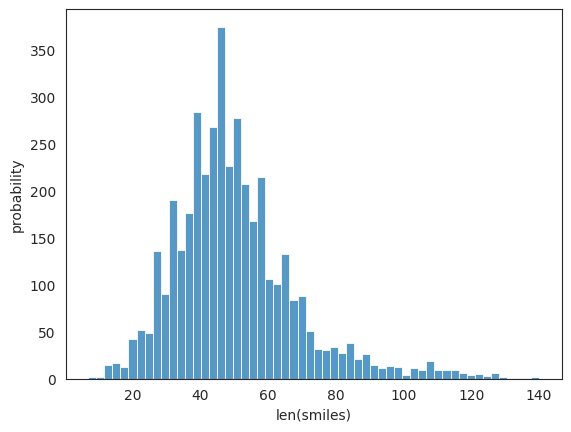

In [ ]:
featNTarget['len'] = [len(i) if i is not None else 0 for i in featNTarget['cleanedMol']]
smiles_lens = [len(i) if i is not None else 0 for i in featNTarget['cleanedMol']]
sns.histplot(smiles_lens)
plt.xlabel('len(smiles)')
plt.ylabel('probability')

In [ ]:
featNTarget

Molecule ChEMBL ID                                             Smiles  \
0              CHEMBL94        CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C   
27         CHEMBL207777  Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
28         CHEMBL205967         CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2   
29          CHEMBL60119                         Cc1ccc2c(N)c3c(nc2c1)CCCC3   
33         CHEMBL294525       CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2   
...                 ...                                                ...   
4818      CHEMBL4077157  O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...   
4819      CHEMBL3906317       COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-]   
4820      CHEMBL4800328            COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-]   
4821      CHEMBL4797670           COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-]   
4822      CHEMBL4202784  COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCC...   

          IC50  classLabel  IsValidSMILES  \
0        28.00           1           True   
27       97.00           1           True   
28     2420.00           0           True   
29      100.00           1           True   
33      290.00           1           True   
...        ...         ...            ...   
4818    229.08           1           True   
4819  10000.00           0           True   
4820   1080.00           0           True   
4821    140.00           1           True   
4822    293.00           1           True   

                                              Morgan_FP  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
27    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
28    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
29    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
33    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
...                                                 ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>   
27    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>   
28    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>   
29    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>   
33    <rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>   
...                                                ...   
4818  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>   
4819  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>   
4820  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>   
4821  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>   
4822  <rdkit.Chem.rdchem.Mol object at 0x7bcfdd327df0>   

                                            Fingerprint      PCA1      PCA2  \
0     <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.738898 -1.494784   
27    <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.014164 -1.325272   
28    <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -1.235565 -1.559108   
29    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  2.705664  0.148113   
33    <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.600017 -0.978574   
...                                                 ...       ...       ...   
4818  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.478199  1.261641   
4819  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.671263 -0.016301   
4820  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.586529 -0.433179   
4821  <rdkit.DataStructs.cDataStructs.ExplicitBitVec... -0.677524 -0.748477   
4822  <rdkit.DataStructs.cDataStructs.ExplicitBitVec...  3.542966 -0.680578   

          tSNE1      tSNE2  MolecularWeight  Frequency  \
0    -52.761700 -42.736099          275.352         27   
27   -63.027809 -53.765778          325.364          1  

In [ ]:
len(smiles_lens)

4077

In [ ]:
from rdkit.Chem import Descriptors
def calculate_molecular_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.MolWt(mol)
    else:
        return None

# Calculate molecular weights for each SMILES
featNTarget['MolecularWeight'] = featNTarget['cleanedMol'].apply(calculate_molecular_weight)


# Calculate molecular weights and filter the DataFrame
featNTarget['MolecularWeight'] = featNTarget['cleanedMol'].apply(calculate_molecular_weight)
filtered_df = featNTarget[featNTarget['MolecularWeight'] >= 700]

# Drop the 'MolecularWeight' column (if you don't need it anymore)
filtered_df = filtered_df.drop(columns=['MolecularWeight'])

<ipython-input-137-e7ff0a7df372>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['MolecularWeight'] = featNTarget['cleanedMol'].apply(calculate_molecular_weight)
<ipython-input-137-e7ff0a7df372>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featNTarget['MolecularWeight'] = featNTarget['cleanedMol'].apply(calculate_molecular_weight)


In [ ]:
filtered_df.shape

(44, 15)

In [ ]:
featNTarget.to_excel('StandarizedSmiles_molCuttoff<800.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('StandarizedSmiles.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>